**Table of Contents** <br>
* [1. Imports](#imports)
* [2. Self Organizing Maps](#2)



<hr>
<a class="anchor" id="Imports">
    
# 1. Imports
    
</a>

#### Initial Note:
Code from cells without a specific source mentioned is either original or adapted from: https://github.com/joaopfonseca/Data-Mining-22-23

In [150]:
#!pip install kmodes
!pip install graphviz
!pip install umap-learn
import graphviz
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer
sns.set()
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.metrics import calinski_harabasz_score
import seaborn as sb
from kmodes.kprototypes import KPrototypes
from matplotlib.lines import Line2D
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn-extra.cluster import KMedoids
#! pip install scikit-learn-extra
#! pip install sklearn-extra

In [151]:
df = pd.read_csv('df.csv',index_col=[0])

In [152]:
df_outliers_ohc = pd.read_csv('df_outliers_ohc.csv',index_col=[0])

In [153]:
df.head()

ClaimsRate       Age  MotorPercentageSpent  HouseholdPercentageSpent  \
CustID                                                                         
1.0      -0.559322 -0.482759              0.357075                 -0.257555   
2.0       0.677966 -0.965517             -0.865761                  0.978485   
3.0      -0.745763 -0.103448             -0.372926                  0.415420   
4.0       0.457627 -0.482759             -0.308089                 -0.430432   
5.0       0.305085 -0.206897              0.289338                 -0.416528   

        HealthPercentageSpent  LifePercentageSpent  WorkPercentageSpent  \
CustID                                                                    
1.0                  0.012021             0.619809            -0.177071   
2.0                 -0.588569             3.104708             1.449848   
3.0                 -0.326120             1.419295             1.756908   
4.0                  1.962267             0.414575             0.212183   
5.0                  0.471710            -0.089648             0.545922   

        SalarySpent  EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  \
CustID                                                                   
1.0       -0.140650          1.0          0.0          0.0         1.0   
2.0       -1.225286          1.0          0.0          0.0         1.0   
3.0       -0.224922          0.0          0.0          0.0         0.0   
4.0       -0.759114          0.0          1.0          0.0         1.0   
5.0       -0.341952          0.0          1.0          0.0         1.0   

        Cancelled_1  
CustID               
1.0             0.0  
2.0             0.0  
3.0             0.0  
4.0             0.0  
5.0             0.0

In [154]:
df_outliers_ohc.head()

ClaimsRate  Cancelled_1  Age  MotorPercentageSpent  \
CustID                                                       
52.0         25.36            0   50              0.924444   
113.0        15.65            0   37              0.873401   
136.0        14.80            0   28              0.403681   
150.0         0.63            0   22              0.085193   
172.0       256.20            0   27              0.582435   

        HouseholdPercentageSpent  HealthPercentageSpent  LifePercentageSpent  \
CustID                                                                         
52.0                    0.033167               0.049022             0.008292   
113.0                   0.007499               0.094195             0.006555   
136.0                   0.220824               0.194455             0.185109   
150.0                   0.258926               0.038803             0.024363   
172.0                   0.121549               0.256979             0.010614   

        WorkPercentageSpent  SalarySpent  EducDeg_2.0  EducDeg_3.0  \
CustID                                                               
52.0              -0.014925    64.358209          0.0          1.0   
113.0              0.018350    47.599629          0.0          0.0   
136.0             -0.004069    35.418588          0.0          1.0   
150.0              0.592715    15.500131          0.0          0.0   
172.0              0.028423    20.076411          0.0          1.0   

        EducDeg_4.0  Children_1  
CustID                           
52.0            0.0         1.0  
113.0           1.0         1.0  
136.0           0.0         1.0  
150.0           0.0         1.0  
172.0           0.0         1.0

<hr>
<a class="anchor" id="2">
    
# 2. Gaussian Mixture Model
    
</a>

In [155]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled_1',
    "ClaimsRate"
]

dfInsurance=df[insurance_features_ohc]

demographic_features_ohc=[
    'SalarySpent',
    'Children_1',
    'EducDeg_2.0',
    'EducDeg_3.0',
    'EducDeg_4.0',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

## Insurance View

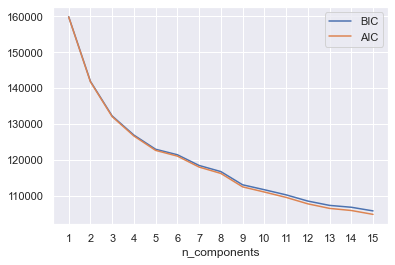

In [19]:
warnings.filterwarnings
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16) #iterate the number of components from 1 to 15
models = [GaussianMixture(n, covariance_type='spherical', n_init=10, random_state=1).fit(dfInsurance)
          for n in n_components]

# compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(dfInsurance) for gmm in models] #compute for every gmm in my list of models
aic_values = [gmm.aic(dfInsurance) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [156]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=5, covariance_type='spherical',n_init=10,random_state=1)
gmm_labels_insurance = gmm.fit_predict(dfInsurance)

In [157]:
df_concat = pd.concat([dfInsurance, pd.Series(gmm_labels_insurance, index=df.index, name="gmm_labels_insurance")], axis=1)
df_concat.head()
df_insurance_centroids = df_concat.groupby('gmm_labels_insurance').mean()

In [158]:
df_insurance_centroids

MotorPercentageSpent  HouseholdPercentageSpent  \
gmm_labels_insurance                                                   
0                                -0.536054                  0.167030   
1                                 0.013202                 -0.024338   
2                                -0.555186                  1.075148   
3                                 0.851755                 -0.473248   
4                                 0.879552                 -0.489161   

                      HealthPercentageSpent  LifePercentageSpent  \
gmm_labels_insurance                                               
0                                  0.276255             1.915099   
1                                  0.573627             0.105835   
2                                 -0.251090             0.528500   
3                                 -0.431454            -0.354722   
4                                 -0.457170            -0.379132   

                      WorkPercentageSpent  Cancelled_1  ClaimsRate  
gmm_labels_insurance                                                
0                                1.957372     0.147420    0.103166  
1                                0.089093     0.131783   -0.008494  
2                                0.526720     0.037435   -0.125040  
3                               -0.379426     0.513920   -0.844333  
4                               -0.401283     0.553744    0.468571

In [159]:
Counter(gmm_labels_insurance)

Counter({1: 3999, 0: 1221, 4: 1349, 2: 2324, 3: 1329})

In [160]:
# Counter({2: 3493, 0: 4505, 1: 1431, 3: 793}) - diag
# Counter({2: 4210, 0: 3788, 1: 1615, 3: 609}) - full
#### Counter({3: 3503, 2: 1180, 1: 3182, 0: 2357}) - spherical
# Counter({2: 7397, 3: 330, 1: 2224, 0: 271}) - tied

In [161]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


In [162]:
# Computing the R^2 of the cluster solution
sst = get_ss(dfInsurance)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels_insurance').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4972


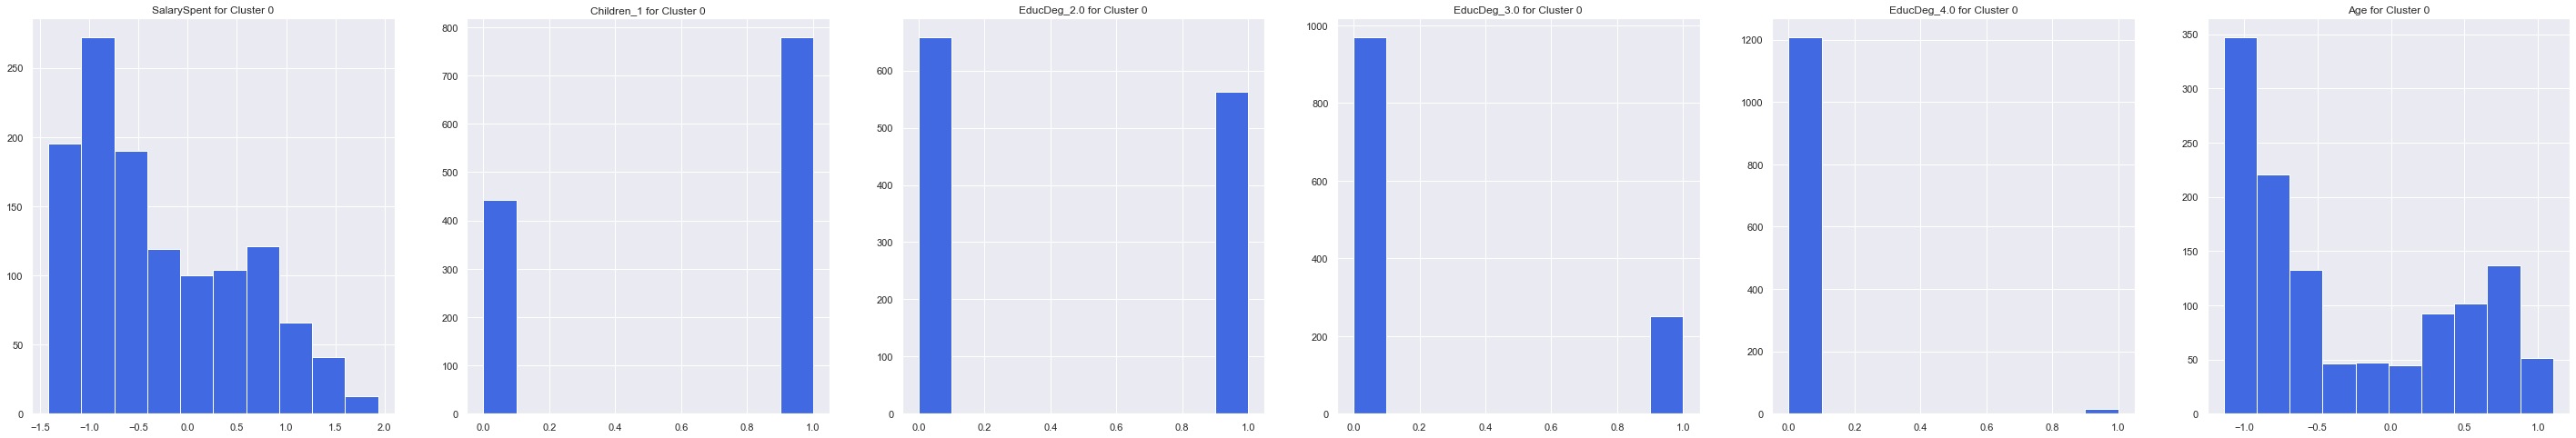

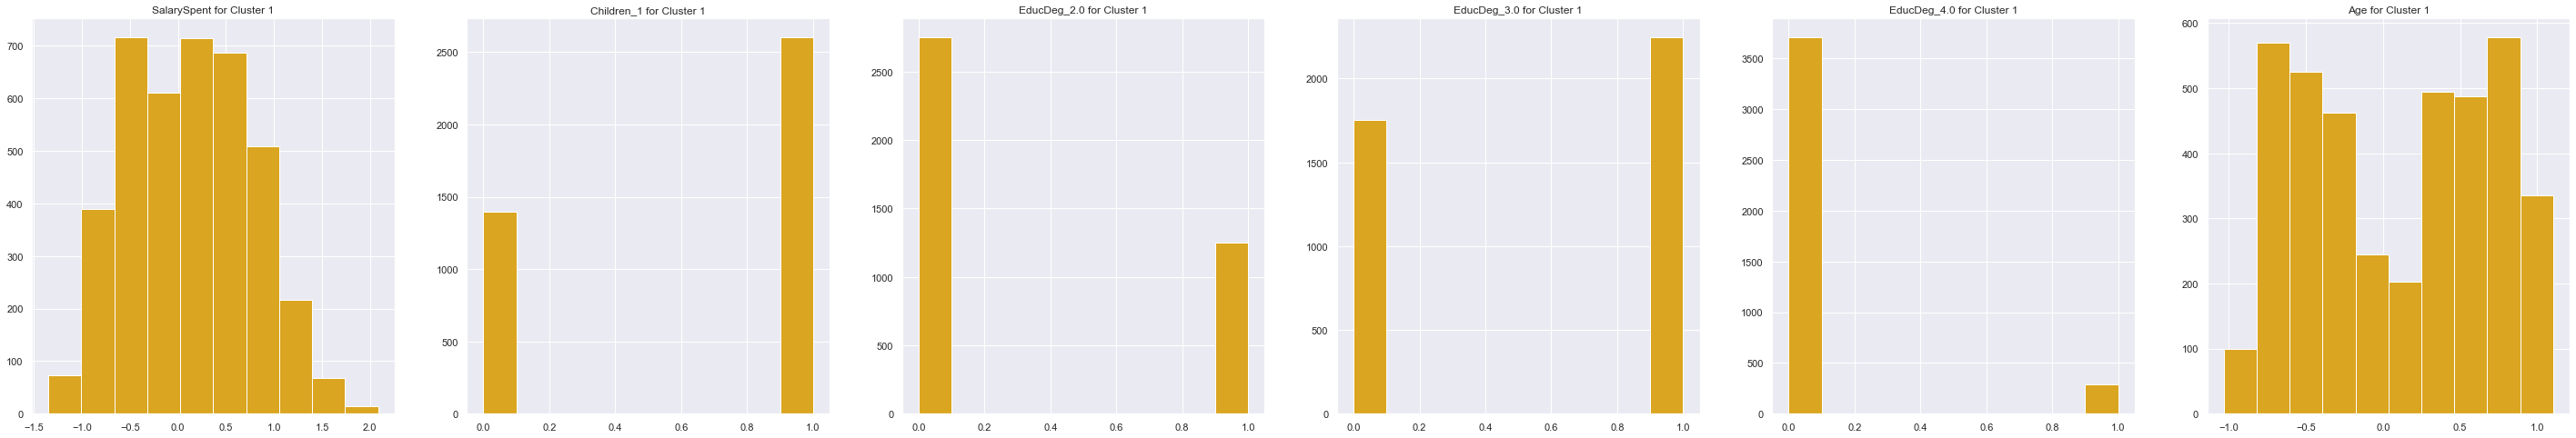

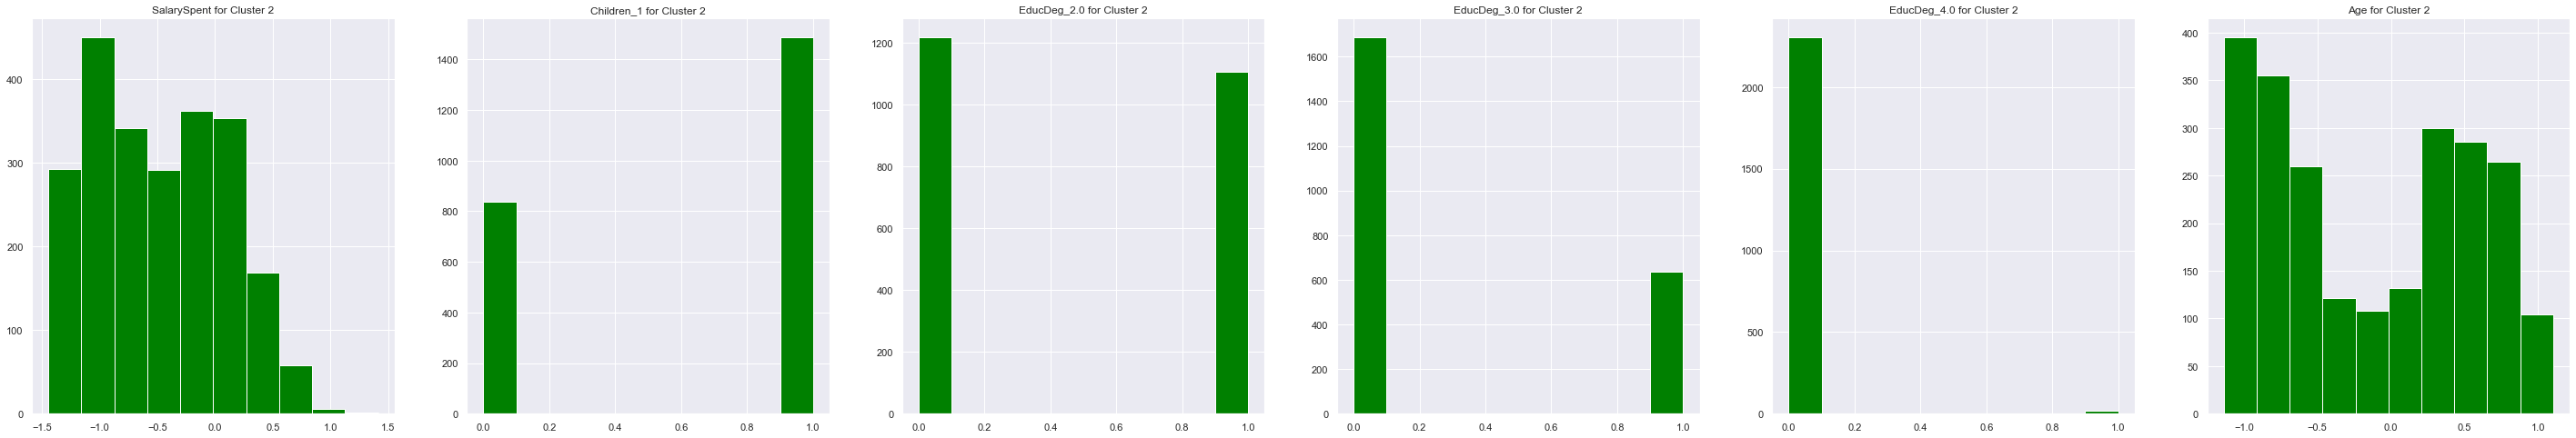

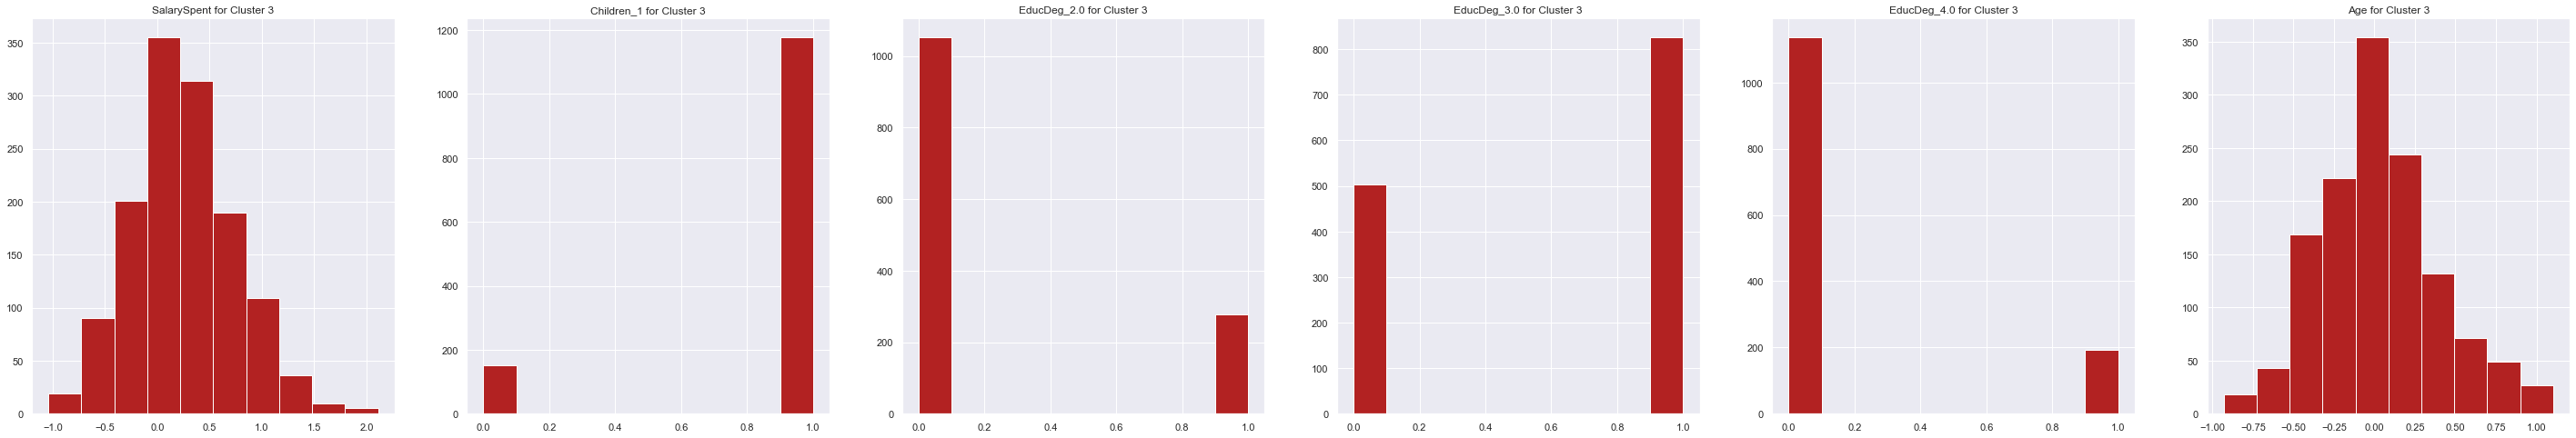

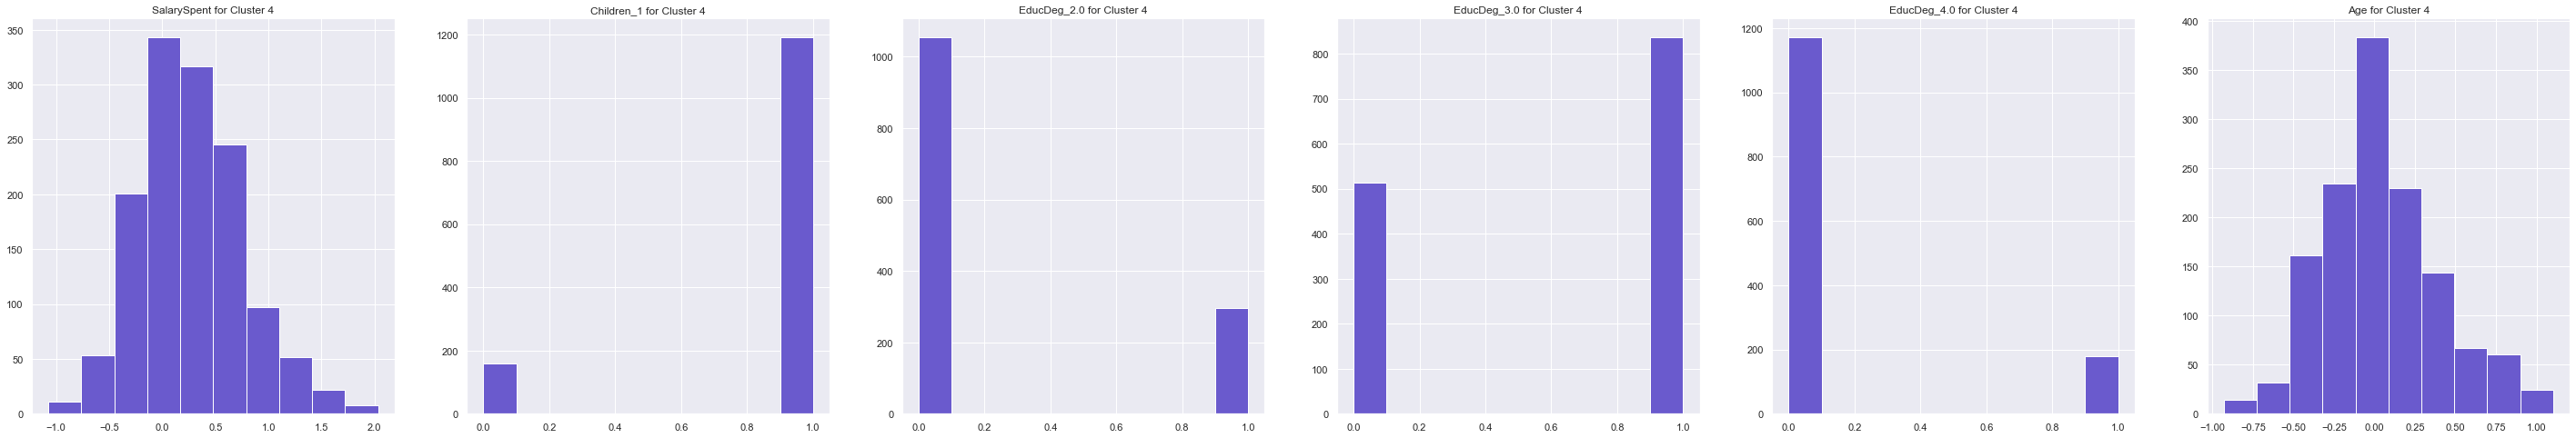

In [69]:
# Defining a list of columns to plot
columns = ["SalarySpent","Children_1","EducDeg_2.0","EducDeg_3.0","EducDeg_4.0","Age"]

# Defining a list of colors to use
colors = ['royalblue', 'goldenrod', 'green', 'firebrick', 'slateblue']

# Loop through the clusters and plot histograms
for cluster, color in enumerate(colors):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(50,8))
    for ax, col in zip(axs, columns):
        ax.hist(df[col].loc[df['gmm_labels_insurance'] == cluster], color=color)
        ax.set_title(f"{col} for Cluster {cluster}")
    plt.show()

bytecode dump:
>          0	NOP(arg=None, lineno=90)
           2	LOAD_GLOBAL(arg=0, lineno=90)
           4	LOAD_METHOD(arg=1, lineno=90)
           6	LOAD_FAST(arg=5, lineno=90)
           8	LOAD_ATTR(arg=2, lineno=90)
          10	LOAD_CONST(arg=1, lineno=90)
          12	BINARY_SUBSCR(arg=None, lineno=90)
          14	CALL_METHOD(arg=1, lineno=90)
          16	GET_ITER(arg=None, lineno=90)
>         18	FOR_ITER(arg=784, lineno=90)
          22	STORE_FAST(arg=27, lineno=90)
          24	LOAD_FAST(arg=15, lineno=91)
          26	LOAD_FAST(arg=27, lineno=91)
          28	BINARY_SUBSCR(arg=None, lineno=91)
          30	LOAD_FAST(arg=16, lineno=91)
          32	COMPARE_OP(arg=1, lineno=91)
          34	POP_JUMP_IF_FALSE(arg=18, lineno=91)
          36	LOAD_FAST(arg=2, lineno=92)
          38	LOAD_FAST(arg=27, lineno=92)
          40	BINARY_SUBSCR(arg=None, lineno=92)
          42	STORE_FAST(arg=28, lineno=92)
          44	LOAD_FAST(arg=3, lineno=93)
          46	LOAD_FAST(arg=27, lineno

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=90)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=90)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=90)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=5, lineno=90)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=90)
stack ['$4load_method.1', '$epochs_per_sample6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=90)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=90)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=90)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=90)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg

dispatch pc=138, inst=BINARY_MULTIPLY(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$a128.22', '$136call_function.26']
dispatch pc=140, inst=BINARY_ADD(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$138binary_multiply.27']
dispatch pc=142, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$140binary_add.28']
dispatch pc=144, inst=STORE_FAST(arg=34, lineno=102)
stack ['$phi84.0', '$142binary_true_divide.29']
dispatch pc=146, inst=LOAD_FAST(arg=33, lineno=106)
stack ['$phi84.0']
dispatch pc=148, inst=LOAD_FAST(arg=18, lineno=106)
stack ['$phi84.0', '$phi146.30']
dispatch pc=150, inst=LOAD_FAST(arg=29, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31']
dispatch pc=152, inst=BINARY_SUBSCR(arg=None, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31', '$k150.32']
dispatch pc=154, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=106)
stack ['$phi84.0',

dispatch pc=274, inst=LOAD_FAST(arg=39, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88']
dispatch pc=276, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88', '$re_std_sq274.89']
dispatch pc=278, inst=BINARY_SUBTRACT(arg=None, lineno=118)
stack ['$phi84.0', '$258binary_subscr.81', '$276binary_true_divide.90']
dispatch pc=280, inst=STORE_FAST(arg=40, lineno=117)
stack ['$phi84.0', '$278binary_subtract.91']
dispatch pc=282, inst=LOAD_FAST(arg=24, lineno=122)
stack ['$phi84.0']
dispatch pc=284, inst=LOAD_FAST(arg=28, lineno=122)
stack ['$phi84.0', '$dens_R282.92']
dispatch pc=286, inst=BINARY_SUBSCR(arg=None, lineno=122)
stack ['$phi84.0', '$dens_R282.92', '$j284.93']
dispatch pc=288, inst=LOAD_FAST(arg=20, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94']
dispatch pc=290, inst=LOAD_FAST(arg=19, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94', '$dens_re_cov288.95']
dispatch pc=292, ins

dispatch pc=402, inst=BINARY_ADD(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$398binary_multiply.19', '$const400.20']
dispatch pc=404, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$402binary_add.21']
dispatch pc=406, inst=STORE_FAST(arg=43, lineno=136)
stack ['$phi360.0', '$404inplace_true_divide.22']
dispatch pc=408, inst=JUMP_FORWARD(arg=4, lineno=136)
stack ['$phi360.0']
end state. edges=[Edge(pc=414, stack=('$phi360.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=410 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi410.0']
dispatch pc=410, inst=LOAD_CONST(arg=4, lineno=138)
stack ['$phi410.0']
dispatch pc=412, inst=STORE_FAST(arg=43, lineno=138)
stack ['$phi410.0', '$const410.1']
end state. edges=[Edge(pc=414, stack=('$phi410.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=414 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi414.0']
dispatc

stack: ['$phi456.0', '$phi456.1']
dispatch pc=456, inst=LOAD_FAST(arg=45, lineno=146)
stack ['$phi456.0', '$phi456.1']
dispatch pc=458, inst=LOAD_GLOBAL(arg=8, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2']
dispatch pc=460, inst=LOAD_CONST(arg=6, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3']
dispatch pc=462, inst=LOAD_FAST(arg=42, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4']
dispatch pc=464, inst=BINARY_MULTIPLY(arg=None, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4', '$grad_cor_coeff462.5']
dispatch pc=466, inst=LOAD_FAST(arg=30, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6']
dispatch pc=468, inst=LOAD_FAST(arg=44, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6', '$current466.7']
dispatch pc=470, inst=BINARY_SUBSCR(arg=

dispatch pc=616, inst=LOAD_GLOBAL(arg=3, lineno=163)
stack ['$phi594.0', '$phi594.1']
dispatch pc=618, inst=LOAD_FAST(arg=30, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11']
dispatch pc=620, inst=LOAD_FAST(arg=31, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12']
dispatch pc=622, inst=CALL_FUNCTION(arg=2, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12', '$other620.13']
dispatch pc=624, inst=STORE_FAST(arg=32, lineno=163)
stack ['$phi594.0', '$phi594.1', '$622call_function.14']
dispatch pc=626, inst=LOAD_FAST(arg=32, lineno=165)
stack ['$phi594.0', '$phi594.1']
dispatch pc=628, inst=LOAD_CONST(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15']
dispatch pc=630, inst=COMPARE_OP(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15', '$const628.16']
dispatch pc=632, inst=POP_JUMP_IF_FALSE(arg=680, lineno=165)
stack ['$phi594.0', '$phi594.1', '$630compare_op.1

dispatch pc=704, inst=CALL_FUNCTION(arg=1, lineno=175)
stack ['$phi700.0', '$phi700.1', '$700load_global.2', '$dim702.3']
dispatch pc=706, inst=GET_ITER(arg=None, lineno=175)
stack ['$phi700.0', '$phi700.1', '$704call_function.4']
end state. edges=[Edge(pc=708, stack=('$phi700.0', '$phi700.1', '$706get_iter.5'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=690 nstack_initial=2), State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3)])
stack: ['$phi690.0', '$phi690.1']
dispatch pc=690, inst=JUMP_ABSOLUTE(arg=592, lineno=171)
stack ['$phi690.0', '$phi690.1']
end state. edges=[Edge(pc=592, stack=('$phi690.0', '$phi690.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3), State(pc_initial=592 nstack_initial=2)])
stack: ['$phi696.0', '$phi696.1']
dispatch pc=696, inst=LOAD_CONST(arg=4, lineno=173)
stack ['$phi696.0', '$phi696.1']
dispatch pc=698, inst=STORE_FAST(arg=43, lineno=173)
s

defmap: {'$phi18.0': State(pc_initial=0 nstack_initial=0),
 '$phi22.1': State(pc_initial=18 nstack_initial=1),
 '$phi422.1': State(pc_initial=414 nstack_initial=1),
 '$phi424.2': State(pc_initial=422 nstack_initial=2),
 '$phi592.1': State(pc_initial=540 nstack_initial=1),
 '$phi594.2': State(pc_initial=592 nstack_initial=2),
 '$phi708.2': State(pc_initial=700 nstack_initial=2),
 '$phi710.3': State(pc_initial=708 nstack_initial=3)}
phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi780.0',
                           State(pc_initial=780 nstack_initial=1))},
             '$phi22.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi36.0',

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi360.0': 

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                           State(pc_initial=708 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi722.0',
                            State(pc_initial=722 nstack_initial=3)),
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi360.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi410.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi414.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi422.0': {('$16get_iter.7',
             

keep phismap: {'$phi18.0': {('$16get_iter.7', State(pc_initial=0 nstack_initial=0))},
 '$phi22.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))},
 '$phi422.1': {('$420get_iter.4', State(pc_initial=414 nstack_initial=1))},
 '$phi424.2': {('$422for_iter.3', State(pc_initial=422 nstack_initial=2))},
 '$phi592.1': {('$590get_iter.24', State(pc_initial=540 nstack_initial=1))},
 '$phi594.2': {('$592for_iter.3', State(pc_initial=592 nstack_initial=2))},
 '$phi708.2': {('$706get_iter.5', State(pc_initial=700 nstack_initial=2))},
 '$phi710.3': {('$708for_iter.4', State(pc_initial=708 nstack_initial=3))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$16get_iter.7'},
             State(pc_initial=18 nstack_initial=1): {'$phi22.1': '$18for_iter.2'},
             State(pc_initial=414 nstack_initial=1): {'$phi422.1': '$420get_iter.4'},
             State(pc_initial=422 nstack_initial=2): {'$phi424.2': '$422for_iter.3'},
          

block_infos State(pc_initial=350 nstack_initial=1):
AdaptBlockInfo(insts=((350, {'res': '$dist_squared350.1'}), (352, {'res': '$const352.2'}), (354, {'lhs': '$dist_squared350.1', 'rhs': '$const352.2', 'res': '$354compare_op.3'}), (356, {'pred': '$354compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={360: ('$phi350.0',), 410: ('$phi350.0',)})
block_infos State(pc_initial=360 nstack_initial=1):
AdaptBlockInfo(insts=((360, {'res': '$const360.1'}), (362, {'res': '$a362.2'}), (364, {'lhs': '$const360.1', 'rhs': '$a362.2', 'res': '$364binary_multiply.3'}), (366, {'res': '$b366.4'}), (368, {'lhs': '$364binary_multiply.3', 'rhs': '$b366.4', 'res': '$368binary_multiply.5'}), (370, {'res': '$370load_global.6'}), (372, {'res': '$dist_squared372.7'}), (374, {'res': '$b374.8'}), (376, {'res': '$const376.9'}), (378, {'lhs': '$b374.8', 'rhs': '$const376.9', 'res': '$378binary_subtract.10'}), (380, {'func': '$370load_global.6', 'args': ['$dist_squared372.7',

block_infos State(pc_initial=592 nstack_initial=2):
AdaptBlockInfo(insts=((592, {'iterator': '$phi592.1', 'pair': '$592for_iter.2', 'indval': '$592for_iter.3', 'pred': '$592for_iter.4'}),), outgoing_phis={'$phi594.2': '$592for_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={780: ('$phi592.0',), 594: ('$phi592.0', '$phi592.1', '$592for_iter.3')})
block_infos State(pc_initial=594 nstack_initial=3):
AdaptBlockInfo(insts=((594, {'value': '$phi594.2'}), (596, {'res': '$596load_global.3'}), (598, {'res': '$rng_state598.4'}), (600, {'func': '$596load_global.3', 'args': ['$rng_state598.4'], 'res': '$600call_function.5'}), (602, {'res': '$n_vertices602.6'}), (604, {'lhs': '$600call_function.5', 'rhs': '$n_vertices602.6', 'res': '$604binary_modulo.7'}), (606, {'value': '$604binary_modulo.7'}), (608, {'res': '$tail_embedding608.8'}), (610, {'res': '$k610.9'}), (612, {'index': '$k610.9', 'target': '$tail_embedding608.8', 'res': '$612binary_subscr.10'}), (614, {'value': '$612bi

block_infos State(pc_initial=806 nstack_initial=0):
AdaptBlockInfo(insts=((806, {'res': '$const806.0'}), (808, {'retval': '$const806.0', 'castval': '$808return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alp

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016992D411F0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: densmap_flag = arg(17, name=densmap_flag)
on stmt: dens_phi_sum = arg(18, name=dens_phi_s

on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_div

on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block analysis pass on 592
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016992D411F0>
on stmt: $592for_iter.2 = iternext(value=$phi592.1)
on stmt: $592for_iter.3 = pair_first(value=$592for_iter.2)
on stmt: $592for_iter.4 = pair_second(value=$592for_iter.2)
on stmt: $phi594.2 = $592for_iter.3
on stmt: branch $592for_iter.4, 594, 780
==== SSA block ana

SSA violators {'grad_d', 'grad_coeff', 'k', 'other', 'dist_squared', 'd'}
Fix SSA violator on var grad_d
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D4E910>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name

on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.1

on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block rewrite pas

==== SSA block rewrite pass on 807
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D4E910>
on stmt: jump 18
==== SSA block rewrite pass on 808
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D4E910>
on stmt: jump 592
==== SSA block rewrite pass on 809
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D4E910>
on stmt: jump 422
Replaced assignments: defaultdict(<class 'list'>,
            {424: [<numba.core.ir.Assign object at 0x00000169930F1EB0>],
             456: [<numba.core.ir.Assign object at 0x00000169930F1A00>],
             722: [<numba.core.ir.Assign object at 0x0000016991C8F0D0>],
             748: [<numba.core.ir.Assign object at 0x0000016992D3E5B0>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_

on stmt: $240binary_add.74 = $236binary_true_divide.72 + dphi_term
on stmt: drj = q_kj * $240binary_add.74
on stmt: re_std_sq = dens_re_std * dens_re_std
on stmt: $258binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)
on stmt: $266binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $270binary_subtract.87 = $266binary_subscr.85 - dens_re_mean
on stmt: $272binary_multiply.88 = dens_re_cov * $270binary_subtract.87
on stmt: $276binary_true_divide.90 = $272binary_multiply.88 / re_std_sq
on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divid

on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def var='grad_d' stmt=$524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
replaced with: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: other[d] = $530inplace_add.11
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_s

find_def_from_bottom label 748
incoming_def grad_d.3 = const(float, 4.0)
replaced with: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable

on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $const210.59 = const(float, 1.0)
on stmt: $const214.61 = const(int, 1)
on stmt: $218binary_subtract.63 = $const214.61 - phi
on stmt: $220binary_multiply.64 = b * $218binary_subtract.63
on stmt: $222binary_subtract.65 = $const210.59 - $220binary_multiply.64
on stmt: $224load_global.66 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $226load_method.67 = getattr(value=$224load_global.66, attr=exp)
on stmt: $232binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $234call_method.71 = call $226load_method.67($232binary_subscr.70, func=$226load_method.67, args=[Var($232binary_subscr.70, layouts.py:113)], kws=(), vararg=None, target=None)
on stmt: $236binary_true_divide.72 = $222binary_subtr

on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$494binary_subscr.6, rhs=$500binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $502inplace_add.10
on stmt: bool510 = global(bool: <class 'bool'>)
on stmt: $510pred = call bool510(move_other, func=bool510, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $510pred, 514, 809
==== SSA block rewrite pass on 514
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D3E160>
on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static

==== SSA block rewrite pass on 752
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D3E160>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D3E160>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D3E160>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on

on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $

Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: $458load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $const460.4 = const(int, 2)
on stmt: $464binary_multiply.6 = $const460.4 * grad_cor_coeff
on stmt: $470binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $476binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $478binary_subtract.13 = $470binary_subscr.9 - $476binary_subscr.12
on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: g

Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: $708for_iter.3 = iternext(value=$phi708.2)
on stmt: $708for_iter.4 = pair_first(value=$708for_iter.3)
on stmt: $708for_iter.5 = pair_second(value=$708for_iter.3)
on stmt: $phi710.3 = $708for_iter.4
on stmt: branch $708for_iter.5, 710, 776
==== SSA block rewrite pass on 710
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: d = $phi710.3
on stmt: $const714.5 = const(float, 0.0)
on stmt: $716compare_op.6 = grad_coeff > $const714.5
find_def var='grad_coeff' stmt=$716compare_op.6 = grad_coeff > $const714.5
find_def_from_top label 710
idom 708 from label 710
find_def_from_bottom label 708
find_def_from_top label 708
idom 700 from label 708
find_def_from_bottom label 700
find_def_from_top label 700
insert phi node grad_coeff.7 = phi(incoming_values=[], incoming_blocks=[]) at 700
find_def_from_bottom label 696
incoming_def grad_coeff.5 = const(float, 0.0)
find_def_from_bottom label 636
incoming_

on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $80pred, 84, 350
==== SSA block rewrite pass on 84
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: $const84.1 = const(float, 1.0)
on stmt: $const86.2 = const(float, 1.0)
on stmt: $90load_global.4 = global(pow: <built-in function pow>)
on stmt: $96call_function.7 = call $90load_global.4(dist_squared, b, func=$90load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $98binary_multiply.8 = a * $96call_function.7
on stmt: $100binary_add.9 = $const86.2 + $98binary_multiply.8
on stmt: phi = $const84.1 / $100binary_add.9


on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(value=$422for_iter.2)
on stmt: $phi424.2 = $422for_iter.3
on stmt: branch $422for_iter.4, 424, 540
==== SSA block rewrite pass on 424
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: d = $phi424.2
on stmt: $426load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $434binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $440binary_subscr.10 = getitem(value=other, index=d, 

on stmt: grad_coeff.4 = $674inplace_true_divide.20
on stmt: jump 700
==== SSA block rewrite pass on 680
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: $684compare_op.4 = j == k
on stmt: bool686 = global(bool: <class 'bool'>)
on stmt: $686pred = call bool686($684compare_op.4, func=bool686, args=(Var($684compare_op.4, layouts.py:170),), kws=(), vararg=None, target=None)
on stmt: branch $686pred, 690, 696
==== SSA block rewrite pass on 690
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: jump 808
==== SSA block rewrite pass on 696
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: grad_coeff.5 = const(float, 0.0)
on stmt: jump 700
==== SSA block rewrite pass on 700
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D585E0>
on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:167)], incoming_blocks=[696, 636])
on stmt: $700load_glo

==== SSA block rewrite pass on 36
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)
on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)
on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)
on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: b

on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$402binary_add.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.1 = $404inplace_true_divide.22
on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._Fi

on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D4E910>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on s

on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x00000169930F1940>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x00000169930F1940>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-

==== SSA block rewrite pass on 360
Running <numba.core.ssa._FreshVarHandler object at 0x00000169930F1940>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_

on stmt: k.1 = $600call_function.5 % n_vertices
on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
replaced with: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $616load_global.11(current, other, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x00000169930F1940>
on stmt: $const636.2 = const(float, 2.0)
on

on stmt: dens_re_sum = arg(19, name=dens_re_sum)
on stmt: dens_re_cov = arg(20, name=dens_re_cov)
on stmt: dens_re_std = arg(21, name=dens_re_std)
on stmt: dens_re_mean = arg(22, name=dens_re_mean)
on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16

on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_divide.121 = $330binary_multiply.115 / $340binary_multiply.120
on stmt: grad_cor_coeff = $342binary_true_divide.121 / n_vertices
on stmt: jump 350
==== SSA block rewrite pass on 350
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D40310>
on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D40310>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $cons

find_def var='other' stmt=other[d] = $530inplace_add.11
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
find_def_from_top label 488
idom 424 from label 488
find_def_from_bottom label 424
find_def_from_top label 424
idom 422 from label 424
find_def_from_bottom label 422
find_def_from_top label 422
idom 414 from label 422
find_def_from_bottom label 414
find_def_from_top label 414
idom 350 from label 414
find_def_from_bottom label 350
find_def_from_top label 350
idom 36 from label 350
find_def_from_bottom label 36
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D40310>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)
on stmt: $554inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$5

on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D40310>
on stmt: grad_d.3 = const(float, 4.0)
on stmt: jump 752
==== SSA block rewrite pass on 752
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D40310>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==

on stmt: q_jk = phi / $152binary_subscr.33
on stmt: $164binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)
on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtra

on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_d.1 = $484inplace_add.16
on stmt: jump 488
==== SSA block rewrite pass on 488
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D58670>
on stmt: grad_d.4 = phi(incoming_values=[Var(grad_d, layouts.py:141), Var(grad_d.1, layouts.py:146)], incoming_blocks=[424, 456])
on stmt: $494binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $500binary_multiply.9 = grad_d.4 * alpha
on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in fun

on stmt: $718pred = call bool718($716compare_op.6, func=bool718, args=(Var($716compare_op.6, layouts.py:176),), kws=(), vararg=None, target=None)
on stmt: branch $718pred, 722, 748
==== SSA block rewrite pass on 722
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D58670>
on stmt: $722load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $730binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $736binary_subscr.10 = getitem(value=other.1, index=d, fn=<built-in function getitem>)
on stmt: $738binary_subtract.11 = $730binary_subscr.7 - $736binary_subscr.10
on stmt: $740binary_multiply.12 = grad_coeff.7 * $738binary_subtract.11
on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FreshVarHandler object

on stmt: $const118.17 = const(int, 1)
on stmt: $120binary_subtract.18 = b - $const118.17
on stmt: $122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def_from_top label 84
idom 36 from label 84
find_def_from_bottom label 36
on stmt: $124binary_multiply.20 = $110binary_multiply.13 * $122call_function.19
on stmt: $const126.21 = const(float, 1.0)
on stmt: $130load_global.23 = global(pow: <built-in function pow>)
on stmt: $136call_function.26 = call $130load_global.23(dist_squared, b, func=$130load_global.23, args=[Var(dist_squared, layouts.py:98), Var

on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x00000169930F1940>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._FixSSAVars object at 0x00000169930F1940>
on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[360, 410])
on stmt: $414load_global.1 = global(range: <class 'range'>)
on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FixSSAVars object at 0x00000169930F1940>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(va

find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $664call_function.15 = call $658load_global.12(dist_squared.1, b, func=$658load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on stmt: $const668.17

on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D40220>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D40220>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: bool34 = global(bool: <class 'bool'>)
on stmt: $34pred = call bool34($32compare_op.

on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in 

on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared.1 = call $616load_global.11(current, other.1, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared.1 > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x0000016992D40220>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.

on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D58D30>
on

on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D58D30>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368bina

on stmt: epoch_of_next_sample[i] = $554inplace_add.9
on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get

find_def_from_bottom label 710
replaced with: current[d.1] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D58D30>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x0000016992D58D30>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$786binary_subscr.5, rhs=$796binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_negative_sample[i] = $798inplace_add.11
on stmt: jump 807
==== SSA block rewrite pass on 806
Running <numba.core.ssa._FixSSAVars object at 0x000001699

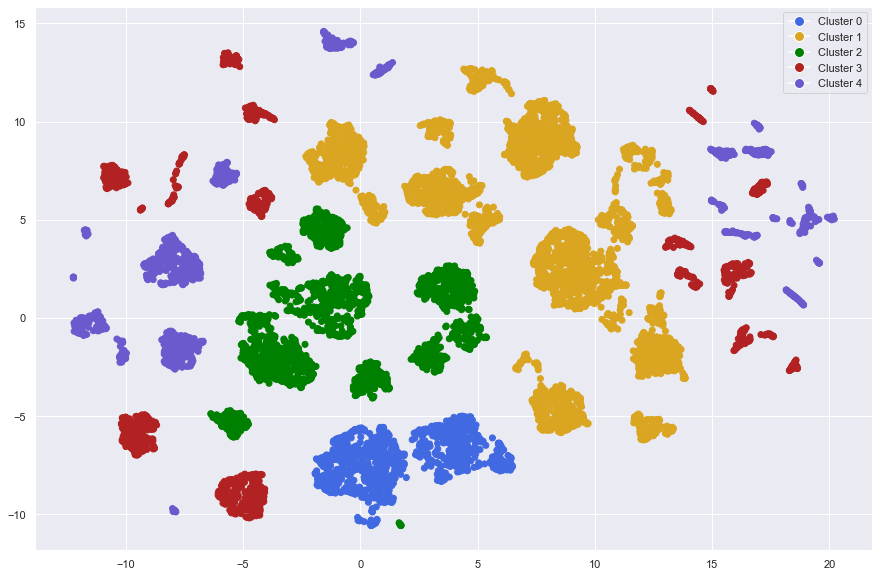

In [70]:
warnings.filterwarnings

# Initialize and fit UMAP
umap_model = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.3)
two_dim = umap_model.fit_transform(df)

# Define a dictionary that maps each cluster label to a color
colors_dict = {0: 'royalblue', 1: 'goldenrod', 2: 'green', 3: 'firebrick', 4: 'slateblue'}

# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(15,10))

# UMAP visualization
scatter = ax.scatter(two_dim[:,0], two_dim[:,1], c=df['gmm_labels_insurance'].map(colors_dict))

# Add a colorbar to the plot
# cbar = fig.colorbar(scatter, ax=ax, **{'ticks':list(colors_dict.keys())})

# Add a legend to the plot
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markerfacecolor=color, markersize=10) for i, color in colors_dict.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()


In [163]:
##Decision Tree

In [164]:
# Preparing the data
X = df_concat.drop(columns=['gmm_labels_insurance'])
y = df_concat.gmm_labels_insurance

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 82.93% of the customers correctly


## Demographic View

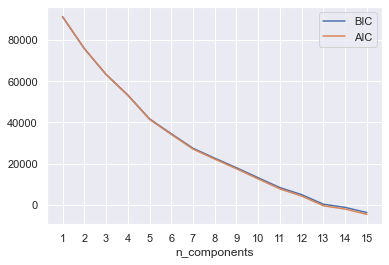

In [94]:
warnings.filterwarnings
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16) #iterate the number of components from 1 to 15
models = [GaussianMixture(n, covariance_type='spherical', n_init=10, random_state=1).fit(dfDemographic)
          for n in n_components]

# compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(dfDemographic) for gmm in models] #compute for every gmm in my list of models
aic_values = [gmm.aic(dfDemographic) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [165]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=5, covariance_type='spherical',n_init=40,random_state=1)
gmm_labels_demographic = gmm.fit_predict(dfDemographic)

In [166]:
df_concat = pd.concat([dfDemographic, pd.Series(gmm_labels_demographic, index=df.index, name="gmm_labels_demographic")], axis=1)
df_concat.head()
df_demographic_centroids = df_concat.groupby('gmm_labels_demographic').mean()

In [167]:
df_demographic_centroids

SalarySpent  Children_1  EducDeg_2.0  EducDeg_3.0  \
gmm_labels_demographic                                                      
0                          0.199506    1.000000     0.000000     1.000000   
1                         -0.789714    0.821386     0.520792     0.064950   
2                          0.105972    1.000000     1.000000     0.000000   
3                          0.576023    0.270923     0.287604     0.457003   
4                         -0.565179    1.000000     0.000000     1.000000   

                        EducDeg_4.0       Age  
gmm_labels_demographic                         
0                          0.000000  0.065599  
1                          0.092277 -0.694858  
2                          0.000000  0.082671  
3                          0.133161  0.577043  
4                          0.000000 -0.578251

In [168]:
Counter(gmm_labels_demographic)

Counter({1: 2525, 3: 3477, 4: 1283, 2: 1175, 0: 1762})

In [169]:
# Counter({3: 2525, 0: 3477, 2: 1283, 4: 1175, 1: 1762}) - spherical
# Counter ({2: 3490, 4: 1238, 1: 3401, 0: 1397, 3: 696}) - full
# Counter({2: 3490, 4: 1238, 1: 3401, 0: 1397, 3: 696}) - diag
# Counter({2: 3490, 4: 1238, 1: 3401, 0: 1397, 3: 696}) - tied

In [170]:
# Computing the R^2 of the cluster solution
sst = get_ss(dfDemographic)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels_demographic').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.6046


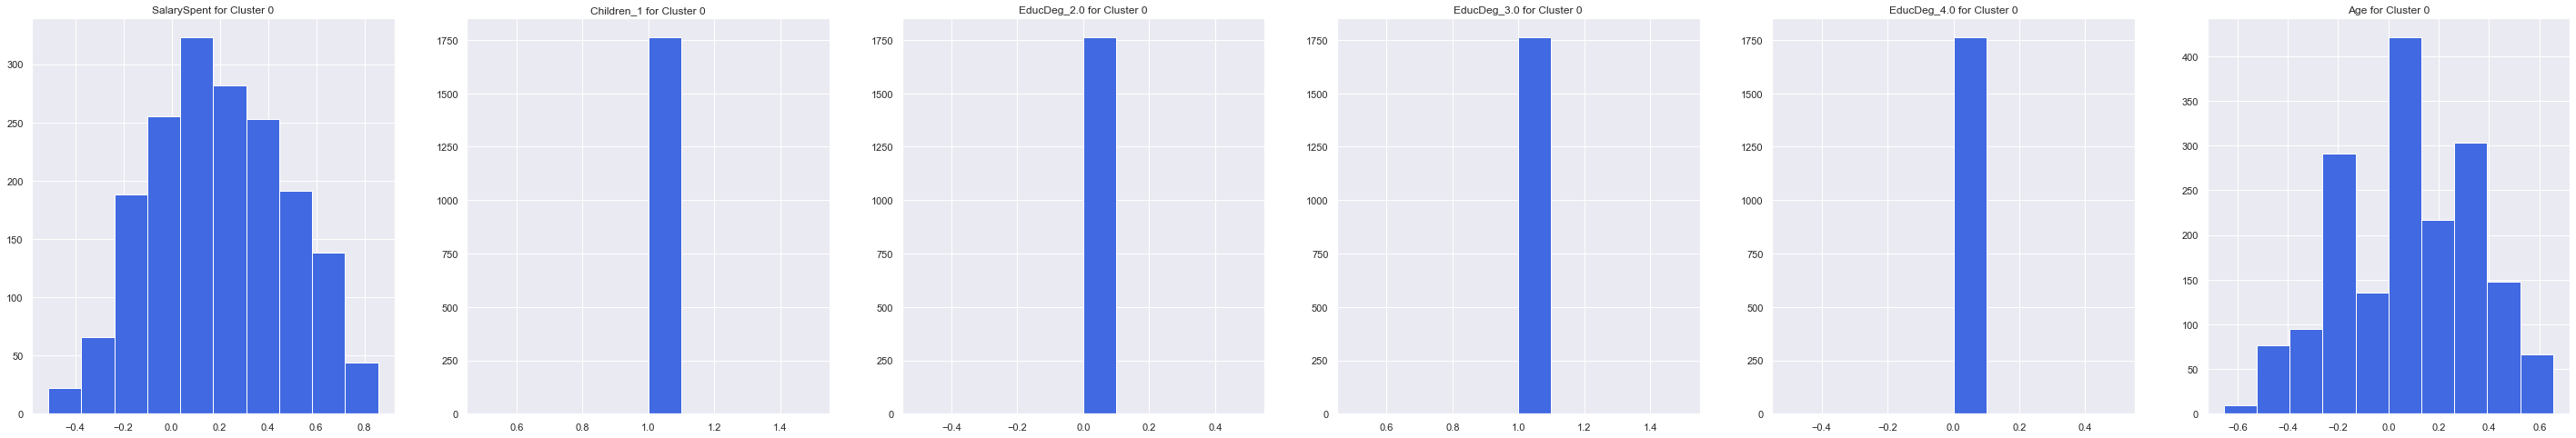

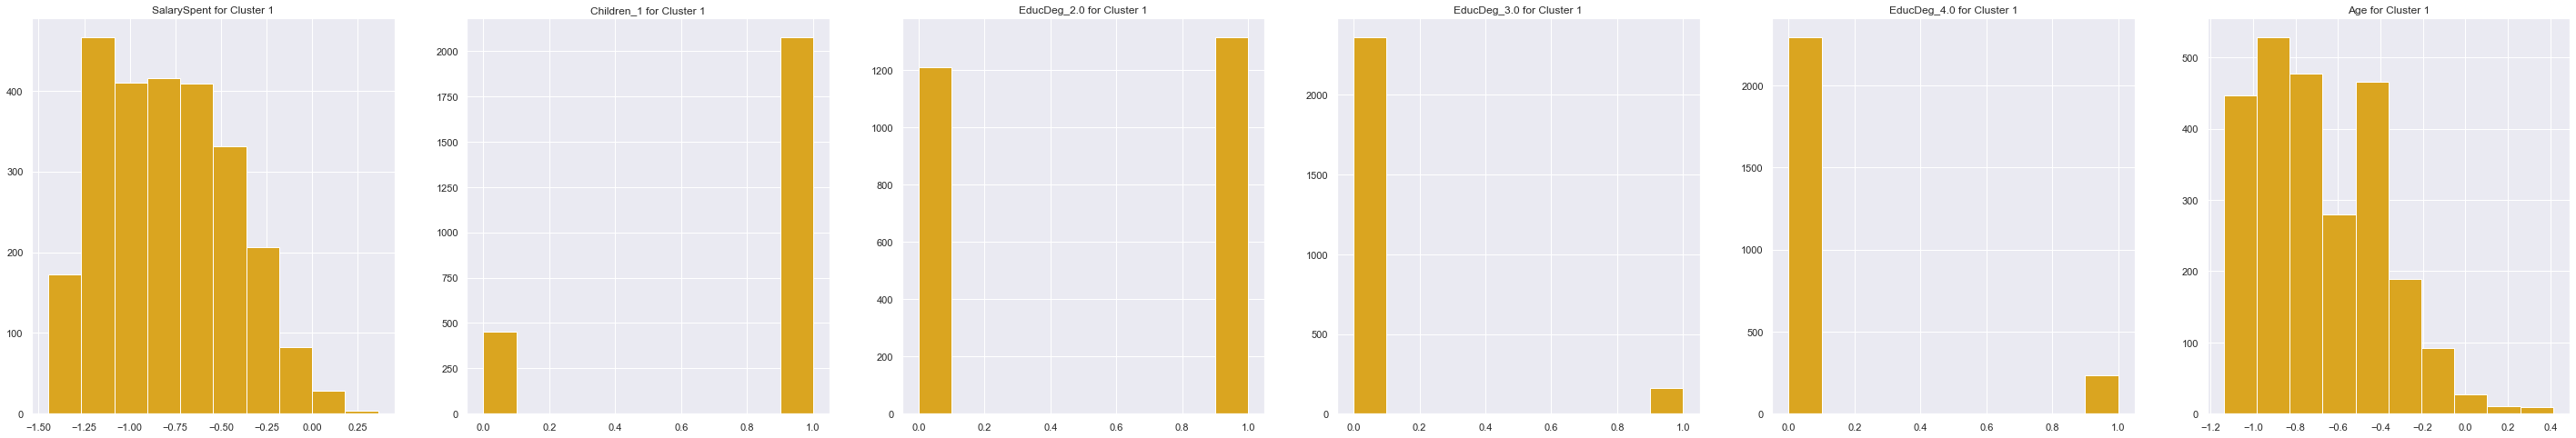

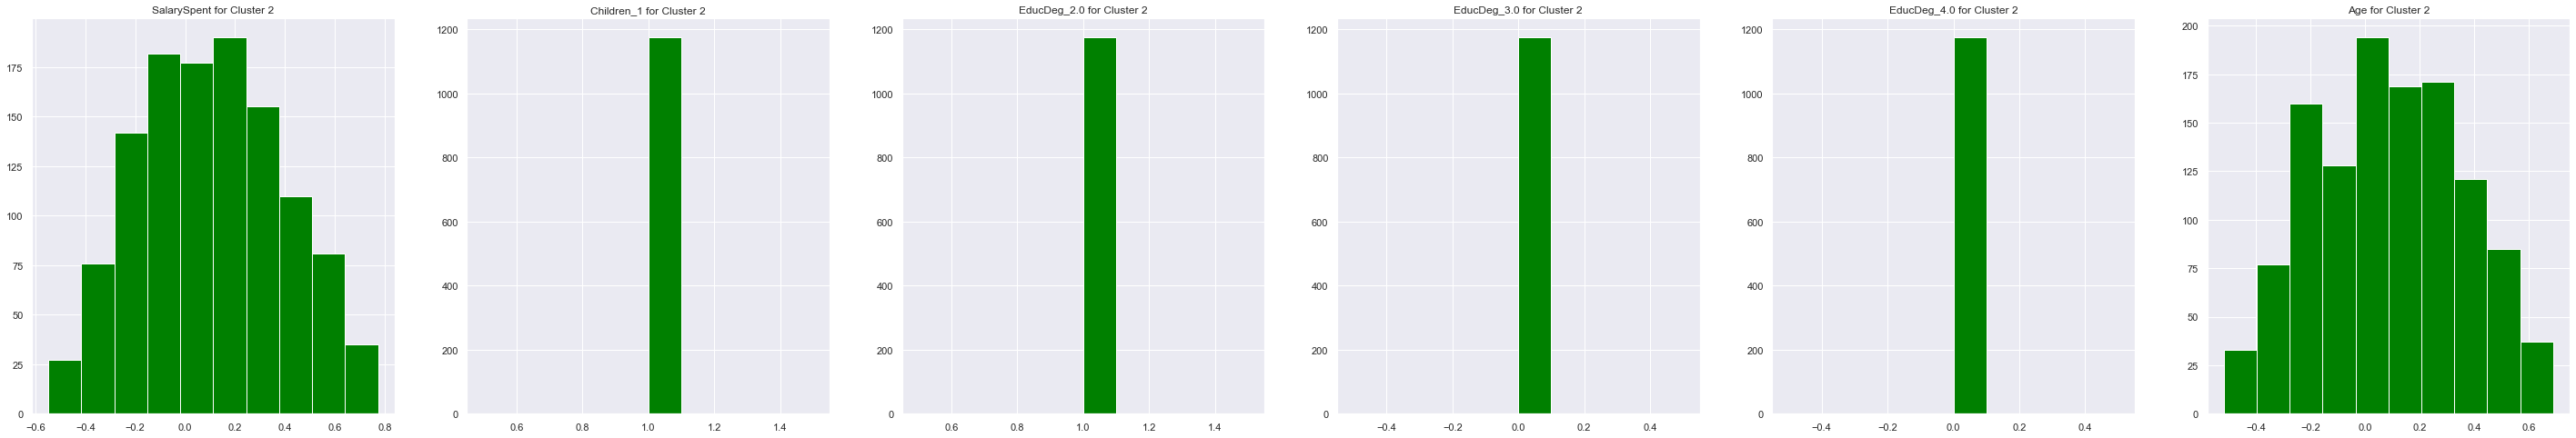

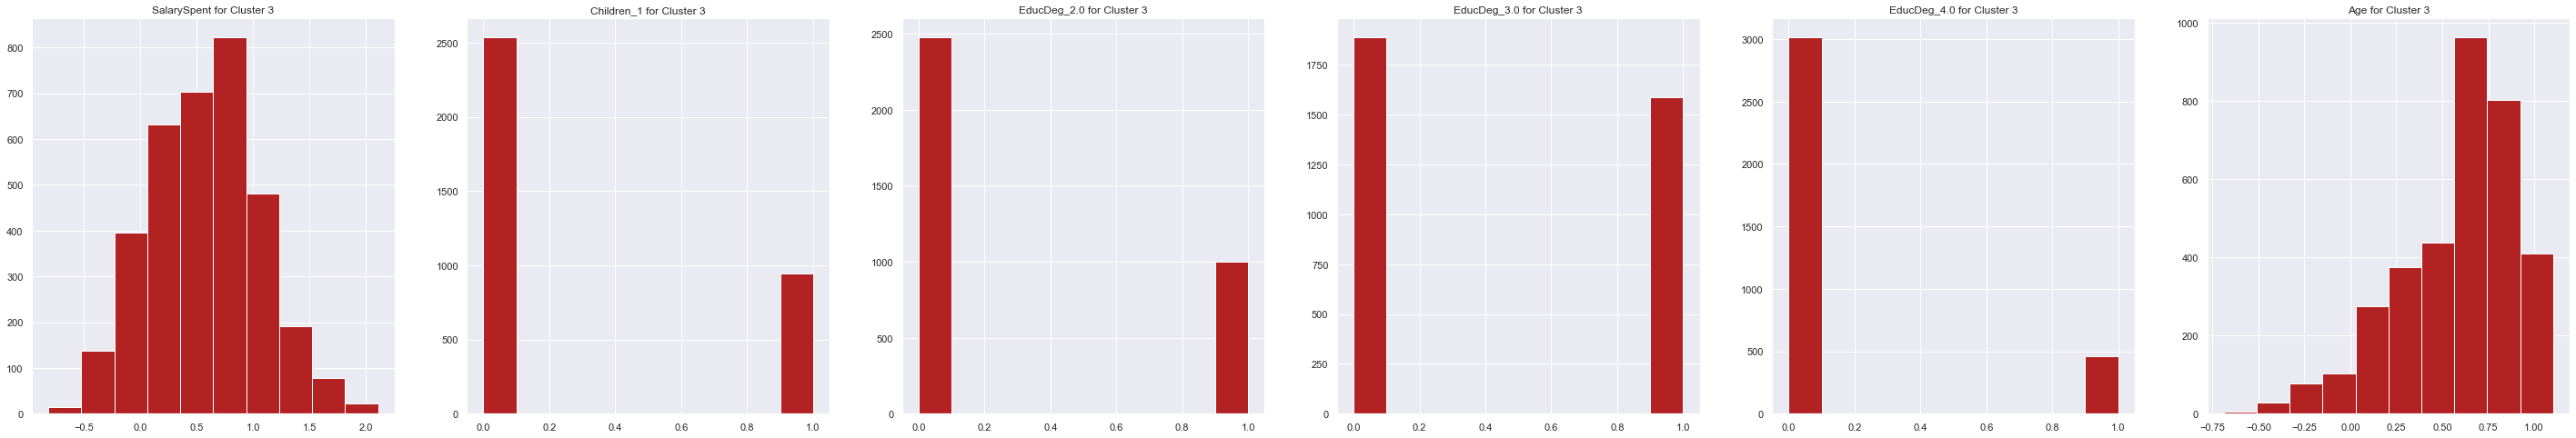

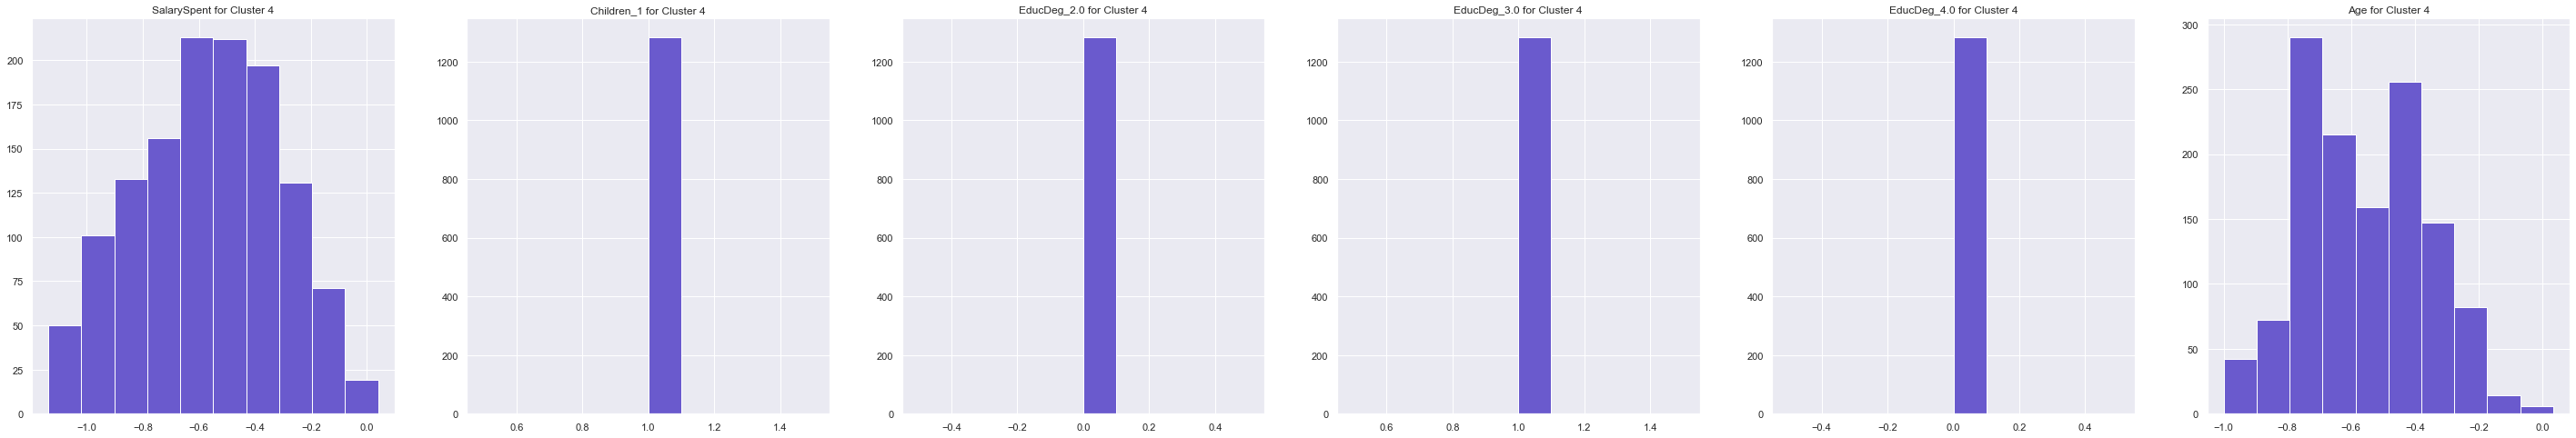

In [66]:
# Defining a list of columns to plot
columns = ["SalarySpent","Children_1","EducDeg_2.0","EducDeg_3.0","EducDeg_4.0","Age"]

# Defining a list of colors to use
colors = ['royalblue', 'goldenrod', 'green', 'firebrick', 'slateblue']

# Loop through the clusters and plot histograms
for cluster, color in enumerate(colors):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(50,8))
    for ax, col in zip(axs, columns):
        ax.hist(df[col].loc[df['gmm_labels_demographic'] == cluster], color=color)
        ax.set_title(f"{col} for Cluster {cluster}")
    plt.show()

bytecode dump:
>          0	NOP(arg=None, lineno=90)
           2	LOAD_GLOBAL(arg=0, lineno=90)
           4	LOAD_METHOD(arg=1, lineno=90)
           6	LOAD_FAST(arg=5, lineno=90)
           8	LOAD_ATTR(arg=2, lineno=90)
          10	LOAD_CONST(arg=1, lineno=90)
          12	BINARY_SUBSCR(arg=None, lineno=90)
          14	CALL_METHOD(arg=1, lineno=90)
          16	GET_ITER(arg=None, lineno=90)
>         18	FOR_ITER(arg=784, lineno=90)
          22	STORE_FAST(arg=27, lineno=90)
          24	LOAD_FAST(arg=15, lineno=91)
          26	LOAD_FAST(arg=27, lineno=91)
          28	BINARY_SUBSCR(arg=None, lineno=91)
          30	LOAD_FAST(arg=16, lineno=91)
          32	COMPARE_OP(arg=1, lineno=91)
          34	POP_JUMP_IF_FALSE(arg=18, lineno=91)
          36	LOAD_FAST(arg=2, lineno=92)
          38	LOAD_FAST(arg=27, lineno=92)
          40	BINARY_SUBSCR(arg=None, lineno=92)
          42	STORE_FAST(arg=28, lineno=92)
          44	LOAD_FAST(arg=3, lineno=93)
          46	LOAD_FAST(arg=27, lineno

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=90)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=90)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=90)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=5, lineno=90)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=90)
stack ['$4load_method.1', '$epochs_per_sample6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=90)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=90)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=90)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=90)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg

dispatch pc=138, inst=BINARY_MULTIPLY(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$a128.22', '$136call_function.26']
dispatch pc=140, inst=BINARY_ADD(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$138binary_multiply.27']
dispatch pc=142, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$140binary_add.28']
dispatch pc=144, inst=STORE_FAST(arg=34, lineno=102)
stack ['$phi84.0', '$142binary_true_divide.29']
dispatch pc=146, inst=LOAD_FAST(arg=33, lineno=106)
stack ['$phi84.0']
dispatch pc=148, inst=LOAD_FAST(arg=18, lineno=106)
stack ['$phi84.0', '$phi146.30']
dispatch pc=150, inst=LOAD_FAST(arg=29, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31']
dispatch pc=152, inst=BINARY_SUBSCR(arg=None, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31', '$k150.32']
dispatch pc=154, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=106)
stack ['$phi84.0',

dispatch pc=274, inst=LOAD_FAST(arg=39, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88']
dispatch pc=276, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88', '$re_std_sq274.89']
dispatch pc=278, inst=BINARY_SUBTRACT(arg=None, lineno=118)
stack ['$phi84.0', '$258binary_subscr.81', '$276binary_true_divide.90']
dispatch pc=280, inst=STORE_FAST(arg=40, lineno=117)
stack ['$phi84.0', '$278binary_subtract.91']
dispatch pc=282, inst=LOAD_FAST(arg=24, lineno=122)
stack ['$phi84.0']
dispatch pc=284, inst=LOAD_FAST(arg=28, lineno=122)
stack ['$phi84.0', '$dens_R282.92']
dispatch pc=286, inst=BINARY_SUBSCR(arg=None, lineno=122)
stack ['$phi84.0', '$dens_R282.92', '$j284.93']
dispatch pc=288, inst=LOAD_FAST(arg=20, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94']
dispatch pc=290, inst=LOAD_FAST(arg=19, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94', '$dens_re_cov288.95']
dispatch pc=292, ins

dispatch pc=402, inst=BINARY_ADD(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$398binary_multiply.19', '$const400.20']
dispatch pc=404, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$402binary_add.21']
dispatch pc=406, inst=STORE_FAST(arg=43, lineno=136)
stack ['$phi360.0', '$404inplace_true_divide.22']
dispatch pc=408, inst=JUMP_FORWARD(arg=4, lineno=136)
stack ['$phi360.0']
end state. edges=[Edge(pc=414, stack=('$phi360.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=410 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi410.0']
dispatch pc=410, inst=LOAD_CONST(arg=4, lineno=138)
stack ['$phi410.0']
dispatch pc=412, inst=STORE_FAST(arg=43, lineno=138)
stack ['$phi410.0', '$const410.1']
end state. edges=[Edge(pc=414, stack=('$phi410.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=414 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi414.0']
dispatc

stack: ['$phi456.0', '$phi456.1']
dispatch pc=456, inst=LOAD_FAST(arg=45, lineno=146)
stack ['$phi456.0', '$phi456.1']
dispatch pc=458, inst=LOAD_GLOBAL(arg=8, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2']
dispatch pc=460, inst=LOAD_CONST(arg=6, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3']
dispatch pc=462, inst=LOAD_FAST(arg=42, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4']
dispatch pc=464, inst=BINARY_MULTIPLY(arg=None, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4', '$grad_cor_coeff462.5']
dispatch pc=466, inst=LOAD_FAST(arg=30, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6']
dispatch pc=468, inst=LOAD_FAST(arg=44, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6', '$current466.7']
dispatch pc=470, inst=BINARY_SUBSCR(arg=

dispatch pc=616, inst=LOAD_GLOBAL(arg=3, lineno=163)
stack ['$phi594.0', '$phi594.1']
dispatch pc=618, inst=LOAD_FAST(arg=30, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11']
dispatch pc=620, inst=LOAD_FAST(arg=31, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12']
dispatch pc=622, inst=CALL_FUNCTION(arg=2, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12', '$other620.13']
dispatch pc=624, inst=STORE_FAST(arg=32, lineno=163)
stack ['$phi594.0', '$phi594.1', '$622call_function.14']
dispatch pc=626, inst=LOAD_FAST(arg=32, lineno=165)
stack ['$phi594.0', '$phi594.1']
dispatch pc=628, inst=LOAD_CONST(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15']
dispatch pc=630, inst=COMPARE_OP(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15', '$const628.16']
dispatch pc=632, inst=POP_JUMP_IF_FALSE(arg=680, lineno=165)
stack ['$phi594.0', '$phi594.1', '$630compare_op.1

dispatch pc=704, inst=CALL_FUNCTION(arg=1, lineno=175)
stack ['$phi700.0', '$phi700.1', '$700load_global.2', '$dim702.3']
dispatch pc=706, inst=GET_ITER(arg=None, lineno=175)
stack ['$phi700.0', '$phi700.1', '$704call_function.4']
end state. edges=[Edge(pc=708, stack=('$phi700.0', '$phi700.1', '$706get_iter.5'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=690 nstack_initial=2), State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3)])
stack: ['$phi690.0', '$phi690.1']
dispatch pc=690, inst=JUMP_ABSOLUTE(arg=592, lineno=171)
stack ['$phi690.0', '$phi690.1']
end state. edges=[Edge(pc=592, stack=('$phi690.0', '$phi690.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3), State(pc_initial=592 nstack_initial=2)])
stack: ['$phi696.0', '$phi696.1']
dispatch pc=696, inst=LOAD_CONST(arg=4, lineno=173)
stack ['$phi696.0', '$phi696.1']
dispatch pc=698, inst=STORE_FAST(arg=43, lineno=173)
s

defmap: {'$phi18.0': State(pc_initial=0 nstack_initial=0),
 '$phi22.1': State(pc_initial=18 nstack_initial=1),
 '$phi422.1': State(pc_initial=414 nstack_initial=1),
 '$phi424.2': State(pc_initial=422 nstack_initial=2),
 '$phi592.1': State(pc_initial=540 nstack_initial=1),
 '$phi594.2': State(pc_initial=592 nstack_initial=2),
 '$phi708.2': State(pc_initial=700 nstack_initial=2),
 '$phi710.3': State(pc_initial=708 nstack_initial=3)}
phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi780.0',
                           State(pc_initial=780 nstack_initial=1))},
             '$phi22.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi36.0',

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi360.0': 

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                           State(pc_initial=708 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi722.0',
                            State(pc_initial=722 nstack_initial=3)),
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi360.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi410.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi414.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi422.0': {('$16get_iter.7',
             

keep phismap: {'$phi18.0': {('$16get_iter.7', State(pc_initial=0 nstack_initial=0))},
 '$phi22.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))},
 '$phi422.1': {('$420get_iter.4', State(pc_initial=414 nstack_initial=1))},
 '$phi424.2': {('$422for_iter.3', State(pc_initial=422 nstack_initial=2))},
 '$phi592.1': {('$590get_iter.24', State(pc_initial=540 nstack_initial=1))},
 '$phi594.2': {('$592for_iter.3', State(pc_initial=592 nstack_initial=2))},
 '$phi708.2': {('$706get_iter.5', State(pc_initial=700 nstack_initial=2))},
 '$phi710.3': {('$708for_iter.4', State(pc_initial=708 nstack_initial=3))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$16get_iter.7'},
             State(pc_initial=18 nstack_initial=1): {'$phi22.1': '$18for_iter.2'},
             State(pc_initial=414 nstack_initial=1): {'$phi422.1': '$420get_iter.4'},
             State(pc_initial=422 nstack_initial=2): {'$phi424.2': '$422for_iter.3'},
          

block_infos State(pc_initial=350 nstack_initial=1):
AdaptBlockInfo(insts=((350, {'res': '$dist_squared350.1'}), (352, {'res': '$const352.2'}), (354, {'lhs': '$dist_squared350.1', 'rhs': '$const352.2', 'res': '$354compare_op.3'}), (356, {'pred': '$354compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={360: ('$phi350.0',), 410: ('$phi350.0',)})
block_infos State(pc_initial=360 nstack_initial=1):
AdaptBlockInfo(insts=((360, {'res': '$const360.1'}), (362, {'res': '$a362.2'}), (364, {'lhs': '$const360.1', 'rhs': '$a362.2', 'res': '$364binary_multiply.3'}), (366, {'res': '$b366.4'}), (368, {'lhs': '$364binary_multiply.3', 'rhs': '$b366.4', 'res': '$368binary_multiply.5'}), (370, {'res': '$370load_global.6'}), (372, {'res': '$dist_squared372.7'}), (374, {'res': '$b374.8'}), (376, {'res': '$const376.9'}), (378, {'lhs': '$b374.8', 'rhs': '$const376.9', 'res': '$378binary_subtract.10'}), (380, {'func': '$370load_global.6', 'args': ['$dist_squared372.7',

block_infos State(pc_initial=592 nstack_initial=2):
AdaptBlockInfo(insts=((592, {'iterator': '$phi592.1', 'pair': '$592for_iter.2', 'indval': '$592for_iter.3', 'pred': '$592for_iter.4'}),), outgoing_phis={'$phi594.2': '$592for_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={780: ('$phi592.0',), 594: ('$phi592.0', '$phi592.1', '$592for_iter.3')})
block_infos State(pc_initial=594 nstack_initial=3):
AdaptBlockInfo(insts=((594, {'value': '$phi594.2'}), (596, {'res': '$596load_global.3'}), (598, {'res': '$rng_state598.4'}), (600, {'func': '$596load_global.3', 'args': ['$rng_state598.4'], 'res': '$600call_function.5'}), (602, {'res': '$n_vertices602.6'}), (604, {'lhs': '$600call_function.5', 'rhs': '$n_vertices602.6', 'res': '$604binary_modulo.7'}), (606, {'value': '$604binary_modulo.7'}), (608, {'res': '$tail_embedding608.8'}), (610, {'res': '$k610.9'}), (612, {'index': '$k610.9', 'target': '$tail_embedding608.8', 'res': '$612binary_subscr.10'}), (614, {'value': '$612bi

block_infos State(pc_initial=806 nstack_initial=0):
AdaptBlockInfo(insts=((806, {'res': '$const806.0'}), (808, {'retval': '$const806.0', 'castval': '$808return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alp

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016991D64040>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: densmap_flag = arg(17, name=densmap_flag)
on stmt: dens_phi_sum = arg(18, name=dens_phi_s

on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_div

on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block analysis pass on 592
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016991D64040>
on stmt: $592for_iter.2 = iternext(value=$phi592.1)
on stmt: $592for_iter.3 = pair_first(value=$592for_iter.2)
on stmt: $592for_iter.4 = pair_second(value=$592for_iter.2)
on stmt: $phi594.2 = $592for_iter.3
on stmt: branch $592for_iter.4, 594, 780
==== SSA block ana

SSA violators {'grad_d', 'grad_coeff', 'k', 'other', 'dist_squared', 'd'}
Fix SSA violator on var grad_d
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D6EE20>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name

on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.1

on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block rewrite pas

==== SSA block rewrite pass on 807
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D6EE20>
on stmt: jump 18
==== SSA block rewrite pass on 808
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D6EE20>
on stmt: jump 592
==== SSA block rewrite pass on 809
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D6EE20>
on stmt: jump 422
Replaced assignments: defaultdict(<class 'list'>,
            {424: [<numba.core.ir.Assign object at 0x0000016991D40130>],
             456: [<numba.core.ir.Assign object at 0x0000016991D405E0>],
             722: [<numba.core.ir.Assign object at 0x0000016991D40F10>],
             748: [<numba.core.ir.Assign object at 0x0000016991D40670>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6EE20>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_

on stmt: $240binary_add.74 = $236binary_true_divide.72 + dphi_term
on stmt: drj = q_kj * $240binary_add.74
on stmt: re_std_sq = dens_re_std * dens_re_std
on stmt: $258binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)
on stmt: $266binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $270binary_subtract.87 = $266binary_subscr.85 - dens_re_mean
on stmt: $272binary_multiply.88 = dens_re_cov * $270binary_subtract.87
on stmt: $276binary_true_divide.90 = $272binary_multiply.88 / re_std_sq
on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divid

on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def var='grad_d' stmt=$524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
replaced with: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: other[d] = $530inplace_add.11
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6EE20>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_s

find_def_from_bottom label 748
incoming_def grad_d.3 = const(float, 4.0)
replaced with: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6EE20>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6EE20>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable

on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $const210.59 = const(float, 1.0)
on stmt: $const214.61 = const(int, 1)
on stmt: $218binary_subtract.63 = $const214.61 - phi
on stmt: $220binary_multiply.64 = b * $218binary_subtract.63
on stmt: $222binary_subtract.65 = $const210.59 - $220binary_multiply.64
on stmt: $224load_global.66 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $226load_method.67 = getattr(value=$224load_global.66, attr=exp)
on stmt: $232binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $234call_method.71 = call $226load_method.67($232binary_subscr.70, func=$226load_method.67, args=[Var($232binary_subscr.70, layouts.py:113)], kws=(), vararg=None, target=None)
on stmt: $236binary_true_divide.72 = $222binary_subtr

on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$494binary_subscr.6, rhs=$500binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $502inplace_add.10
on stmt: bool510 = global(bool: <class 'bool'>)
on stmt: $510pred = call bool510(move_other, func=bool510, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $510pred, 514, 809
==== SSA block rewrite pass on 514
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D99370>
on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static

==== SSA block rewrite pass on 752
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D99370>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D99370>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D99370>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on

on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $

Running <numba.core.ssa._FixSSAVars object at 0x00000169932D6A60>
on stmt: $458load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $const460.4 = const(int, 2)
on stmt: $464binary_multiply.6 = $const460.4 * grad_cor_coeff
on stmt: $470binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $476binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $478binary_subtract.13 = $470binary_subscr.9 - $476binary_subscr.12
on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: g

Running <numba.core.ssa._FixSSAVars object at 0x00000169932D6A60>
on stmt: $708for_iter.3 = iternext(value=$phi708.2)
on stmt: $708for_iter.4 = pair_first(value=$708for_iter.3)
on stmt: $708for_iter.5 = pair_second(value=$708for_iter.3)
on stmt: $phi710.3 = $708for_iter.4
on stmt: branch $708for_iter.5, 710, 776
==== SSA block rewrite pass on 710
Running <numba.core.ssa._FixSSAVars object at 0x00000169932D6A60>
on stmt: d = $phi710.3
on stmt: $const714.5 = const(float, 0.0)
on stmt: $716compare_op.6 = grad_coeff > $const714.5
find_def var='grad_coeff' stmt=$716compare_op.6 = grad_coeff > $const714.5
find_def_from_top label 710
idom 708 from label 710
find_def_from_bottom label 708
find_def_from_top label 708
idom 700 from label 708
find_def_from_bottom label 700
find_def_from_top label 700
insert phi node grad_coeff.7 = phi(incoming_values=[], incoming_blocks=[]) at 700
find_def_from_bottom label 696
incoming_def grad_coeff.5 = const(float, 0.0)
find_def_from_bottom label 636
incoming_

on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $80pred, 84, 350
==== SSA block rewrite pass on 84
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: $const84.1 = const(float, 1.0)
on stmt: $const86.2 = const(float, 1.0)
on stmt: $90load_global.4 = global(pow: <built-in function pow>)
on stmt: $96call_function.7 = call $90load_global.4(dist_squared, b, func=$90load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $98binary_multiply.8 = a * $96call_function.7
on stmt: $100binary_add.9 = $const86.2 + $98binary_multiply.8
on stmt: phi = $const84.1 / $100binary_add.9


on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(value=$422for_iter.2)
on stmt: $phi424.2 = $422for_iter.3
on stmt: branch $422for_iter.4, 424, 540
==== SSA block rewrite pass on 424
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: d = $phi424.2
on stmt: $426load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $434binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $440binary_subscr.10 = getitem(value=other, index=d, 

on stmt: grad_coeff.4 = $674inplace_true_divide.20
on stmt: jump 700
==== SSA block rewrite pass on 680
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: $684compare_op.4 = j == k
on stmt: bool686 = global(bool: <class 'bool'>)
on stmt: $686pred = call bool686($684compare_op.4, func=bool686, args=(Var($684compare_op.4, layouts.py:170),), kws=(), vararg=None, target=None)
on stmt: branch $686pred, 690, 696
==== SSA block rewrite pass on 690
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: jump 808
==== SSA block rewrite pass on 696
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: grad_coeff.5 = const(float, 0.0)
on stmt: jump 700
==== SSA block rewrite pass on 700
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D69760>
on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:167)], incoming_blocks=[696, 636])
on stmt: $700load_glo

==== SSA block rewrite pass on 36
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D40070>
on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)
on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)
on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)
on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: b

on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$402binary_add.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.1 = $404inplace_true_divide.22
on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D40070>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._Fi

on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D40070>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on s

on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D41100>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D41100>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-

==== SSA block rewrite pass on 360
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D41100>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_

on stmt: k.1 = $600call_function.5 % n_vertices
on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
replaced with: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $616load_global.11(current, other, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D41100>
on stmt: $const636.2 = const(float, 2.0)
on

on stmt: dens_re_sum = arg(19, name=dens_re_sum)
on stmt: dens_re_cov = arg(20, name=dens_re_cov)
on stmt: dens_re_std = arg(21, name=dens_re_std)
on stmt: dens_re_mean = arg(22, name=dens_re_mean)
on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16

on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_divide.121 = $330binary_multiply.115 / $340binary_multiply.120
on stmt: grad_cor_coeff = $342binary_true_divide.121 / n_vertices
on stmt: jump 350
==== SSA block rewrite pass on 350
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6CEB0>
on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6CEB0>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $cons

find_def var='other' stmt=other[d] = $530inplace_add.11
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
find_def_from_top label 488
idom 424 from label 488
find_def_from_bottom label 424
find_def_from_top label 424
idom 422 from label 424
find_def_from_bottom label 422
find_def_from_top label 422
idom 414 from label 422
find_def_from_bottom label 414
find_def_from_top label 414
idom 350 from label 414
find_def_from_bottom label 350
find_def_from_top label 350
idom 36 from label 350
find_def_from_bottom label 36
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6CEB0>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)
on stmt: $554inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$5

on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6CEB0>
on stmt: grad_d.3 = const(float, 4.0)
on stmt: jump 752
==== SSA block rewrite pass on 752
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D6CEB0>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==

on stmt: q_jk = phi / $152binary_subscr.33
on stmt: $164binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)
on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtra

on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_d.1 = $484inplace_add.16
on stmt: jump 488
==== SSA block rewrite pass on 488
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D63F10>
on stmt: grad_d.4 = phi(incoming_values=[Var(grad_d, layouts.py:141), Var(grad_d.1, layouts.py:146)], incoming_blocks=[424, 456])
on stmt: $494binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $500binary_multiply.9 = grad_d.4 * alpha
on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in fun

on stmt: $718pred = call bool718($716compare_op.6, func=bool718, args=(Var($716compare_op.6, layouts.py:176),), kws=(), vararg=None, target=None)
on stmt: branch $718pred, 722, 748
==== SSA block rewrite pass on 722
Running <numba.core.ssa._FreshVarHandler object at 0x0000016991D63F10>
on stmt: $722load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $730binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $736binary_subscr.10 = getitem(value=other.1, index=d, fn=<built-in function getitem>)
on stmt: $738binary_subtract.11 = $730binary_subscr.7 - $736binary_subscr.10
on stmt: $740binary_multiply.12 = grad_coeff.7 * $738binary_subtract.11
on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FreshVarHandler object

on stmt: $const118.17 = const(int, 1)
on stmt: $120binary_subtract.18 = b - $const118.17
on stmt: $122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def_from_top label 84
idom 36 from label 84
find_def_from_bottom label 36
on stmt: $124binary_multiply.20 = $110binary_multiply.13 * $122call_function.19
on stmt: $const126.21 = const(float, 1.0)
on stmt: $130load_global.23 = global(pow: <built-in function pow>)
on stmt: $136call_function.26 = call $130load_global.23(dist_squared, b, func=$130load_global.23, args=[Var(dist_squared, layouts.py:98), Var

on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x0000016992AE1B50>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._FixSSAVars object at 0x0000016992AE1B50>
on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[360, 410])
on stmt: $414load_global.1 = global(range: <class 'range'>)
on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FixSSAVars object at 0x0000016992AE1B50>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(va

find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $664call_function.15 = call $658load_global.12(dist_squared.1, b, func=$658load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on stmt: $const668.17

on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x00000169933A7AF0>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x00000169933A7AF0>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: bool34 = global(bool: <class 'bool'>)
on stmt: $34pred = call bool34($32compare_op.

on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in 

on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared.1 = call $616load_global.11(current, other.1, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared.1 > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x00000169933A7AF0>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.

on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D69D00>
on

on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D69D00>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368bina

on stmt: epoch_of_next_sample[i] = $554inplace_add.9
on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get

find_def_from_bottom label 710
replaced with: current[d.1] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D69D00>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x0000016991D69D00>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$786binary_subscr.5, rhs=$796binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_negative_sample[i] = $798inplace_add.11
on stmt: jump 807
==== SSA block rewrite pass on 806
Running <numba.core.ssa._FixSSAVars object at 0x000001699

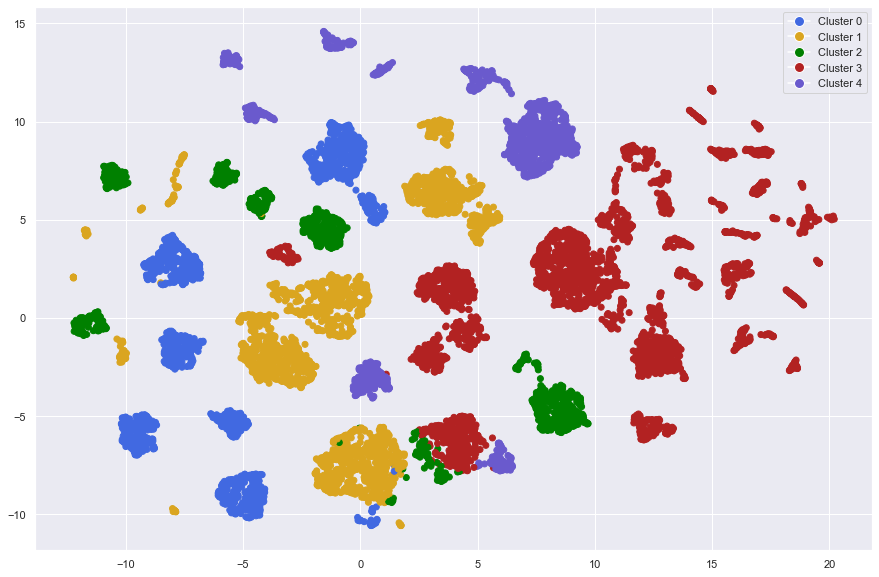

In [67]:
warnings.filterwarnings

# Initialize and fit UMAP
umap_model = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.3)
two_dim = umap_model.fit_transform(df)

# Define a dictionary that maps each cluster label to a color
colors_dict = {0: 'royalblue', 1: 'goldenrod', 2: 'green', 3: 'firebrick', 4: 'slateblue'}

# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(15,10))

# UMAP visualization
scatter = ax.scatter(two_dim[:,0], two_dim[:,1], c=df['gmm_labels_demographic'].map(colors_dict))

# Add a colorbar to the plot
# cbar = fig.colorbar(scatter, ax=ax, **{'ticks':list(colors_dict.keys())})

# Add a legend to the plot
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markerfacecolor=color, markersize=10) for i, color in colors_dict.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()


In [171]:
##Decision Tree

In [172]:
# Preparing the data
X = df_concat.drop(columns=['gmm_labels_demographic'])
y = df_concat.gmm_labels_demographic

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 85.18% of the customers correctly


write lines to 'decision_tree_final'
run [WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'decision_tree_final']
run [WindowsPath('dot'), '-Kdot', '-Tsvg']


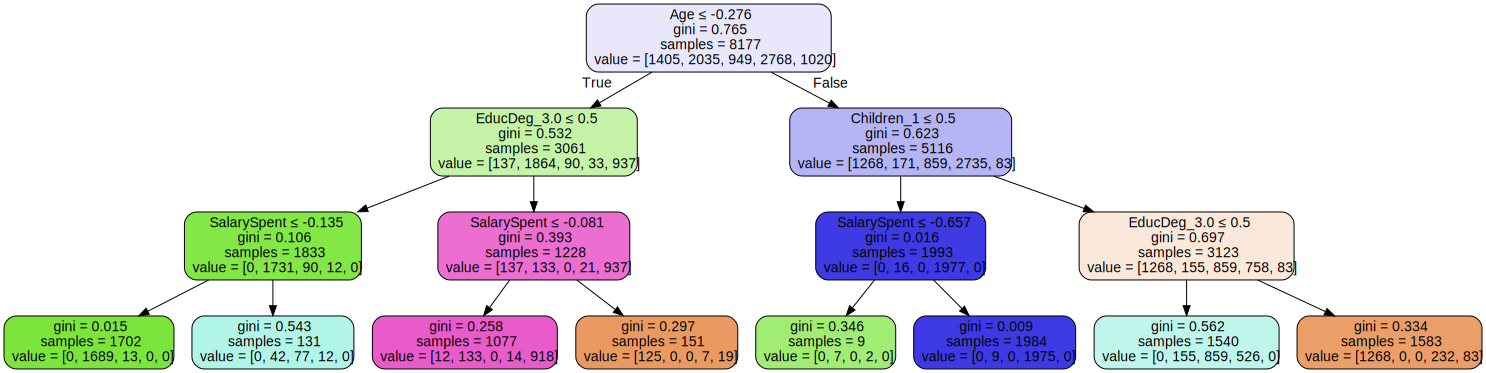

In [173]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_final")
graph

In [45]:

# Selecting number of components based on AIC and BIC
#n_components = np.arange(1, 16) #iterate the number of components from 1 to 15
#models = [GaussianMixture(n, covariance_type='spherical', n_init=10, random_state=1).fit(dfDemographic_metric)
#         for n in n_components]

# compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
#bic_values = [gmm.bic(dfDemographic_metric) for gmm in models] #compute for every gmm in my list of models
#aic_values = [gmm.aic(dfDemographic_metric) for gmm in models]
#plt.plot(n_components, bic_values, label='BIC')
#plt.plot(n_components, aic_values, label='AIC')
#plt.legend(loc='best')
#plt.xlabel('n_components')
#plt.xticks(n_components)
#plt.show()

In [46]:
# Performing GMM clustering
#gmm = GaussianMixture(n_components=5, covariance_type='spherical',n_init=40,random_state=1)
#gmm_labels = gmm.fit_predict(dfDemographic_metric)

In [47]:
#df_concat = pd.concat([dfDemographic_metric, pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)
#df_concat.head()
#df_demographic_centroids = df_concat.groupby('gmm_labels').mean()

In [48]:
#df_concat = pd.concat([dfDemographic_metric, pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)
#df_concat.head()
#df_demographic_centroids = df_concat.groupby('gmm_labels').mean()

In [49]:
#Counter(gmm_labels)

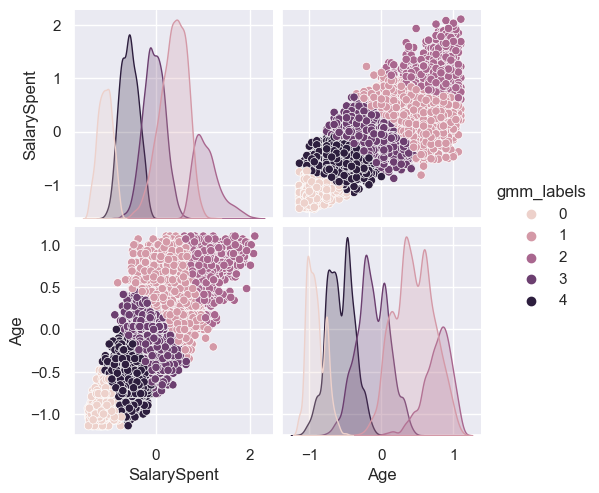

In [341]:
# Fit a GMM to the data with 5 clusters and spherical covariance
#gmm = GaussianMixture(n_components=5, covariance_type='spherical', n_init=40, random_state=1)
#gmm_labels = gmm.fit_predict(dfDemographic_metric)

# Concatenate the cluster labels to the original dataframe
#df_concat = pd.concat([dfDemographic_metric, pd.Series(gmm_labels, index=dfDemographic_metric.index, name="gmm_labels")], axis=1)

# Plot the scatter plot matrix
#sns.pairplot(df_concat, hue='gmm_labels')
#plt.show()

In [174]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled_1',
    "ClaimsRate"
]

dfInsurance=df[insurance_features_ohc]

demographic_features_ohc=[
    'SalarySpent',
    'Children_1',
    'EducDeg_2.0',
    'EducDeg_3.0',
    'EducDeg_4.0',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

In [175]:
df

ClaimsRate       Age  MotorPercentageSpent  HouseholdPercentageSpent  \
CustID                                                                          
1.0       -0.559322 -0.482759              0.357075                 -0.257555   
2.0        0.677966 -0.965517             -0.865761                  0.978485   
3.0       -0.745763 -0.103448             -0.372926                  0.415420   
4.0        0.457627 -0.482759             -0.308089                 -0.430432   
5.0        0.305085 -0.206897              0.289338                 -0.416528   
...             ...       ...                   ...                       ...   
10292.0    0.406780  0.620690              0.482015                 -0.412452   
10293.0   -1.220339  0.551724             -0.844494                  1.956734   
10294.0   -0.864407 -0.310345              0.395354                  0.003804   
10295.0   -0.118644 -0.344828             -0.462120                  0.303161   
10296.0   -0.762712 -0.482759              0.494030                 -0.178122   

         HealthPercentageSpent  LifePercentageSpent  WorkPercentageSpent  \
CustID                                                                     
1.0                   0.012021             0.619809            -0.177071   
2.0                  -0.588569             3.104708             1.449848   
3.0                  -0.326120             1.419295             1.756908   
4.0                   1.962267             0.414575             0.212183   
5.0                   0.471710            -0.089648             0.545922   
...                        ...                  ...                  ...   
10292.0               0.345732            -0.343630            -0.218839   
10293.0              -0.771494            -0.452065             0.681850   
10294.0              -0.089986            -0.292254            -0.504747   
10295.0               0.248064             0.825547             1.971202   
10296.0              -0.046498            -0.429798            -0.286435   

         SalarySpent  EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  \
CustID                                                                    
1.0        -0.140650          1.0          0.0          0.0         1.0   
2.0        -1.225286          1.0          0.0          0.0         1.0   
3.0        -0.224922          0.0          0.0          0.0         0.0   
4.0        -0.759114          0.0          1.0          0.0         1.0   
5.0        -0.341952          0.0          1.0          0.0         1.0   
...              ...          ...          ...          ...         ...   
10292.0     0.588033          0.0          0.0          1.0         0.0   
10293.0    -0.815027          0.0          0.0          0.0         0.0   
10294.0     0.254178          0.0          1.0          0.0         1.0   
10295.0    -0.452788          0.0          0.0          0.0         1.0   
10296.0     0.259829          0.0          0.0          1.0         1.0   

         Cancelled_1  
CustID                
1.0              0.0  
2.0              0.0  
3.0              0.0  
4.0              0.0  
5.0              0.0  
...              ...  
10292.0          0.0  
10293.0          0.0  
10294.0          0.0  
10295.0          0.0  
10296.0          0.0  

[10222 rows x 13 columns]

In [176]:
df['gmm_labels_insurance'] = gmm_labels_insurance
df['gmm_labels_demographic'] = gmm_labels_demographic

In [177]:
contigency_table = df.groupby(['gmm_labels_insurance','gmm_labels_demographic']).size().to_frame("size").reset_index().pivot('gmm_labels_insurance','gmm_labels_demographic',"size")
# number of entries that I have in each subcluster

contigency_table 

gmm_labels_demographic    0     1    2     3    4
gmm_labels_insurance                             
0                        35   650   89   360   87
1                       548   683  416  1621  731
2                       149  1029  238   702  206
3                       490    67  216   417  139
4                       540    96  216   377  120

## Merging using Hierarchical clustering

In [178]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['gmm_labels_insurance','gmm_labels_demographic']).mean()
df_centroids

ClaimsRate       Age  \
gmm_labels_insurance gmm_labels_demographic                         
0                    0                         0.028087  0.127094   
                     1                         0.108188 -0.857135   
                     2                         0.074843  0.116234   
                     3                         0.109322  0.586590   
                     4                         0.099357 -0.681332   
1                    0                        -0.033032  0.116914   
                     1                        -0.023352 -0.539708   
                     2                         0.021594  0.044264   
                     3                         0.004956  0.660937   
                     4                        -0.023163 -0.595217   
2                    0                        -0.194631  0.281879   
                     1                        -0.114674 -0.738514   
                     2                        -0.163011  0.304694   
                     3                        -0.100415  0.628647   
                     4                        -0.166530 -0.626046   
3                    0                        -0.877240 -0.009923   
                     1                        -0.808500 -0.453423   
                     2                        -0.834667 -0.023787   
                     3                        -0.834370  0.339535   
                     4                        -0.790513 -0.471099   
4                    0                         0.470339  0.018391   
                     1                         0.427966 -0.400503   
                     2                         0.445700  0.004630   
                     3                         0.493099  0.373822   
                     4                         0.457203 -0.442241   

                                             MotorPercentageSpent  \
gmm_labels_insurance gmm_labels_demographic                         
0                    0                                   0.012453   
                     1                                  -0.730564   
                     2                                  -0.223476   
                     3                                  -0.335380   
                     4                                  -0.453625   
1                    0                                   0.181131   
                     1                                  -0.089182   
                     2                                   0.111858   
                     3                                  -0.014545   
                     4                                  -0.011643   
2                    0                                  -0.185679   
                     1                                  -0.701651   
                     2                                  -0.328541   
                     3                                  -0.519738   
                     4                                  -0.473490   
3                    0                                   0.917640   
                     1                                   0.753153   
                     2                                   0.802855   
                     3                                   0.867660   
                     4                                   0.695303   
4                    0                                   0.929523   
                     1                                   0.770582   
                     2                                   0.829743   
                     3                                   0.900652   
                     4                                   0.765228   

                                             HouseholdPercentageSpent  \
gmm_labels_insurance gmm_labels_demographic                             
0                    0                                      -0.393832   
                     1                                       0.478702   
                     2   

In [179]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

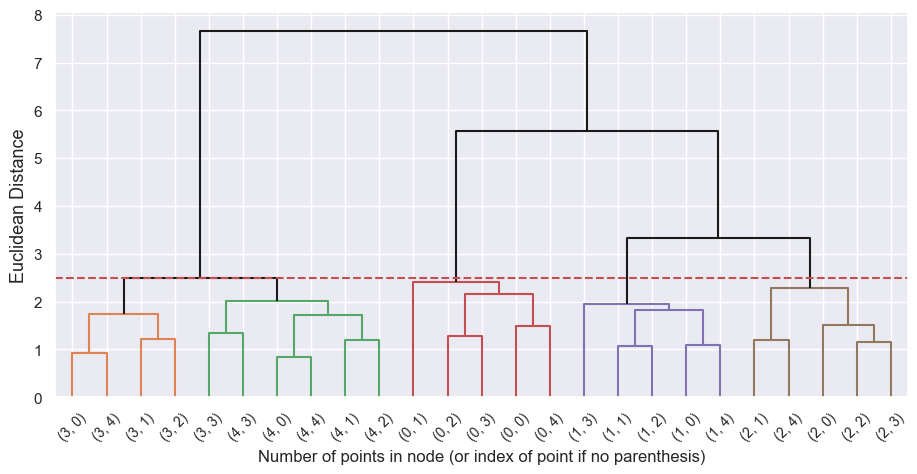

In [180]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

warnings.filterwarnings

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.5
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
#plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [181]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='complete', 
    affinity='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

ClaimsRate       Age  \
gmm_labels_insurance gmm_labels_demographic                         
0                    0                         0.028087  0.127094   
                     1                         0.108188 -0.857135   
                     2                         0.074843  0.116234   
                     3                         0.109322  0.586590   
                     4                         0.099357 -0.681332   
1                    0                        -0.033032  0.116914   
                     1                        -0.023352 -0.539708   
                     2                         0.021594  0.044264   
                     3                         0.004956  0.660937   
                     4                        -0.023163 -0.595217   
2                    0                        -0.194631  0.281879   
                     1                        -0.114674 -0.738514   
                     2                        -0.163011  0.304694   
                     3                        -0.100415  0.628647   
                     4                        -0.166530 -0.626046   
3                    0                        -0.877240 -0.009923   
                     1                        -0.808500 -0.453423   
                     2                        -0.834667 -0.023787   
                     3                        -0.834370  0.339535   
                     4                        -0.790513 -0.471099   
4                    0                         0.470339  0.018391   
                     1                         0.427966 -0.400503   
                     2                         0.445700  0.004630   
                     3                         0.493099  0.373822   
                     4                         0.457203 -0.442241   

                                             MotorPercentageSpent  \
gmm_labels_insurance gmm_labels_demographic                         
0                    0                                   0.012453   
                     1                                  -0.730564   
                     2                                  -0.223476   
                     3                                  -0.335380   
                     4                                  -0.453625   
1                    0                                   0.181131   
                     1                                  -0.089182   
                     2                                   0.111858   
                     3                                  -0.014545   
                     4                                  -0.011643   
2                    0                                  -0.185679   
                     1                                  -0.701651   
                     2                                  -0.328541   
                     3                                  -0.519738   
                     4                                  -0.473490   
3                    0                                   0.917640   
                     1                                   0.753153   
                     2                                   0.802855   
                     3                                   0.867660   
                     4                                   0.695303   
4                    0                                   0.929523   
                     1                                   0.770582   
                     2                                   0.829743   
                     3                                   0.900652   
                     4                                   0.765228   

                                             HouseholdPercentageSpent  \
gmm_labels_insurance gmm_labels_demographic                             
0                    0                                      -0.393832   
                     1                                       0.478702   
                     2   

In [182]:
df_centroids['hclust_labels'].to_dict()

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (1, 0): 3,
 (1, 1): 3,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 3,
 (2, 0): 2,
 (2, 1): 2,
 (2, 2): 2,
 (2, 3): 2,
 (2, 4): 2,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 4,
 (3, 4): 1,
 (4, 0): 1,
 (4, 1): 1,
 (4, 2): 1,
 (4, 3): 4,
 (4, 4): 1}

In [183]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['gmm_labels_insurance'], row['gmm_labels_demographic'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()



ClaimsRate       Age  MotorPercentageSpent  \
merged_labels                                               
0                0.103166 -0.319777             -0.536054   
1               -0.174089 -0.098964              0.858354   
2               -0.125040 -0.143317             -0.555186   
3               -0.017662 -0.303297              0.032115   
4               -0.063768  0.560620              0.280656   

               HouseholdPercentageSpent  HealthPercentageSpent  \
merged_labels                                                    
0                              0.167030               0.276255   
1                             -0.457348              -0.462627   
2                              1.075148              -0.251090   
3                             -0.017177               0.518048   
4                             -0.200274               0.307859   

               LifePercentageSpent  WorkPercentageSpent  SalarySpent  \
merged_labels                                                          
0                         1.915099             1.957372    -0.273018   
1                        -0.381707            -0.390379     0.084306   
2                         0.528500             0.526720    -0.479464   
3                         0.093322             0.086252    -0.267146   
4                        -0.025849            -0.065815     0.697225   

               EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  Cancelled_1  \
merged_labels                                                                   
0                 0.461097     0.206388     0.011466    0.638002     0.147420   
1                 0.251592     0.685775     0.054140    0.995754     0.523885   
2                 0.476334     0.274527     0.008606    0.639845     0.037435   
3                 0.353659     0.552145     0.049201    0.977292     0.134146   
4                 0.209110     0.539545     0.183437    0.318841     0.269565   

               gmm_labels_insurance  gmm_labels_demographic  
merged_labels                                                
0                          0.000000                1.847666  
1                          3.515924                1.095011  
2                          2.000000                1.908348  
3                          1.000000                1.866695  
4                          1.813665                3.000000

## Cluster analysis

In [184]:
df = df_.copy()

In [185]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [186]:
df

ClaimsRate       Age  MotorPercentageSpent  HouseholdPercentageSpent  \
CustID                                                                          
1.0       -0.559322 -0.482759              0.357075                 -0.257555   
2.0        0.677966 -0.965517             -0.865761                  0.978485   
3.0       -0.745763 -0.103448             -0.372926                  0.415420   
4.0        0.457627 -0.482759             -0.308089                 -0.430432   
5.0        0.305085 -0.206897              0.289338                 -0.416528   
...             ...       ...                   ...                       ...   
10292.0    0.406780  0.620690              0.482015                 -0.412452   
10293.0   -1.220339  0.551724             -0.844494                  1.956734   
10294.0   -0.864407 -0.310345              0.395354                  0.003804   
10295.0   -0.118644 -0.344828             -0.462120                  0.303161   
10296.0   -0.762712 -0.482759              0.494030                 -0.178122   

         HealthPercentageSpent  LifePercentageSpent  WorkPercentageSpent  \
CustID                                                                     
1.0                   0.012021             0.619809            -0.177071   
2.0                  -0.588569             3.104708             1.449848   
3.0                  -0.326120             1.419295             1.756908   
4.0                   1.962267             0.414575             0.212183   
5.0                   0.471710            -0.089648             0.545922   
...                        ...                  ...                  ...   
10292.0               0.345732            -0.343630            -0.218839   
10293.0              -0.771494            -0.452065             0.681850   
10294.0              -0.089986            -0.292254            -0.504747   
10295.0               0.248064             0.825547             1.971202   
10296.0              -0.046498            -0.429798            -0.286435   

         SalarySpent  EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  \
CustID                                                                    
1.0        -0.140650          1.0          0.0          0.0         1.0   
2.0        -1.225286          1.0          0.0          0.0         1.0   
3.0        -0.224922          0.0          0.0          0.0         0.0   
4.0        -0.759114          0.0          1.0          0.0         1.0   
5.0        -0.341952          0.0          1.0          0.0         1.0   
...              ...          ...          ...          ...         ...   
10292.0     0.588033          0.0          0.0          1.0         0.0   
10293.0    -0.815027          0.0          0.0          0.0         0.0   
10294.0     0.254178          0.0          1.0          0.0         1.0   
10295.0    -0.452788          0.0          0.0          0.0         1.0   
10296.0     0.259829          0.0          0.0          1.0         1.0   

         Cancelled_1  gmm_labels_insurance  gmm_labels_demographic  \
CustID                                                               
1.0              0.0                     1                       1   
2.0              0.0                     0                       1   
3.0              0.0                     0                       3   
4.0              0.0                     1                       4   
5.0              0.0                     1                       4   
...              ...                   ...                     ...   
10292.0          0.0                     1                       3   
10293.0          0.0                     2                       3   
10294.0          0.0                     3                       0   
10295.0          0.0                     0                       1   
10296.0          0.0                     3                       3   

         merged_labels  
CustID                  
1.0                  3  
2.0 

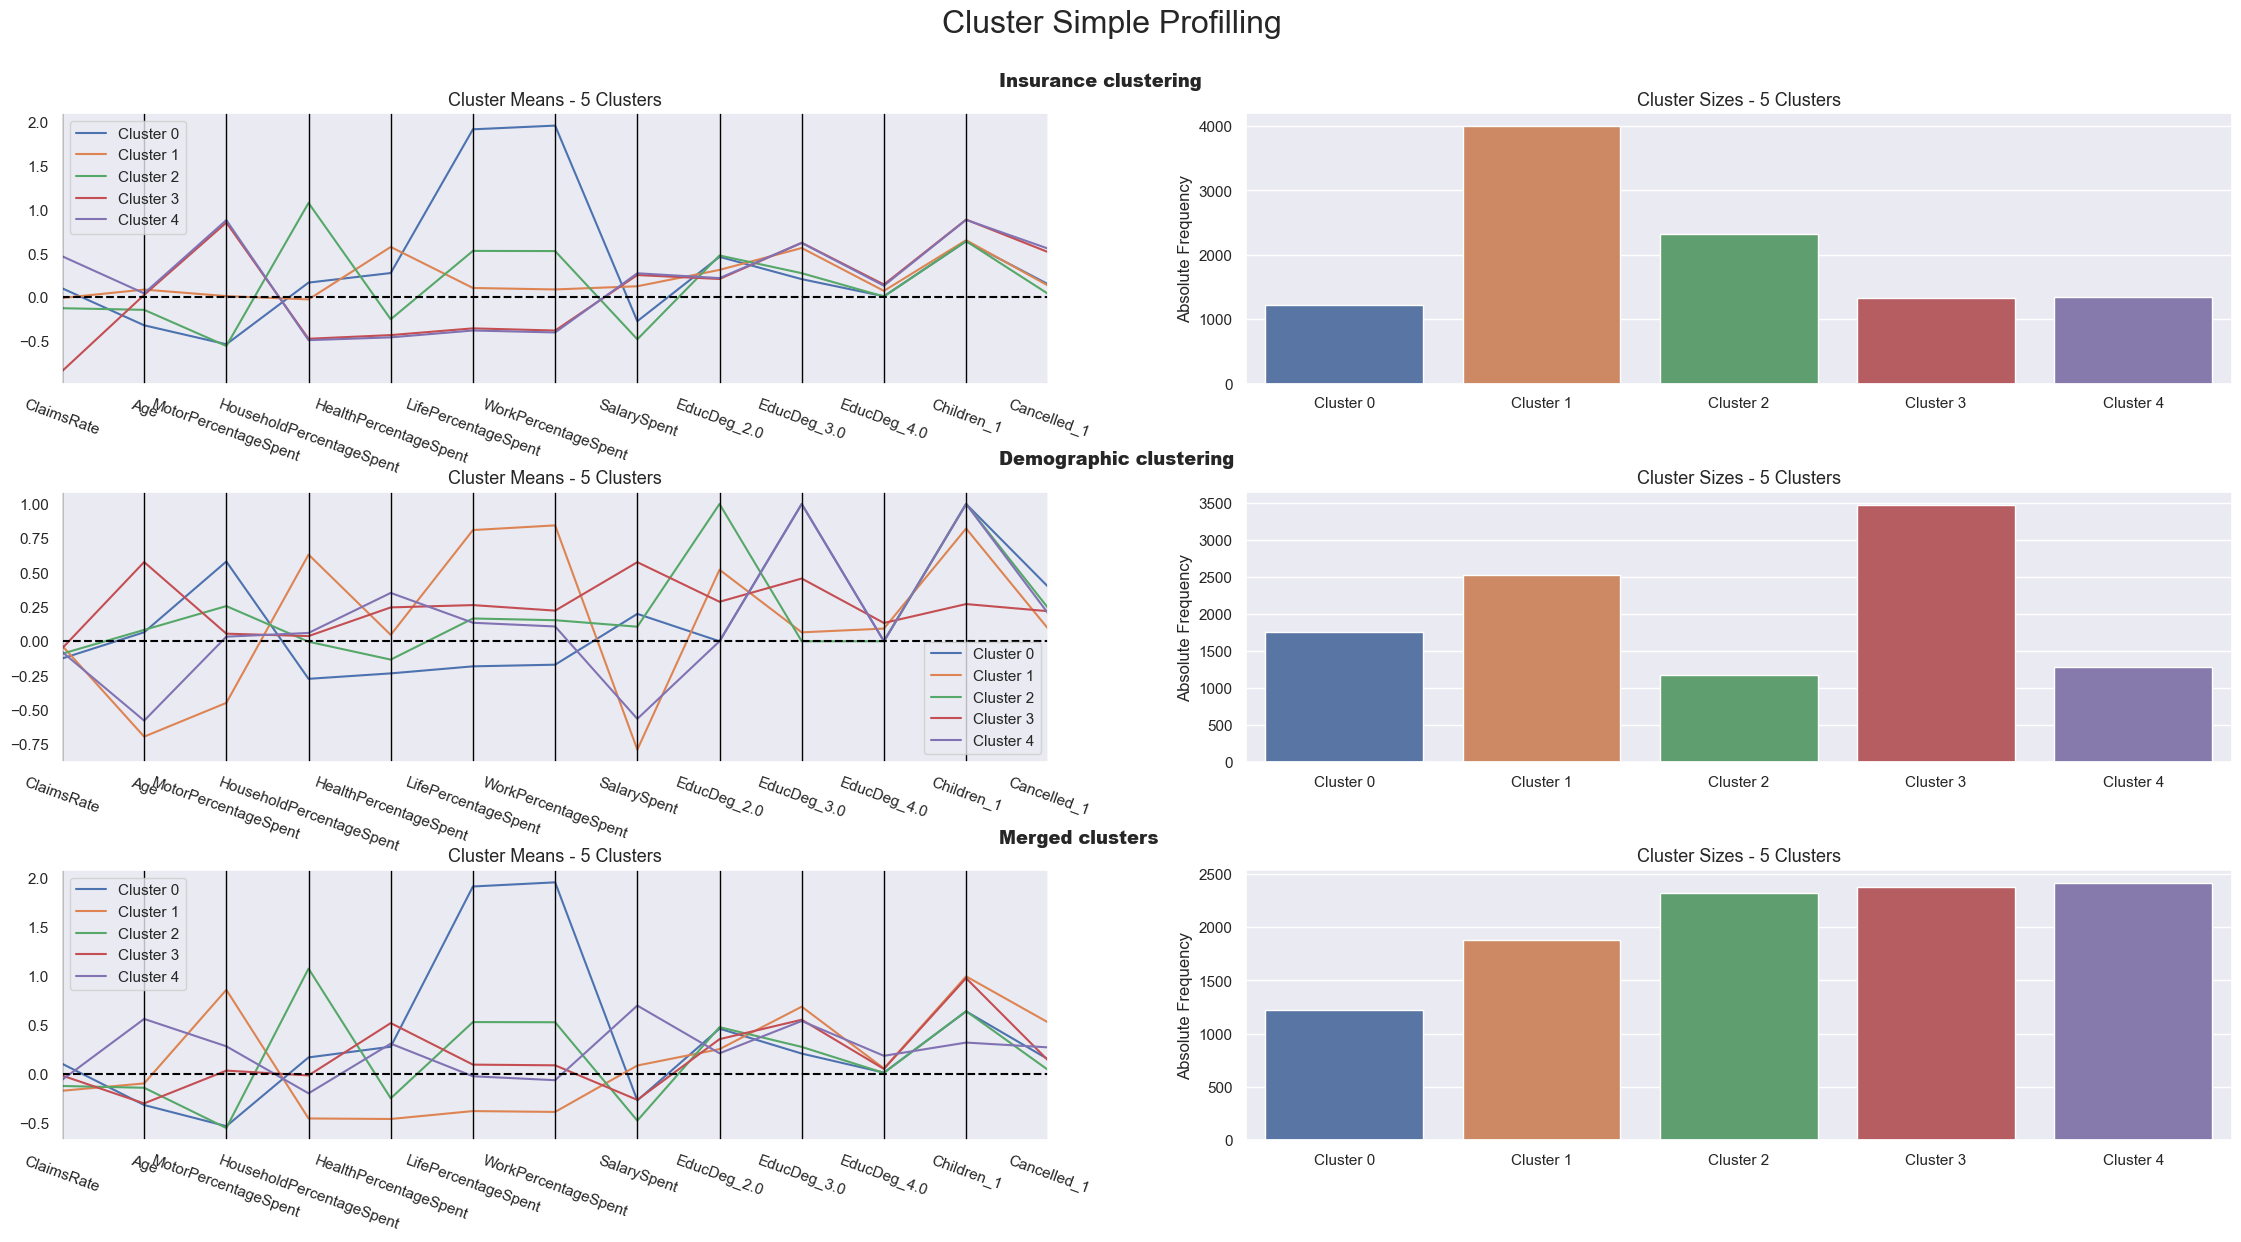

In [187]:
warnings.filterwarnings
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[df.columns.to_list()], 
    label_columns = ['gmm_labels_insurance', 'gmm_labels_demographic', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Insurance clustering", "Demographic clustering", "Merged clusters"]
)

In [188]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [189]:
r2_variables(df[df.columns.to_list()],'merged_labels')

ClaimsRate                  0.023692
Age                         0.320179
MotorPercentageSpent        0.639199
HouseholdPercentageSpent    0.570481
HealthPercentageSpent       0.278491
LifePercentageSpent         0.477654
WorkPercentageSpent         0.467233
SalarySpent                 0.424522
EducDeg_2.0                 0.051176
EducDeg_3.0                 0.113549
EducDeg_4.0                 0.070126
Children_1                  0.336353
Cancelled_1                 0.161639
gmm_labels_insurance        0.738483
gmm_labels_demographic      0.222644
merged_labels               1.000000
dtype: float64

In [ ]:
df.columns

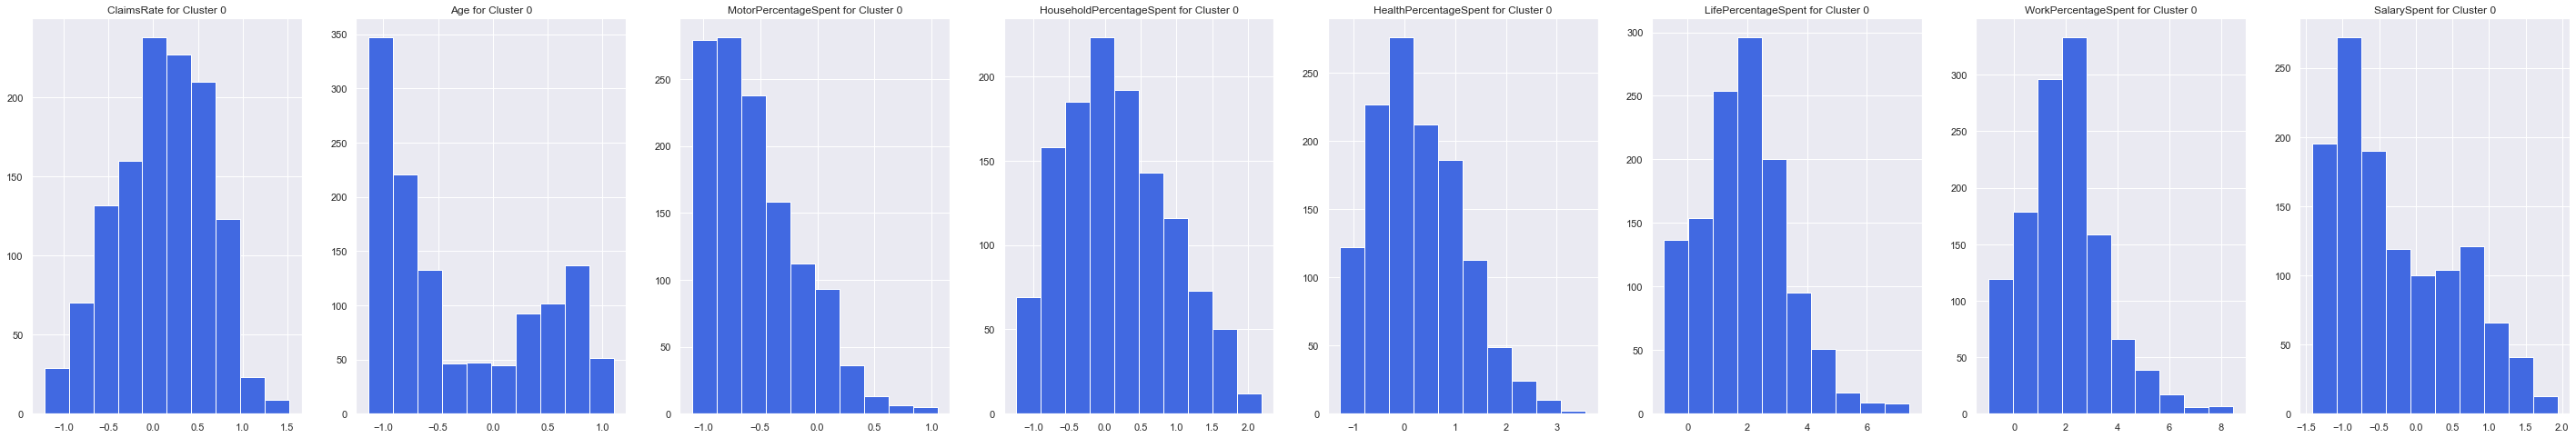

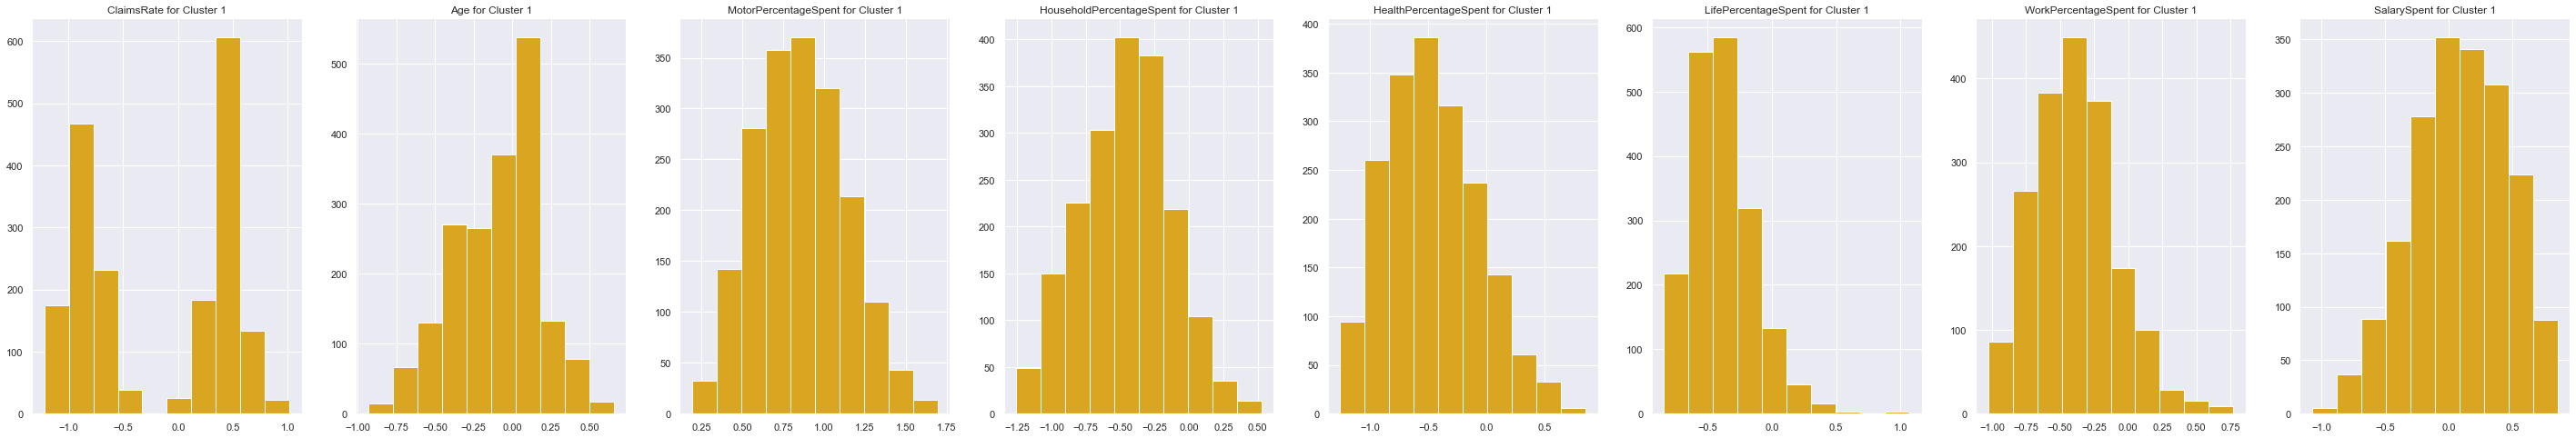

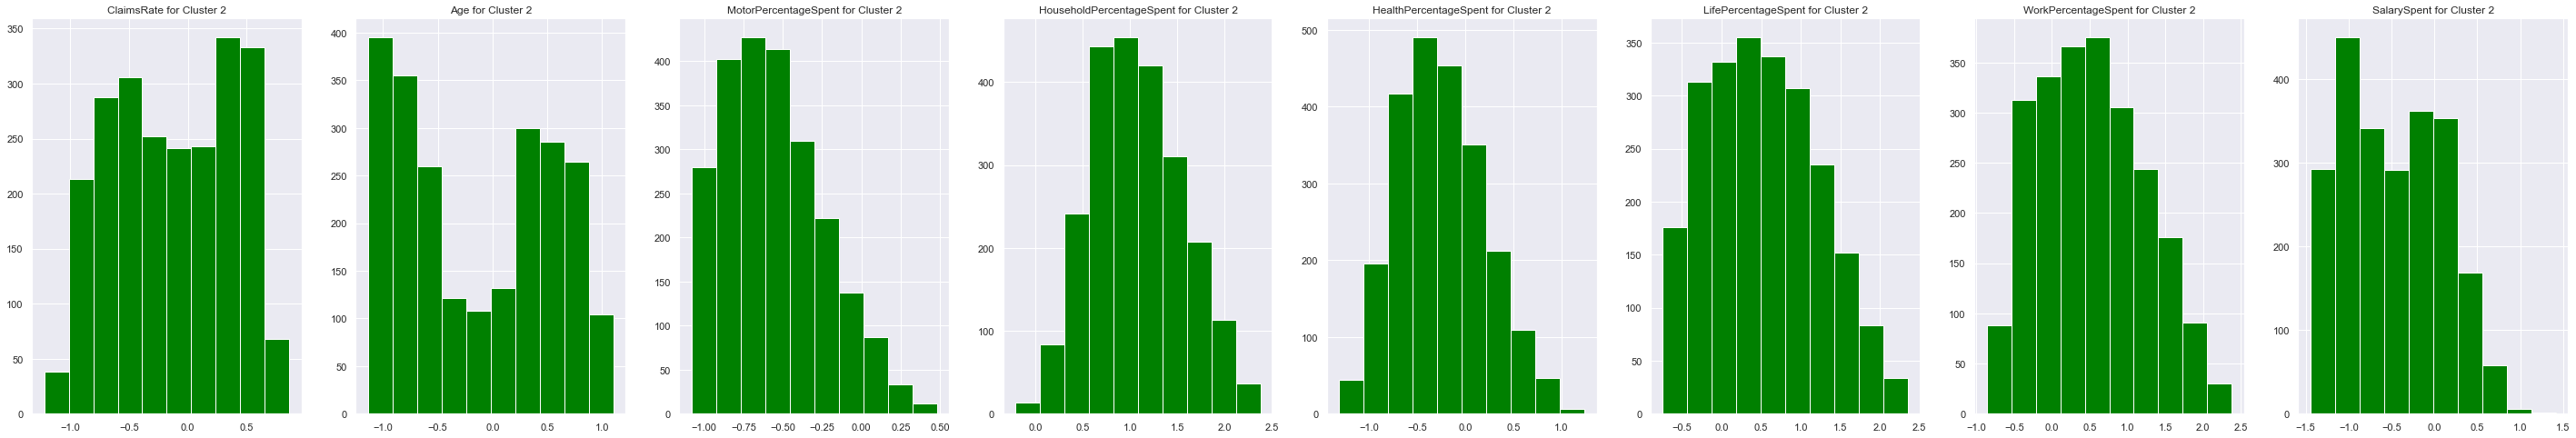

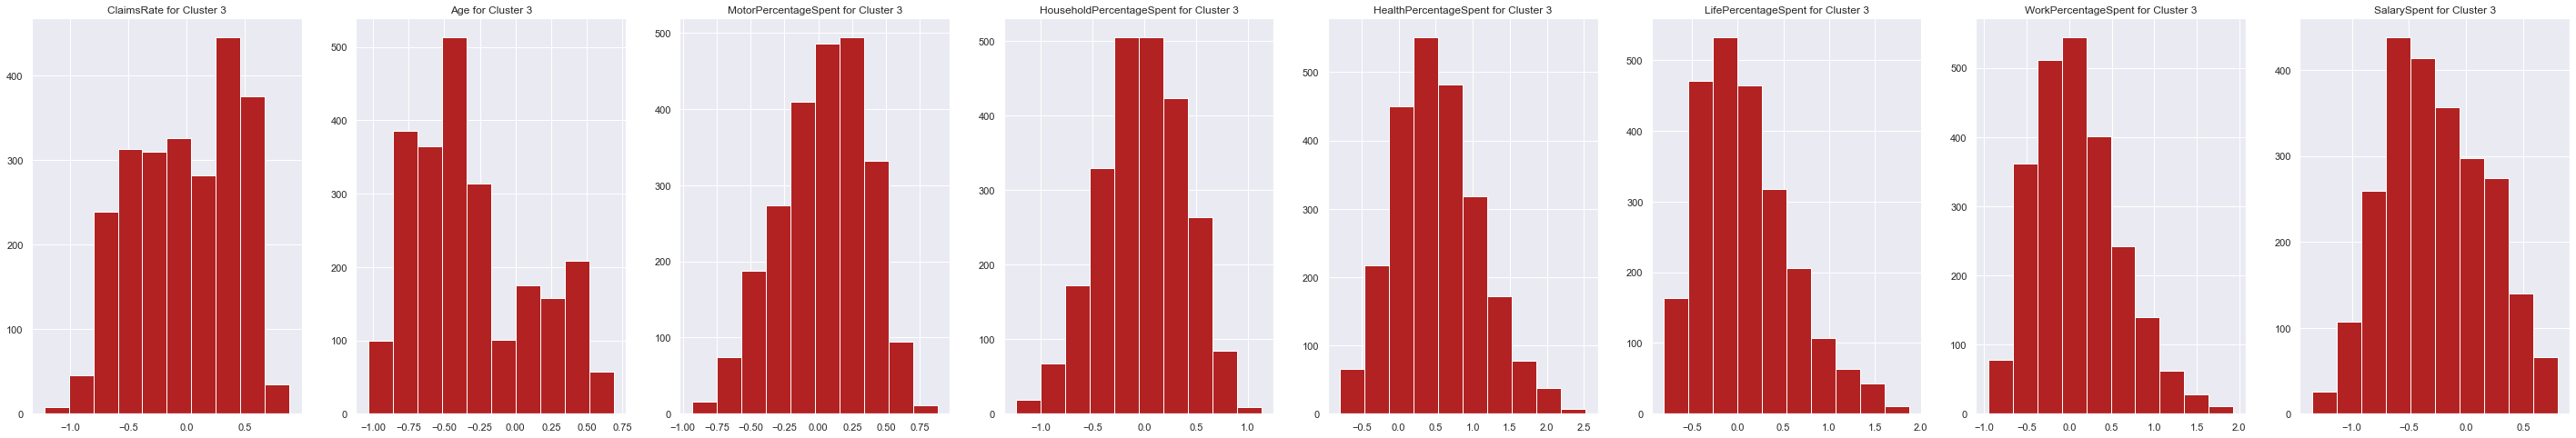

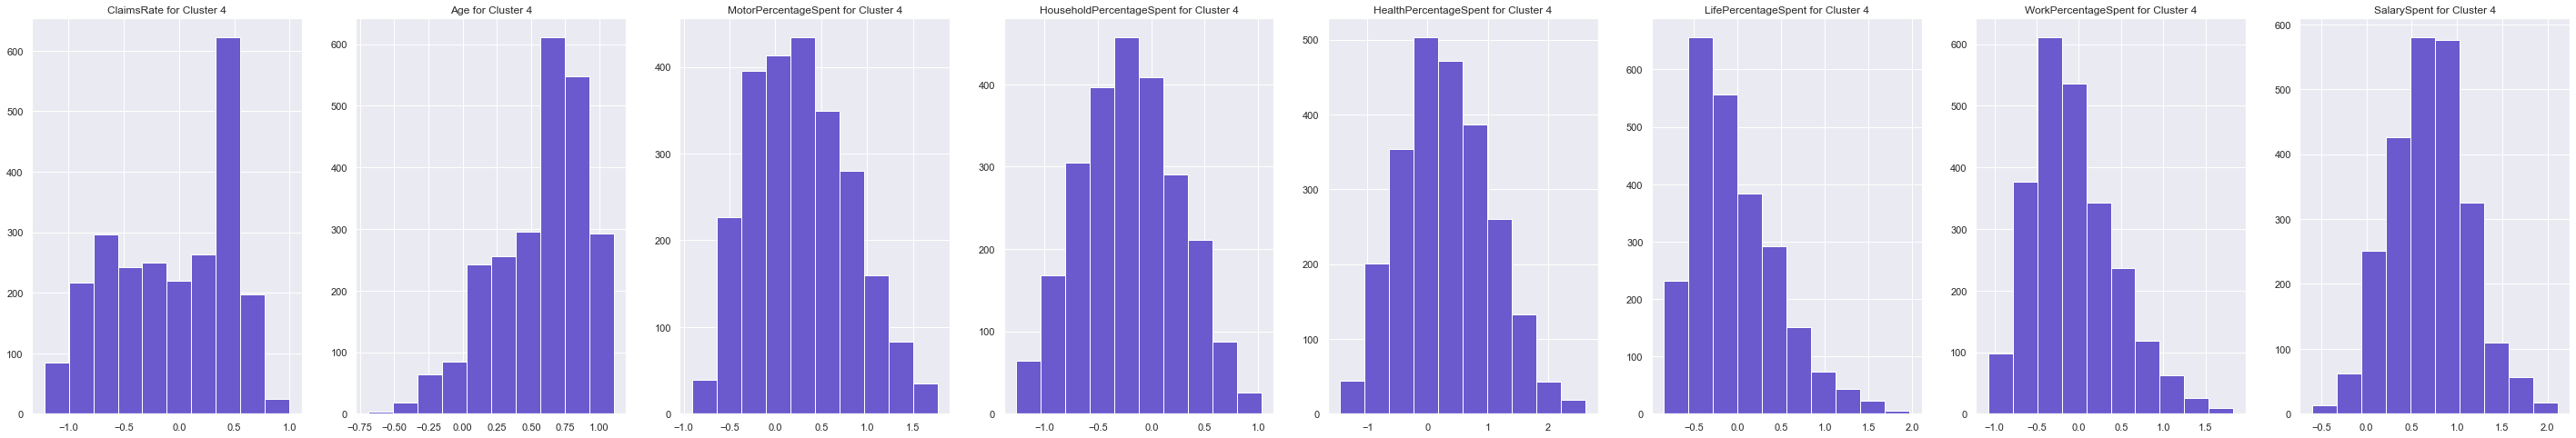

In [58]:
# Defining a list of columns to plot
columns = ['ClaimsRate', 'Age', 'MotorPercentageSpent', 'HouseholdPercentageSpent',
       'HealthPercentageSpent', 'LifePercentageSpent', 'WorkPercentageSpent',
       'SalarySpent']

# Defining a list of colors to use
colors = ['royalblue', 'goldenrod', 'green', 'firebrick', 'slateblue']

# Loop through the clusters and plot histograms
for cluster, color in enumerate(colors):
    fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(50,8))
    for ax, col in zip(axs, columns):
        ax.hist(df[col].loc[df['merged_labels'] == cluster], color=color)
        ax.set_title(f"{col} for Cluster {cluster}")
    plt.show()

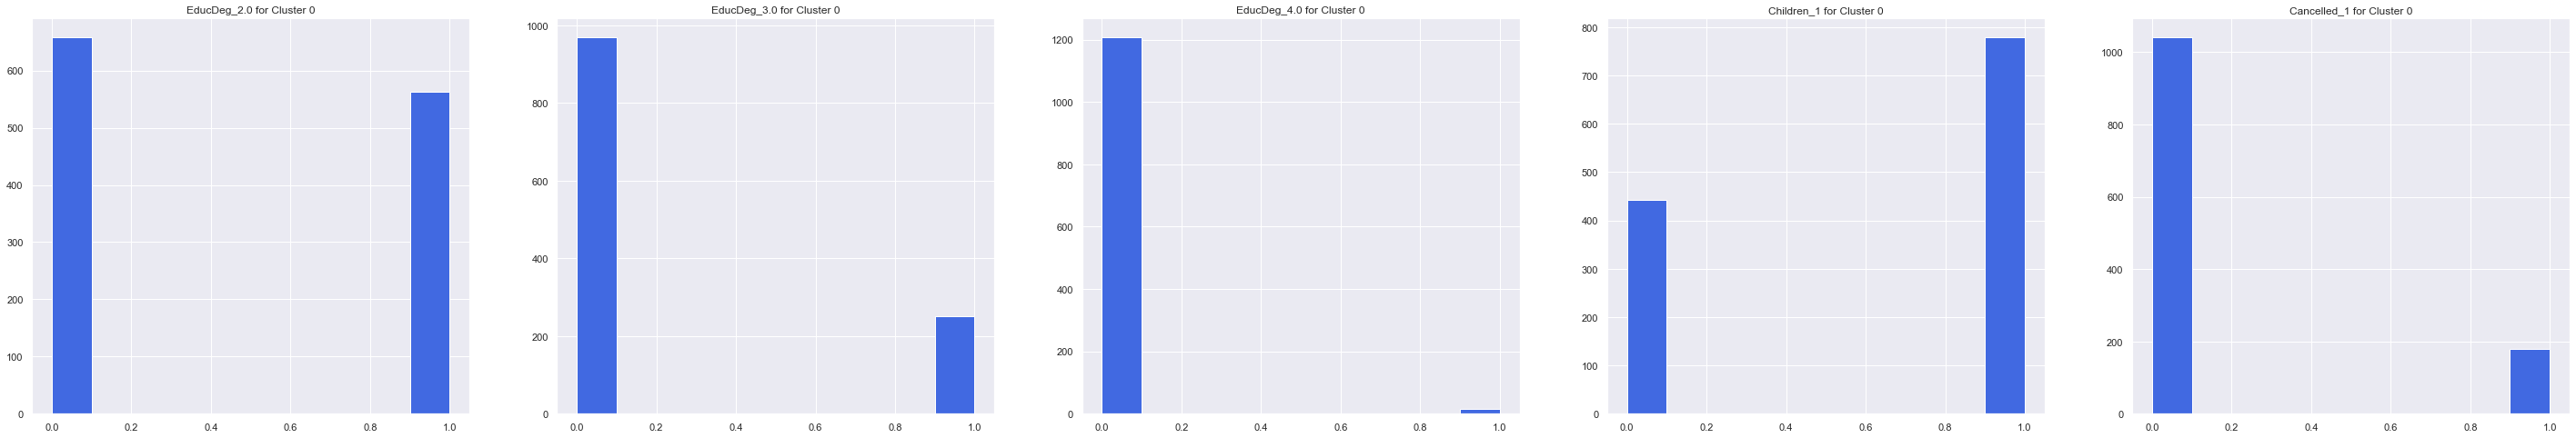

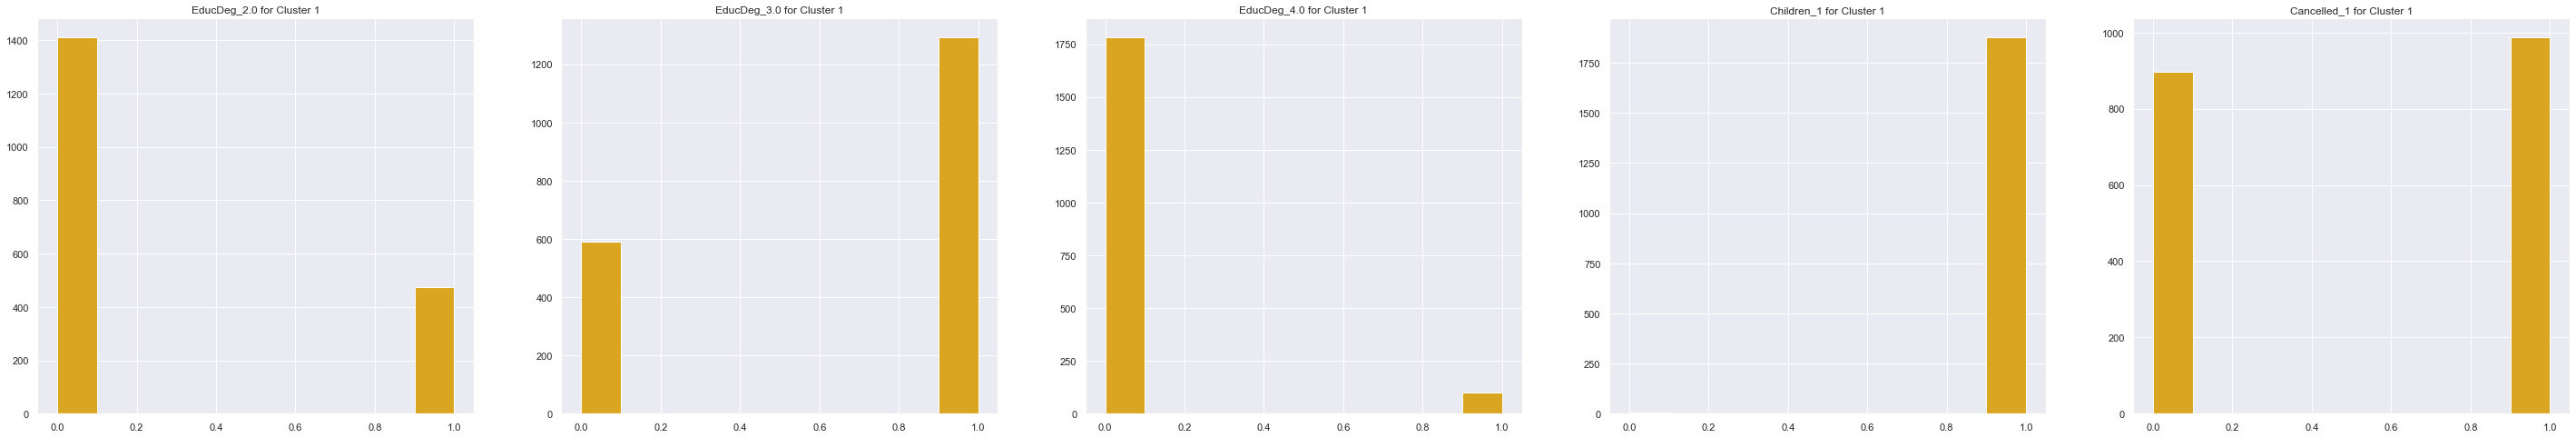

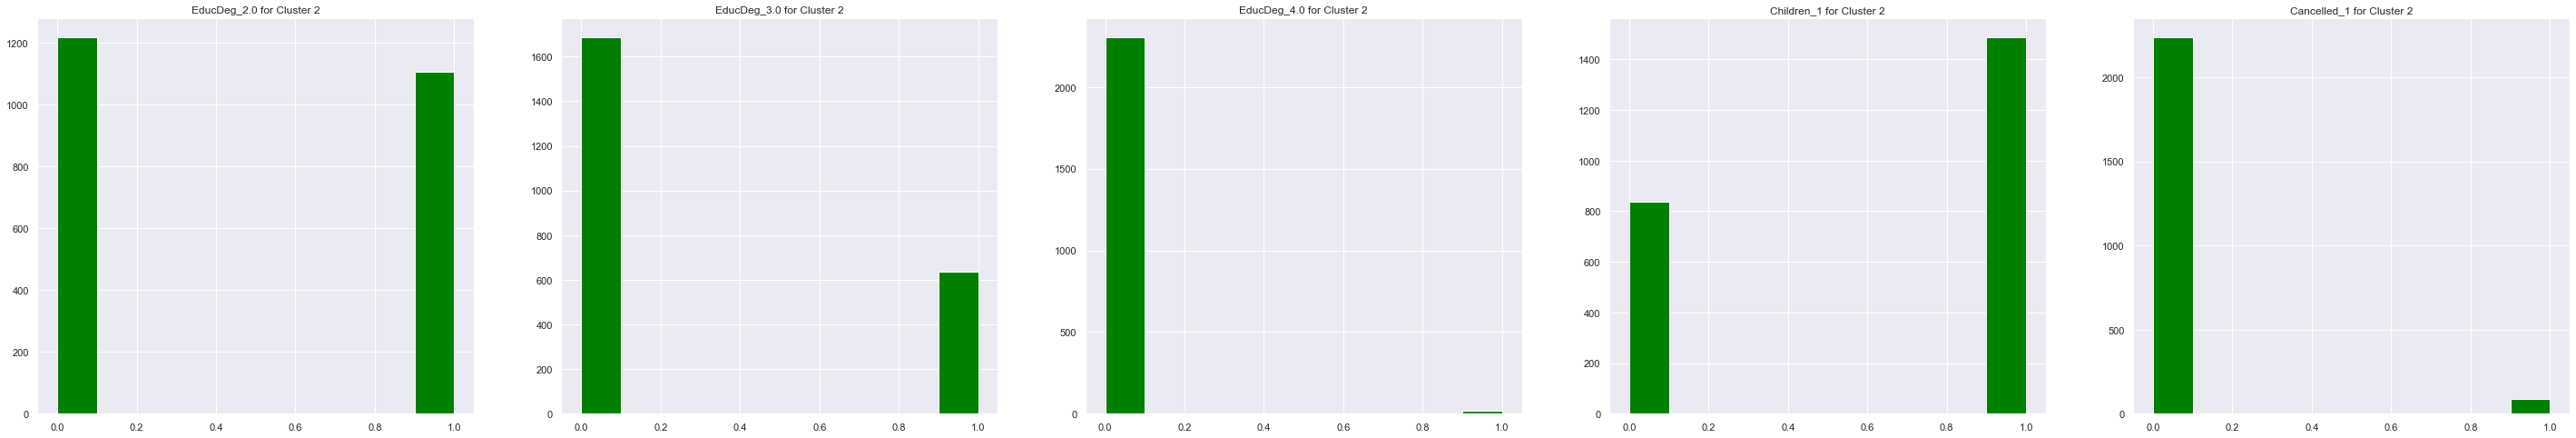

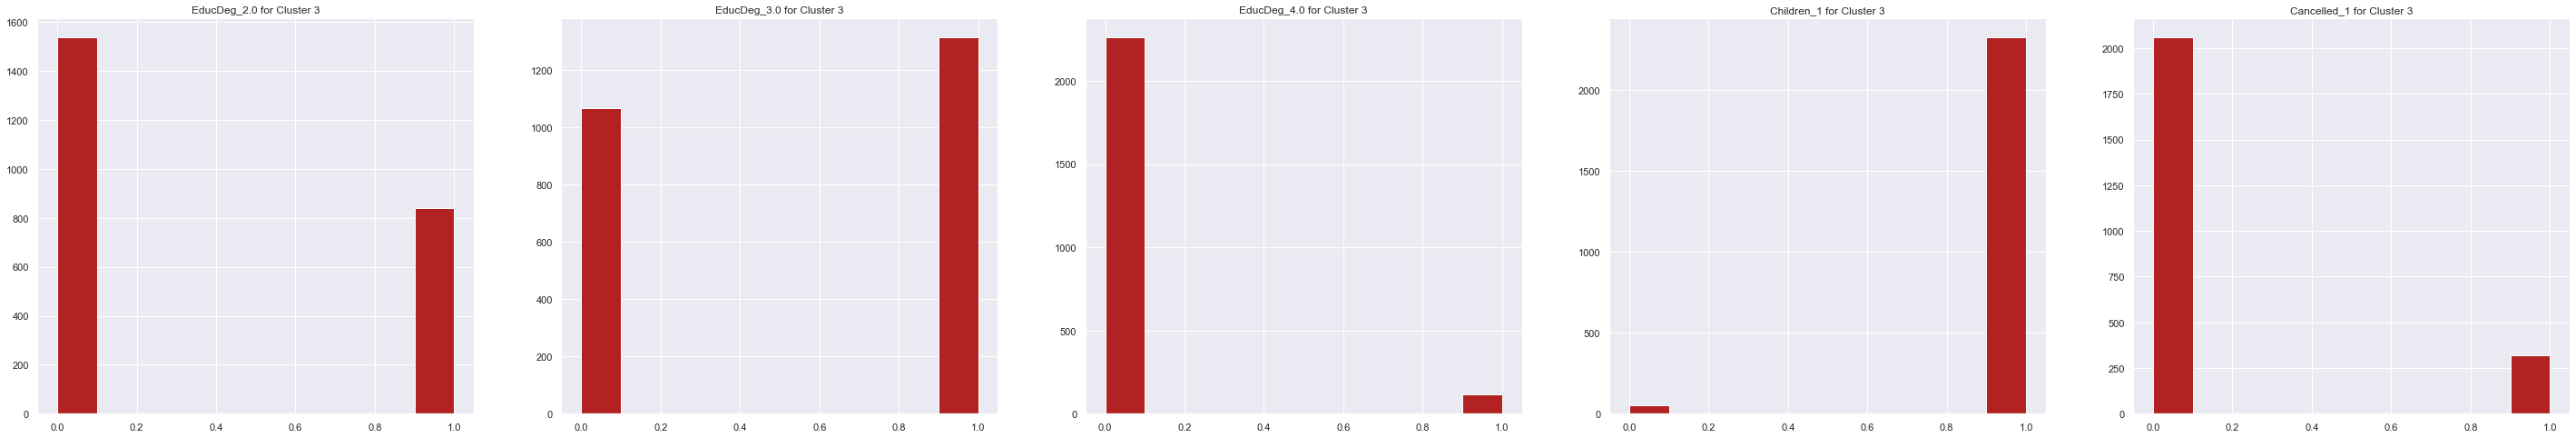

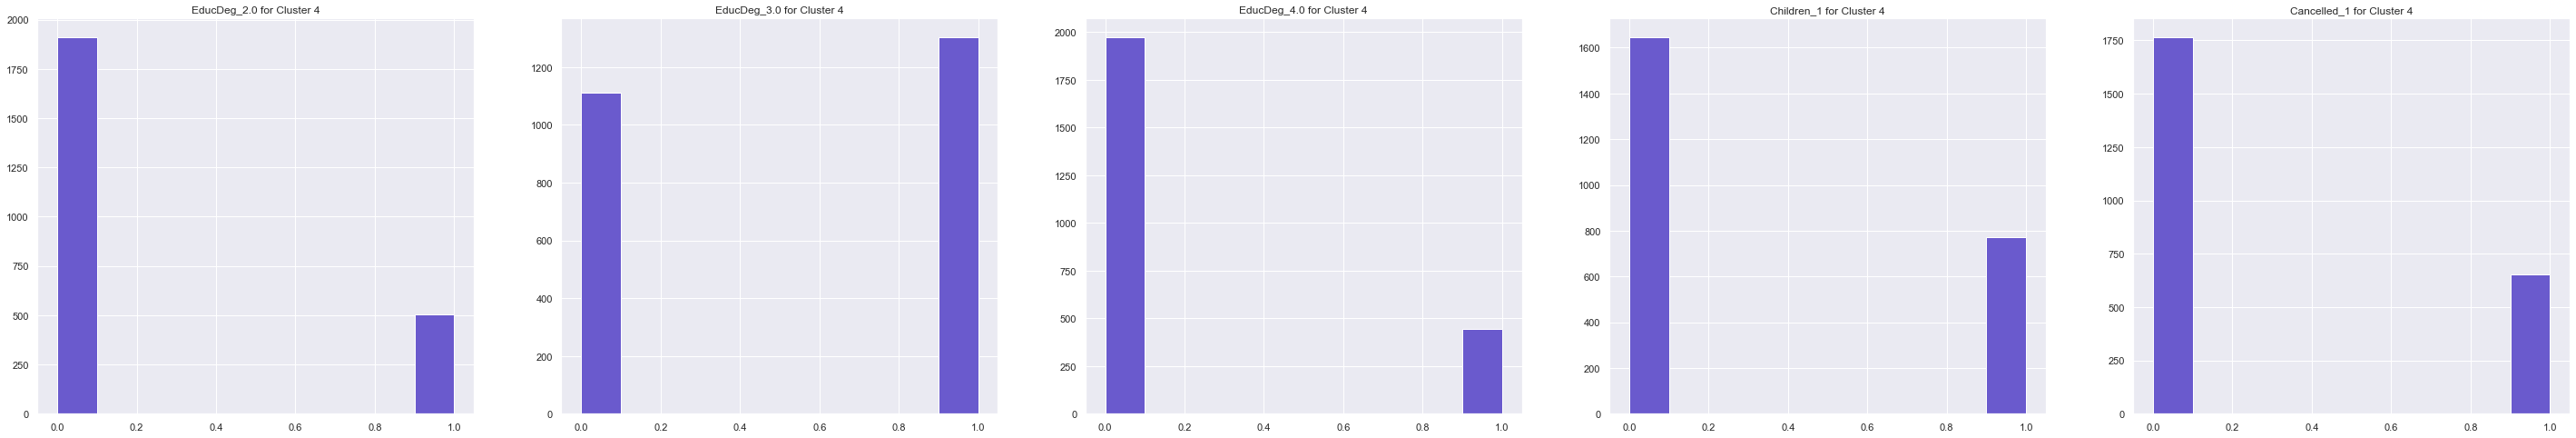

In [59]:
# Defining a list of columns to plot
columns = ['EducDeg_2.0', 'EducDeg_3.0', 'EducDeg_4.0',
       'Children_1', 'Cancelled_1']

# Defining a list of colors to use
colors = ['royalblue', 'goldenrod', 'green', 'firebrick', 'slateblue']

# Loop through the clusters and plot histograms
for cluster, color in enumerate(colors):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,8))
    for ax, col in zip(axs, columns):
        ax.hist(df[col].loc[df['merged_labels'] == cluster], color=color)
        ax.set_title(f"{col} for Cluster {cluster}")
    plt.show()

## Cluster visualization using UMAP

bytecode dump:
>          0	NOP(arg=None, lineno=770)
           2	LOAD_GLOBAL(arg=0, lineno=770)
           4	LOAD_METHOD(arg=1, lineno=770)
           6	LOAD_FAST(arg=0, lineno=770)
           8	LOAD_ATTR(arg=2, lineno=770)
          10	LOAD_CONST(arg=1, lineno=770)
          12	BINARY_SUBSCR(arg=None, lineno=770)
          14	CALL_METHOD(arg=1, lineno=770)
          16	LOAD_METHOD(arg=3, lineno=770)
          18	LOAD_GLOBAL(arg=0, lineno=770)
          20	LOAD_ATTR(arg=4, lineno=770)
          22	CALL_METHOD(arg=1, lineno=770)
          24	STORE_FAST(arg=4, lineno=770)
          26	LOAD_GLOBAL(arg=5, lineno=772)
          28	LOAD_ATTR(arg=6, lineno=772)
          30	LOAD_ATTR(arg=7, lineno=772)
          32	LOAD_METHOD(arg=8, lineno=772)
          34	LOAD_GLOBAL(arg=9, lineno=772)
          36	CALL_METHOD(arg=1, lineno=772)
          38	STORE_FAST(arg=5, lineno=772)
          40	LOAD_GLOBAL(arg=5, lineno=773)
          42	LOAD_ATTR(arg=6, lineno=773)
          44	LOAD_ATTR(arg=7, li

stack ['$86load_global.0', '$data88.1', '$indices90.2', '$hyperplanes92.3', '$offsets94.4', '$children96.5', '$point_indices98.6', '$rng_state100.7', '$leaf_size102.8']
dispatch pc=106, inst=POP_TOP(arg=None, lineno=778)
stack ['$104call_function.9']
dispatch pc=108, inst=JUMP_FORWARD(arg=22, lineno=778)
stack []
end state. edges=[Edge(pc=132, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=110 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])
stack: []
dispatch pc=110, inst=LOAD_GLOBAL(arg=14, lineno=789)
stack []
dispatch pc=112, inst=LOAD_FAST(arg=0, lineno=790)
stack ['$110load_global.0']
dispatch pc=114, inst=LOAD_FAST(arg=4, lineno=791)
stack ['$110load_global.0', '$data112.1']
dispatch pc=116, inst=LOAD_FAST(arg=5, lineno=792)
stack ['$110load_global.0', '$data112.1', '$indices114.2']
dispatch pc=118, inst=LOAD_FAST(arg=6, lineno=793)
stack ['$110load_global.0', '$data112.1', '$indices114.2', '$hyperplanes116.3']
dispatch pc=120, inst=LOAD_FAST(arg=

label 0:
    data = arg(0, name=data)                 ['data']
    rng_state = arg(1, name=rng_state)       ['rng_state']
    leaf_size = arg(2, name=leaf_size)       ['leaf_size']
    angular = arg(3, name=angular)           ['angular']
    $2load_global.0 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=arange) ['$2load_global.0', '$4load_method.1']
    $8load_attr.3 = getattr(value=data, attr=shape) ['$8load_attr.3', 'data']
    $const10.4 = const(int, 0)               ['$const10.4']
    $12binary_subscr.5 = getitem(value=$8load_attr.3, index=$const10.4, fn=<built-in function getitem>) ['$12binary_subscr.5', '$8load_attr.3', '$const10.4']
    $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, rp_trees.py:770)], kws=(), vararg=None, target=None) ['$12binary_subscr.5', '$14call_method.6', '$4

on stmt: $18load_global.8 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)
on stmt: indices = call $16load_method.7($20load_attr.9, func=$16load_method.7, args=[Var($20load_attr.9, rp_trees.py:770)], kws=(), vararg=None, target=None)
on stmt: $26load_global.11 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $28load_attr.12 = getattr(value=$26load_global.11, attr=typed)
on stmt: $30load_attr.13 = getattr(value=$28load_attr.12, attr=List)
on stmt: $32load_method.14 = getattr(value=$30load_attr.13, attr=empty_list)
on stmt: $34load_global.15 = global(dense_hyperplane_type: array(float32, 1d, C))
on stmt: hyperplanes = call $32load_method.14($34load_global.15, func=$32load_method.14, args=[Var($34load_global.15, rp_trees.py:772)], kws=(), vararg=None, target=None)
on stmt: $40load_global.17 = glo

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=4148)
           2	LOAD_DEREF(arg=0, lineno=4148)
           4	LOAD_CONST(arg=0, lineno=4148)
           6	IS_OP(arg=1, lineno=4148)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=4148)
          10	LOAD_DEREF(arg=0, lineno=4148)
          12	JUMP_FORWARD(arg=2, lineno=4148)
>         14	LOAD_FAST(arg=0, lineno=4148)
>         16	STORE_FAST(arg=4, lineno=4148)
          18	LOAD_DEREF(arg=2, lineno=4149)
          20	LOAD_CONST(arg=0, lineno=4149)
          22	IS_OP(arg=1, lineno=4149)
          24	POP_JUMP_IF_FALSE(arg=30, lineno=4149)
          26	LOAD_DEREF(arg=2, lineno=4149)
          28	JUMP_FORWARD(arg=2, lineno=4149)
>         30	LOAD_FAST(arg=1, lineno=4149)
>         32	STORE_FAST(arg=5, lineno=4149)
          34	LOAD_DEREF(arg=1, lineno=4150)
          36	LOAD_CONST(arg=0, lineno=4150)
          38	IS_OP(arg=1, lineno=4150)
          40	POP_JUMP_IF_FALSE(arg=46, lineno=4150)
          42	LOAD_DEREF(arg=1, lin

dispatch pc=38, inst=IS_OP(arg=1, lineno=4150)
stack ['$34load_deref.1', '$const36.2']
dispatch pc=40, inst=POP_JUMP_IF_FALSE(arg=46, lineno=4150)
stack ['$38is_op.3']
end state. edges=[Edge(pc=42, stack=(), blockstack=(), npush=0), Edge(pc=46, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=32 nstack_initial=1), State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])
pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])
stack: []
dispatch pc=42, inst=LOAD_DEREF(arg=1, lineno=4150)
stack []
dispatch pc=44, inst=JUMP_FORWARD(arg=2, lineno=4150)
stack ['$42load_deref.0']
end state. edges=[Edge(pc=48, stack=('$42load_deref.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=46 nstack_initial=0), State(pc_initial=48 nstack_initial=1)])
stack: []
dispatch pc=46, inst=LOAD_FAST(arg=2, lineno=4150)
stack []
end state. edges=[Edge(pc=48, stack=('$step46.0',), blockstack=(), npush=0)]
pending: deque(

stack ['$164load_global.7', '$166load_global.8']
dispatch pc=170, inst=LOAD_FAST(arg=11, lineno=4167)
stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9']
dispatch pc=172, inst=CALL_FUNCTION(arg=2, lineno=4167)
stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9', '$nitems_r170.10']
dispatch pc=174, inst=LOAD_CONST(arg=2, lineno=4167)
stack ['$164load_global.7', '$172call_function.11']
dispatch pc=176, inst=CALL_FUNCTION(arg=2, lineno=4167)
stack ['$164load_global.7', '$172call_function.11', '$const174.12']
dispatch pc=178, inst=STORE_FAST(arg=13, lineno=4167)
stack ['$176call_function.13']
dispatch pc=180, inst=JUMP_FORWARD(arg=10, lineno=4167)
stack []
end state. edges=[Edge(pc=192, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=182 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])
stack: []
dispatch pc=182, inst=LOAD_GLOBAL(arg=6, lineno=4169)
stack []
dispatch pc=184, inst=LOAD_FAST(arg=11, lineno=4169)
stack ['$182load_glob

changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi216.0': {('$214get_iter.9',
                            State(pc_initial=192 nstack_initial=0))},
             '$phi218.0': {('$214get_iter.9',
                            State(pc_initial=192 nstack_initial=0))},
             '$phi218.1': {('$216for_iter.2',
                            State(pc_initial=216 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
                           State(pc_initial=42 nstack_initial=0)),
                          ('$step46.0', State(pc_initial=46 nstack_initial=0))

block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$_step96.0'}), (98, {'res': '$const98.1'}), (100, {'lhs': '$_step96.0', 'rhs': '$const98.1', 'res': '$100compare_op.2'}), (102, {'pred': '$100compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: (), 112: ()})
block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$104load_global.0'}), (106, {'res': '$const106.1'}), (108, {'func': '$104load_global.0', 'args': ['$const106.1'], 'res': '$108call_function.2'}), (110, {'exc': '$108call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
block_infos State(pc_initial=112 nstack_initial=0):
AdaptBlockInfo(insts=((112, {'res': '$_stop112.0'}), (114, {'res': '$_start114.1'}), (116, {'lhs': '$_stop112.0', 'rhs': '$_start114.1', 'res': '$116binary_subtract.2'}), (118, {'res': '$_step118.3'}), (120, {'lhs': '$116binary_subtract.2', 'rhs': '$

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169822A6310>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block analysis pass on 14
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169822A6310>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block analysis pass on 16
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169822A6310>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 = const(NoneType, None)
on stmt: $22is_op.3 = const(int, 0)
on stmt: 

SSA violators {'_start', '_stop', '$phi64.0'}
Fix SSA violator on var _start
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016982EA8070>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FreshVarHandler object at 0x0000016982EA8070>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FreshVarHandler object at 0x0000016982EA8070>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 =

on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FixSSAVars object at 0x0000016982EA8070>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FixSSAVars object at 0x0000016982EA8070>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 = const(NoneType, None)
on stmt: $22is_op.3 = const(int, 0)
on stmt: bool24 = global(bool: <class 'bool'>)
on stmt: $24pred = call bool24($22is_op.3, func=bool24, args=(Var($22is_op.3, arrayob

on stmt: $240return_value.1 = cast(value=arr)
on stmt: return $240return_value.1
Fix SSA violator on var _stop
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698402DC40>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FreshVarHandler object at 0x000001698402DC40>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FreshVarHandler object at 0x000001698402DC40>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_

==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016982EA8070>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FixSSAVars object at 0x0000016982EA8070>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FixSSAVars object at 0x0000016982EA8070>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 = const(NoneType, None)
on stmt: $22is_op.3 = const(int, 0)
on stmt: bool24 = global(bool: <c

Fix SSA violator on var $phi64.0
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x00000169840792B0>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FreshVarHandler object at 0x00000169840792B0>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FreshVarHandler object at 0x00000169840792B0>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 = const(NoneType, None)
on stmt: $22is_op.3 =

==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001698209ACD0>
on stmt: start = arg(0, name=start)
on stmt: stop = arg(1, name=stop)
on stmt: step = arg(2, name=step)
on stmt: dtype = arg(3, name=dtype)
on stmt: $2load_deref.0 = freevar(start_value: None)
on stmt: $const4.1 = const(NoneType, None)
on stmt: $6is_op.2 = const(int, 0)
on stmt: bool8 = global(bool: <class 'bool'>)
on stmt: $8pred = call bool8($6is_op.2, func=bool8, args=(Var($6is_op.2, arrayobj.py:4148),), kws=(), vararg=None, target=None)
on stmt: jump 14
==== SSA block rewrite pass on 14
Running <numba.core.ssa._FixSSAVars object at 0x000001698209ACD0>
on stmt: $phi16.0 = start
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FixSSAVars object at 0x000001698209ACD0>
on stmt: lit_start = $phi16.0
on stmt: $18load_deref.1 = freevar(stop_value: None)
on stmt: $const20.2 = const(NoneType, None)
on stmt: $22is_op.3 = const(int, 0)
on stmt: bool24 = global(bool: <c

bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	LOAD_FAST(arg=1, lineno=3)
           8	CALL_FUNCTION(arg=2, lineno=3)
          10	RETURN_VALUE(arg=None, lineno=3)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=3)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=3)
stack ['$2load_global.0', '$tmp04.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=3)
stack ['$2load_global.0', '$tmp04.1', '$tmp16.2']
dispatch pc=10, inst=RETURN_VALUE(arg=None, lineno=3)
stack ['$8call_function.3']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
ch

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=392)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=392)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=392)
stack ['$allocated2.0']
dispatch pc=6, inst=COMPARE_OP(arg=0, lineno=392)
stack ['$allocated2.0', '$const4.1']
dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=18, lineno=392)
stack ['$6compare_op.2']
end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=393)
stack []
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=393)
stack ['$10load_global.0']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=393)
stack ['$10load_global.0', '$const12.1']
dispatch pc=16, inst=RAISE_VARARGS(arg=1, lineno=393)
stack ['$14call_function.2']
end state. edges=[]
pending: deque([State(pc

on stmt: $20load_deref.1 = freevar(itemty: typeref[array(float32, 1d, C)])
on stmt: lp = call $18load_global.0($20load_deref.1, allocated, func=$18load_global.0, args=[Var($20load_deref.1, listobject.py:394), Var(allocated, listobject.py:392)], kws=(), vararg=None, target=None)
on stmt: $28load_global.4 = global(_list_set_method_table: <intrinsic _list_set_method_table>)
on stmt: $32load_deref.6 = freevar(itemty: typeref[array(float32, 1d, C)])
on stmt: $34call_function.7 = call $28load_global.4(lp, $32load_deref.6, func=$28load_global.4, args=[Var(lp, listobject.py:394), Var($32load_deref.6, listobject.py:395)], kws=(), vararg=None, target=None)
on stmt: $38load_global.8 = global(_make_list: <intrinsic _make_list>)
on stmt: $40load_deref.9 = freevar(itemty: typeref[array(float32, 1d, C)])
on stmt: l = call $38load_global.8($40load_deref.9, lp, func=$38load_global.8, args=[Var($40load_deref.9, listobject.py:396), Var(lp, listobject.py:394)], kws=(), vararg=None, target=None)
on stmt: $

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=392)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=392)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=392)
stack ['$allocated2.0']
dispatch pc=6, inst=COMPARE_OP(arg=0, lineno=392)
stack ['$allocated2.0', '$const4.1']
dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=18, lineno=392)
stack ['$6compare_op.2']
end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=393)
stack []
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=393)
stack ['$10load_global.0']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=393)
stack ['$10load_global.0', '$const12.1']
dispatch pc=16, inst=RAISE_VARARGS(arg=1, lineno=393)
stack ['$14call_function.2']
end state. edges=[]
pending: deque([State(pc

on stmt: lp = call $18load_global.0($20load_deref.1, allocated, func=$18load_global.0, args=[Var($20load_deref.1, listobject.py:394), Var(allocated, listobject.py:392)], kws=(), vararg=None, target=None)
on stmt: $28load_global.4 = global(_list_set_method_table: <intrinsic _list_set_method_table>)
on stmt: $32load_deref.6 = freevar(itemty: class(float64))
on stmt: $34call_function.7 = call $28load_global.4(lp, $32load_deref.6, func=$28load_global.4, args=[Var(lp, listobject.py:394), Var($32load_deref.6, listobject.py:395)], kws=(), vararg=None, target=None)
on stmt: $38load_global.8 = global(_make_list: <intrinsic _make_list>)
on stmt: $40load_deref.9 = freevar(itemty: class(float64))
on stmt: l = call $38load_global.8($40load_deref.9, lp, func=$38load_global.8, args=[Var($40load_deref.9, listobject.py:396), Var(lp, listobject.py:394)], kws=(), vararg=None, target=None)
on stmt: $50return_value.13 = cast(value=l)
on stmt: return $50return_value.13
defs defaultdict(<class 'list'>,
     

stack []
dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=392)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=392)
stack ['$allocated2.0']
dispatch pc=6, inst=COMPARE_OP(arg=0, lineno=392)
stack ['$allocated2.0', '$const4.1']
dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=18, lineno=392)
stack ['$6compare_op.2']
end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=393)
stack []
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=393)
stack ['$10load_global.0']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=393)
stack ['$10load_global.0', '$const12.1']
dispatch pc=16, inst=RAISE_VARARGS(arg=1, lineno=393)
stack ['$14call_function.2']
end state. edges=[]
pending: deque([State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=394)
stack []
dispatch

on stmt: $28load_global.4 = global(_list_set_method_table: <intrinsic _list_set_method_table>)
on stmt: $32load_deref.6 = freevar(itemty: typeref[UniTuple(int32 x 2)])
on stmt: $34call_function.7 = call $28load_global.4(lp, $32load_deref.6, func=$28load_global.4, args=[Var(lp, listobject.py:394), Var($32load_deref.6, listobject.py:395)], kws=(), vararg=None, target=None)
on stmt: $38load_global.8 = global(_make_list: <intrinsic _make_list>)
on stmt: $40load_deref.9 = freevar(itemty: typeref[UniTuple(int32 x 2)])
on stmt: l = call $38load_global.8($40load_deref.9, lp, func=$38load_global.8, args=[Var($40load_deref.9, listobject.py:396), Var(lp, listobject.py:394)], kws=(), vararg=None, target=None)
on stmt: $50return_value.13 = cast(value=l)
on stmt: return $50return_value.13
defs defaultdict(<class 'list'>,
            {'$10load_global.0': [<numba.core.ir.Assign object at 0x000001698434E9A0>],
             '$14call_function.2': [<numba.core.ir.Assign object at 0x000001698434EEE0>],
   

dispatch pc=6, inst=COMPARE_OP(arg=0, lineno=392)
stack ['$allocated2.0', '$const4.1']
dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=18, lineno=392)
stack ['$6compare_op.2']
end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=393)
stack []
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=393)
stack ['$10load_global.0']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=393)
stack ['$10load_global.0', '$const12.1']
dispatch pc=16, inst=RAISE_VARARGS(arg=1, lineno=393)
stack ['$14call_function.2']
end state. edges=[]
pending: deque([State(pc_initial=18 nstack_initial=0)])
stack: []
dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=394)
stack []
dispatch pc=20, inst=LOAD_DEREF(arg=0, lineno=394)
stack ['$18load_global.0']
dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=394)
stack ['$18load_globa

on stmt: $28load_global.4 = global(_list_set_method_table: <intrinsic _list_set_method_table>)
on stmt: $32load_deref.6 = freevar(itemty: typeref[array(int32, 1d, C)])
on stmt: $34call_function.7 = call $28load_global.4(lp, $32load_deref.6, func=$28load_global.4, args=[Var(lp, listobject.py:394), Var($32load_deref.6, listobject.py:395)], kws=(), vararg=None, target=None)
on stmt: $38load_global.8 = global(_make_list: <intrinsic _make_list>)
on stmt: $40load_deref.9 = freevar(itemty: typeref[array(int32, 1d, C)])
on stmt: l = call $38load_global.8($40load_deref.9, lp, func=$38load_global.8, args=[Var($40load_deref.9, listobject.py:396), Var(lp, listobject.py:394)], kws=(), vararg=None, target=None)
on stmt: $50return_value.13 = cast(value=l)
on stmt: return $50return_value.13
defs defaultdict(<class 'list'>,
            {'$10load_global.0': [<numba.core.ir.Assign object at 0x0000016984083B80>],
             '$14call_function.2': [<numba.core.ir.Assign object at 0x00000169821ED520>],
   

stack ['$indices2.0']
dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=583)
stack ['$4load_attr.1']
dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=583)
stack ['$4load_attr.1', '$const6.2']
dispatch pc=10, inst=LOAD_FAST(arg=7, lineno=583)
stack ['$8binary_subscr.3']
dispatch pc=12, inst=COMPARE_OP(arg=4, lineno=583)
stack ['$8binary_subscr.3', '$leaf_size10.4']
dispatch pc=14, inst=POP_JUMP_IF_FALSE(arg=176, lineno=583)
stack ['$12compare_op.5']
end state. edges=[Edge(pc=16, stack=(), blockstack=(), npush=0), Edge(pc=176, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=16 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])
stack: []
dispatch pc=16, inst=LOAD_GLOBAL(arg=1, lineno=589)
stack []
dispatch pc=18, inst=LOAD_FAST(arg=0, lineno=589)
stack ['$16load_global.0']
dispatch pc=20, inst=LOAD_FAST(arg=1, lineno=589)
stack ['$16load_global.0', '$data18.1']
dispatch pc=22, inst=LOAD_FAST(arg=6, lineno=589)
stack ['$16load_global.0', '$data18.1', '$indices20.2

stack ['$152load_method.61', '$154load_global.62']
dispatch pc=158, inst=LOAD_CONST(arg=3, lineno=620)
stack ['$152load_method.61', '$156load_attr.63']
dispatch pc=160, inst=BUILD_LIST(arg=1, lineno=620)
stack ['$152load_method.61', '$156load_attr.63', '$const158.64']
dispatch pc=162, inst=LOAD_GLOBAL(arg=5, lineno=620)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65']
dispatch pc=164, inst=LOAD_ATTR(arg=6, lineno=620)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65', '$162load_global.66']
dispatch pc=166, inst=LOAD_CONST(arg=4, lineno=620)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65', '$164load_attr.67']
dispatch pc=168, inst=CALL_FUNCTION_KW(arg=2, lineno=620)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65', '$164load_attr.67', '$const166.68']
dispatch pc=170, inst=CALL_METHOD(arg=1, lineno=620)
stack ['$152load_method.61', '$168call_function_kw.69']
dispatch pc=172, inst=POP_TOP(arg=None, lineno=620

block_infos State(pc_initial=176 nstack_initial=0):
AdaptBlockInfo(insts=((176, {'res': '$hyperplanes176.0'}), (178, {'item': '$hyperplanes176.0', 'res': '$178load_method.1'}), (180, {'res': '$180load_global.2'}), (182, {'item': '$180load_global.2', 'res': '$182load_attr.3'}), (184, {'res': '$const184.4'}), (186, {'items': ['$const184.4'], 'res': '$186build_list.5'}), (188, {'res': '$188load_global.6'}), (190, {'item': '$188load_global.6', 'res': '$190load_attr.7'}), (192, {'res': '$const192.8'}), (194, {'func': '$182load_attr.3', 'args': ['$186build_list.5', '$190load_attr.7'], 'names': '$const192.8', 'res': '$194call_function_kw.9'}), (196, {'func': '$178load_method.1', 'args': ['$194call_function_kw.9'], 'res': '$196call_method.10'}), (200, {'res': '$offsets200.11'}), (202, {'item': '$offsets200.11', 'res': '$202load_method.12'}), (204, {'res': '$204load_global.13'}), (206, {'item': '$204load_global.13', 'res': '$206load_attr.14'}), (208, {'value': '$206load_attr.14', 'res': '$208un

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016984306F70>
on stmt: data = arg(0, name=data)
on stmt: indices = arg(1, name=indices)
on stmt: hyperplanes = arg(2, name=hyperplanes)
on stmt: offsets = arg(3, name=offsets)
on stmt: children = arg(4, name=children)
on stmt: point_indices = arg(5, name=point_indices)
on stmt: rng_state = arg(6, name=rng_state)
on stmt: leaf_size = arg(7, name=leaf_size)
on stmt: $4load_attr.1 = getattr(value=indices, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: $8binary_subscr.3 = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $12compare_op.5 = $8binary_subscr.3 > leaf_size
on stmt: bool14 = global(bool: <class 'bool'>)
on stmt: $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, rp_trees.py:583),), kws=(), vararg=None, target=None)
on stmt: branch $14pred, 16, 176
==== SSA block analysis pass on 16
Running <numb

on stmt: $210call_method.16 = call $202load_method.12($208unary_negative.15, func=$202load_method.12, args=[Var($208unary_negative.15, rp_trees.py:623)], kws=(), vararg=None, target=None)
on stmt: $216load_method.18 = getattr(value=children, attr=append)
on stmt: $218load_global.19 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $220load_method.20 = getattr(value=$218load_global.19, attr=int32)
on stmt: $const222.21 = const(int, -1)
on stmt: $224call_method.22 = call $220load_method.20($const222.21, func=$220load_method.20, args=[Var($const222.21, rp_trees.py:624)], kws=(), vararg=None, target=None)
on stmt: $226load_global.23 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $228load_method.24 = getattr(value=$226load_global.23, attr=int32)
on stmt: $const230.25 = const(int, -1)
on stmt: $232call_method.26 = call $228load_method.24($const230.25, func=$228

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=408)
           2	LOAD_GLOBAL(arg=0, lineno=408)
           4	LOAD_FAST(arg=0, lineno=408)
           6	CALL_FUNCTION(arg=1, lineno=408)
           8	RETURN_VALUE(arg=None, lineno=408)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=408)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=408)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=408)
stack ['$2load_global.0']
dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=408)
stack ['$2load_global.0', '$l4.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=408)
stack ['$6call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, 

stack []
dispatch pc=68, inst=LOAD_CONST(arg=2, lineno=607)
stack ['$66load_global.0']
dispatch pc=70, inst=CALL_FUNCTION(arg=1, lineno=607)
stack ['$66load_global.0', '$const68.1']
dispatch pc=72, inst=RAISE_VARARGS(arg=1, lineno=607)
stack ['$70call_function.2']
end state. edges=[]
pending: deque([State(pc_initial=76 nstack_initial=0)])
stack: []
dispatch pc=76, inst=LOAD_GLOBAL(arg=8, lineno=609)
stack []
dispatch pc=78, inst=LOAD_CONST(arg=3, lineno=609)
stack ['$76load_global.0']
dispatch pc=80, inst=CALL_FUNCTION(arg=1, lineno=609)
stack ['$76load_global.0', '$const78.1']
dispatch pc=82, inst=RAISE_VARARGS(arg=1, lineno=609)
stack ['$80call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=46 nsta

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169843069A0>
on stmt: l = arg(0, name=l)
on stmt: item = arg(1, name=item)
on stmt: $2load_global.0 = global(_cast: <intrinsic _cast>)
on stmt: $6load_deref.2 = freevar(itemty: array(float32, 1d, C))
on stmt: casteditem = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:600), Var($6load_deref.2, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $12load_global.4 = global(_list_append: <intrinsic _list_append>)
on stmt: status = call $12load_global.4(l, casteditem, func=$12load_global.4, args=[Var(l, listobject.py:600), Var(casteditem, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $24load_global.9 = global(ListStatus: <enum 'ListStatus'>)
on stmt: $26load_attr.10 = getattr(value=$24load_global.9, attr=LIST_OK)
on stmt: $28compare_op.11 = status == $26load_attr.10
on stmt: bool30 = global(bool: <class 'bool'>)
on stmt: 

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=600)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=600)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=600)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_DEREF(arg=0, lineno=600)
stack ['$2load_global.0', '$item4.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=600)
stack ['$2load_global.0', '$item4.1', '$6load_deref.2']
dispatch pc=10, inst=STORE_FAST(arg=2, lineno=600)
stack ['$8call_function.3']
dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=601)
stack []
dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=601)
stack ['$12load_global.4']
dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=601)
stack ['$12load_global.4', '$l14.5']
dispatch pc=18, inst=CALL_FUNCTION(arg=2, lineno=601)
stack ['$12load_global.4', '$l14.5', '$casteditem16.6']
dispatch pc=20, inst=STORE_FAST(arg=3, lineno=601)
stack ['$18call_function.7']
dispatch pc=22, inst=LOAD_FAST(arg=3, lineno=602)
stac

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016982644E20>
on stmt: l = arg(0, name=l)
on stmt: item = arg(1, name=item)
on stmt: $2load_global.0 = global(_cast: <intrinsic _cast>)
on stmt: $6load_deref.2 = freevar(itemty: float64)
on stmt: casteditem = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:600), Var($6load_deref.2, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $12load_global.4 = global(_list_append: <intrinsic _list_append>)
on stmt: status = call $12load_global.4(l, casteditem, func=$12load_global.4, args=[Var(l, listobject.py:600), Var(casteditem, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $24load_global.9 = global(ListStatus: <enum 'ListStatus'>)
on stmt: $26load_attr.10 = getattr(value=$24load_global.9, attr=LIST_OK)
on stmt: $28compare_op.11 = status == $26load_attr.10
on stmt: bool30 = global(bool: <class 'bool'>)
on stmt: $30pred = call

stack ['$8call_function.3']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$tmp04.1'}), (6, {'res': '$dtype6.2'}), (8, {'func': '$2load_global.0', 'args': ['$tmp04.1', '$dtype6.2'], 'res': '$8call_function.3'}), (10, {'retval': '$8call_function.3', 'castval': '$10return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    tmp0 = arg(0, name=tmp0)                 ['tmp0']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(intrin: <intrinsic stub>

stack []
dispatch pc=78, inst=LOAD_CONST(arg=3, lineno=609)
stack ['$76load_global.0']
dispatch pc=80, inst=CALL_FUNCTION(arg=1, lineno=609)
stack ['$76load_global.0', '$const78.1']
dispatch pc=82, inst=RAISE_VARARGS(arg=1, lineno=609)
stack ['$80call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=0): set(),
             State(pc_initial=56 nstack_initial=0): set(),
             State(pc_initial=66 nstack_initial=0): set(),
             State(pc_initial=76 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})
----------------------DONE Prune PHIs--------

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016984326100>
on stmt: l = arg(0, name=l)
on stmt: item = arg(1, name=item)
on stmt: $2load_global.0 = global(_cast: <intrinsic _cast>)
on stmt: $6load_deref.2 = freevar(itemty: array(int32, 1d, C))
on stmt: casteditem = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:600), Var($6load_deref.2, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $12load_global.4 = global(_list_append: <intrinsic _list_append>)
on stmt: status = call $12load_global.4(l, casteditem, func=$12load_global.4, args=[Var(l, listobject.py:600), Var(casteditem, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $24load_global.9 = global(ListStatus: <enum 'ListStatus'>)
on stmt: $26load_attr.10 = getattr(value=$24load_global.9, attr=LIST_OK)
on stmt: $28compare_op.11 = status == $26load_attr.10
on stmt: bool30 = global(bool: <class 'bool'>)
on stmt: $3

label 0:
    tmp0 = arg(0, name=tmp0)                 ['tmp0']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(intrin: <intrinsic stub>) ['$2load_global.0']
    $8call_function.3 = call $2load_global.0(tmp0, dtype, func=$2load_global.0, args=[Var(tmp0, <string>:3), Var(dtype, <string>:3)], kws=(), vararg=None, target=None) ['$2load_global.0', '$8call_function.3', 'dtype', 'tmp0']
    $10return_value.4 = cast(value=$8call_function.3) ['$10return_value.4', '$8call_function.3']
    return $10return_value.4                 ['$10return_value.4']

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989811EB0>
on stmt: tmp0 = arg(0, name=tmp0)
on stmt: dtype = arg(1, name=dtype)
on stmt: $2load_global.0 = global(intrin: <intrinsic stub>)
on stmt: $8call_function.3 = call $2load_global.0(tmp0, dtype, func=$2load_global.0, args=[Var(tmp0, <string>:3), Var(dtype, <string>:3)], kws=(), vararg=None, target=None)
on stm

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=600)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=600)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=600)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_DEREF(arg=0, lineno=600)
stack ['$2load_global.0', '$item4.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=600)
stack ['$2load_global.0', '$item4.1', '$6load_deref.2']
dispatch pc=10, inst=STORE_FAST(arg=2, lineno=600)
stack ['$8call_function.3']
dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=601)
stack []
dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=601)
stack ['$12load_global.4']
dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=601)
stack ['$12load_global.4', '$l14.5']
dispatch pc=18, inst=CALL_FUNCTION(arg=2, lineno=601)
stack ['$12load_global.4', '$l14.5', '$casteditem16.6']
dispatch pc=20, inst=STORE_FAST(arg=3, lineno=601)
stack ['$18call_function.7']
dispatch pc=22, inst=LOAD_FAST(arg=3, lineno=602)
stac

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169843062E0>
on stmt: l = arg(0, name=l)
on stmt: item = arg(1, name=item)
on stmt: $2load_global.0 = global(_cast: <intrinsic _cast>)
on stmt: $6load_deref.2 = freevar(itemty: UniTuple(int32 x 2))
on stmt: casteditem = call $2load_global.0(item, $6load_deref.2, func=$2load_global.0, args=[Var(item, listobject.py:600), Var($6load_deref.2, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $12load_global.4 = global(_list_append: <intrinsic _list_append>)
on stmt: status = call $12load_global.4(l, casteditem, func=$12load_global.4, args=[Var(l, listobject.py:600), Var(casteditem, listobject.py:600)], kws=(), vararg=None, target=None)
on stmt: $24load_global.9 = global(ListStatus: <enum 'ListStatus'>)
on stmt: $26load_attr.10 = getattr(value=$24load_global.9, attr=LIST_OK)
on stmt: $28compare_op.11 = status == $26load_attr.10
on stmt: bool30 = global(bool: <class 'bool'>)
on stmt: $3

label 0:
    tmp0 = arg(0, name=tmp0)                 ['tmp0']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(intrin: <intrinsic stub>) ['$2load_global.0']
    $8call_function.3 = call $2load_global.0(tmp0, dtype, func=$2load_global.0, args=[Var(tmp0, <string>:3), Var(dtype, <string>:3)], kws=(), vararg=None, target=None) ['$2load_global.0', '$8call_function.3', 'dtype', 'tmp0']
    $10return_value.4 = cast(value=$8call_function.3) ['$10return_value.4', '$8call_function.3']
    return $10return_value.4                 ['$10return_value.4']

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989839D30>
on stmt: tmp0 = arg(0, name=tmp0)
on stmt: dtype = arg(1, name=dtype)
on stmt: $2load_global.0 = global(intrin: <intrinsic stub>)
on stmt: $8call_function.3 = call $2load_global.0(tmp0, dtype, func=$2load_global.0, args=[Var(tmp0, <string>:3), Var(dtype, <string>:3)], kws=(), vararg=None, target=None)
on stm

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=517)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=517)
stack []
dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=517)
stack ['$indices2.0']
dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=517)
stack ['$4load_attr.1']
dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=517)
stack ['$4load_attr.1', '$const6.2']
dispatch pc=10, inst=LOAD_FAST(arg=7, lineno=517)
stack ['$8binary_subscr.3']
dispatch pc=12, inst=COMPARE_OP(arg=4, lineno=517)
stack ['$8binary_subscr.3', '$leaf_size10.4']
dispatch pc=14, inst=POP_JUMP_IF_FALSE(arg=176, lineno=517)
stack ['$12compare_op.5']
end state. edges=[Edge(pc=16, stack=(), blockstack=(), npush=0), Edge(pc=176, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=16 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])
stack: []
dispatch pc=16, inst=LOAD_GLOBAL(arg=1, lineno=523)
stack []
dispatch pc=18, inst=LOAD_FAST(arg=0, linen

stack []
dispatch pc=152, inst=LOAD_METHOD(arg=4, lineno=554)
stack ['$point_indices150.60']
dispatch pc=154, inst=LOAD_GLOBAL(arg=5, lineno=554)
stack ['$152load_method.61']
dispatch pc=156, inst=LOAD_ATTR(arg=7, lineno=554)
stack ['$152load_method.61', '$154load_global.62']
dispatch pc=158, inst=LOAD_CONST(arg=3, lineno=554)
stack ['$152load_method.61', '$156load_attr.63']
dispatch pc=160, inst=BUILD_LIST(arg=1, lineno=554)
stack ['$152load_method.61', '$156load_attr.63', '$const158.64']
dispatch pc=162, inst=LOAD_GLOBAL(arg=5, lineno=554)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65']
dispatch pc=164, inst=LOAD_ATTR(arg=6, lineno=554)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65', '$162load_global.66']
dispatch pc=166, inst=LOAD_CONST(arg=4, lineno=554)
stack ['$152load_method.61', '$156load_attr.63', '$160build_list.65', '$164load_attr.67']
dispatch pc=168, inst=CALL_FUNCTION_KW(arg=2, lineno=554)
stack ['$152load_method.61', '$156load_

block_infos State(pc_initial=176 nstack_initial=0):
AdaptBlockInfo(insts=((176, {'res': '$hyperplanes176.0'}), (178, {'item': '$hyperplanes176.0', 'res': '$178load_method.1'}), (180, {'res': '$180load_global.2'}), (182, {'item': '$180load_global.2', 'res': '$182load_attr.3'}), (184, {'res': '$const184.4'}), (186, {'items': ['$const184.4'], 'res': '$186build_list.5'}), (188, {'res': '$188load_global.6'}), (190, {'item': '$188load_global.6', 'res': '$190load_attr.7'}), (192, {'res': '$const192.8'}), (194, {'func': '$182load_attr.3', 'args': ['$186build_list.5', '$190load_attr.7'], 'names': '$const192.8', 'res': '$194call_function_kw.9'}), (196, {'func': '$178load_method.1', 'args': ['$194call_function_kw.9'], 'res': '$196call_method.10'}), (200, {'res': '$offsets200.11'}), (202, {'item': '$offsets200.11', 'res': '$202load_method.12'}), (204, {'res': '$204load_global.13'}), (206, {'item': '$204load_global.13', 'res': '$206load_attr.14'}), (208, {'value': '$206load_attr.14', 'res': '$208un

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989AE07F0>
on stmt: data = arg(0, name=data)
on stmt: indices = arg(1, name=indices)
on stmt: hyperplanes = arg(2, name=hyperplanes)
on stmt: offsets = arg(3, name=offsets)
on stmt: children = arg(4, name=children)
on stmt: point_indices = arg(5, name=point_indices)
on stmt: rng_state = arg(6, name=rng_state)
on stmt: leaf_size = arg(7, name=leaf_size)
on stmt: $4load_attr.1 = getattr(value=indices, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: $8binary_subscr.3 = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $12compare_op.5 = $8binary_subscr.3 > leaf_size
on stmt: bool14 = global(bool: <class 'bool'>)
on stmt: $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, rp_trees.py:517),), kws=(), vararg=None, target=None)
on stmt: branch $14pred, 16, 176
==== SSA block analysis pass on 16
Running <numb

on stmt: $210call_method.16 = call $202load_method.12($208unary_negative.15, func=$202load_method.12, args=[Var($208unary_negative.15, rp_trees.py:557)], kws=(), vararg=None, target=None)
on stmt: $216load_method.18 = getattr(value=children, attr=append)
on stmt: $218load_global.19 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $220load_method.20 = getattr(value=$218load_global.19, attr=int32)
on stmt: $const222.21 = const(int, -1)
on stmt: $224call_method.22 = call $220load_method.20($const222.21, func=$220load_method.20, args=[Var($const222.21, rp_trees.py:558)], kws=(), vararg=None, target=None)
on stmt: $226load_global.23 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $228load_method.24 = getattr(value=$226load_global.23, attr=int32)
on stmt: $const230.25 = const(int, -1)
on stmt: $232call_method.26 = call $228load_method.24($const230.25, func=$228

SSA violators set()
captured error
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 155, in propagate
    constraint(typeinfer)
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 578, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 630, in resolve
    raise TypingError(msg)
numba.core.errors.TypingError: Invalid use of recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001698278B280>))) with parameters (array(float32, 2d, C), array(int32, 1d, C), ListType[array(float32, 1d, C)], ListType[float64], ListType[UniTuple(int32 x 2)], ListType[array(int32, 1d, C)], array(int64, 1d, C), int64)
No type info available for recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001698278B280>))) as a callable.
During: resolving callee type: recursive(type(CPUDispatcher(<function make_

captured error
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 155, in propagate
    constraint(typeinfer)
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 578, in __call__
    self.resolve(typeinfer, typevars, fnty)
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 630, in resolve
    raise TypingError(msg)
numba.core.errors.TypingError: Invalid use of recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001698278B280>))) with parameters (array(float32, 2d, C), array(int32, 1d, C), ListType[array(float32, 1d, C)], ListType[float64], ListType[UniTuple(int32 x 2)], ListType[array(int32, 1d, C)], array(int64, 1d, C), int64)
No type info available for recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001698278B280>))) as a callable.
During: resolving callee type: recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x

bytecode dump:
>          0	NOP(arg=None, lineno=453)
           2	LOAD_GLOBAL(arg=0, lineno=453)
           4	LOAD_ATTR(arg=1, lineno=453)
           6	LOAD_FAST(arg=1, lineno=453)
           8	LOAD_FAST(arg=2, lineno=453)
          10	LOAD_CONST(arg=1, lineno=453)
          12	CALL_FUNCTION_KW(arg=2, lineno=453)
          14	RETURN_VALUE(arg=None, lineno=453)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=453)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=453)
stack []
dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=453)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=453)
stack ['$4load_attr.1']
dispatch pc=8, inst=LOAD_FAST(arg=2, lineno=453)
stack ['$4load_attr.1', '$item_type6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=453)
stack ['$4load_attr.1', '$item_type6.2', '$allocated8.3']
dispatch pc=12, inst=CALL_FUNCTION_KW(arg=2, lineno=453)
stack ['$4load_attr.1', '$item_type6.2', '$allocated

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=453)
           2	LOAD_GLOBAL(arg=0, lineno=453)
           4	LOAD_ATTR(arg=1, lineno=453)
           6	LOAD_FAST(arg=1, lineno=453)
           8	LOAD_FAST(arg=2, lineno=453)
          10	LOAD_CONST(arg=1, lineno=453)
          12	CALL_FUNCTION_KW(arg=2, lineno=453)
          14	RETURN_VALUE(arg=None, lineno=453)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=453)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=453)
stack []
dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=453)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=453)
stack ['$4load_attr.1']
dispatch pc=8, inst=LOAD_FAST(arg=2, lineno=453)
stack ['$4load_attr.1', '$item_type6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=453)
stack ['$4load_attr.1', '$item_type6.2', '$allocated8.3']
dispatch pc=12, inst=CALL_FUNCTION_KW(arg=2, lineno=453)
stack ['$4load_attr.1', '$item_t

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=1016)
           2	LOAD_CONST(arg=1, lineno=1016)
           4	STORE_FAST(arg=1, lineno=1016)
           6	LOAD_GLOBAL(arg=0, lineno=1017)
           8	LOAD_GLOBAL(arg=1, lineno=1017)
          10	LOAD_FAST(arg=0, lineno=1017)
          12	LOAD_ATTR(arg=2, lineno=1017)
          14	CALL_FUNCTION(arg=1, lineno=1017)
          16	CALL_FUNCTION(arg=1, lineno=1017)
          18	GET_ITER(arg=None, lineno=1017)
>         20	FOR_ITER(arg=48, lineno=1017)
          22	STORE_FAST(arg=2, lineno=1017)
          24	LOAD_FAST(arg=0, lineno=1018)
          26	LOAD_ATTR(arg=2, lineno=1018)
          28	LOAD_FAST(arg=2, lineno=1018)
          30	BINARY_SUBSCR(arg=None, lineno=1018)
          32	LOAD_CONST(arg=1, lineno=1018)
          34	BINARY_SUBSCR(arg=None, lineno=1018)
          36	LOAD_CONST(arg=2, lineno=1018)
          38	COMPARE_OP(arg=2, lineno=1018)
          40	POP_JUMP_IF_FALSE(arg=20, lineno=1018)
          42	LOAD_FAST

stack: ['$phi22.0', '$phi22.1']
dispatch pc=22, inst=STORE_FAST(arg=2, lineno=1017)
stack ['$phi22.0', '$phi22.1']
dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=1018)
stack ['$phi22.0']
dispatch pc=26, inst=LOAD_ATTR(arg=2, lineno=1018)
stack ['$phi22.0', '$tree24.2']
dispatch pc=28, inst=LOAD_FAST(arg=2, lineno=1018)
stack ['$phi22.0', '$26load_attr.3']
dispatch pc=30, inst=BINARY_SUBSCR(arg=None, lineno=1018)
stack ['$phi22.0', '$26load_attr.3', '$i28.4']
dispatch pc=32, inst=LOAD_CONST(arg=1, lineno=1018)
stack ['$phi22.0', '$30binary_subscr.5']
dispatch pc=34, inst=BINARY_SUBSCR(arg=None, lineno=1018)
stack ['$phi22.0', '$30binary_subscr.5', '$const32.6']
dispatch pc=36, inst=LOAD_CONST(arg=2, lineno=1018)
stack ['$phi22.0', '$34binary_subscr.7']
dispatch pc=38, inst=COMPARE_OP(arg=2, lineno=1018)
stack ['$phi22.0', '$34binary_subscr.7', '$const36.8']
dispatch pc=40, inst=POP_JUMP_IF_FALSE(arg=20, lineno=1018)
stack ['$phi22.0', '$38compare_op.9']
end state. edges=[Edge(pc=42, stack

stack ['$phi152.0', '$174binary_subscr.11', '$result176.12', '$leaf_index178.13', '$const180.14']
dispatch pc=184, inst=BUILD_SLICE(arg=2, lineno=1026)
stack ['$phi152.0', '$174binary_subscr.11', '$result176.12', '$leaf_index178.13', '$const180.14', '$leaf_size182.15']
dispatch pc=186, inst=BUILD_TUPLE(arg=2, lineno=1026)
stack ['$phi152.0', '$174binary_subscr.11', '$result176.12', '$leaf_index178.13', '$184build_slice.17']
dispatch pc=188, inst=STORE_SUBSCR(arg=None, lineno=1026)
stack ['$phi152.0', '$174binary_subscr.11', '$result176.12', '$186build_tuple.18']
dispatch pc=190, inst=LOAD_FAST(arg=4, lineno=1027)
stack ['$phi152.0']
dispatch pc=192, inst=LOAD_CONST(arg=3, lineno=1027)
stack ['$phi152.0', '$leaf_index190.19']
dispatch pc=194, inst=INPLACE_ADD(arg=None, lineno=1027)
stack ['$phi152.0', '$leaf_index190.19', '$const192.20']
dispatch pc=196, inst=STORE_FAST(arg=4, lineno=1027)
stack ['$phi152.0', '$194inplace_add.21']
dispatch pc=198, inst=JUMP_ABSOLUTE(arg=112, lineno=1027

new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi20.0': '$18get_iter.7'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'},
             State(pc_initial=70 nstack_initial=0): {'$phi112.0': '$110get_iter.18'},
             State(pc_initial=112 nstack_initial=1): {'$phi114.1': '$112for_iter.2'}})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'value': '$const2.0'}), (6, {'res': '$6load_global.1'}), (8, {'res': '$8load_global.2'}), (10, {'res': '$tree10.3'}), (12, {'item': '$tree10.3', 'res': '$12load_attr.4'}), (14, {'func': '$8load_global.2', 'args': ['$12load_attr.4'], 'res': '$14call_function.5'}), (16, {'func': '$6load_global.1', 'args': ['$14call_function.5'], 'res': '$16call_function.6'}), (18, {'value': '$16call_function.6', 'res': '$18get_iter.7'})), outgoing_phis={'$phi20.0': 

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A98A910>
on stmt: tree = arg(0, name=tree)
on stmt: n_leaves = const(int, 0)
on stmt: $6load_global.1 = global(range: <class 'range'>)
on stmt: $8load_global.2 = global(len: <built-in function len>)
on stmt: $12load_attr.4 = getattr(value=tree, attr=children)
on stmt: $14call_function.5 = call $8load_global.2($12load_attr.4, func=$8load_global.2, args=[Var($12load_attr.4, rp_trees.py:1017)], kws=(), vararg=None, target=None)
on stmt: $16call_function.6 = call $6load_global.1($14call_function.5, func=$6load_global.1, args=[Var($14call_function.5, rp_trees.py:1017)], kws=(), vararg=None, target=None)
on stmt: $18get_iter.7 = getiter(value=$16call_function.6)
on stmt: $phi20.0 = $18get_iter.7
on stmt: jump 20
==== SSA block analysis pass on 20
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A98A910>
on stmt: $20for_iter.1 = iternext(value=$phi20.0)
on stmt: $20for_iter.2 = pai

Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A98A910>
on stmt: $202return_value.1 = cast(value=result)
on stmt: return $202return_value.1
==== SSA block analysis pass on 201
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A98A910>
on stmt: jump 112
==== SSA block analysis pass on 202
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A98A910>
on stmt: jump 20
defs defaultdict(<class 'list'>,
            {'$100load_global.13': [<numba.core.ir.Assign object at 0x000001698A9719A0>],
             '$104load_attr.15': [<numba.core.ir.Assign object at 0x000001698A971C40>],
             '$106call_function.16': [<numba.core.ir.Assign object at 0x000001698A971E20>],
             '$108call_function.17': [<numba.core.ir.Assign object at 0x000001698A971FA0>],
             '$110get_iter.18': [<numba.core.ir.Assign object at 0x000001698A973100>],
             '$112for_iter.1': [<numba.core.ir.Assign object at 0x000001698A9732B0>],
             '$112for_

on stmt: $16call_function.6 = call $6load_global.1($14call_function.5, func=$6load_global.1, args=[Var($14call_function.5, rp_trees.py:1017)], kws=(), vararg=None, target=None)
on stmt: $18get_iter.7 = getiter(value=$16call_function.6)
on stmt: $phi20.0 = $18get_iter.7
on stmt: jump 20
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A96F250>
on stmt: $20for_iter.1 = iternext(value=$phi20.0)
on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)
on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)
on stmt: $phi22.1 = $20for_iter.2
on stmt: branch $20for_iter.3, 22, 70
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A96F250>
on stmt: i = $phi22.1
first assign: i
replaced with: i = $phi22.1
on stmt: $26load_attr.3 = getattr(value=tree, attr=children)
on stmt: $30binary_subscr.5 = getitem(value=$26load_attr.3, index=i, fn=<built-in function getitem>)
on stmt: $const32.6 = const(int, 0)
on

==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001698A96F250>
on stmt: tree = arg(0, name=tree)
on stmt: n_leaves = const(int, 0)
on stmt: $6load_global.1 = global(range: <class 'range'>)
on stmt: $8load_global.2 = global(len: <built-in function len>)
on stmt: $12load_attr.4 = getattr(value=tree, attr=children)
on stmt: $14call_function.5 = call $8load_global.2($12load_attr.4, func=$8load_global.2, args=[Var($12load_attr.4, rp_trees.py:1017)], kws=(), vararg=None, target=None)
on stmt: $16call_function.6 = call $6load_global.1($14call_function.5, func=$6load_global.1, args=[Var($14call_function.5, rp_trees.py:1017)], kws=(), vararg=None, target=None)
on stmt: $18get_iter.7 = getiter(value=$16call_function.6)
on stmt: $phi20.0 = $18get_iter.7
on stmt: jump 20
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FixSSAVars object at 0x000001698A96F250>
on stmt: $20for_iter.1 = iternext(value=$phi20.0)
on stmt: $20for_iter.2 = pair_first(value=$2

on stmt: $170load_attr.9 = getattr(value=tree, attr=indices)
on stmt: $174binary_subscr.11 = getitem(value=$170load_attr.9, index=i, fn=<built-in function getitem>)
find_def var='i' stmt=$174binary_subscr.11 = getitem(value=$170load_attr.9, index=i, fn=<built-in function getitem>)
find_def_from_top label 152
idom 114 from label 152
find_def_from_bottom label 114
replaced with: $174binary_subscr.11 = getitem(value=$170load_attr.9, index=i.1, fn=<built-in function getitem>)
on stmt: $const180.14 = const(NoneType, None)
on stmt: $184build_slice.16 = global(slice: <class 'slice'>)
on stmt: $184build_slice.17 = call $184build_slice.16($const180.14, leaf_size, func=$184build_slice.16, args=(Var($const180.14, rp_trees.py:1026), Var(leaf_size, rp_trees.py:1025)), kws=(), vararg=None, target=None)
on stmt: $186build_tuple.18 = build_tuple(items=[Var(leaf_index, rp_trees.py:1022), Var($184build_slice.17, rp_trees.py:1026)])
on stmt: result[$186build_tuple.18] = $174binary_subscr.11
on stmt: $con

on stmt: $const146.7 = const(int, -1)
on stmt: $148compare_op.8 = $144binary_subscr.6 == $const146.7
on stmt: bool150 = global(bool: <class 'bool'>)
on stmt: $150pred = call bool150($148compare_op.8, func=bool150, args=(Var($148compare_op.8, rp_trees.py:1024),), kws=(), vararg=None, target=None)
on stmt: branch $150pred, 152, 201
==== SSA block rewrite pass on 152
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A96D1C0>
on stmt: $154load_attr.2 = getattr(value=tree, attr=indices)
on stmt: $158binary_subscr.4 = getitem(value=$154load_attr.2, index=i.1, fn=<built-in function getitem>)
on stmt: $160load_attr.5 = getattr(value=$158binary_subscr.4, attr=shape)
on stmt: $const162.6 = const(int, 0)
on stmt: leaf_size = static_getitem(value=$160load_attr.5, index=0, index_var=$const162.6, fn=<built-in function getitem>)
on stmt: $170load_attr.9 = getattr(value=tree, attr=indices)
on stmt: $174binary_subscr.11 = getitem(value=$170load_attr.9, index=i.1, fn=<built-in function getit

on stmt: result = call $72load_attr.1($80build_tuple.5, $const82.6, func=$72load_attr.1, args=[Var($80build_tuple.5, rp_trees.py:1021), Var($const82.6, rp_trees.py:1021)], kws=[('dtype', Var($86load_attr.8, rp_trees.py:1021))], vararg=None, target=None)
on stmt: leaf_index = const(int, 0)
on stmt: $98load_global.12 = global(range: <class 'range'>)
on stmt: $100load_global.13 = global(len: <built-in function len>)
on stmt: $104load_attr.15 = getattr(value=tree, attr=indices)
on stmt: $106call_function.16 = call $100load_global.13($104load_attr.15, func=$100load_global.13, args=[Var($104load_attr.15, rp_trees.py:1023)], kws=(), vararg=None, target=None)
on stmt: $108call_function.17 = call $98load_global.12($106call_function.16, func=$98load_global.12, args=[Var($106call_function.16, rp_trees.py:1023)], kws=(), vararg=None, target=None)
on stmt: $110get_iter.18 = getiter(value=$108call_function.17)
on stmt: $phi112.0 = $110get_iter.18
on stmt: jump 112
==== SSA block rewrite pass on 112


on stmt: $72load_attr.1 = getattr(value=$70load_global.0, attr=full)
on stmt: $78load_attr.4 = getattr(value=tree, attr=leaf_size)
on stmt: $80build_tuple.5 = build_tuple(items=[Var(n_leaves.2, rp_trees.py:1019), Var($78load_attr.4, rp_trees.py:1021)])
on stmt: $const82.6 = const(int, -1)
on stmt: $84load_global.7 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $86load_attr.8 = getattr(value=$84load_global.7, attr=int32)
on stmt: result = call $72load_attr.1($80build_tuple.5, $const82.6, func=$72load_attr.1, args=[Var($80build_tuple.5, rp_trees.py:1021), Var($const82.6, rp_trees.py:1021)], kws=[('dtype', Var($86load_attr.8, rp_trees.py:1021))], vararg=None, target=None)
on stmt: leaf_index = const(int, 0)
first assign: leaf_index
replaced with: leaf_index = const(int, 0)
on stmt: $98load_global.12 = global(range: <class 'range'>)
on stmt: $100load_global.13 = global(len: <built-in function len>)
on stmt: $104load_attr.1

on stmt: $const54.7 = const(int, -1)
on stmt: $56compare_op.8 = $52binary_subscr.6 == $const54.7
on stmt: bool58 = global(bool: <class 'bool'>)
on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, rp_trees.py:1018),), kws=(), vararg=None, target=None)
on stmt: branch $58pred, 60, 202
==== SSA block rewrite pass on 60
Running <numba.core.ssa._FixSSAVars object at 0x000001698A96D1C0>
on stmt: $const62.2 = const(int, 1)
on stmt: $64inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_leaves.2, rhs=$const62.2, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_leaves.1 = $64inplace_add.3
on stmt: jump 202
==== SSA block rewrite pass on 70
Running <numba.core.ssa._FixSSAVars object at 0x000001698A96D1C0>
on stmt: $70load_global.0 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $72load_attr.1 = getattr(value=$70load_global.0, attr=full)
o

on stmt: jump 20
bytecode dump:
>          0	NOP(arg=None, lineno=408)
           2	LOAD_GLOBAL(arg=0, lineno=408)
           4	LOAD_FAST(arg=0, lineno=408)
           6	CALL_FUNCTION(arg=1, lineno=408)
           8	RETURN_VALUE(arg=None, lineno=408)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=408)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=408)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=408)
stack ['$2load_global.0']
dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=408)
stack ['$2load_global.0', '$l4.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=408)
stack ['$6call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})

block_infos State(pc_initial=46 nstack_initial=0):
AdaptBlockInfo(insts=((46, {'res': '$46load_global.0'}), (48, {'res': '$item48.1'}), (50, {'func': '$46load_global.0', 'args': ['$item48.1'], 'res': '$50call_function.2'}), (52, {'retval': '$50call_function.2', 'castval': '$52return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
block_infos State(pc_initial=54 nstack_initial=0):
AdaptBlockInfo(insts=((54, {'res': '$54load_global.0'}), (56, {'res': '$const56.1'}), (58, {'func': '$54load_global.0', 'args': ['$const56.1'], 'res': '$58call_function.2'}), (60, {'exc': '$58call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    l = arg(0, name=l)                       ['l']
    index = arg(1, name=index)               ['index']
    $2load_global.0 = global(handle_index: <function handle_index at 0x0000016981C10430>) ['$2load_global.0']
    index.1 = call $2load_global.0(l, index, func=$2lo

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=659)
           2	LOAD_GLOBAL(arg=0, lineno=659)
           4	LOAD_FAST(arg=0, lineno=659)
           6	LOAD_FAST(arg=1, lineno=659)
           8	CALL_FUNCTION(arg=2, lineno=659)
          10	STORE_FAST(arg=1, lineno=659)
          12	LOAD_FAST(arg=1, lineno=661)
          14	LOAD_CONST(arg=1, lineno=661)
          16	COMPARE_OP(arg=0, lineno=661)
          18	POP_JUMP_IF_TRUE(arg=32, lineno=661)
          20	LOAD_FAST(arg=1, lineno=661)
          22	LOAD_GLOBAL(arg=1, lineno=661)
          24	LOAD_FAST(arg=0, lineno=661)
          26	CALL_FUNCTION(arg=1, lineno=661)
          28	COMPARE_OP(arg=5, lineno=661)
          30	POP_JUMP_IF_FALSE(arg=40, lineno=661)
>         32	LOAD_GLOBAL(arg=2, lineno=662)
          34	LOAD_CONST(arg=2, lineno=662)
          36	CALL_FUNCTION(arg=1, lineno=662)
          38	RAISE_VARARGS(arg=1, lineno=662)
>         40	LOAD_FAST(arg=1, lineno=663)
          42	RETURN_VALUE(arg=None, lineno

on stmt: $16compare_op.6 = index.1 < $const14.5
on stmt: bool18 = global(bool: <class 'bool'>)
on stmt: $18pred = call bool18($16compare_op.6, func=bool18, args=(Var($16compare_op.6, listobject.py:661),), kws=(), vararg=None, target=None)
on stmt: branch $18pred, 32, 20
==== SSA block analysis pass on 20
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989FD1670>
on stmt: $22load_global.1 = global(len: <built-in function len>)
on stmt: $26call_function.3 = call $22load_global.1(l, func=$22load_global.1, args=[Var(l, listobject.py:659)], kws=(), vararg=None, target=None)
on stmt: $28compare_op.4 = index.1 >= $26call_function.3
on stmt: bool30 = global(bool: <class 'bool'>)
on stmt: $30pred = call bool30($28compare_op.4, func=bool30, args=(Var($28compare_op.4, listobject.py:661),), kws=(), vararg=None, target=None)
on stmt: branch $30pred, 32, 40
==== SSA block analysis pass on 32
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989FD1670>
on stmt: $32load_globa

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F60F10>
on stmt: tmp0 = arg(0, name=tmp0)
on stmt: tmp1 = arg(1, name=tmp1)
on stmt: dtype = arg(2, name=dtype)
on stmt: $2load_global.0 = global(intrin: <intrinsic stub>)
on stmt: $10call_function.4 = call $2load_global.0(tmp0, tmp1, dtype, func=$2load_global.0, args=[Var(tmp0, <string>:3), Var(tmp1, <string>:3), Var(dtype, <string>:3)], kws=(), vararg=None, target=None)
on stmt: $12return_value.5 = cast(value=$10call_function.4)
on stmt: return $12return_value.5
defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x0000016989F64B20>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x0000016989F64190>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x0000016989F64A90>],
             'dtype': [<numba.core.ir.Assign object at 0x0000016989F64D30>],
             'tmp0': [<numba.core.ir.Assign object at 0x

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F26370>
on stmt: l = arg(0, name=l)
on stmt: index = arg(1, name=index)
on stmt: $2load_global.0 = global(handle_index: <function handle_index at 0x0000016981C10430>)
on stmt: index.1 = call $2load_global.0(l, index, func=$2load_global.0, args=[Var(l, listobject.py:767), Var(index, listobject.py:767)], kws=(), vararg=None, target=None)
on stmt: $12load_global.4 = global(_cast: <intrinsic _cast>)
on stmt: $16load_deref.6 = freevar(indexty: int64)
on stmt: castedindex = call $12load_global.4(index.1, $16load_deref.6, func=$12load_global.4, args=[Var(index.1, listobject.py:767), Var($16load_deref.6, listobject.py:768)], kws=(), vararg=None, target=None)
on stmt: $22load_global.8 = global(_list_getitem: <intrinsic impl>)
on stmt: $28call_function.11 = call $22load_global.8(l, castedindex, func=$22load_global.8, args=[Var(l, listobject.py:767), Var(castedindex, listobject.py:768)], kws=(), var

pending: deque([State(pc_initial=40 nstack_initial=0)])
stack: []
dispatch pc=40, inst=LOAD_FAST(arg=1, lineno=663)
stack []
dispatch pc=42, inst=RETURN_VALUE(arg=None, lineno=663)
stack ['$index40.0']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=0): set(),
             State(pc_initial=40 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$l4.1'}), (6, {'res': '$index6.2'}), (8, {'func': '$2load_global.0', 'args': ['$l4.1', '$index6.2

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=408)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=408)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=408)
stack ['$2load_global.0']
dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=408)
stack ['$2load_global.0', '$l4.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=408)
stack ['$6call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$l4.1'}), (6, {'func': '$2load_global.0', 'args': ['$l4.1'], '

stack ['$20load_global.0']
dispatch pc=24, inst=LOAD_ATTR(arg=0, lineno=343)
stack ['$20load_global.0', '$data22.1']
dispatch pc=26, inst=LOAD_CONST(arg=1, lineno=343)
stack ['$20load_global.0', '$24load_attr.2']
dispatch pc=28, inst=BINARY_SUBSCR(arg=None, lineno=343)
stack ['$20load_global.0', '$24load_attr.2', '$const26.3']
dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=343)
stack ['$20load_global.0', '$28binary_subscr.4']
dispatch pc=32, inst=CALL_FUNCTION(arg=2, lineno=343)
stack ['$20load_global.0', '$28binary_subscr.4', '$n_neighbors30.5']
dispatch pc=34, inst=STORE_FAST(arg=12, lineno=343)
stack ['$32call_function.6']
dispatch pc=36, inst=LOAD_FAST(arg=8, lineno=345)
stack []
dispatch pc=38, inst=POP_JUMP_IF_FALSE(arg=54, lineno=345)
stack ['$rp_tree_init36.7']
end state. edges=[Edge(pc=40, stack=(), blockstack=(), npush=0), Edge(pc=54, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=72 nstack_initial=0), State(pc_initial=40 nstack_initial=0), State(pc_initial

stack ['$132load_global.0', '$current_graph134.1', '$data136.2', '$n_neighbors138.3', '$rng_state140.4', '$max_candidates142.5', '$dist144.6']
dispatch pc=148, inst=LOAD_FAST(arg=6, lineno=366)
stack ['$132load_global.0', '$current_graph134.1', '$data136.2', '$n_neighbors138.3', '$rng_state140.4', '$max_candidates142.5', '$dist144.6', '$n_iters146.7']
dispatch pc=150, inst=LOAD_FAST(arg=11, lineno=367)
stack ['$132load_global.0', '$current_graph134.1', '$data136.2', '$n_neighbors138.3', '$rng_state140.4', '$max_candidates142.5', '$dist144.6', '$n_iters146.7', '$delta148.8']
dispatch pc=152, inst=LOAD_CONST(arg=4, lineno=358)
stack ['$132load_global.0', '$current_graph134.1', '$data136.2', '$n_neighbors138.3', '$rng_state140.4', '$max_candidates142.5', '$dist144.6', '$n_iters146.7', '$delta148.8', '$verbose150.9']
dispatch pc=154, inst=CALL_FUNCTION_KW(arg=9, lineno=358)
stack ['$132load_global.0', '$current_graph134.1', '$data136.2', '$n_neighbors138.3', '$rng_state140.4', '$max_candid

block_infos State(pc_initial=72 nstack_initial=0):
AdaptBlockInfo(insts=((72, {'res': '$init_graph72.0'}), (74, {'res': '$const74.1'}), (76, {'index': '$const74.1', 'target': '$init_graph72.0', 'res': '$76binary_subscr.2'}), (78, {'item': '$76binary_subscr.2', 'res': '$78load_attr.3'}), (80, {'res': '$const80.4'}), (82, {'index': '$const80.4', 'target': '$78load_attr.3', 'res': '$82binary_subscr.5'}), (84, {'res': '$data84.6'}), (86, {'item': '$data84.6', 'res': '$86load_attr.7'}), (88, {'res': '$const88.8'}), (90, {'index': '$const88.8', 'target': '$86load_attr.7', 'res': '$90binary_subscr.9'}), (92, {'lhs': '$82binary_subscr.5', 'rhs': '$90binary_subscr.9', 'res': '$92compare_op.10'}), (94, {'pred': '$92compare_op.10'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: (), 120: ()})
block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$init_graph96.0'}), (98, {'res': '$const98.1'}), (100, {'index': '$const98.1', 'targ

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698276B2E0>
on stmt: data = arg(0, name=data)
on stmt: n_neighbors = arg(1, name=n_neighbors)
on stmt: rng_state = arg(2, name=rng_state)
on stmt: max_candidates = arg(3, name=max_candidates)
on stmt: dist = arg(4, name=dist)
on stmt: n_iters = arg(5, name=n_iters)
on stmt: delta = arg(6, name=delta)
on stmt: init_graph = arg(7, name=init_graph)
on stmt: rp_tree_init = arg(8, name=rp_tree_init)
on stmt: leaf_array = arg(9, name=leaf_array)
on stmt: low_memory = arg(10, name=low_memory)
on stmt: verbose = arg(11, name=verbose)
on stmt: $const4.1 = const(int, 0)
on stmt: $6binary_subscr.2 = static_getitem(value=init_graph, index=0, index_var=$const4.1, fn=<built-in function getitem>)
on stmt: $8load_attr.3 = getattr(value=$6binary_subscr.2, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-i

on stmt: $const196.5 = const(int, 1)
on stmt: $198binary_subscr.6 = static_getitem(value=current_graph, index=1, index_var=$const196.5, fn=<built-in function getitem>)
on stmt: $200call_function.7 = call $186load_global.0($192binary_subscr.3, $198binary_subscr.6, func=$186load_global.0, args=[Var($192binary_subscr.3, pynndescent_.py:382), Var($198binary_subscr.6, pynndescent_.py:382)], kws=(), vararg=None, target=None)
on stmt: $202return_value.8 = cast(value=$200call_function.7)
on stmt: return $202return_value.8
defs defaultdict(<class 'list'>,
            {'$100binary_subscr.2': [<numba.core.ir.Assign object at 0x000001698208F4C0>],
             '$102load_attr.3': [<numba.core.ir.Assign object at 0x000001698980E0D0>],
             '$106binary_subscr.5': [<numba.core.ir.Assign object at 0x000001698208F310>],
             '$110compare_op.7': [<numba.core.ir.Assign object at 0x000001698980E130>],
             '$112pred': [<numba.core.ir.Assign object at 0x000001698980E520>],
          

first assign: current_graph
replaced with: current_graph = call $20load_global.0($28binary_subscr.4, n_neighbors, func=$20load_global.0, args=[Var($28binary_subscr.4, pynndescent_.py:343), Var(n_neighbors, pynndescent_.py:342)], kws=(), vararg=None, target=None)
on stmt: bool38 = global(bool: <class 'bool'>)
on stmt: $38pred = call bool38(rp_tree_init, func=bool38, args=(Var(rp_tree_init, pynndescent_.py:342),), kws=(), vararg=None, target=None)
on stmt: branch $38pred, 40, 54
==== SSA block rewrite pass on 40
Running <numba.core.ssa._FreshVarHandler object at 0x0000016982637190>
on stmt: $40load_global.0 = global(init_rp_tree: CPUDispatcher(<function init_rp_tree at 0x00000169821C5E50>))
on stmt: $50call_function.5 = call $40load_global.0(data, dist, current_graph, leaf_array, func=$40load_global.0, args=[Var(data, pynndescent_.py:342), Var(dist, pynndescent_.py:342), Var(current_graph, pynndescent_.py:343), Var(leaf_array, pynndescent_.py:342)], kws=(), vararg=None, target=None)
on s

on stmt: $const14.6 = const(int, 1)
on stmt: $16compare_op.7 = $12binary_subscr.5 == $const14.6
on stmt: bool18 = global(bool: <class 'bool'>)
on stmt: $18pred = call bool18($16compare_op.7, func=bool18, args=(Var($16compare_op.7, pynndescent_.py:342),), kws=(), vararg=None, target=None)
on stmt: branch $18pred, 20, 72
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FixSSAVars object at 0x0000016982637190>
on stmt: $20load_global.0 = global(make_heap: CPUDispatcher(<function make_heap at 0x00000169822EDF70>))
on stmt: $24load_attr.2 = getattr(value=data, attr=shape)
on stmt: $const26.3 = const(int, 0)
on stmt: $28binary_subscr.4 = static_getitem(value=$24load_attr.2, index=0, index_var=$const26.3, fn=<built-in function getitem>)
on stmt: current_graph = call $20load_global.0($28binary_subscr.4, n_neighbors, func=$20load_global.0, args=[Var($28binary_subscr.4, pynndescent_.py:343), Var(n_neighbors, pynndescent_.py:342)], kws=(), vararg=None, target=None)
on stmt: bool38 = glo

on stmt: jump 186
==== SSA block rewrite pass on 160
Running <numba.core.ssa._FixSSAVars object at 0x0000016982637190>
on stmt: $160load_global.0 = global(nn_descent_internal_high_memory_parallel: CPUDispatcher(<function nn_descent_internal_high_memory_parallel at 0x00000169840EECA0>))
on stmt: $182call_function_kw.11 = call $160load_global.0(current_graph, data, n_neighbors, rng_state, func=$160load_global.0, args=[Var(current_graph, pynndescent_.py:343), Var(data, pynndescent_.py:342), Var(n_neighbors, pynndescent_.py:342), Var(rng_state, pynndescent_.py:342)], kws=[('max_candidates', Var(max_candidates, pynndescent_.py:342)), ('dist', Var(dist, pynndescent_.py:342)), ('n_iters', Var(n_iters, pynndescent_.py:342)), ('delta', Var(delta, pynndescent_.py:342)), ('verbose', Var(verbose, pynndescent_.py:342))], vararg=None, target=None)
find_def var='current_graph' stmt=$182call_function_kw.11 = call $160load_global.0(current_graph, data, n_neighbors, rng_state, func=$160load_global.0, ar

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=99)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=3, lineno=99)
stack []
dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=99)
stack ['$leaf_array2.0']
dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=99)
stack ['$4load_attr.1']
dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=99)
stack ['$4load_attr.1', '$const6.2']
dispatch pc=10, inst=STORE_FAST(arg=4, lineno=99)
stack ['$8binary_subscr.3']
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=100)
stack []
dispatch pc=14, inst=STORE_FAST(arg=5, lineno=100)
stack ['$const12.4']
dispatch pc=16, inst=LOAD_FAST(arg=4, lineno=101)
stack []
dispatch pc=18, inst=LOAD_FAST(arg=5, lineno=101)
stack ['$n_leaves16.5']
dispatch pc=20, inst=BINARY_FLOOR_DIVIDE(arg=None, lineno=101)
stack ['$n_leaves16.5', '$block_size18.6']
dispatch pc=22, inst=STORE_FAST(arg=6, lineno=101)
stack ['$20binary_floor_divide.7']
dispatch pc=24, inst=LOAD_GLOBAL(arg=1, lineno=103)

dispatch pc=136, inst=BINARY_SUBSCR(arg=None, lineno=113)
stack ['$phi126.0', '$phi126.1', '$128load_global.3', '$130load_global.4', '$updates132.5', '$j134.6']
dispatch pc=138, inst=CALL_FUNCTION(arg=1, lineno=113)
stack ['$phi126.0', '$phi126.1', '$128load_global.3', '$130load_global.4', '$136binary_subscr.7']
dispatch pc=140, inst=CALL_FUNCTION(arg=1, lineno=113)
stack ['$phi126.0', '$phi126.1', '$128load_global.3', '$138call_function.8']
dispatch pc=142, inst=GET_ITER(arg=None, lineno=113)
stack ['$phi126.0', '$phi126.1', '$140call_function.9']
end state. edges=[Edge(pc=144, stack=('$phi126.0', '$phi126.1', '$142get_iter.10'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=36 nstack_initial=1), State(pc_initial=144 nstack_initial=3)])
pending: deque([State(pc_initial=144 nstack_initial=3)])
stack: ['$phi144.0', '$phi144.1', '$phi144.2']
dispatch pc=144, inst=FOR_ITER(arg=136, lineno=113)
stack ['$phi144.0', '$phi144.1', '$phi144.2']
end state. edges=[Edge(pc=282, stack=(

stack ['$phi184.0', '$phi184.1', '$phi184.2', '$184load_global.3', '$194binary_subscr.8', '$204binary_subscr.13', '$214binary_subscr.18', '$d216.19', '$q218.20']
dispatch pc=222, inst=LOAD_METHOD(arg=7, lineno=125)
stack ['$phi184.0', '$phi184.1', '$phi184.2', '$184load_global.3', '$194binary_subscr.8', '$204binary_subscr.13', '$214binary_subscr.18', '$d216.19', '$q218.20', '$220load_global.21']
dispatch pc=224, inst=LOAD_CONST(arg=3, lineno=125)
stack ['$phi184.0', '$phi184.1', '$phi184.2', '$184load_global.3', '$194binary_subscr.8', '$204binary_subscr.13', '$214binary_subscr.18', '$d216.19', '$q218.20', '$222load_method.22']
dispatch pc=226, inst=CALL_METHOD(arg=1, lineno=125)
stack ['$phi184.0', '$phi184.1', '$phi184.2', '$184load_global.3', '$194binary_subscr.8', '$204binary_subscr.13', '$214binary_subscr.18', '$d216.19', '$q218.20', '$222load_method.22', '$const224.23']
dispatch pc=228, inst=CALL_FUNCTION(arg=6, lineno=119)
stack ['$phi184.0', '$phi184.1', '$phi184.2', '$184load_g

changing phismap: defaultdict(<class 'set'>,
            {'$phi124.0': {('$phi144.0',
                            State(pc_initial=144 nstack_initial=3)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi124.1': {('$122get_iter.40',
                            State(pc_initial=38 nstack_initial=2)),
                           ('$phi144.1',
                            State(pc_initial=144 nstack_initial=3))},
             '$phi126.0': {('$phi144.0',
                            State(pc_initial=144 nstack_initial=3)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi126.1': {('$122get_iter.40',
                            State(pc_initial=38 nstack_initial=2)),
                           ('$phi144.1',
                            State(pc_initial=144 nstack_initial=3))},
             '$phi126.2': {('$124for_iter.3',
                            State(pc_initial=124 nstack_initial=2))},
     

changing phismap: defaultdict(<class 'set'>,
            {'$phi124.0': {('$34get_iter.13',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi124.1': {('$122get_iter.40',
                            State(pc_initial=38 nstack_initial=2))},
             '$phi126.0': {('$34get_iter.13',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi126.1': {('$122get_iter.40',
                            State(pc_initial=38 nstack_initial=2))},
             '$phi126.2': {('$124for_iter.3',
                            State(pc_initial=124 nstack_initial=2))},
             '$phi144.0': {('$34get_iter.13',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi144.1': {('$122get_iter.40',
                            State(pc_initial=38 nstack_initial=2))},
             '$phi144.2': {('$142get_iter.10',
                            State(pc_initial=126 nstack_initial=3))},
             '$phi146.0': {('$34

block_infos State(pc_initial=36 nstack_initial=1):
AdaptBlockInfo(insts=((36, {'iterator': '$phi36.0', 'pair': '$36for_iter.1', 'indval': '$36for_iter.2', 'pred': '$36for_iter.3'}),), outgoing_phis={'$phi38.1': '$36for_iter.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={286: (), 38: ('$phi36.0', '$36for_iter.2')})
block_infos State(pc_initial=38 nstack_initial=2):
AdaptBlockInfo(insts=((38, {'value': '$phi38.1'}), (40, {'res': '$i40.2'}), (42, {'res': '$block_size42.3'}), (44, {'lhs': '$i40.2', 'rhs': '$block_size42.3', 'res': '$44binary_multiply.4'}), (46, {'value': '$44binary_multiply.4'}), (48, {'res': '$48load_global.5'}), (50, {'res': '$n_leaves50.6'}), (52, {'res': '$i52.7'}), (54, {'res': '$const54.8'}), (56, {'lhs': '$i52.7', 'rhs': '$const54.8', 'res': '$56binary_add.9'}), (58, {'res': '$block_size58.10'}), (60, {'lhs': '$56binary_add.9', 'rhs': '$block_size58.10', 'res': '$60binary_multiply.11'}), (62, {'func': '$48load_global.5', 'args': ['$n_leaves50.6', '$

block_infos State(pc_initial=282 nstack_initial=2):
AdaptBlockInfo(insts=((282, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={124: ('$phi282.0', '$phi282.1')})
block_infos State(pc_initial=284 nstack_initial=1):
AdaptBlockInfo(insts=((284, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={36: ('$phi284.0',)})
block_infos State(pc_initial=286 nstack_initial=0):
AdaptBlockInfo(insts=((286, {'res': '$const286.0'}), (288, {'retval': '$const286.0', 'castval': '$288return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    data = arg(0, name=data)                 ['data']
    dist = arg(1, name=dist)                 ['dist']
    current_graph = arg(2, name=current_graph) ['current_graph']
    leaf_array = arg(3, name=leaf_array)     ['leaf_array']
    $4load_attr.1 = getattr(value=leaf_array, attr=shape) ['$4load_attr.1', 'leaf_array']
    $const6.2 = const(int, 0)   

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989BB2340>
on stmt: data = arg(0, name=data)
on stmt: dist = arg(1, name=dist)
on stmt: current_graph = arg(2, name=current_graph)
on stmt: leaf_array = arg(3, name=leaf_array)
on stmt: $4load_attr.1 = getattr(value=leaf_array, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_leaves = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: block_size = const(int, 65536)
on stmt: n_blocks = n_leaves // block_size
on stmt: $24load_global.8 = global(range: <class 'range'>)
on stmt: $const28.10 = const(int, 1)
on stmt: $30binary_add.11 = n_blocks + $const28.10
on stmt: $32call_function.12 = call $24load_global.8($30binary_add.11, func=$24load_global.8, args=[Var($30binary_add.11, pynndescent_.py:103)], kws=(), vararg=None, target=None)
on stmt: $34get_iter.13 = getiter(value=$32call_function.12)
on stmt: $phi36.0 = $34get_iter.13
on stm

on stmt: $204binary_subscr.13 = getitem(value=$200binary_subscr.11, index=p, fn=<built-in function getitem>)
on stmt: $const208.15 = const(int, 2)
on stmt: $210binary_subscr.16 = static_getitem(value=current_graph, index=2, index_var=$const208.15, fn=<built-in function getitem>)
on stmt: $214binary_subscr.18 = getitem(value=$210binary_subscr.16, index=p, fn=<built-in function getitem>)
on stmt: $220load_global.21 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $222load_method.22 = getattr(value=$220load_global.21, attr=uint8)
on stmt: $const224.23 = const(int, 1)
on stmt: $226call_method.24 = call $222load_method.22($const224.23, func=$222load_method.22, args=[Var($const224.23, pynndescent_.py:125)], kws=(), vararg=None, target=None)
on stmt: $228call_function.25 = call $184load_global.3($194binary_subscr.8, $204binary_subscr.13, $214binary_subscr.18, d, q, $226call_method.24, func=$184load_global.3, args=[Var($194binar

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=76)
           2	LOAD_CONST(arg=1, lineno=76)
           4	LOAD_CONST(arg=2, lineno=76)
           6	MAKE_FUNCTION(arg=0, lineno=76)
           8	LOAD_GLOBAL(arg=0, lineno=76)
          10	LOAD_FAST(arg=0, lineno=76)
          12	LOAD_ATTR(arg=1, lineno=76)
          14	LOAD_CONST(arg=3, lineno=76)
          16	BINARY_SUBSCR(arg=None, lineno=76)
          18	CALL_FUNCTION(arg=1, lineno=76)
          20	GET_ITER(arg=None, lineno=76)
          22	CALL_FUNCTION(arg=1, lineno=76)
          24	STORE_FAST(arg=4, lineno=76)
          26	LOAD_GLOBAL(arg=2, lineno=78)
          28	LOAD_METHOD(arg=3, lineno=78)
          30	LOAD_FAST(arg=0, lineno=78)
          32	LOAD_ATTR(arg=1, lineno=78)
          34	LOAD_CONST(arg=3, lineno=78)
          36	BINARY_SUBSCR(arg=None, lineno=78)
          38	CALL_METHOD(arg=1, lineno=78)
          40	GET_ITER(arg=None, lineno=78)
>         42	FOR_ITER(arg=160, lineno=78)
          44	STORE_FAS

dispatch pc=60, inst=FOR_ITER(arg=140, lineno=79)
stack ['$phi60.0', '$phi60.1']
end state. edges=[Edge(pc=202, stack=('$phi60.0',), blockstack=(), npush=0), Edge(pc=62, stack=('$phi60.0', '$phi60.1', '$60for_iter.3'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=202 nstack_initial=1), State(pc_initial=62 nstack_initial=3)])
stack: ['$phi202.0']
dispatch pc=202, inst=JUMP_ABSOLUTE(arg=42, lineno=91)
stack ['$phi202.0']
end state. edges=[Edge(pc=42, stack=('$phi202.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=62 nstack_initial=3), State(pc_initial=42 nstack_initial=1)])
stack: ['$phi62.0', '$phi62.1', '$phi62.2']
dispatch pc=62, inst=STORE_FAST(arg=6, lineno=79)
stack ['$phi62.0', '$phi62.1', '$phi62.2']
dispatch pc=64, inst=LOAD_FAST(arg=0, lineno=80)
stack ['$phi62.0', '$phi62.1']
dispatch pc=66, inst=LOAD_FAST(arg=5, lineno=80)
stack ['$phi62.0', '$phi62.1', '$leaf_block64.3']
dispatch pc=68, inst=LOAD_FAST(arg=6, lineno=80)
stack ['$phi62.0', '$phi62.

dispatch pc=154, inst=LOAD_FAST(arg=10, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2']
dispatch pc=156, inst=LOAD_FAST(arg=1, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2', '$d154.11']
dispatch pc=158, inst=LOAD_FAST(arg=7, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2', '$d154.11', '$dist_thresholds156.12']
dispatch pc=160, inst=BINARY_SUBSCR(arg=None, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2', '$d154.11', '$dist_thresholds156.12', '$p158.13']
dispatch pc=162, inst=COMPARE_OP(arg=0, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2', '$d154.11', '$160binary_subscr.14']
dispatch pc=164, inst=POP_JUMP_IF_TRUE(arg=178, lineno=90)
stack ['$phi136.0', '$phi136.1', '$phi136.2', '$162compare_op.15']
end state. edges=[Edge(pc=166, stack=('$phi136.0', '$phi136.1', '$phi136.2'), blockstack=(), npush=0), Edge(pc=178, stack=('$phi136.0', '$phi136.1', '$phi136.2'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=60 nstack_initial=2), State(

changing phismap: defaultdict(<class 'set'>,
            {'$phi108.0': {('$phi136.0',
                            State(pc_initial=136 nstack_initial=3)),
                           ('$phi62.0', State(pc_initial=62 nstack_initial=3))},
             '$phi108.1': {('$phi136.1',
                            State(pc_initial=136 nstack_initial=3)),
                           ('$phi62.1', State(pc_initial=62 nstack_initial=3))},
             '$phi108.2': {('$106get_iter.11',
                            State(pc_initial=88 nstack_initial=2)),
                           ('$phi136.2',
                            State(pc_initial=136 nstack_initial=3))},
             '$phi110.0': {('$phi136.0',
                            State(pc_initial=136 nstack_initial=3)),
                           ('$phi62.0', State(pc_initial=62 nstack_initial=3))},
             '$phi110.1': {('$phi136.1',
                            State(pc_initial=136 nstack_initial=3)),
                           ('$phi62.1', State(

changing phismap: defaultdict(<class 'set'>,
            {'$phi108.0': {('$40get_iter.18',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi108.1': {('$58get_iter.8',
                            State(pc_initial=44 nstack_initial=2))},
             '$phi108.2': {('$106get_iter.11',
                            State(pc_initial=88 nstack_initial=2))},
             '$phi110.0': {('$40get_iter.18',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi110.1': {('$58get_iter.8',
                            State(pc_initial=44 nstack_initial=2))},
             '$phi110.2': {('$106get_iter.11',
                            State(pc_initial=88 nstack_initial=2))},
             '$phi110.3': {('$108for_iter.4',
                            State(pc_initial=108 nstack_initial=3))},
             '$phi132.0': {('$40get_iter.18',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi132.1': {('$58get_i

new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi42.0': '$40get_iter.18'},
             State(pc_initial=42 nstack_initial=1): {'$phi44.1': '$42for_iter.2'},
             State(pc_initial=44 nstack_initial=2): {'$phi60.1': '$58get_iter.8'},
             State(pc_initial=60 nstack_initial=2): {'$phi62.2': '$60for_iter.3'},
             State(pc_initial=88 nstack_initial=2): {'$phi108.2': '$106get_iter.11'},
             State(pc_initial=108 nstack_initial=3): {'$phi110.3': '$108for_iter.4'}})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'res': '$const4.1'}), (6, {'name': '$const4.1', 'code': '$const2.0', 'closure': None, 'annotations': None, 'kwdefaults': None, 'defaults': None, 'res': '$6make_function.2'}), (8, {'res': '$8load_global.3'}), (10, {'res': '$leaf_block10.4'}), (12, {'item': '$leaf_block10.4', 'res': '$

block_infos State(pc_initial=200 nstack_initial=2):
AdaptBlockInfo(insts=((200, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={60: ('$phi200.0', '$phi200.1')})
block_infos State(pc_initial=202 nstack_initial=1):
AdaptBlockInfo(insts=((202, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={42: ('$phi202.0',)})
block_infos State(pc_initial=204 nstack_initial=0):
AdaptBlockInfo(insts=((204, {'res': '$updates204.0'}), (206, {'retval': '$updates204.0', 'castval': '$206return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    leaf_block = arg(0, name=leaf_block)     ['leaf_block']
    dist_thresholds = arg(1, name=dist_thresholds) ['dist_thresholds']
    data = arg(2, name=data)                 ['data']
    dist = arg(3, name=dist)                 ['dist']
    $const2.0 = const(code, <code object <listcomp> at 0x0000016982051DF0, file "C:\Users\david\anaconda3\lib\sit

bytecode dump:
>          0	NOP(arg=None, lineno=76)
           2	BUILD_LIST(arg=0, lineno=76)
           4	LOAD_FAST(arg=0, lineno=76)
>          6	FOR_ITER(arg=18, lineno=76)
           8	STORE_FAST(arg=1, lineno=76)
          10	LOAD_CONST(arg=0, lineno=76)
          12	LOAD_CONST(arg=0, lineno=76)
          14	LOAD_GLOBAL(arg=0, lineno=76)
          16	LOAD_ATTR(arg=1, lineno=76)
          18	BUILD_TUPLE(arg=3, lineno=76)
          20	BUILD_LIST(arg=1, lineno=76)
          22	LIST_APPEND(arg=2, lineno=76)
          24	JUMP_ABSOLUTE(arg=6, lineno=76)
>         26	RETURN_VALUE(arg=None, lineno=76)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=76)
stack []
dispatch pc=2, inst=BUILD_LIST(arg=0, lineno=76)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=76)
stack ['$2build_list.0']
end state. edges=[Edge(pc=6, stack=('$2build_list.0', '$.04.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=6 nstack_initial=2)]

label 0:
    implicit0 = arg(0, name=implicit0)       ['implicit0']
    $2build_list.0 = build_list(items=[])    ['$2build_list.0']
    $phi8.0 = $2build_list.0                 ['$2build_list.0', '$phi8.0']
    $phi6.1 = implicit0                      ['$phi6.1', 'implicit0']
    $phi26.0 = $2build_list.0                ['$2build_list.0', '$phi26.0']
    jump 6                                   []
label 6:
    $6for_iter.2 = iternext(value=$phi6.1)   ['$6for_iter.2', '$phi6.1']
    $6for_iter.3 = pair_first(value=$6for_iter.2) ['$6for_iter.2', '$6for_iter.3']
    $6for_iter.4 = pair_second(value=$6for_iter.2) ['$6for_iter.2', '$6for_iter.4']
    $phi8.2 = $6for_iter.3                   ['$6for_iter.3', '$phi8.2']
    branch $6for_iter.4, 8, 26               ['$6for_iter.4']
label 8:
    i = $phi8.2                              ['$phi8.2', 'i']
    $const10.3 = const(int, -1)              ['$const10.3']
    $const12.4 = const(int, -1)              ['$const12.4']
    $14load_global.5 = g

Running <numba.core.ssa._GatherDefsHandler object at 0x0000016982955EE0>
on stmt: i = $phi62.2
on stmt: $70build_tuple.6 = build_tuple(items=[Var(n, pynndescent_.py:78), Var(i, pynndescent_.py:79)])
on stmt: p = getitem(value=leaf_block, index=$70build_tuple.6, fn=<built-in function getitem>)
on stmt: $const78.9 = const(int, 0)
on stmt: $80compare_op.10 = p < $const78.9
on stmt: bool82 = global(bool: <class 'bool'>)
on stmt: $82pred = call bool82($80compare_op.10, func=bool82, args=(Var($80compare_op.10, pynndescent_.py:81),), kws=(), vararg=None, target=None)
on stmt: branch $82pred, 110, 132
==== SSA block analysis pass on 110
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016982955EE0>
on stmt: jump 216
==== SSA block analysis pass on 132
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016982955EE0>
on stmt: $88load_global.2 = global(range: <class 'range'>)
on stmt: $const92.4 = const(int, 1)
on stmt: $94binary_add.5 = i + $const92.4
on stmt: $98load_attr.7 = 

on stmt: $38call_method.17 = call $28load_method.12($36binary_subscr.16, func=$28load_method.12, args=[Var($36binary_subscr.16, pynndescent_.py:78)], kws=(), vararg=None, target=None)
on stmt: $40get_iter.18 = getiter(value=$38call_method.17)
on stmt: $phi42.0 = $40get_iter.18
on stmt: jump 62
defs defaultdict(<class 'list'>,
            {'$102binary_subscr.9': [<numba.core.ir.Assign object at 0x0000016983F79A00>],
             '$104call_function.10': [<numba.core.ir.Assign object at 0x0000016982ABD910>],
             '$106get_iter.11': [<numba.core.ir.Assign object at 0x0000016982ABDEB0>],
             '$108for_iter.3': [<numba.core.ir.Assign object at 0x0000016982923CD0>],
             '$108for_iter.4': [<numba.core.ir.Assign object at 0x0000016982923A60>],
             '$108for_iter.5': [<numba.core.ir.Assign object at 0x00000169829233A0>],
             '$118build_tuple.7': [<numba.core.ir.Assign object at 0x0000016982923730>],
             '$128compare_op.11': [<numba.core.ir.Assig

SSA violators set()
captured error
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 155, in propagate
    constraint(typeinfer)
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 576, in __call__
    fnty = typevars[self.func].getone()
  File "C:\Users\david\anaconda3\lib\site-packages\numba\core\typeinfer.py", line 123, in getone
    raise TypingError("Undecided type {}".format(self))
numba.core.errors.TypingError: Undecided type $184load_method.6 := <undecided>
During: resolving caller type: $184load_method.6
During: typing of call at C:\Users\david\anaconda3\lib\site-packages\pynndescent\pynndescent_.py (91)

bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	LOAD_GLOBAL(arg=0, lineno=2)
           4	LOAD_FAST(arg=0, lineno=2)
           6	LOAD_CONST(arg=1, lineno=2)
           8	BINARY_SUBSCR(arg=None, lineno=2)
          10	LOAD_FAST(arg=0, lineno=2)
          12	LOAD_C

block_infos State(pc_initial=32 nstack_initial=2):
AdaptBlockInfo(insts=((32, {'value': '$phi32.1'}), (34, {'res': '$const34.2'}), (36, {'value': '$const34.2'}), (38, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={30: ('$phi32.0',)})
block_infos State(pc_initial=40 nstack_initial=0):
AdaptBlockInfo(insts=((40, {'res': '$const40.0'}), (42, {'retval': '$const40.0', 'castval': '$42return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    sched = arg(0, name=sched)               ['sched']
    closure____locals______listcomp____v117____v2build__list__0 = arg(1, name=closure____locals______listcomp____v117____v2build__list__0) ['closure____locals______listcomp____v117____v2build__list__0']
    data = arg(2, name=data)                 ['data']
    dist = arg(3, name=dist)                 ['dist']
    dist__thresholds = arg(4, name=dist__thresholds) ['dist__thresholds']
    leaf__block = arg(5, name=leaf

==== SSA block analysis pass on 219
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016981EE8DC0>
on stmt: $142binary_subscr.6 = getitem(value=data, index=p, fn=<built-in function getitem>)
on stmt: $148binary_subscr.9 = getitem(value=data, index=q, fn=<built-in function getitem>)
on stmt: d = call dist($142binary_subscr.6, $148binary_subscr.9, func=dist, args=[Var($142binary_subscr.6, pynndescent_.py:89), Var($148binary_subscr.9, pynndescent_.py:89)], kws=(), vararg=None, target=None)
on stmt: $160binary_subscr.14 = getitem(value=dist__thresholds, index=p, fn=<built-in function getitem>)
on stmt: $162compare_op.15 = d < $160binary_subscr.14
on stmt: $164pred = call bool164($162compare_op.15, func=bool164, args=(Var($162compare_op.15, pynndescent_.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $164pred, 243, 241
==== SSA block analysis pass on 241
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016981EE8DC0>
on stmt: $172binary_subscr.6 = getitem(valu

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=143)
           2	LOAD_GLOBAL(arg=0, lineno=143)
           4	LOAD_FAST(arg=1, lineno=143)
           6	LOAD_ATTR(arg=1, lineno=143)
           8	LOAD_CONST(arg=1, lineno=143)
          10	BINARY_SUBSCR(arg=None, lineno=143)
          12	CALL_FUNCTION(arg=1, lineno=143)
          14	GET_ITER(arg=None, lineno=143)
>         16	FOR_ITER(arg=150, lineno=143)
          18	STORE_FAST(arg=5, lineno=143)
          20	LOAD_FAST(arg=2, lineno=144)
          22	LOAD_CONST(arg=1, lineno=144)
          24	BINARY_SUBSCR(arg=None, lineno=144)
          26	LOAD_FAST(arg=5, lineno=144)
          28	LOAD_CONST(arg=1, lineno=144)
          30	BUILD_TUPLE(arg=2, lineno=144)
          32	BINARY_SUBSCR(arg=None, lineno=144)
          34	LOAD_CONST(arg=2, lineno=144)
          36	COMPARE_OP(arg=0, lineno=144)
          38	POP_JUMP_IF_FALSE(arg=16, lineno=144)
          40	LOAD_GLOBAL(arg=0, lineno=145)
          42	LOAD_FAST(arg=0, lineno=

dispatch pc=64, inst=BINARY_SUBTRACT(arg=None, lineno=145)
stack ['$phi40.0', '$40load_global.1', '$n_neighbors42.2', '$62call_method.12']
dispatch pc=66, inst=CALL_FUNCTION(arg=1, lineno=145)
stack ['$phi40.0', '$40load_global.1', '$64binary_subtract.13']
dispatch pc=68, inst=GET_ITER(arg=None, lineno=145)
stack ['$phi40.0', '$66call_function.14']
end state. edges=[Edge(pc=70, stack=('$phi40.0', '$68get_iter.15'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=16 nstack_initial=1), State(pc_initial=70 nstack_initial=2)])
pending: deque([State(pc_initial=70 nstack_initial=2)])
stack: ['$phi70.0', '$phi70.1']
dispatch pc=70, inst=FOR_ITER(arg=94, lineno=145)
stack ['$phi70.0', '$phi70.1']
end state. edges=[Edge(pc=166, stack=('$phi70.0',), blockstack=(), npush=0), Edge(pc=72, stack=('$phi70.0', '$phi70.1', '$70for_iter.3'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=166 nstack_initial=1), State(pc_initial=72 nstack_initial=3)])
stack: ['$phi166.0']
dispatch pc=

Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=1): {'$phi16.0'},
             State(pc_initial=18 nstack_initial=2): {'$phi18.1'},
             State(pc_initial=40 nstack_initial=1): set(),
             State(pc_initial=70 nstack_initial=2): {'$phi70.1'},
             State(pc_initial=72 nstack_initial=3): {'$phi72.2'},
             State(pc_initial=166 nstack_initial=1): set(),
             State(pc_initial=168 nstack_initial=0): set()})
defmap: {'$phi16.0': State(pc_initial=0 nstack_initial=0),
 '$phi18.1': State(pc_initial=16 nstack_initial=1),
 '$phi70.1': State(pc_initial=40 nstack_initial=1),
 '$phi72.2': State(pc_initial=70 nstack_initial=2)}
phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$14get_iter.6',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi166.0', State(pc_initial=166 nstack_initial=1)),
                  

block_infos State(pc_initial=40 nstack_initial=1):
AdaptBlockInfo(insts=((40, {'res': '$40load_global.1'}), (42, {'res': '$n_neighbors42.2'}), (44, {'res': '$44load_global.3'}), (46, {'item': '$44load_global.3', 'res': '$46load_method.4'}), (48, {'res': '$heap48.5'}), (50, {'res': '$const50.6'}), (52, {'index': '$const50.6', 'target': '$heap48.5', 'res': '$52binary_subscr.7'}), (54, {'res': '$i54.8'}), (56, {'index': '$i54.8', 'target': '$52binary_subscr.7', 'res': '$56binary_subscr.9'}), (58, {'res': '$const58.10'}), (60, {'lhs': '$56binary_subscr.9', 'rhs': '$const58.10', 'res': '$60compare_op.11'}), (62, {'func': '$46load_method.4', 'args': ['$60compare_op.11'], 'res': '$62call_method.12'}), (64, {'lhs': '$n_neighbors42.2', 'rhs': '$62call_method.12', 'res': '$64binary_subtract.13'}), (66, {'func': '$40load_global.1', 'args': ['$64binary_subtract.13'], 'res': '$66call_function.14'}), (68, {'value': '$66call_function.14', 'res': '$68get_iter.15'})), outgoing_phis={'$phi70.1': '$68get

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A6EE610>
on stmt: n_neighbors = arg(0, name=n_neighbors)
on stmt: data = arg(1, name=data)
on stmt: heap = arg(2, name=heap)
on stmt: dist = arg(3, name=dist)
on stmt: rng_state = arg(4, name=rng_state)
on stmt: $2load_global.0 = global(range: <class 'range'>)
on stmt: $6load_attr.2 = getattr(value=data, attr=shape)
on stmt: $const8.3 = const(int, 0)
on stmt: $10binary_subscr.4 = static_getitem(value=$6load_attr.2, index=0, index_var=$const8.3, fn=<built-in function getitem>)
on stmt: $12call_function.5 = call $2load_global.0($10binary_subscr.4, func=$2load_global.0, args=[Var($10binary_subscr.4, pynndescent_.py:143)], kws=(), vararg=None, target=None)
on stmt: $14get_iter.6 = getiter(value=$12call_function.5)
on stmt: $phi16.0 = $14get_iter.6
on stmt: jump 16
==== SSA block analysis pass on 16
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A6EE610>
on stmt: $16for_iter.1 

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=145)
           2	LOAD_FAST(arg=0, lineno=145)
           4	LOAD_CONST(arg=1, lineno=1)
           6	COMPARE_OP(arg=5, lineno=1)
           8	RETURN_VALUE(arg=None, lineno=1)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=145)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=145)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=1)
stack ['$_56binary_subscr_9_12.0']
dispatch pc=6, inst=COMPARE_OP(arg=5, lineno=1)
stack ['$_56binary_subscr_9_12.0', '$const4.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=1)
stack ['$6compare_op.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {

block_infos State(pc_initial=16 nstack_initial=1):
AdaptBlockInfo(insts=((16, {'iterator': '$phi16.0', 'pair': '$16for_iter.1', 'indval': '$16for_iter.2', 'pred': '$16for_iter.3'}),), outgoing_phis={'$phi18.1': '$16for_iter.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={34: (), 18: ('$phi16.0', '$16for_iter.2')})
block_infos State(pc_initial=18 nstack_initial=2):
AdaptBlockInfo(insts=((18, {'value': '$phi18.1'}), (20, {'res': '$c20.2'}), (22, {'res': '$v22.3'}), (24, {'item': '$v22.3', 'res': '$24load_method.4'}), (26, {'func': '$24load_method.4', 'args': [], 'res': '$26call_method.5'}), (28, {'lhs': '$c20.2', 'rhs': '$26call_method.5', 'res': '$28inplace_add.6'}), (30, {'value': '$28inplace_add.6'}), (32, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: ('$phi18.0',)})
block_infos State(pc_initial=34 nstack_initial=0):
AdaptBlockInfo(insts=((34, {'res': '$c34.0'}), (36, {'retval': '$c34.0', 'castval': '$36return_value.1'})), outgo

Running <numba.core.ssa._FixSSAVars object at 0x0000016984197A30>
on stmt: arr = arg(0, name=arr)
on stmt: c = freevar(zero: 0)
on stmt: $6load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $8load_method.2 = getattr(value=$6load_global.1, attr=nditer)
on stmt: $12call_method.4 = call $8load_method.2(arr, func=$8load_method.2, args=[Var(arr, arraymath.py:171)], kws=(), vararg=None, target=None)
on stmt: $14get_iter.5 = getiter(value=$12call_method.4)
on stmt: $phi16.0 = $14get_iter.5
on stmt: jump 16
==== SSA block rewrite pass on 16
Running <numba.core.ssa._FixSSAVars object at 0x0000016984197A30>
on stmt: $16for_iter.1 = iternext(value=$phi16.0)
on stmt: $16for_iter.2 = pair_first(value=$16for_iter.1)
on stmt: $16for_iter.3 = pair_second(value=$16for_iter.1)
on stmt: $phi18.1 = $16for_iter.2
on stmt: branch $16for_iter.3, 18, 34
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FixSSAVars object at 

stack ['$const156.0']
end state. edges=[]
pending: deque([State(pc_initial=42 nstack_initial=2)])
stack: ['$phi42.0', '$phi42.1']
dispatch pc=42, inst=STORE_FAST(arg=13, lineno=250)
stack ['$phi42.0', '$phi42.1']
dispatch pc=44, inst=LOAD_FAST(arg=8, lineno=251)
stack ['$phi42.0']
dispatch pc=46, inst=POP_JUMP_IF_FALSE(arg=66, lineno=251)
stack ['$phi42.0', '$verbose44.2']
end state. edges=[Edge(pc=48, stack=('$phi42.0',), blockstack=(), npush=0), Edge(pc=66, stack=('$phi42.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=48 nstack_initial=1), State(pc_initial=66 nstack_initial=1)])
stack: ['$phi48.0']
dispatch pc=48, inst=LOAD_GLOBAL(arg=4, lineno=252)
stack ['$phi48.0']
dispatch pc=50, inst=LOAD_CONST(arg=3, lineno=252)
stack ['$phi48.0', '$48load_global.1']
dispatch pc=52, inst=LOAD_FAST(arg=13, lineno=252)
stack ['$phi48.0', '$48load_global.1', '$const50.2']
dispatch pc=54, inst=LOAD_CONST(arg=4, lineno=252)
stack ['$phi48.0', '$48load_global.1', '$const50.2', '$n52.

-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=40 nstack_initial=1): {'$phi40.0'},
             State(pc_initial=42 nstack_initial=2): {'$phi42.1'},
             State(pc_initial=48 nstack_initial=1): set(),
             State(pc_initial=66 nstack_initial=1): set(),
             State(pc_initial=128 nstack_initial=1): set(),
             State(pc_initial=132 nstack_initial=1): set(),
             State(pc_initial=148 nstack_initial=1): set(),
             State(pc_initial=156 nstack_initial=0): set()})
defmap: {'$phi40.0': State(pc_initial=0 nstack_initial=0),
 '$phi42.1': State(pc_initial=40 nstack_initial=1)}
phismap: defaultdict(<class 'set'>,
            {'$phi128.0': {('$phi66.0', State(pc_initial=66 nstack_initial=1))},
             '$phi132.0': {('$phi128.0',
                            State(pc_initial=128 nstack_initial=1))},
             

block_infos State(pc_initial=128 nstack_initial=1):
AdaptBlockInfo(insts=((128, {'res': '$verbose128.1'}), (130, {'pred': '$verbose128.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={132: ('$phi128.0',), 148: ('$phi128.0',)})
block_infos State(pc_initial=132 nstack_initial=1):
AdaptBlockInfo(insts=((132, {'res': '$132load_global.1'}), (134, {'res': '$const134.2'}), (136, {'res': '$n136.3'}), (138, {'res': '$const138.4'}), (140, {'lhs': '$n136.3', 'rhs': '$const138.4', 'res': '$140binary_add.5'}), (142, {'res': '$const142.6'}), (144, {'func': '$132load_global.1', 'args': ['$const134.2', '$140binary_add.5', '$const142.6'], 'res': '$144call_function.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={148: ('$phi132.0',)})
block_infos State(pc_initial=148 nstack_initial=1):
AdaptBlockInfo(insts=((150, {'res': '$const150.1'}), (152, {'retval': '$const150.1', 'castval': '$152return_value.2'})), outgoing_phis={}, blockstack=(

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A6FFF70>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: data = arg(1, name=data)
on stmt: n_neighbors = arg(2, name=n_neighbors)
on stmt: rng_state = arg(3, name=rng_state)
on stmt: max_candidates = arg(4, name=max_candidates)
on stmt: dist = arg(5, name=dist)
on stmt: n_iters = arg(6, name=n_iters)
on stmt: delta = arg(7, name=delta)
on stmt: verbose = arg(8, name=verbose)
on stmt: $4load_attr.1 = getattr(value=data, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: block_size = const(int, 16384)
on stmt: n_blocks = n_vertices // block_size
on stmt: $24load_global.8 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $26load_method.9 = getattr(value=$24load_global.8, attr=get_num_thread

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=642)
           2	LOAD_GLOBAL(arg=0, lineno=642)
           4	CALL_FUNCTION(arg=0, lineno=642)
           6	STORE_FAST(arg=0, lineno=642)
           8	LOAD_FAST(arg=0, lineno=643)
          10	LOAD_CONST(arg=1, lineno=643)
          12	COMPARE_OP(arg=1, lineno=643)
          14	POP_JUMP_IF_FALSE(arg=46, lineno=643)
          16	LOAD_GLOBAL(arg=1, lineno=644)
          18	LOAD_CONST(arg=2, lineno=644)
          20	LOAD_GLOBAL(arg=2, lineno=644)
          22	CALL_FUNCTION(arg=0, lineno=644)
          24	CALL_FUNCTION(arg=2, lineno=644)
          26	POP_TOP(arg=None, lineno=644)
          28	LOAD_GLOBAL(arg=1, lineno=645)
          30	LOAD_CONST(arg=3, lineno=645)
          32	LOAD_FAST(arg=0, lineno=645)
          34	CALL_FUNCTION(arg=2, lineno=645)
          36	POP_TOP(arg=None, lineno=645)
          38	LOAD_GLOBAL(arg=3, lineno=646)
          40	LOAD_CONST(arg=4, lineno=646)
          42	CALL_FUNCTION(arg=1, lineno=64

on stmt: $2load_global.0 = global(_get_num_threads: <CFunctionType object at 0x0000016981F45EE0>)
on stmt: num_threads = call $2load_global.0(func=$2load_global.0, args=[], kws=(), vararg=None, target=None)
on stmt: $const10.3 = const(int, 0)
on stmt: $12compare_op.4 = num_threads <= $const10.3
on stmt: bool14 = global(bool: <class 'bool'>)
on stmt: $14pred = call bool14($12compare_op.4, func=bool14, args=(Var($12compare_op.4, parallel.py:643),), kws=(), vararg=None, target=None)
on stmt: branch $14pred, 16, 46
==== SSA block analysis pass on 16
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A452430>
on stmt: $16load_global.0 = global(print: <built-in function print>)
on stmt: $const18.1 = const(str, Broken thread_id: )
on stmt: $20load_global.2 = global(_get_thread_id: <CFunctionType object at 0x0000016981F45860>)
on stmt: $22call_function.3 = call $20load_global.2(func=$20load_global.2, args=[], kws=(), vararg=None, target=None)
on stmt: print($const18.1, $22call_fun

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=319)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=319)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=319)
stack ['$current_graph2.0']
dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=319)
stack ['$current_graph2.0', '$const4.1']
dispatch pc=8, inst=STORE_FAST(arg=4, lineno=319)
stack ['$6binary_subscr.2']
dispatch pc=10, inst=LOAD_FAST(arg=0, lineno=320)
stack []
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=320)
stack ['$current_graph10.3']
dispatch pc=14, inst=BINARY_SUBSCR(arg=None, lineno=320)
stack ['$current_graph10.3', '$const12.4']
dispatch pc=16, inst=STORE_FAST(arg=5, lineno=320)
stack ['$14binary_subscr.5']
dispatch pc=18, inst=LOAD_FAST(arg=4, lineno=322)
stack []
dispatch pc=20, inst=LOAD_ATTR(arg=0, lineno=322)
stack ['$current_indices18.6']
dispatch pc=22, inst=LOAD_CONST(arg=1, lineno=322)
stack ['$20load_attr.7']
dispatch pc=24, inst=BINARY_SUBSCR

dispatch pc=396, inst=CALL_METHOD(arg=1, lineno=375)
stack ['$392load_method.7', '$n_vertices394.8']
dispatch pc=398, inst=GET_ITER(arg=None, lineno=375)
stack ['$396call_method.9']
end state. edges=[Edge(pc=400, stack=('$398get_iter.10',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=142 nstack_initial=2), State(pc_initial=400 nstack_initial=1)])
stack: ['$phi142.0', '$phi142.1']
dispatch pc=142, inst=STORE_FAST(arg=12, lineno=335)
stack ['$phi142.0', '$phi142.1']
dispatch pc=144, inst=LOAD_FAST(arg=2, lineno=336)
stack ['$phi142.0']
dispatch pc=146, inst=LOAD_FAST(arg=12, lineno=336)
stack ['$phi142.0', '$rng_state144.2']
dispatch pc=148, inst=BINARY_ADD(arg=None, lineno=336)
stack ['$phi142.0', '$rng_state144.2', '$n146.3']
dispatch pc=150, inst=STORE_FAST(arg=13, lineno=336)
stack ['$phi142.0', '$148binary_add.4']
dispatch pc=152, inst=LOAD_GLOBAL(arg=8, lineno=337)
stack ['$phi142.0']
dispatch pc=154, inst=LOAD_FAST(arg=6, lineno=337)
stack ['$phi142.0', '$152load_glo

dispatch pc=176, inst=LOAD_FAST(arg=4, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2']
dispatch pc=178, inst=LOAD_FAST(arg=14, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$current_indices176.4']
dispatch pc=180, inst=LOAD_FAST(arg=15, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$current_indices176.4', '$i178.5']
dispatch pc=182, inst=BUILD_TUPLE(arg=2, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$current_indices176.4', '$i178.5', '$j180.6']
dispatch pc=184, inst=BINARY_SUBSCR(arg=None, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$current_indices176.4', '$182build_tuple.7']
dispatch pc=186, inst=STORE_FAST(arg=16, lineno=339)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$184binary_subscr.8']
dispatch pc=188, inst=LOAD_FAST(arg=5, lineno=340)
stack ['$phi174.0', '$phi174.1', '$phi174.2']
dispatch pc=190, inst=LOAD_FAST(arg=14, lineno=340)
stack ['$phi174.0', '$phi174.1', '$phi174.2', '$current_flags188.9']
dispatch p

stack: ['$phi298.0', '$phi298.1', '$phi298.2']
dispatch pc=298, inst=LOAD_FAST(arg=14, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2']
dispatch pc=300, inst=LOAD_FAST(arg=3, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2', '$i298.3']
dispatch pc=302, inst=BINARY_MODULO(arg=None, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2', '$i298.3', '$n_threads300.4']
dispatch pc=304, inst=LOAD_FAST(arg=12, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2', '$302binary_modulo.5']
dispatch pc=306, inst=COMPARE_OP(arg=2, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2', '$302binary_modulo.5', '$n304.6']
dispatch pc=308, inst=POP_JUMP_IF_FALSE(arg=334, lineno=360)
stack ['$phi298.0', '$phi298.1', '$phi298.2', '$306compare_op.7']
end state. edges=[Edge(pc=312, stack=('$phi298.0', '$phi298.1', '$phi298.2'), blockstack=(), npush=0), Edge(pc=334, stack=('$phi298.0', '$phi298.1', '$phi298.2'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=412 nstack_i

pending: deque([State(pc_initial=334 nstack_initial=3), State(pc_initial=412 nstack_initial=2), State(pc_initial=260 nstack_initial=3), State(pc_initial=274 nstack_initial=3), State(pc_initial=368 nstack_initial=3), State(pc_initial=334 nstack_initial=3)])
stack: ['$phi334.0', '$phi334.1', '$phi334.2']
dispatch pc=334, inst=LOAD_FAST(arg=16, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi334.2']
dispatch pc=336, inst=LOAD_FAST(arg=3, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi334.2', '$idx334.3']
dispatch pc=338, inst=BINARY_MODULO(arg=None, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi334.2', '$idx334.3', '$n_threads336.4']
dispatch pc=340, inst=LOAD_FAST(arg=12, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi334.2', '$338binary_modulo.5']
dispatch pc=342, inst=COMPARE_OP(arg=2, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi334.2', '$338binary_modulo.5', '$n340.6']
dispatch pc=344, inst=POP_JUMP_IF_FALSE(arg=172, lineno=364)
stack ['$phi334.0', '$phi334.1', '$phi

defmap: {'$phi140.0': State(pc_initial=0 nstack_initial=0),
 '$phi142.1': State(pc_initial=140 nstack_initial=1),
 '$phi160.1': State(pc_initial=142 nstack_initial=2),
 '$phi162.2': State(pc_initial=160 nstack_initial=2),
 '$phi172.2': State(pc_initial=162 nstack_initial=3),
 '$phi174.3': State(pc_initial=172 nstack_initial=3),
 '$phi400.0': State(pc_initial=374 nstack_initial=0),
 '$phi402.1': State(pc_initial=400 nstack_initial=1),
 '$phi412.1': State(pc_initial=402 nstack_initial=2),
 '$phi414.2': State(pc_initial=412 nstack_initial=2),
 '$phi436.2': State(pc_initial=414 nstack_initial=3),
 '$phi438.3': State(pc_initial=436 nstack_initial=3)}
phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi372.0',
                            State(pc_initial=372 nstack_initial=1))},
             '$phi142.0': {('$phi140.0',
                            State(pc_initial

changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi160.0',
                            State(pc_initial=160 nstack_initial=2))},
             '$phi142.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi160.0',
                            State(pc_initial=160 nstack_initial=2))},
             '$phi142.1': {('$140for_iter.2',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi160.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi160.0',
                            State(pc_initial=160 nstack_initial=2)),
                           ('$phi172.0',
                            State(pc_initial=172 nstack_initial=3))},
             '$phi160.1': {('$158get_iter.8',
        

changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi172.0',
                            State(pc_initial=172 nstack_initial=3))},
             '$phi142.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi172.0',
                            State(pc_initial=172 nstack_initial=3))},
             '$phi142.1': {('$140for_iter.2',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi160.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi174.0',
                            State(pc_initial=174 nstack_initial=4)),
                           ('$phi260.0',
                            State(pc_initial=260 nstack_initial=3)),
                           ('$phi298.0',
              

changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi142.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi142.1': {('$140for_iter.2',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi160.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi160.1': {('$158get_iter.8',
                            State(pc_initial=142 nstack_initial=2))},
             '$phi162.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi162.1': {('$158get_iter.8',
                            State(pc_initial=142 nstack_initial=2))},
             '$phi162.2': {('$160for_iter.3',
                            State(pc_initial=160 nstack_initial=2))},
             '$phi172.0': {('$1

changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi142.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi142.1': {('$140for_iter.2',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi160.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi160.1': {('$158get_iter.8',
                            State(pc_initial=142 nstack_initial=2))},
             '$phi162.0': {('$138get_iter.60',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi162.1': {('$158get_iter.8',
                            State(pc_initial=142 nstack_initial=2))},
             '$phi162.2': {('$160for_iter.3',
                            State(pc_initial=160 nstack_initial=2))},
             '$phi172.0': {('$1

keep phismap: {'$phi140.0': {('$138get_iter.60', State(pc_initial=0 nstack_initial=0))},
 '$phi142.1': {('$140for_iter.2', State(pc_initial=140 nstack_initial=1))},
 '$phi160.1': {('$158get_iter.8', State(pc_initial=142 nstack_initial=2))},
 '$phi162.2': {('$160for_iter.3', State(pc_initial=160 nstack_initial=2))},
 '$phi172.2': {('$170get_iter.6', State(pc_initial=162 nstack_initial=3))},
 '$phi174.3': {('$172for_iter.4', State(pc_initial=172 nstack_initial=3))},
 '$phi400.0': {('$398get_iter.10', State(pc_initial=374 nstack_initial=0))},
 '$phi402.1': {('$400for_iter.2', State(pc_initial=400 nstack_initial=1))},
 '$phi412.1': {('$410get_iter.5', State(pc_initial=402 nstack_initial=2))},
 '$phi414.2': {('$412for_iter.3', State(pc_initial=412 nstack_initial=2))},
 '$phi436.2': {('$434get_iter.11', State(pc_initial=414 nstack_initial=3))},
 '$phi438.3': {('$436for_iter.4', State(pc_initial=436 nstack_initial=3))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nsta

block_infos State(pc_initial=174 nstack_initial=4):
AdaptBlockInfo(insts=((174, {'value': '$phi174.3'}), (176, {'res': '$current_indices176.4'}), (178, {'res': '$i178.5'}), (180, {'res': '$j180.6'}), (182, {'items': ['$i178.5', '$j180.6'], 'res': '$182build_tuple.7'}), (184, {'index': '$182build_tuple.7', 'target': '$current_indices176.4', 'res': '$184binary_subscr.8'}), (186, {'value': '$184binary_subscr.8'}), (188, {'res': '$current_flags188.9'}), (190, {'res': '$i190.10'}), (192, {'res': '$j192.11'}), (194, {'items': ['$i190.10', '$j192.11'], 'res': '$194build_tuple.12'}), (196, {'index': '$194build_tuple.12', 'target': '$current_flags188.9', 'res': '$196binary_subscr.13'}), (198, {'value': '$196binary_subscr.13'}), (200, {'res': '$idx200.14'}), (202, {'res': '$const202.15'}), (204, {'lhs': '$idx200.14', 'rhs': '$const202.15', 'res': '$204compare_op.16'}), (206, {'pred': '$204compare_op.16'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={208: ('$phi1

block_infos State(pc_initial=400 nstack_initial=1):
AdaptBlockInfo(insts=((400, {'iterator': '$phi400.0', 'pair': '$400for_iter.1', 'indval': '$400for_iter.2', 'pred': '$400for_iter.3'}),), outgoing_phis={'$phi402.1': '$400for_iter.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={488: (), 402: ('$phi400.0', '$400for_iter.2')})
block_infos State(pc_initial=402 nstack_initial=2):
AdaptBlockInfo(insts=((402, {'value': '$phi402.1'}), (404, {'res': '$404load_global.2'}), (406, {'res': '$n_neighbors406.3'}), (408, {'func': '$404load_global.2', 'args': ['$n_neighbors406.3'], 'res': '$408call_function.4'}), (410, {'value': '$408call_function.4', 'res': '$410get_iter.5'})), outgoing_phis={'$phi412.1': '$410get_iter.5'}, blockstack=(), active_try_block=None, outgoing_edgepushed={412: ('$phi402.0', '$410get_iter.5')})
block_infos State(pc_initial=412 nstack_initial=2):
AdaptBlockInfo(insts=((412, {'iterator': '$phi412.1', 'pair': '$412for_iter.2', 'indval': '$412for_iter.3', 'pred'

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A498070>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: max_candidates = arg(1, name=max_candidates)
on stmt: rng_state = arg(2, name=rng_state)
on stmt: n_threads = arg(3, name=n_threads)
on stmt: $const4.1 = const(int, 0)
on stmt: current_indices = static_getitem(value=current_graph, index=0, index_var=$const4.1, fn=<built-in function getitem>)
on stmt: $const12.4 = const(int, 2)
on stmt: current_flags = static_getitem(value=current_graph, index=2, index_var=$const12.4, fn=<built-in function getitem>)
on stmt: $20load_attr.7 = getattr(value=current_indices, attr=shape)
on stmt: $const22.8 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$20load_attr.7, index=0, index_var=$const22.8, fn=<built-in function getitem>)
on stmt: $30load_attr.11 = getattr(value=current_indices, attr=shape)
on stmt: $const32.12 = const(int, 1)
on stmt: n_neighbors = static_getitem(value=$

on stmt: jump 490
==== SSA block analysis pass on 210
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A498070>
on stmt: $210load_global.3 = global(tau_rand: CPUDispatcher(<function tau_rand at 0x0000016982127EE0>))
on stmt: d = call $210load_global.3(local_rng_state, func=$210load_global.3, args=[Var(local_rng_state, utils.py:336)], kws=(), vararg=None, target=None)
on stmt: bool220 = global(bool: <class 'bool'>)
on stmt: $220pred = call bool220(isn, func=bool220, args=(Var(isn, utils.py:340),), kws=(), vararg=None, target=None)
on stmt: branch $220pred, 224, 298
==== SSA block analysis pass on 224
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A498070>
on stmt: $228binary_modulo.5 = i % n_threads
on stmt: $232compare_op.7 = $228binary_modulo.5 == n
on stmt: bool234 = global(bool: <class 'bool'>)
on stmt: $234pred = call bool234($232compare_op.7, func=bool234, args=(Var($232compare_op.7, utils.py:348),), kws=(), vararg=None, target=None)
on stmt: branch

on stmt: $432call_function.10 = call $428load_global.8(max_candidates, func=$428load_global.8, args=[Var(max_candidates, utils.py:319)], kws=(), vararg=None, target=None)
on stmt: $434get_iter.11 = getiter(value=$432call_function.10)
on stmt: $phi436.2 = $434get_iter.11
on stmt: jump 436
==== SSA block analysis pass on 436
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A498070>
on stmt: $436for_iter.3 = iternext(value=$phi436.2)
on stmt: $436for_iter.4 = pair_first(value=$436for_iter.3)
on stmt: $436for_iter.5 = pair_second(value=$436for_iter.3)
on stmt: $phi438.3 = $436for_iter.4
on stmt: branch $436for_iter.5, 438, 480
==== SSA block analysis pass on 438
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A498070>
on stmt: k = $phi438.3
on stmt: $446build_tuple.7 = build_tuple(items=[Var(i, utils.py:337), Var(k, utils.py:379)])
on stmt: $448binary_subscr.8 = getitem(value=new_candidate_indices, index=$446build_tuple.7, fn=<built-in function getitem>)
on s

SSA violators {'i', 'idx', 'j'}
Fix SSA violator on var i
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: max_candidates = arg(1, name=max_candidates)
on stmt: rng_state = arg(2, name=rng_state)
on stmt: n_threads = arg(3, name=n_threads)
on stmt: $const4.1 = const(int, 0)
on stmt: current_indices = static_getitem(value=current_graph, index=0, index_var=$const4.1, fn=<built-in function getitem>)
on stmt: $const12.4 = const(int, 2)
on stmt: current_flags = static_getitem(value=current_graph, index=2, index_var=$const12.4, fn=<built-in function getitem>)
on stmt: $20load_attr.7 = getattr(value=current_indices, attr=shape)
on stmt: $const22.8 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$20load_attr.7, index=0, index_var=$const22.8, fn=<built-in function getitem>)
on stmt: $30load_attr.11 = getattr(value=current_indices, attr=shape)
on stmt: $const32.12 = cons

==== SSA block rewrite pass on 208
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: jump 490
==== SSA block rewrite pass on 210
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: $210load_global.3 = global(tau_rand: CPUDispatcher(<function tau_rand at 0x0000016982127EE0>))
on stmt: d = call $210load_global.3(local_rng_state, func=$210load_global.3, args=[Var(local_rng_state, utils.py:336)], kws=(), vararg=None, target=None)
on stmt: bool220 = global(bool: <class 'bool'>)
on stmt: $220pred = call bool220(isn, func=bool220, args=(Var(isn, utils.py:340),), kws=(), vararg=None, target=None)
on stmt: branch $220pred, 224, 298
==== SSA block rewrite pass on 224
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: $228binary_modulo.5 = i % n_threads
on stmt: $232compare_op.7 = $228binary_modulo.5 == n
on stmt: bool234 = global(bool: <class 'bool'>)
on stmt: $234pred = call bool234($232compare_op.7, func=boo

on stmt: $428load_global.8 = global(range: <class 'range'>)
on stmt: $432call_function.10 = call $428load_global.8(max_candidates, func=$428load_global.8, args=[Var(max_candidates, utils.py:319)], kws=(), vararg=None, target=None)
on stmt: $434get_iter.11 = getiter(value=$432call_function.10)
on stmt: $phi436.2 = $434get_iter.11
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: $436for_iter.3 = iternext(value=$phi436.2)
on stmt: $436for_iter.4 = pair_first(value=$436for_iter.3)
on stmt: $436for_iter.5 = pair_second(value=$436for_iter.3)
on stmt: $phi438.3 = $436for_iter.4
on stmt: branch $436for_iter.5, 438, 480
==== SSA block rewrite pass on 438
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4F97C0>
on stmt: k = $phi438.3
on stmt: $446build_tuple.7 = build_tuple(items=[Var(i, utils.py:337), Var(k, utils.py:379)])
on stmt: $448binary_subscr.8 = getitem(value=new_candidate_indices, index=$

on stmt: branch $140for_iter.3, 142, 374
==== SSA block rewrite pass on 142
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt: n = $phi142.1
on stmt: local_rng_state = rng_state + n
on stmt: $152load_global.5 = global(range: <class 'range'>)
on stmt: $156call_function.7 = call $152load_global.5(n_vertices, func=$152load_global.5, args=[Var(n_vertices, utils.py:322)], kws=(), vararg=None, target=None)
on stmt: $158get_iter.8 = getiter(value=$156call_function.7)
on stmt: $phi160.1 = $158get_iter.8
on stmt: jump 160
==== SSA block rewrite pass on 160
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt: $160for_iter.2 = iternext(value=$phi160.1)
on stmt: $160for_iter.3 = pair_first(value=$160for_iter.2)
on stmt: $160for_iter.4 = pair_second(value=$160for_iter.2)
on stmt: $phi162.2 = $160for_iter.3
on stmt: branch $160for_iter.4, 162, 372
==== SSA block rewrite pass on 162
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt

find_def_from_top label 174
idom 172 from label 174
find_def_from_bottom label 172
find_def_from_top label 172
idom 162 from label 172
find_def_from_bottom label 162
on stmt: jump 490
==== SSA block rewrite pass on 298
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt: $302binary_modulo.5 = i % n_threads
find_def var='i' stmt=$302binary_modulo.5 = i % n_threads
find_def_from_top label 298
idom 210 from label 298
find_def_from_bottom label 210
find_def_from_top label 210
idom 174 from label 210
find_def_from_bottom label 174
find_def_from_top label 174
idom 172 from label 174
find_def_from_bottom label 172
find_def_from_top label 172
idom 162 from label 172
find_def_from_bottom label 162
on stmt: $306compare_op.7 = $302binary_modulo.5 == n
on stmt: bool308 = global(bool: <class 'bool'>)
on stmt: $308pred = call bool308($306compare_op.7, func=bool308, args=(Var($306compare_op.7, utils.py:360),), kws=(), vararg=None, target=None)
on stmt: branch $308pred, 312, 334


on stmt: $phi436.2 = $434get_iter.11
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt: $436for_iter.3 = iternext(value=$phi436.2)
on stmt: $436for_iter.4 = pair_first(value=$436for_iter.3)
on stmt: $436for_iter.5 = pair_second(value=$436for_iter.3)
on stmt: $phi438.3 = $436for_iter.4
on stmt: branch $436for_iter.5, 438, 480
==== SSA block rewrite pass on 438
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F97C0>
on stmt: k = $phi438.3
on stmt: $446build_tuple.7 = build_tuple(items=[Var(i, utils.py:337), Var(k, utils.py:379)])
find_def var='i' stmt=$446build_tuple.7 = build_tuple(items=[Var(i, utils.py:337), Var(k, utils.py:379)])
find_def_from_top label 438
idom 436 from label 438
find_def_from_bottom label 436
find_def_from_top label 436
idom 414 from label 436
find_def_from_bottom label 414
find_def_from_top label 414
idom 412 from label 414
find_def_from_bottom label 412
find_def_from_top label 

on stmt: $132load_method.57 = getattr(value=$130load_global.56, attr=prange)
on stmt: $136call_method.59 = call $132load_method.57(n_threads, func=$132load_method.57, args=[Var(n_threads, utils.py:319)], kws=(), vararg=None, target=None)
on stmt: $138get_iter.60 = getiter(value=$136call_method.59)
on stmt: $phi140.0 = $138get_iter.60
on stmt: jump 140
==== SSA block rewrite pass on 140
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A498D00>
on stmt: $140for_iter.1 = iternext(value=$phi140.0)
on stmt: $140for_iter.2 = pair_first(value=$140for_iter.1)
on stmt: $140for_iter.3 = pair_second(value=$140for_iter.1)
on stmt: $phi142.1 = $140for_iter.2
on stmt: branch $140for_iter.3, 142, 374
==== SSA block rewrite pass on 142
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A498D00>
on stmt: n = $phi142.1
on stmt: local_rng_state = rng_state + n
on stmt: $152load_global.5 = global(range: <class 'range'>)
on stmt: $156call_function.7 = call $152load_global.5(n_vertic

on stmt: $352binary_subscr.6 = getitem(value=old_candidate_priority, index=idx, fn=<built-in function getitem>)
on stmt: $358binary_subscr.9 = getitem(value=old_candidate_indices, index=idx, fn=<built-in function getitem>)
on stmt: $364call_function.12 = call $346load_global.3($352binary_subscr.6, $358binary_subscr.9, d, i, func=$346load_global.3, args=[Var($352binary_subscr.6, utils.py:366), Var($358binary_subscr.9, utils.py:367), Var(d, utils.py:345), Var(i, utils.py:337)], kws=(), vararg=None, target=None)
on stmt: jump 368
==== SSA block rewrite pass on 368
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A498D00>
on stmt: jump 490
==== SSA block rewrite pass on 370
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A498D00>
on stmt: jump 160
==== SSA block rewrite pass on 372
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A498D00>
on stmt: jump 140
==== SSA block rewrite pass on 374
Running <numba.core.ssa._FreshVarHandler object at 0x0000016

on stmt: $70load_global.29 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $72load_attr.30 = getattr(value=$70load_global.29, attr=inf)
on stmt: $74load_global.31 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $76load_attr.32 = getattr(value=$74load_global.31, attr=float32)
on stmt: new_candidate_priority = call $62load_attr.25($68build_tuple.28, $72load_attr.30, func=$62load_attr.25, args=[Var($68build_tuple.28, utils.py:327), Var($72load_attr.30, utils.py:327)], kws=[('dtype', Var($76load_attr.32, utils.py:327))], vararg=None, target=None)
on stmt: $84load_global.35 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $86load_attr.36 = getattr(value=$84load_global.35, attr=full)
on stmt: $92build_tuple.39 = build_tuple(items=[Var(n_vertices, utils.py:322), Var(max_candidates, utils.py:319)]

find_def_from_bottom label 210
find_def_from_top label 210
idom 174 from label 210
find_def_from_bottom label 174
on stmt: jump 260
==== SSA block rewrite pass on 260
Running <numba.core.ssa._FixSSAVars object at 0x000001698A47FA90>
on stmt: $264binary_modulo.5 = idx % n_threads
find_def var='idx' stmt=$264binary_modulo.5 = idx % n_threads
find_def_from_top label 260
idom 224 from label 260
find_def_from_bottom label 224
find_def_from_top label 224
idom 210 from label 224
find_def_from_bottom label 210
find_def_from_top label 210
idom 174 from label 210
find_def_from_bottom label 174
on stmt: $268compare_op.7 = $264binary_modulo.5 == n
on stmt: bool270 = global(bool: <class 'bool'>)
on stmt: $270pred = call bool270($268compare_op.7, func=bool270, args=(Var($268compare_op.7, utils.py:352),), kws=(), vararg=None, target=None)
on stmt: branch $270pred, 274, 368
==== SSA block rewrite pass on 274
Running <numba.core.ssa._FixSSAVars object at 0x000001698A47FA90>
on stmt: $274load_global.3 =

on stmt: $phi402.1 = $400for_iter.2
on stmt: branch $400for_iter.3, 402, 488
==== SSA block rewrite pass on 402
Running <numba.core.ssa._FixSSAVars object at 0x000001698A47FA90>
on stmt: i.1 = $phi402.1
on stmt: $404load_global.2 = global(range: <class 'range'>)
on stmt: $408call_function.4 = call $404load_global.2(n_neighbors, func=$404load_global.2, args=[Var(n_neighbors, utils.py:323)], kws=(), vararg=None, target=None)
on stmt: $410get_iter.5 = getiter(value=$408call_function.4)
on stmt: $phi412.1 = $410get_iter.5
on stmt: jump 412
==== SSA block rewrite pass on 412
Running <numba.core.ssa._FixSSAVars object at 0x000001698A47FA90>
on stmt: $412for_iter.2 = iternext(value=$phi412.1)
on stmt: $412for_iter.3 = pair_first(value=$412for_iter.2)
on stmt: $412for_iter.4 = pair_second(value=$412for_iter.2)
on stmt: $phi414.2 = $412for_iter.3
on stmt: branch $412for_iter.4, 414, 484
==== SSA block rewrite pass on 414
Running <numba.core.ssa._FixSSAVars object at 0x000001698A47FA90>
on stmt:

on stmt: $120load_global.52 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $122load_attr.53 = getattr(value=$120load_global.52, attr=float32)
on stmt: old_candidate_priority = call $108load_attr.46($114build_tuple.49, $118load_attr.51, func=$108load_attr.46, args=[Var($114build_tuple.49, utils.py:332), Var($118load_attr.51, utils.py:332)], kws=[('dtype', Var($122load_attr.53, utils.py:332))], vararg=None, target=None)
on stmt: $130load_global.56 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $132load_method.57 = getattr(value=$130load_global.56, attr=prange)
on stmt: $136call_method.59 = call $132load_method.57(n_threads, func=$132load_method.57, args=[Var(n_threads, utils.py:319)], kws=(), vararg=None, target=None)
on stmt: $138get_iter.60 = getiter(value=$136call_method.59)
on stmt: $phi140.0 = $138get_iter.60
on stmt: jump 140
==== SSA block rewr

Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4E2160>
on stmt: $338binary_modulo.5 = idx % n_threads
on stmt: $342compare_op.7 = $338binary_modulo.5 == n
on stmt: bool344 = global(bool: <class 'bool'>)
on stmt: $344pred = call bool344($342compare_op.7, func=bool344, args=(Var($342compare_op.7, utils.py:364),), kws=(), vararg=None, target=None)
on stmt: branch $344pred, 346, 490
==== SSA block rewrite pass on 346
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A4E2160>
on stmt: $346load_global.3 = global(checked_heap_push: CPUDispatcher(<function checked_heap_push at 0x0000016982239E50>))
on stmt: $352binary_subscr.6 = getitem(value=old_candidate_priority, index=idx, fn=<built-in function getitem>)
on stmt: $358binary_subscr.9 = getitem(value=old_candidate_indices, index=idx, fn=<built-in function getitem>)
on stmt: $364call_function.12 = call $346load_global.3($352binary_subscr.6, $358binary_subscr.9, d, i, func=$346load_global.3, args=[Var($352binary_sub

on stmt: $52load_attr.21 = getattr(value=$50load_global.20, attr=int32)
on stmt: new_candidate_indices = call $40load_attr.15($46build_tuple.18, $const48.19, func=$40load_attr.15, args=[Var($46build_tuple.18, utils.py:325), Var($const48.19, utils.py:325)], kws=[('dtype', Var($52load_attr.21, utils.py:325))], vararg=None, target=None)
on stmt: $60load_global.24 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $62load_attr.25 = getattr(value=$60load_global.24, attr=full)
on stmt: $68build_tuple.28 = build_tuple(items=[Var(n_vertices, utils.py:322), Var(max_candidates, utils.py:319)])
on stmt: $70load_global.29 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $72load_attr.30 = getattr(value=$70load_global.29, attr=inf)
on stmt: $74load_global.31 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: 

on stmt: $256call_function.12 = call $238load_global.3($244binary_subscr.6, $250binary_subscr.9, d, idx, func=$238load_global.3, args=[Var($244binary_subscr.6, utils.py:350), Var($250binary_subscr.9, utils.py:350), Var(d, utils.py:345), Var(idx, utils.py:339)], kws=(), vararg=None, target=None)
on stmt: jump 260
==== SSA block rewrite pass on 260
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F1490>
on stmt: $264binary_modulo.5 = idx % n_threads
on stmt: $268compare_op.7 = $264binary_modulo.5 == n
on stmt: bool270 = global(bool: <class 'bool'>)
on stmt: $270pred = call bool270($268compare_op.7, func=bool270, args=(Var($268compare_op.7, utils.py:352),), kws=(), vararg=None, target=None)
on stmt: branch $270pred, 274, 368
==== SSA block rewrite pass on 274
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F1490>
on stmt: $274load_global.3 = global(checked_heap_push: CPUDispatcher(<function checked_heap_push at 0x0000016982239E50>))
on stmt: $280binary_subscr.6 = geti

on stmt: $const458.3 = const(int, 0)
on stmt: $466build_tuple.7 = build_tuple(items=[Var(i.1, utils.py:375), Var(j, utils.py:338)])
find_def var='j' stmt=$466build_tuple.7 = build_tuple(items=[Var(i.1, utils.py:375), Var(j, utils.py:338)])
find_def_from_top label 458
idom 438 from label 458
find_def_from_bottom label 438
find_def_from_top label 438
idom 436 from label 438
find_def_from_bottom label 436
find_def_from_top label 436
idom 414 from label 436
find_def_from_bottom label 414
replaced with: $466build_tuple.7 = build_tuple(items=[Var(i.1, utils.py:375), Var(j.1, utils.py:376)])
on stmt: flags[$466build_tuple.7] = $const458.3
on stmt: jump 489
==== SSA block rewrite pass on 480
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F1490>
on stmt: jump 489
==== SSA block rewrite pass on 484
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F1490>
on stmt: jump 400
==== SSA block rewrite pass on 488
Running <numba.core.ssa._FixSSAVars object at 0x000001698A4F1490>
on 

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	LOAD_FAST(arg=1, lineno=3)
           8	CALL_FUNCTION(arg=2, lineno=3)
          10	RETURN_VALUE(arg=None, lineno=3)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=3)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=3)
stack ['$2load_global.0', '$tmp04.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=3)
stack ['$2load_global.0', '$tmp04.1', '$tmp16.2']
dispatch pc=10, inst=RETURN_VALUE(arg=None, lineno=3)
stack ['$8call_function.3']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<

changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.1': {('$30for_iter.2',
                           State(pc_initial=30 nstack_initial=1))}})
changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.1': {('$30for_iter.2',
                           State(pc_initial=30 nstack_initial=1))}})
keep phismap: {'$phi30.0': {('$28get_iter.13', State(pc_initial=0 nstack_initial=0))},
 '$phi32.1': {('$30for_iter.2', State(pc_initial=30 nstack_initial=1))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_

on stmt: $28get_iter.13.430 = getiter(value=$26call_function.12.429)
on stmt: $phi30.0.431 = $28get_iter.13.430
on stmt: bool270 = global(bool: <class 'bool'>)
on stmt: $152load_global.5 = global(range: <class 'range'>)
on stmt: $np_g_var.178 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $empty_attr_attr.179 = getattr(value=$np_g_var.178, attr=empty)
on stmt: $np_typ_var.180 = getattr(value=$np_g_var.178, attr=int64)
on stmt: local_rng_state = call $empty_attr_attr.179(rng__state__size0_109, $np_typ_var.180, func=$empty_attr_attr.179, args=[Var(rng__state__size0_109, utils.py:319), Var($np_typ_var.180, utils.py:336)], kws=(), vararg=None, target=None)
on stmt: $274load_global.3 = global(checked_heap_push: CPUDispatcher(<function checked_heap_push at 0x0000016982239E50>))
on stmt: $164load_global.3 = global(range: <class 'range'>)
on stmt: bool308 = global(bool: <class 'bool'>)
on stmt: $const202.15 = const(int, 0)
on 

on stmt: jump 387
==== SSA block analysis pass on 251
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A481760>
on stmt: $228binary_modulo.5 = $i.194 % n__threads
on stmt: $232compare_op.7 = $228binary_modulo.5 == n
on stmt: $234pred = call bool234($232compare_op.7, func=bool234, args=(Var($232compare_op.7, utils.py:348),), kws=(), vararg=None, target=None)
on stmt: branch $234pred, 265, 279
==== SSA block analysis pass on 265
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A481760>
on stmt: $244binary_subscr.6 = getitem(value=new__candidate__priority, index=$i.194, fn=<built-in function getitem>)
on stmt: $250binary_subscr.9 = getitem(value=new__candidate__indices, index=$i.194, fn=<built-in function getitem>)
on stmt: $256call_function.12 = call $238load_global.3($244binary_subscr.6, $250binary_subscr.9, d, idx, func=$238load_global.3, args=[Var($244binary_subscr.6, utils.py:350), Var($250binary_subscr.9, utils.py:350), Var(d, utils.py:345), Var(idx, ut

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	LOAD_FAST(arg=1, lineno=3)
           8	CALL_FUNCTION(arg=2, lineno=3)
          10	RETURN_VALUE(arg=None, lineno=3)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=3)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=3)
stack ['$2load_global.0', '$tmp04.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=3)
stack ['$2load_global.0', '$tmp04.1', '$tmp16.2']
dispatch pc=10, inst=RETURN_VALUE(arg=None, lineno=3)
stack ['$8call_function.3']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<

stack ['$2load_global.0', '$8binary_subscr.3', '$sched10.4']
dispatch pc=14, inst=BINARY_SUBSCR(arg=None, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$sched10.4', '$const12.5']
dispatch pc=16, inst=LOAD_GLOBAL(arg=1, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6']
dispatch pc=18, inst=LOAD_METHOD(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$16load_global.7']
dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8']
dispatch pc=22, inst=CALL_METHOD(arg=1, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8', '$const20.9']
dispatch pc=24, inst=BINARY_ADD(arg=None, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$22call_method.10']
dispatch pc=26, inst=CALL_FUNCTION(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$24binary_add.11']

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989837AC0>
on stmt: sched.528 = arg(0, name=sched)
on stmt: flags = arg(1, name=flags)
on stmt: indices = arg(2, name=indices)
on stmt: max__candidates = arg(3, name=max__candidates)
on stmt: n__neighbors = arg(4, name=n__neighbors)
on stmt: new__candidate__indices = arg(5, name=new__candidate__indices)
on stmt: $2load_global.0.529 = global(range: <class 'range'>)
on stmt: $const6.2.530 = const(int, 0)
on stmt: $8binary_subscr.3.531 = getitem(value=sched.528, index=$const6.2.530, fn=<built-in function getitem>)
on stmt: $const12.5.532 = const(int, 1)
on stmt: $14binary_subscr.6.533 = getitem(value=sched.528, index=$const12.5.532, fn=<built-in function getitem>)
on stmt: $16load_global.7.534 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $18load_method.8.535 = getattr(value=$16load_global.7.534, attr=uint8)
on stmt: $const20.

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=213)
           2	LOAD_CONST(arg=1, lineno=213)
           4	STORE_FAST(arg=8, lineno=213)
           6	LOAD_FAST(arg=3, lineno=214)
           8	LOAD_ATTR(arg=0, lineno=214)
          10	LOAD_CONST(arg=1, lineno=214)
          12	BINARY_SUBSCR(arg=None, lineno=214)
          14	STORE_FAST(arg=9, lineno=214)
          16	LOAD_GLOBAL(arg=1, lineno=215)
          18	LOAD_FAST(arg=5, lineno=215)
          20	LOAD_CONST(arg=2, lineno=215)
          22	BINARY_ADD(arg=None, lineno=215)
          24	CALL_FUNCTION(arg=1, lineno=215)
          26	GET_ITER(arg=None, lineno=215)
>         28	FOR_ITER(arg=106, lineno=215)
          30	STORE_FAST(arg=10, lineno=215)
          32	LOAD_FAST(arg=10, lineno=216)
          34	LOAD_FAST(arg=6, lineno=216)
          36	BINARY_MULTIPLY(arg=None, lineno=216)
          38	STORE_FAST(arg=11, lineno=216)
          40	LOAD_GLOBAL(arg=2, lineno=217)
          42	LOAD_FAST(arg=9, lineno=217)
   

stack ['$phi30.0', '$86binary_subscr.27', '$const88.28']
dispatch pc=92, inst=BUILD_SLICE(arg=2, lineno=222)
stack ['$phi30.0', '$86binary_subscr.27', '$const88.28', '$const90.29']
dispatch pc=94, inst=LOAD_CONST(arg=1, lineno=222)
stack ['$phi30.0', '$86binary_subscr.27', '$92build_slice.31']
dispatch pc=96, inst=BUILD_TUPLE(arg=2, lineno=222)
stack ['$phi30.0', '$86binary_subscr.27', '$92build_slice.31', '$const94.32']
dispatch pc=98, inst=BINARY_SUBSCR(arg=None, lineno=222)
stack ['$phi30.0', '$86binary_subscr.27', '$96build_tuple.33']
dispatch pc=100, inst=STORE_FAST(arg=15, lineno=222)
stack ['$phi30.0', '$98binary_subscr.34']
dispatch pc=102, inst=LOAD_GLOBAL(arg=3, lineno=224)
stack ['$phi30.0']
dispatch pc=104, inst=LOAD_FAST(arg=13, lineno=225)
stack ['$phi30.0', '$102load_global.35']
dispatch pc=106, inst=LOAD_FAST(arg=14, lineno=225)
stack ['$phi30.0', '$102load_global.35', '$new_candidate_block104.36']
dispatch pc=108, inst=LOAD_FAST(arg=15, lineno=225)
stack ['$phi30.0', '

block_infos State(pc_initial=136 nstack_initial=0):
AdaptBlockInfo(insts=((136, {'res': '$c136.0'}), (138, {'retval': '$c136.0', 'castval': '$138return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    data = arg(0, name=data)                 ['data']
    dist = arg(1, name=dist)                 ['dist']
    current_graph = arg(2, name=current_graph) ['current_graph']
    new_candidate_neighbors = arg(3, name=new_candidate_neighbors) ['new_candidate_neighbors']
    old_candidate_neighbors = arg(4, name=old_candidate_neighbors) ['old_candidate_neighbors']
    n_blocks = arg(5, name=n_blocks)         ['n_blocks']
    block_size = arg(6, name=block_size)     ['block_size']
    n_threads = arg(7, name=n_threads)       ['n_threads']
    c = const(int, 0)                        ['c']
    $8load_attr.2 = getattr(value=new_candidate_neighbors, attr=shape) ['$8load_attr.2', 'new_candidate_neighbors']
    $const10.3 = const(int, 0)         

on stmt: $28for_iter.1 = iternext(value=$phi28.0)
on stmt: $28for_iter.2 = pair_first(value=$28for_iter.1)
on stmt: $28for_iter.3 = pair_second(value=$28for_iter.1)
on stmt: $phi30.1 = $28for_iter.2
on stmt: branch $28for_iter.3, 30, 136
==== SSA block analysis pass on 30
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989A35BB0>
on stmt: i = $phi30.1
on stmt: block_start = i * block_size
on stmt: $40load_global.5 = global(min: <built-in function min>)
on stmt: $const46.8 = const(int, 1)
on stmt: $48binary_add.9 = i + $const46.8
on stmt: $52binary_multiply.11 = $48binary_add.9 * block_size
on stmt: block_end = call $40load_global.5(n_vertices, $52binary_multiply.11, func=$40load_global.5, args=[Var(n_vertices, pynndescent_.py:214), Var($52binary_multiply.11, pynndescent_.py:217)], kws=(), vararg=None, target=None)
on stmt: $64build_slice.16 = global(slice: <class 'slice'>)
on stmt: $64build_slice.17 = call $64build_slice.16(block_start, block_end, func=$64build_slice.16, 

SSA violators {'c'}
Fix SSA violator on var c
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A9EA5E0>
on stmt: data = arg(0, name=data)
on stmt: dist = arg(1, name=dist)
on stmt: current_graph = arg(2, name=current_graph)
on stmt: new_candidate_neighbors = arg(3, name=new_candidate_neighbors)
on stmt: old_candidate_neighbors = arg(4, name=old_candidate_neighbors)
on stmt: n_blocks = arg(5, name=n_blocks)
on stmt: block_size = arg(6, name=block_size)
on stmt: n_threads = arg(7, name=n_threads)
on stmt: c = const(int, 0)
first assign: c
replaced with: c = const(int, 0)
on stmt: $8load_attr.2 = getattr(value=new_candidate_neighbors, attr=shape)
on stmt: $const10.3 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$8load_attr.2, index=0, index_var=$const10.3, fn=<built-in function getitem>)
on stmt: $16load_global.5 = global(range: <class 'range'>)
on stmt: $const20.7 = const(int, 1)
on stmt: $22binary_add.8 = n_blocks + $const20.7
o

on stmt: old_candidate_block = getitem(value=old_candidate_neighbors, index=$76build_slice.23, fn=<built-in function getitem>)
on stmt: $const84.26 = const(int, 1)
on stmt: $86binary_subscr.27 = static_getitem(value=current_graph, index=1, index_var=$const84.26, fn=<built-in function getitem>)
on stmt: $const88.28 = const(NoneType, None)
on stmt: $const90.29 = const(NoneType, None)
on stmt: $92build_slice.30 = global(slice: <class 'slice'>)
on stmt: $92build_slice.31 = call $92build_slice.30($const88.28, $const90.29, func=$92build_slice.30, args=(Var($const88.28, pynndescent_.py:222), Var($const90.29, pynndescent_.py:222)), kws=(), vararg=None, target=None)
on stmt: $const94.32 = const(int, 0)
on stmt: $96build_tuple.33 = build_tuple(items=[Var($92build_slice.31, pynndescent_.py:222), Var($const94.32, pynndescent_.py:222)])
on stmt: dist_thresholds = static_getitem(value=$86binary_subscr.27, index=(slice(None, None, None), 0), index_var=$96build_tuple.33, fn=<built-in function getitem>

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=171)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=171)
stack []
dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=171)
stack ['$new_candidate_block2.0']
dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=171)
stack ['$4load_attr.1']
dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=171)
stack ['$4load_attr.1', '$const6.2']
dispatch pc=10, inst=STORE_FAST(arg=5, lineno=171)
stack ['$8binary_subscr.3']
dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=172)
stack []
dispatch pc=14, inst=LOAD_CONST(arg=3, lineno=172)
stack ['$const12.4']
dispatch pc=16, inst=MAKE_FUNCTION(arg=0, lineno=172)
stack ['$const12.4', '$const14.5']
dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=172)
stack ['$16make_function.6']
dispatch pc=20, inst=LOAD_FAST(arg=5, lineno=172)
stack ['$16make_function.6', '$18load_global.7']
dispatch pc=22, inst=CALL_FUNCTION(arg=1, lineno=172)
stack ['$16make_function.6', '$18load_

stack: ['$phi104.0', '$phi104.1', '$phi104.2', '$phi104.3']
dispatch pc=104, inst=STORE_FAST(arg=11, lineno=181)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$phi104.3']
dispatch pc=106, inst=LOAD_GLOBAL(arg=4, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2']
dispatch pc=108, inst=LOAD_FAST(arg=0, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$106load_global.4']
dispatch pc=110, inst=LOAD_FAST(arg=8, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$106load_global.4', '$new_candidate_block108.5']
dispatch pc=112, inst=LOAD_FAST(arg=11, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$106load_global.4', '$new_candidate_block108.5', '$i110.6']
dispatch pc=114, inst=BUILD_TUPLE(arg=2, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$106load_global.4', '$new_candidate_block108.5', '$i110.6', '$k112.7']
dispatch pc=116, inst=BINARY_SUBSCR(arg=None, lineno=182)
stack ['$phi104.0', '$phi104.1', '$phi104.2', '$106load_global.4', '$new_can

stack: ['$phi162.0', '$phi162.1', '$phi162.2']
dispatch pc=162, inst=LOAD_FAST(arg=13, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2']
dispatch pc=164, inst=LOAD_FAST(arg=2, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2', '$d162.3']
dispatch pc=166, inst=LOAD_FAST(arg=12, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2', '$d162.3', '$dist_thresholds164.4']
dispatch pc=168, inst=BINARY_SUBSCR(arg=None, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2', '$d162.3', '$dist_thresholds164.4', '$q166.5']
dispatch pc=170, inst=COMPARE_OP(arg=1, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2', '$d162.3', '$168binary_subscr.6']
dispatch pc=172, inst=POP_JUMP_IF_FALSE(arg=102, lineno=187)
stack ['$phi162.0', '$phi162.1', '$phi162.2', '$170compare_op.7']
end state. edges=[Edge(pc=174, stack=('$phi162.0', '$phi162.1', '$phi162.2'), blockstack=(), npush=0), Edge(pc=102, stack=('$phi162.0', '$phi162.1', '$phi162.2'), blockstack=(), npush=0)]
pending: deque(

stack ['$phi278.0', '$phi278.1', '$phi278.2', '$updates278.3', '$i280.4']
dispatch pc=284, inst=LOAD_METHOD(arg=5, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$282binary_subscr.5']
dispatch pc=286, inst=LOAD_FAST(arg=10, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$284load_method.6']
dispatch pc=288, inst=LOAD_FAST(arg=12, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$284load_method.6', '$p286.7']
dispatch pc=290, inst=LOAD_FAST(arg=13, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$284load_method.6', '$p286.7', '$q288.8']
dispatch pc=292, inst=BUILD_TUPLE(arg=3, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$284load_method.6', '$p286.7', '$q288.8', '$d290.9']
dispatch pc=294, inst=CALL_METHOD(arg=1, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$284load_method.6', '$292build_tuple.10']
dispatch pc=296, inst=POP_TOP(arg=None, lineno=197)
stack ['$phi278.0', '$phi278.1', '$phi278.2', '$294call_method.11']

changing phismap: defaultdict(<class 'set'>,
            {'$phi102.0': {('$phi104.0',
                            State(pc_initial=104 nstack_initial=4)),
                           ('$phi132.0',
                            State(pc_initial=132 nstack_initial=3)),
                           ('$phi64.0', State(pc_initial=64 nstack_initial=3))},
             '$phi102.1': {('$phi104.1',
                            State(pc_initial=104 nstack_initial=4)),
                           ('$phi132.1',
                            State(pc_initial=132 nstack_initial=3)),
                           ('$phi64.1', State(pc_initial=64 nstack_initial=3))},
             '$phi102.2': {('$100get_iter.6',
                            State(pc_initial=92 nstack_initial=2)),
                           ('$phi104.2',
                            State(pc_initial=104 nstack_initial=4)),
                           ('$phi132.2',
                            State(pc_initial=132 nstack_initial=3))},
             '$phi

changing phismap: defaultdict(<class 'set'>,
            {'$phi102.0': {('$48get_iter.20',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi206.0',
                            State(pc_initial=206 nstack_initial=4)),
                           ('$phi234.0',
                            State(pc_initial=234 nstack_initial=3))},
             '$phi102.1': {('$60get_iter.5',
                            State(pc_initial=52 nstack_initial=2)),
                           ('$phi206.1',
                            State(pc_initial=206 nstack_initial=4)),
                           ('$phi234.1',
                            State(pc_initial=234 nstack_initial=3))},
             '$phi102.2': {('$100get_iter.6',
                            State(pc_initial=92 nstack_initial=2))},
             '$phi104.0': {('$48get_iter.20',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi206.0',
                  

changing phismap: defaultdict(<class 'set'>,
            {'$phi102.0': {('$48get_iter.20',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi102.1': {('$60get_iter.5',
                            State(pc_initial=52 nstack_initial=2))},
             '$phi102.2': {('$100get_iter.6',
                            State(pc_initial=92 nstack_initial=2))},
             '$phi104.0': {('$48get_iter.20',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi104.1': {('$60get_iter.5',
                            State(pc_initial=52 nstack_initial=2))},
             '$phi104.2': {('$100get_iter.6',
                            State(pc_initial=92 nstack_initial=2))},
             '$phi104.3': {('$102for_iter.4',
                            State(pc_initial=102 nstack_initial=3))},
             '$phi130.0': {('$48get_iter.20',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi130.1': {('$60get_ite

keep phismap: {'$phi102.2': {('$100get_iter.6', State(pc_initial=92 nstack_initial=2))},
 '$phi104.3': {('$102for_iter.4', State(pc_initial=102 nstack_initial=3))},
 '$phi204.2': {('$202get_iter.5', State(pc_initial=196 nstack_initial=2))},
 '$phi206.3': {('$204for_iter.4', State(pc_initial=204 nstack_initial=3))},
 '$phi50.0': {('$48get_iter.20', State(pc_initial=0 nstack_initial=0))},
 '$phi52.1': {('$50for_iter.2', State(pc_initial=50 nstack_initial=1))},
 '$phi62.1': {('$60get_iter.5', State(pc_initial=52 nstack_initial=2))},
 '$phi64.2': {('$62for_iter.3', State(pc_initial=62 nstack_initial=2))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi50.0': '$48get_iter.20'},
             State(pc_initial=50 nstack_initial=1): {'$phi52.1': '$50for_iter.2'},
             State(pc_initial=52 nstack_initial=2): {'$phi62.1': '$60get_iter.5'},
             State(pc_initial=62 nstack_initial=2): {'$phi64.2': '$62for_iter.3'},
             State(pc_

block_infos State(pc_initial=162 nstack_initial=3):
AdaptBlockInfo(insts=((162, {'res': '$d162.3'}), (164, {'res': '$dist_thresholds164.4'}), (166, {'res': '$q166.5'}), (168, {'index': '$q166.5', 'target': '$dist_thresholds164.4', 'res': '$168binary_subscr.6'}), (170, {'lhs': '$d162.3', 'rhs': '$168binary_subscr.6', 'res': '$170compare_op.7'}), (172, {'pred': '$170compare_op.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={174: ('$phi162.0', '$phi162.1', '$phi162.2'), 102: ('$phi162.0', '$phi162.1', '$phi162.2')})
block_infos State(pc_initial=174 nstack_initial=3):
AdaptBlockInfo(insts=((174, {'res': '$updates174.3'}), (176, {'res': '$i176.4'}), (178, {'index': '$i176.4', 'target': '$updates174.3', 'res': '$178binary_subscr.5'}), (180, {'item': '$178binary_subscr.5', 'res': '$180load_method.6'}), (182, {'res': '$p182.7'}), (184, {'res': '$q184.8'}), (186, {'res': '$d186.9'}), (188, {'items': ['$p182.7', '$q184.8', '$d186.9'], 'res': '$188build_tuple.1

bytecode dump:
>          0	NOP(arg=None, lineno=172)
           2	BUILD_LIST(arg=0, lineno=172)
           4	LOAD_FAST(arg=0, lineno=172)
>          6	FOR_ITER(arg=18, lineno=172)
           8	STORE_FAST(arg=1, lineno=172)
          10	LOAD_CONST(arg=0, lineno=172)
          12	LOAD_CONST(arg=0, lineno=172)
          14	LOAD_GLOBAL(arg=0, lineno=172)
          16	LOAD_ATTR(arg=1, lineno=172)
          18	BUILD_TUPLE(arg=3, lineno=172)
          20	BUILD_LIST(arg=1, lineno=172)
          22	LIST_APPEND(arg=2, lineno=172)
          24	JUMP_ABSOLUTE(arg=6, lineno=172)
>         26	RETURN_VALUE(arg=None, lineno=172)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=172)
stack []
dispatch pc=2, inst=BUILD_LIST(arg=0, lineno=172)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=172)
stack ['$2build_list.0']
end state. edges=[Edge(pc=6, stack=('$2build_list.0', '$.04.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=6 n

label 0:
    implicit0 = arg(0, name=implicit0)       ['implicit0']
    $2build_list.0 = build_list(items=[])    ['$2build_list.0']
    $phi8.0 = $2build_list.0                 ['$2build_list.0', '$phi8.0']
    $phi6.1 = implicit0                      ['$phi6.1', 'implicit0']
    $phi26.0 = $2build_list.0                ['$2build_list.0', '$phi26.0']
    jump 6                                   []
label 6:
    $6for_iter.2 = iternext(value=$phi6.1)   ['$6for_iter.2', '$phi6.1']
    $6for_iter.3 = pair_first(value=$6for_iter.2) ['$6for_iter.2', '$6for_iter.3']
    $6for_iter.4 = pair_second(value=$6for_iter.2) ['$6for_iter.2', '$6for_iter.4']
    $phi8.2 = $6for_iter.3                   ['$6for_iter.3', '$phi8.2']
    branch $6for_iter.4, 8, 26               ['$6for_iter.4']
label 8:
    i = $phi8.2                              ['$phi8.2', 'i']
    $const10.3 = const(int, -1)              ['$const10.3']
    $const12.4 = const(int, -1)              ['$const12.4']
    $14load_global.5 = g

on stmt: $76binary_subscr.8 = getitem(value=new_candidate_block, index=$74build_tuple.7, fn=<built-in function getitem>)
on stmt: p = call $66load_global.3($76binary_subscr.8, func=$66load_global.3, args=[Var($76binary_subscr.8, pynndescent_.py:177)], kws=(), vararg=None, target=None)
on stmt: $const84.11 = const(int, 0)
on stmt: $86compare_op.12 = p < $const84.11
on stmt: bool88 = global(bool: <class 'bool'>)
on stmt: $88pred = call bool88($86compare_op.12, func=bool88, args=(Var($86compare_op.12, pynndescent_.py:178),), kws=(), vararg=None, target=None)
on stmt: branch $88pred, 104, 130
==== SSA block analysis pass on 104
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: jump 545
==== SSA block analysis pass on 130
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: $92load_global.2 = global(range: <class 'range'>)
on stmt: $98call_function.5 = call $92load_global.2(j, max_candidates, func=$92load_global.2, args=[Var(j, py

on stmt: $294call_method.11 = call $284load_method.6($292build_tuple.10, func=$284load_method.6, args=[Var($292build_tuple.10, pynndescent_.py:197)], kws=(), vararg=None, target=None)
on stmt: jump 306
==== SSA block analysis pass on 307
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: jump 545
==== SSA block analysis pass on 547
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: jump 64
==== SSA block analysis pass on 565
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: $306return_value.1 = cast(value=updates)
on stmt: return $306return_value.1
==== SSA block analysis pass on 306
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: jump 266
==== SSA block analysis pass on 545
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A03A7F0>
on stmt: jump 92
==== SSA block analysis pass on 232
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016

SSA violators {'q', 'd', 'k'}
Fix SSA violator on var q
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698982D670>
on stmt: new_candidate_block = arg(0, name=new_candidate_block)
on stmt: old_candidate_block = arg(1, name=old_candidate_block)
on stmt: dist_thresholds = arg(2, name=dist_thresholds)
on stmt: data = arg(3, name=data)
on stmt: dist = arg(4, name=dist)
on stmt: $4load_attr.1 = getattr(value=new_candidate_block, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: block_size = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $18load_global.7 = global(range: <class 'range'>)
on stmt: $22call_function.9 = call $18load_global.7(block_size, func=$18load_global.7, args=[Var(block_size, pynndescent_.py:171)], kws=(), vararg=None, target=None)
on stmt: $24get_iter.10 = getiter(value=$22call_function.9)
on stmt: closure__locals___listcomp__v134_implicit0 = $24get_iter.10
on stmt

on stmt: $204for_iter.4 = pair_first(value=$204for_iter.3)
on stmt: $204for_iter.5 = pair_second(value=$204for_iter.3)
on stmt: $phi206.3 = $204for_iter.4
on stmt: branch $204for_iter.5, 278, 307
==== SSA block rewrite pass on 278
Running <numba.core.ssa._FreshVarHandler object at 0x000001698982D670>
on stmt: k = $phi206.3
on stmt: $208load_global.4 = global(int: <class 'int'>)
on stmt: $216build_tuple.8 = build_tuple(items=[Var(i, pynndescent_.py:175), Var(k, pynndescent_.py:181)])
on stmt: $218binary_subscr.9 = getitem(value=old_candidate_block, index=$216build_tuple.8, fn=<built-in function getitem>)
on stmt: q = call $208load_global.4($218binary_subscr.9, func=$208load_global.4, args=[Var($218binary_subscr.9, pynndescent_.py:191)], kws=(), vararg=None, target=None)
replaced with: q.1 = call $208load_global.4($218binary_subscr.9, func=$208load_global.4, args=[Var($218binary_subscr.9, pynndescent_.py:191)], kws=(), vararg=None, target=None)
on stmt: $const226.12 = const(int, 0)
on st

on stmt: $24get_iter.10 = getiter(value=$22call_function.9)
on stmt: closure__locals___listcomp__v134_implicit0 = $24get_iter.10
on stmt: closure__locals___listcomp__v134__v2build_list_0 = build_list(items=[])
on stmt: closure__locals___listcomp__v134__vphi8_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: closure__locals___listcomp__v134__vphi6_1 = closure__locals___listcomp__v134_implicit0
on stmt: closure__locals___listcomp__v134__vphi26_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: jump 50
==== SSA block rewrite pass on 64
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: $50for_iter.1 = iternext(value=$phi50.0)
on stmt: $50for_iter.2 = pair_first(value=$50for_iter.1)
on stmt: $50for_iter.3 = pair_second(value=$50for_iter.1)
on stmt: $phi52.1 = $50for_iter.2
on stmt: branch $50for_iter.3, 90, 565
==== SSA block rewrite pass on 90
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: i = $phi52.1
on stmt: $54

on stmt: k = $phi206.3
on stmt: $208load_global.4 = global(int: <class 'int'>)
on stmt: $216build_tuple.8 = build_tuple(items=[Var(i, pynndescent_.py:175), Var(k, pynndescent_.py:181)])
on stmt: $218binary_subscr.9 = getitem(value=old_candidate_block, index=$216build_tuple.8, fn=<built-in function getitem>)
on stmt: q.1 = call $208load_global.4($218binary_subscr.9, func=$208load_global.4, args=[Var($218binary_subscr.9, pynndescent_.py:191)], kws=(), vararg=None, target=None)
on stmt: $const226.12 = const(int, 0)
on stmt: $228compare_op.13 = q < $const226.12
find_def var='q' stmt=$228compare_op.13 = q < $const226.12
replaced with: $228compare_op.13 = q.1 < $const226.12
on stmt: bool230 = global(bool: <class 'bool'>)
on stmt: $230pred = call bool230($228compare_op.13, func=bool230, args=(Var($228compare_op.13, pynndescent_.py:192),), kws=(), vararg=None, target=None)
on stmt: branch $230pred, 300, 302
==== SSA block rewrite pass on 300
Running <numba.core.ssa._FixSSAVars object at 0x0000

on stmt: dist_thresholds = arg(2, name=dist_thresholds)
on stmt: data = arg(3, name=data)
on stmt: dist = arg(4, name=dist)
on stmt: $4load_attr.1 = getattr(value=new_candidate_block, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: block_size = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $18load_global.7 = global(range: <class 'range'>)
on stmt: $22call_function.9 = call $18load_global.7(block_size, func=$18load_global.7, args=[Var(block_size, pynndescent_.py:171)], kws=(), vararg=None, target=None)
on stmt: $24get_iter.10 = getiter(value=$22call_function.9)
on stmt: closure__locals___listcomp__v134_implicit0 = $24get_iter.10
on stmt: closure__locals___listcomp__v134__v2build_list_0 = build_list(items=[])
on stmt: closure__locals___listcomp__v134__vphi8_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: closure__locals___listcomp__v134__vphi6_1 = closure__locals___listcomp__v134_implicit0
on stmt: closure

Running <numba.core.ssa._FreshVarHandler object at 0x000001698A03AA00>
on stmt: k = $phi206.3
on stmt: $208load_global.4 = global(int: <class 'int'>)
on stmt: $216build_tuple.8 = build_tuple(items=[Var(i, pynndescent_.py:175), Var(k, pynndescent_.py:181)])
on stmt: $218binary_subscr.9 = getitem(value=old_candidate_block, index=$216build_tuple.8, fn=<built-in function getitem>)
on stmt: q.1 = call $208load_global.4($218binary_subscr.9, func=$208load_global.4, args=[Var($218binary_subscr.9, pynndescent_.py:191)], kws=(), vararg=None, target=None)
on stmt: $const226.12 = const(int, 0)
on stmt: $228compare_op.13 = q.1 < $const226.12
on stmt: bool230 = global(bool: <class 'bool'>)
on stmt: $230pred = call bool230($228compare_op.13, func=bool230, args=(Var($228compare_op.13, pynndescent_.py:192),), kws=(), vararg=None, target=None)
on stmt: branch $230pred, 300, 302
==== SSA block rewrite pass on 300
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A03AA00>
on stmt: jump 306
===

on stmt: closure__locals___listcomp__v134__v2build_list_0 = build_list(items=[])
on stmt: closure__locals___listcomp__v134__vphi8_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: closure__locals___listcomp__v134__vphi6_1 = closure__locals___listcomp__v134_implicit0
on stmt: closure__locals___listcomp__v134__vphi26_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: jump 50
==== SSA block rewrite pass on 64
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: $50for_iter.1 = iternext(value=$phi50.0)
on stmt: $50for_iter.2 = pair_first(value=$50for_iter.1)
on stmt: $50for_iter.3 = pair_second(value=$50for_iter.1)
on stmt: $phi52.1 = $50for_iter.2
on stmt: branch $50for_iter.3, 90, 565
==== SSA block rewrite pass on 90
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: i = $phi52.1
on stmt: $54load_global.2 = global(range: <class 'range'>)
on stmt: $58call_function.4 = call $54load_global.2(max_candidates, func=$54load_g

on stmt: $const226.12 = const(int, 0)
on stmt: $228compare_op.13 = q.1 < $const226.12
on stmt: bool230 = global(bool: <class 'bool'>)
on stmt: $230pred = call bool230($228compare_op.13, func=bool230, args=(Var($228compare_op.13, pynndescent_.py:192),), kws=(), vararg=None, target=None)
on stmt: branch $230pred, 300, 302
==== SSA block rewrite pass on 300
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: jump 306
==== SSA block rewrite pass on 302
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: $240binary_subscr.6 = getitem(value=data, index=p, fn=<built-in function getitem>)
on stmt: $246binary_subscr.9 = getitem(value=data, index=q.1, fn=<built-in function getitem>)
on stmt: d.1 = call dist($240binary_subscr.6, $246binary_subscr.9, func=dist, args=[Var($240binary_subscr.6, pynndescent_.py:195), Var($246binary_subscr.9, pynndescent_.py:195)], kws=(), vararg=None, target=None)
on stmt: $258binary_subscr.14 = getitem(value=dist_threshol

on stmt: closure__locals___listcomp__v134__vphi26_0 = closure__locals___listcomp__v134__v2build_list_0
on stmt: jump 50
==== SSA block rewrite pass on 64
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A05AD90>
on stmt: $50for_iter.1 = iternext(value=$phi50.0)
on stmt: $50for_iter.2 = pair_first(value=$50for_iter.1)
on stmt: $50for_iter.3 = pair_second(value=$50for_iter.1)
on stmt: $phi52.1 = $50for_iter.2
on stmt: branch $50for_iter.3, 90, 565
==== SSA block rewrite pass on 90
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A05AD90>
on stmt: i = $phi52.1
on stmt: $54load_global.2 = global(range: <class 'range'>)
on stmt: $58call_function.4 = call $54load_global.2(max_candidates, func=$54load_global.2, args=[Var(max_candidates, pynndescent_.py:173)], kws=(), vararg=None, target=None)
on stmt: $60get_iter.5 = getiter(value=$58call_function.4)
on stmt: $phi62.1 = $60get_iter.5
on stmt: jump 92
==== SSA block rewrite pass on 92
Running <numba.core.ssa._FreshVar

on stmt: $246binary_subscr.9 = getitem(value=data, index=q.1, fn=<built-in function getitem>)
on stmt: d.1 = call dist($240binary_subscr.6, $246binary_subscr.9, func=dist, args=[Var($240binary_subscr.6, pynndescent_.py:195), Var($246binary_subscr.9, pynndescent_.py:195)], kws=(), vararg=None, target=None)
on stmt: $258binary_subscr.14 = getitem(value=dist_thresholds, index=p, fn=<built-in function getitem>)
on stmt: $260compare_op.15 = d.1 <= $258binary_subscr.14
on stmt: bool262 = global(bool: <class 'bool'>)
on stmt: $262pred = call bool262($260compare_op.15, func=bool262, args=(Var($260compare_op.15, pynndescent_.py:196),), kws=(), vararg=None, target=None)
on stmt: branch $262pred, 305, 304
==== SSA block rewrite pass on 304
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A05AD90>
on stmt: $272binary_subscr.6 = getitem(value=dist_thresholds, index=q.1, fn=<built-in function getitem>)
on stmt: $274compare_op.7 = d.1 <= $272binary_subscr.6
on stmt: bool276 = global(bool

on stmt: $62for_iter.4 = pair_second(value=$62for_iter.2)
on stmt: $phi64.2 = $62for_iter.3
on stmt: branch $62for_iter.4, 102, 547
==== SSA block rewrite pass on 102
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: j = $phi64.2
on stmt: $66load_global.3 = global(int: <class 'int'>)
on stmt: $74build_tuple.7 = build_tuple(items=[Var(i, pynndescent_.py:175), Var(j, pynndescent_.py:176)])
on stmt: $76binary_subscr.8 = getitem(value=new_candidate_block, index=$74build_tuple.7, fn=<built-in function getitem>)
on stmt: p = call $66load_global.3($76binary_subscr.8, func=$66load_global.3, args=[Var($76binary_subscr.8, pynndescent_.py:177)], kws=(), vararg=None, target=None)
on stmt: $const84.11 = const(int, 0)
on stmt: $86compare_op.12 = p < $const84.11
on stmt: bool88 = global(bool: <class 'bool'>)
on stmt: $88pred = call bool88($86compare_op.12, func=bool88, args=(Var($86compare_op.12, pynndescent_.py:178),), kws=(), vararg=None, target=None)
on stmt: branch $88pre

on stmt: $274compare_op.7 = d.1 <= $272binary_subscr.6
on stmt: bool276 = global(bool: <class 'bool'>)
on stmt: $276pred = call bool276($274compare_op.7, func=bool276, args=(Var($274compare_op.7, pynndescent_.py:196),), kws=(), vararg=None, target=None)
on stmt: branch $276pred, 305, 306
==== SSA block rewrite pass on 305
Running <numba.core.ssa._FixSSAVars object at 0x000001698982D670>
on stmt: $282binary_subscr.5 = getitem(value=updates, index=i, fn=<built-in function getitem>)
on stmt: $284load_method.6 = getattr(value=$282binary_subscr.5, attr=append)
on stmt: $292build_tuple.10 = build_tuple(items=[Var(p, pynndescent_.py:177), Var(q.1, pynndescent_.py:191), Var(d.1, pynndescent_.py:195)])
on stmt: $294call_method.11 = call $284load_method.6($292build_tuple.10, func=$284load_method.6, args=[Var($292build_tuple.10, pynndescent_.py:197)], kws=(), vararg=None, target=None)
on stmt: jump 306
==== SSA block rewrite pass on 307
Running <numba.core.ssa._FixSSAVars object at 0x000001698982

stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8']
dispatch pc=22, inst=CALL_METHOD(arg=1, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8', '$const20.9']
dispatch pc=24, inst=BINARY_ADD(arg=None, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$22call_method.10']
dispatch pc=26, inst=CALL_FUNCTION(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$24binary_add.11']
dispatch pc=28, inst=GET_ITER(arg=None, lineno=2)
stack ['$26call_function.12']
end state. edges=[Edge(pc=30, stack=('$28get_iter.13',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=30 nstack_initial=1)])
stack: ['$phi30.0']
dispatch pc=30, inst=FOR_ITER(arg=8, lineno=2)
stack ['$phi30.0']
end state. edges=[Edge(pc=40, stack=(), blockstack=(), npush=0), Edge(pc=32, stack=('$phi30.0', '$30for_iter.2'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=40 nstack_initial=0),

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F09940>
on stmt: sched.616 = arg(0, name=sched)
on stmt: closure____locals______listcomp____v134____v2build__list__0 = arg(1, name=closure____locals______listcomp____v134____v2build__list__0)
on stmt: data = arg(2, name=data)
on stmt: dist = arg(3, name=dist)
on stmt: dist__thresholds = arg(4, name=dist__thresholds)
on stmt: max__candidates = arg(5, name=max__candidates)
on stmt: new__candidate__block = arg(6, name=new__candidate__block)
on stmt: old__candidate__block = arg(7, name=old__candidate__block)
on stmt: $2load_global.0.617 = global(range: <class 'range'>)
on stmt: $const6.2.618 = const(int, 0)
on stmt: $8binary_subscr.3.619 = getitem(value=sched.616, index=$const6.2.618, fn=<built-in function getitem>)
on stmt: $const12.5.620 = const(int, 1)
on stmt: $14binary_subscr.6.621 = getitem(value=sched.616, index=$const12.5.620, fn=<built-in function getitem>)
on stmt: $16load_global.7.

on stmt: $292build_tuple.10 = build_tuple(items=[Var(p, pynndescent_.py:177), Var(q.1, pynndescent_.py:191), Var(d.1, pynndescent_.py:195)])
on stmt: $294call_method.11 = call $284load_method.6($292build_tuple.10, func=$284load_method.6, args=[Var($292build_tuple.10, pynndescent_.py:197)], kws=(), vararg=None, target=None)
on stmt: jump 346
==== SSA block analysis pass on 346
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F09940>
on stmt: jump 275
==== SSA block analysis pass on 347
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F09940>
on stmt: jump 348
==== SSA block analysis pass on 215
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989F09940>
on stmt: $138binary_subscr.6 = getitem(value=data, index=p, fn=<built-in function getitem>)
on stmt: $144binary_subscr.9 = getitem(value=data, index=q, fn=<built-in function getitem>)
on stmt: d = call dist($138binary_subscr.6, $144binary_subscr.9, func=dist, args=[Var($138binary_subscr.6, pyn

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=601)
           2	LOAD_CONST(arg=1, lineno=601)
           4	STORE_FAST(arg=3, lineno=601)
           6	LOAD_FAST(arg=0, lineno=602)
           8	LOAD_CONST(arg=2, lineno=602)
          10	BINARY_SUBSCR(arg=None, lineno=602)
          12	STORE_FAST(arg=4, lineno=602)
          14	LOAD_FAST(arg=0, lineno=603)
          16	LOAD_CONST(arg=1, lineno=603)
          18	BINARY_SUBSCR(arg=None, lineno=603)
          20	STORE_FAST(arg=5, lineno=603)
          22	LOAD_FAST(arg=0, lineno=604)
          24	LOAD_CONST(arg=3, lineno=604)
          26	BINARY_SUBSCR(arg=None, lineno=604)
          28	STORE_FAST(arg=6, lineno=604)
          30	LOAD_GLOBAL(arg=0, lineno=607)
          32	LOAD_METHOD(arg=1, lineno=607)
          34	LOAD_FAST(arg=2, lineno=607)
          36	CALL_METHOD(arg=1, lineno=607)
          38	GET_ITER(arg=None, lineno=607)
>         40	FOR_ITER(arg=180, lineno=607)
          42	STORE_FAST(arg=7, lineno=607)
     

stack: ['$phi56.0', '$phi56.1']
dispatch pc=56, inst=FOR_ITER(arg=162, lineno=608)
stack ['$phi56.0', '$phi56.1']
end state. edges=[Edge(pc=220, stack=('$phi56.0',), blockstack=(), npush=0), Edge(pc=58, stack=('$phi56.0', '$phi56.1', '$56for_iter.3'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=220 nstack_initial=1), State(pc_initial=58 nstack_initial=3)])
stack: ['$phi220.0']
dispatch pc=220, inst=JUMP_ABSOLUTE(arg=40, lineno=625)
stack ['$phi220.0']
end state. edges=[Edge(pc=40, stack=('$phi220.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=58 nstack_initial=3), State(pc_initial=40 nstack_initial=1)])
stack: ['$phi58.0', '$phi58.1', '$phi58.2']
dispatch pc=58, inst=STORE_FAST(arg=8, lineno=608)
stack ['$phi58.0', '$phi58.1', '$phi58.2']
dispatch pc=60, inst=LOAD_GLOBAL(arg=2, lineno=609)
stack ['$phi58.0', '$phi58.1']
dispatch pc=62, inst=LOAD_GLOBAL(arg=3, lineno=609)
stack ['$phi58.0', '$phi58.1', '$60load_global.3']
dispatch pc=64, inst=LOAD_FAST(arg

dispatch pc=140, inst=BINARY_SUBSCR(arg=None, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi128.2', '$128load_global.3', '$134binary_subscr.6', '$indices136.7', '$p138.8']
dispatch pc=142, inst=LOAD_FAST(arg=6, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi128.2', '$128load_global.3', '$134binary_subscr.6', '$140binary_subscr.9']
dispatch pc=144, inst=LOAD_FAST(arg=10, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi128.2', '$128load_global.3', '$134binary_subscr.6', '$140binary_subscr.9', '$flags142.10']
dispatch pc=146, inst=BINARY_SUBSCR(arg=None, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi128.2', '$128load_global.3', '$134binary_subscr.6', '$140binary_subscr.9', '$flags142.10', '$p144.11']
dispatch pc=148, inst=LOAD_FAST(arg=12, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi128.2', '$128load_global.3', '$134binary_subscr.6', '$140binary_subscr.9', '$146binary_subscr.12']
dispatch pc=150, inst=LOAD_FAST(arg=11, lineno=617)
stack ['$phi128.0', '$phi128.1', '$phi1

phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$phi78.0', State(pc_initial=78 nstack_initial=4))},
             '$phi106.1': {('$phi78.1', State(pc_initial=78 nstack_initial=4))},
             '$phi106.2': {('$phi78.2', State(pc_initial=78 nstack_initial=4))},
             '$phi114.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi114.1': {('$phi106.1',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi114.2': {('$phi106.2',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi116.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi116.1': {('$phi106.1',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi116.2': {('$phi106.2',
                            State(pc_initial=106 nstack_initial=3))},
             '$phi128.0': {('$phi116.0',
              

changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$38get_iter.14',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi106.1': {('$54get_iter.7',
                            State(pc_initial=42 nstack_initial=2))},
             '$phi106.2': {('$74get_iter.10',
                            State(pc_initial=58 nstack_initial=3))},
             '$phi114.0': {('$38get_iter.14',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi114.1': {('$54get_iter.7',
                            State(pc_initial=42 nstack_initial=2))},
             '$phi114.2': {('$74get_iter.10',
                            State(pc_initial=58 nstack_initial=3))},
             '$phi116.0': {('$38get_iter.14',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi116.1': {('$54get_iter.7',
                            State(pc_initial=42 nstack_initial=2))},
             '$phi116.2': {('$74get_iter.

keep phismap: {'$phi40.0': {('$38get_iter.14', State(pc_initial=0 nstack_initial=0))},
 '$phi42.1': {('$40for_iter.2', State(pc_initial=40 nstack_initial=1))},
 '$phi56.1': {('$54get_iter.7', State(pc_initial=42 nstack_initial=2))},
 '$phi58.2': {('$56for_iter.3', State(pc_initial=56 nstack_initial=2))},
 '$phi76.2': {('$74get_iter.10', State(pc_initial=58 nstack_initial=3))},
 '$phi78.3': {('$76for_iter.4', State(pc_initial=76 nstack_initial=3))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi40.0': '$38get_iter.14'},
             State(pc_initial=40 nstack_initial=1): {'$phi42.1': '$40for_iter.2'},
             State(pc_initial=42 nstack_initial=2): {'$phi56.1': '$54get_iter.7'},
             State(pc_initial=56 nstack_initial=2): {'$phi58.2': '$56for_iter.3'},
             State(pc_initial=58 nstack_initial=3): {'$phi76.2': '$74get_iter.10'},
             State(pc_initial=76 nstack_initial=3): {'$phi78.3': '$76for_iter.4'}})
----------

block_infos State(pc_initial=178 nstack_initial=3):
AdaptBlockInfo(insts=((178, {'res': '$178load_global.3'}), (180, {'res': '$priorities180.4'}), (182, {'res': '$q182.5'}), (184, {'index': '$q182.5', 'target': '$priorities180.4', 'res': '$184binary_subscr.6'}), (186, {'res': '$indices186.7'}), (188, {'res': '$q188.8'}), (190, {'index': '$q188.8', 'target': '$indices186.7', 'res': '$190binary_subscr.9'}), (192, {'res': '$flags192.10'}), (194, {'res': '$q194.11'}), (196, {'index': '$q194.11', 'target': '$flags192.10', 'res': '$196binary_subscr.12'}), (198, {'res': '$d198.13'}), (200, {'res': '$p200.14'}), (202, {'res': '$const202.15'}), (204, {'func': '$178load_global.3', 'args': ['$184binary_subscr.6', '$190binary_subscr.9', '$196binary_subscr.12', '$d198.13', '$p200.14', '$const202.15'], 'res': '$204call_function.16'}), (206, {'value': '$204call_function.16'}), (208, {'res': '$n_changes208.17'}), (210, {'res': '$added210.18'}), (212, {'lhs': '$n_changes208.17', 'rhs': '$added210.18', 

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169841D1040>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: updates = arg(1, name=updates)
on stmt: n_threads = arg(2, name=n_threads)
on stmt: n_changes = const(int, 0)
on stmt: $const8.2 = const(int, 1)
on stmt: priorities = static_getitem(value=current_graph, index=1, index_var=$const8.2, fn=<built-in function getitem>)
on stmt: $const16.5 = const(int, 0)
on stmt: indices = static_getitem(value=current_graph, index=0, index_var=$const16.5, fn=<built-in function getitem>)
on stmt: $const24.8 = const(int, 2)
on stmt: flags = static_getitem(value=current_graph, index=2, index_var=$const24.8, fn=<built-in function getitem>)
on stmt: $30load_global.10 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $32load_method.11 = getattr(value=$30load_global.10, attr=prange)
on stmt: $36call_method.13 = call $32load_method.1

on stmt: $212inplace_add.19 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes = $212inplace_add.19
on stmt: jump 223
==== SSA block analysis pass on 218
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169841D1040>
on stmt: jump 56
==== SSA block analysis pass on 220
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169841D1040>
on stmt: jump 40
==== SSA block analysis pass on 222
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169841D1040>
on stmt: $224return_value.1 = cast(value=n_changes)
on stmt: return $224return_value.1
==== SSA block analysis pass on 223
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169841D1040>
on stmt: jump 76
defs defaultdict(<class 'list'>,
            {'$102compare_op.15': [<numba.core.ir.Assign object at 0x0000016989B0BEE0>],
             '$104pred': [<numba.core.ir.Assign object at 0x00000

on stmt: current_graph = arg(0, name=current_graph)
on stmt: updates = arg(1, name=updates)
on stmt: n_threads = arg(2, name=n_threads)
on stmt: n_changes = const(int, 0)
first assign: n_changes
replaced with: n_changes = const(int, 0)
on stmt: $const8.2 = const(int, 1)
on stmt: priorities = static_getitem(value=current_graph, index=1, index_var=$const8.2, fn=<built-in function getitem>)
on stmt: $const16.5 = const(int, 0)
on stmt: indices = static_getitem(value=current_graph, index=0, index_var=$const16.5, fn=<built-in function getitem>)
on stmt: $const24.8 = const(int, 2)
on stmt: flags = static_getitem(value=current_graph, index=2, index_var=$const24.8, fn=<built-in function getitem>)
on stmt: $30load_global.10 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $32load_method.11 = getattr(value=$30load_global.10, attr=prange)
on stmt: $36call_method.13 = call $32load_method.11(n_threads, func=$32load_method.11, args=

on stmt: $212inplace_add.19 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes = $212inplace_add.19
replaced with: n_changes.2 = $212inplace_add.19
on stmt: jump 223
==== SSA block rewrite pass on 218
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989CD9A60>
on stmt: jump 56
==== SSA block rewrite pass on 220
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989CD9A60>
on stmt: jump 40
==== SSA block rewrite pass on 222
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989CD9A60>
on stmt: $224return_value.1 = cast(value=n_changes)
on stmt: return $224return_value.1
==== SSA block rewrite pass on 223
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989CD9A60>
on stmt: jump 76
Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x0000016989B0BF10>],
             128: [<numba.core

find_def_from_top label 128
idom 116 from label 128
find_def_from_bottom label 116
find_def_from_top label 116
idom 106 from label 116
find_def_from_bottom label 106
find_def_from_top label 106
idom 78 from label 106
find_def_from_bottom label 78
find_def_from_top label 78
idom 76 from label 78
find_def_from_bottom label 76
find_def_from_top label 76
insert phi node n_changes.3 = phi(incoming_values=[], incoming_blocks=[]) at 76
find_def_from_bottom label 58
find_def_from_top label 58
idom 56 from label 58
find_def_from_bottom label 56
find_def_from_top label 56
insert phi node n_changes.4 = phi(incoming_values=[], incoming_blocks=[]) at 56
find_def_from_bottom label 218
find_def_from_top label 218
idom 76 from label 218
find_def_from_bottom label 76
incoming_def n_changes.3 = phi(incoming_values=[], incoming_blocks=[])
find_def_from_bottom label 42
find_def_from_top label 42
idom 40 from label 42
find_def_from_bottom label 40
find_def_from_top label 40
insert phi node n_changes.5 = ph

Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: n = $phi42.1
on stmt: $44load_global.2 = global(range: <class 'range'>)
on stmt: $46load_global.3 = global(len: <built-in function len>)
on stmt: $50call_function.5 = call $46load_global.3(updates, func=$46load_global.3, args=[Var(updates, utils.py:601)], kws=(), vararg=None, target=None)
on stmt: $52call_function.6 = call $44load_global.2($50call_function.5, func=$44load_global.2, args=[Var($50call_function.5, utils.py:608)], kws=(), vararg=None, target=None)
on stmt: $54get_iter.7 = getiter(value=$52call_function.6)
on stmt: $phi56.1 = $54get_iter.7
on stmt: jump 56
==== SSA block rewrite pass on 56
Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: n_changes.4 = phi(incoming_values=[Var(n_changes.3, utils.py:616), Var(n_changes.5, utils.py:616)], incoming_blocks=[218, 42])
on stmt: $56for_iter.2 = iternext(value=$phi56.1)
on stmt: $56for_iter.3 = pair_first(value=$56for_iter.

on stmt: n_changes.2 = $212inplace_add.19
on stmt: jump 223
==== SSA block rewrite pass on 218
Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: jump 56
==== SSA block rewrite pass on 220
Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: jump 40
==== SSA block rewrite pass on 222
Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: $224return_value.1 = cast(value=n_changes.5)
on stmt: return $224return_value.1
==== SSA block rewrite pass on 223
Running <numba.core.ssa._FreshVarHandler object at 0x00000169841CAFA0>
on stmt: n_changes.6 = phi(incoming_values=[Var(n_changes.2, utils.py:625), Var(n_changes.3, utils.py:616), Var(n_changes.7, utils.py:616), Var(n_changes.3, utils.py:616)], incoming_blocks=[178, 114, 166, 78])
on stmt: jump 76
Replaced assignments: defaultdict(<class 'list'>,
            {128: [<numba.core.ir.Assign object at 0x000001698A411CD0>],
             178: [<numba.core.ir.Assign ob

on stmt: $162inplace_add.19 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.3, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
find_def var='added' stmt=$162inplace_add.19 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.3, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes.1 = $162inplace_add.19
on stmt: jump 166
==== SSA block rewrite pass on 166
Running <numba.core.ssa._FixSSAVars object at 0x000001698A3E9040>
on stmt: n_changes.7 = phi(incoming_values=[Var(n_changes.1, utils.py:619), Var(n_changes.3, utils.py:616)], incoming_blocks=[128, 116])
on stmt: $170binary_modulo.5 = q % n_threads
on stmt: $174compare_op.7 = $170binary_modulo.5 == n
on stmt: bool176 = global(bool: <class 'bool'>)
on stmt: $176pred = call bool176($174compare_op.7, func=bool176, args=(Var($174compare_op.7, utils.py:621),), kws=(), vararg=None, target=None)
on stmt: branch $176pred, 178

dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=3)
stack []
dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$10load_global.3']
dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=3)
stack ['$10load_global.3', '$sched12.4']
dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=3)
stack ['$10load_global.3', '$sched12.4', '$const14.5']
dispatch pc=18, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$10load_global.3', '$16binary_subscr.6']
dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=3)
stack ['$10load_global.3', '$16binary_subscr.6', '$sched18.7']
dispatch pc=22, inst=BINARY_SUBSCR(arg=None, lineno=3)
stack ['$10load_global.3', '$16binary_subscr.6', '$sched18.7', '$const20.8']
dispatch pc=24, inst=LOAD_GLOBAL(arg=1, lineno=3)
stack ['$10load_global.3', '$16binary_subscr.6', '$22binary_subscr.9']
dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=3)
stack ['$10load_global.3', '$16binary_subscr.6', '$22binary_subscr.9', '$24load_global.10']
dispatch pc=28, inst=LOAD_CONST(arg=2, lineno=3)
stack ['$10lo

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989E62370>
on stmt: sched.743 = arg(0, name=sched)
on stmt: flags = arg(1, name=flags)
on stmt: indices = arg(2, name=indices)
on stmt: n__threads = arg(3, name=n__threads)
on stmt: priorities = arg(4, name=priorities)
on stmt: updates = arg(5, name=updates)
on stmt: n__changes_5__arr = arg(6, name=n__changes_5__arr)
on stmt: $const4.1.744 = const(int, 0)
on stmt: n__changes_5 = getitem(value=n__changes_5__arr, index=$const4.1.744, fn=<built-in function getitem>)
on stmt: $10load_global.3.745 = global(range: <class 'range'>)
on stmt: $const14.5.746 = const(int, 0)
on stmt: $16binary_subscr.6.747 = getitem(value=sched.743, index=$const14.5.746, fn=<built-in function getitem>)
on stmt: $const20.8.748 = const(int, 1)
on stmt: $22binary_subscr.9.749 = getitem(value=sched.743, index=$const20.8.748, fn=<built-in function getitem>)
on stmt: $24load_global.10.750 = global(np: <module 'numpy' from 'C

on stmt: $n_changes.6.724 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.7, rhs=added.1, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes.6 = $n_changes.6.724
on stmt: jump 227
==== SSA block analysis pass on 163
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989E62370>
on stmt: n_changes.7 = n_changes.3
on stmt: $120binary_modulo.5 = p % n__threads
on stmt: $124compare_op.7 = $120binary_modulo.5 == n
on stmt: $126pred = call bool126($124compare_op.7, func=bool126, args=(Var($124compare_op.7, utils.py:615),), kws=(), vararg=None, target=None)
on stmt: branch $126pred, 165, 177
==== SSA block analysis pass on 91
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989E62370>
on stmt: $56for_iter.2 = iternext(value=$54get_iter.7)
on stmt: $56for_iter.3 = pair_first(value=$56for_iter.2)
on stmt: $56for_iter.4 = pair_second(value=$56for_iter.2)
on stmt: branch $56for_iter.4, 105, 269
==== SSA block anal

SSA violators {'n_changes.6', 'n_changes.3', 'n__changes_5', 'n_changes.4', 'n_changes.7'}
Fix SSA violator on var n_changes.6
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46C10>
on stmt: sched.743 = arg(0, name=sched)
on stmt: flags = arg(1, name=flags)
on stmt: indices = arg(2, name=indices)
on stmt: n__threads = arg(3, name=n__threads)
on stmt: priorities = arg(4, name=priorities)
on stmt: updates = arg(5, name=updates)
on stmt: n__changes_5__arr = arg(6, name=n__changes_5__arr)
on stmt: $const4.1.744 = const(int, 0)
on stmt: n__changes_5 = getitem(value=n__changes_5__arr, index=$const4.1.744, fn=<built-in function getitem>)
on stmt: $10load_global.3.745 = global(range: <class 'range'>)
on stmt: $const14.5.746 = const(int, 0)
on stmt: $16binary_subscr.6.747 = getitem(value=sched.743, index=$const14.5.746, fn=<built-in function getitem>)
on stmt: $const20.8.748 = const(int, 1)
on stmt: $22binary_subscr.9.749 = getitem(value=sched.74

on stmt: $190binary_subscr.9 = getitem(value=indices, index=q, fn=<built-in function getitem>)
on stmt: $196binary_subscr.12 = getitem(value=flags, index=q, fn=<built-in function getitem>)
on stmt: added.1 = call $178load_global.3($184binary_subscr.6, $190binary_subscr.9, $196binary_subscr.12, d, p, $const202.15, func=$178load_global.3, args=[Var($184binary_subscr.6, utils.py:623), Var($190binary_subscr.9, utils.py:623), Var($196binary_subscr.12, utils.py:623), Var(d, utils.py:610), Var(p, utils.py:610), Var($const202.15, utils.py:623)], kws=(), vararg=None, target=None)
on stmt: $n_changes.6.724 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.7, rhs=added.1, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes.6 = $n_changes.6.724
replaced with: n_changes.6.3 = $n_changes.6.724
on stmt: jump 227
==== SSA block rewrite pass on 163
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46C10>
on stmt: n_changes.7 = n_ch

find_def var='n_changes.6' stmt=n_changes.3 = n_changes.6
find_def_from_top label 227
insert phi node n_changes.6.4 = phi(incoming_values=[], incoming_blocks=[]) at 227
find_def_from_bottom label 177
incoming_def n_changes.6 = n_changes.7
find_def_from_bottom label 155
incoming_def n_changes.6.2 = n_changes.3
find_def_from_bottom label 125
incoming_def n_changes.6.1 = n_changes.3
find_def_from_bottom label 215
incoming_def n_changes.6.3 = $n_changes.6.724
replaced with: n_changes.3 = n_changes.6.4
on stmt: jump 107
==== SSA block rewrite pass on 127
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E46C10>
on stmt: $110compare_op.5 = q == $const108.4
on stmt: $112pred = call bool112($110compare_op.5, func=bool112, args=(Var($110compare_op.5, utils.py:612),), kws=(), vararg=None, target=None)
on stmt: branch $112pred, 155, 163
==== SSA block rewrite pass on 48
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E46C10>
on stmt: n_changes.4 = n__changes_5
on stmt: n = parfo

on stmt: $const100.14 = const(int, -1)
on stmt: bool104 = global(bool: <class 'bool'>)
on stmt: $178load_global.3 = global(checked_flagged_heap_push: CPUDispatcher(<function checked_flagged_heap_push at 0x00000169823A3820>))
on stmt: $const202.15 = const(int, 1)
on stmt: bool126 = global(bool: <class 'bool'>)
on stmt: $60load_global.3 = global(range: <class 'range'>)
on stmt: $62load_global.4 = global(len: <built-in function len>)
on stmt: jump 38
==== SSA block rewrite pass on 38
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D90>
on stmt: $38for_iter.1.758 = iternext(value=$phi38.0.757)
on stmt: $38for_iter.2.759 = pair_first(value=$38for_iter.1.758)
on stmt: $38for_iter.3.760 = pair_second(value=$38for_iter.1.758)
on stmt: $phi40.1.761 = $38for_iter.2.759
on stmt: branch $38for_iter.3.760, 40, 272
==== SSA block rewrite pass on 40
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D90>
on stmt: parfor__index_708 = $phi40.1.761
on stmt: jump 48
==== 

on stmt: $74get_iter.10 = getiter(value=$72call_function.9)
on stmt: jump 107
==== SSA block rewrite pass on 267
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D90>
on stmt: n_changes.4 = n_changes.3
on stmt: jump 91
==== SSA block rewrite pass on 269
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D90>
on stmt: n__changes_5 = n_changes.4
on stmt: jump 271
==== SSA block rewrite pass on 271
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D90>
on stmt: jump 38
Replaced assignments: defaultdict(<class 'list'>,
            {105: [<numba.core.ir.Assign object at 0x0000016989E62EE0>],
             227: [<numba.core.ir.Assign object at 0x0000016989E46F40>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: sched.743 = arg(0, name=sched)
on stmt: flags = arg(1, name=flags)
on stmt: indices = arg(2, name=indices)
on stmt: n__threads = arg(3, name=n__threads)
on stmt: priorities = a

on stmt: branch $76for_iter.5, 125, 267
==== SSA block rewrite pass on 125
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n_changes.6.1 = n_changes.3
find_def var='n_changes.3' stmt=n_changes.6.1 = n_changes.3
find_def_from_top label 125
idom 107 from label 125
find_def_from_bottom label 107
replaced with: n_changes.6.1 = n_changes.3.2
on stmt: j = $76for_iter.4
on stmt: $84binary_subscr.6 = getitem(value=updates, index=i, fn=<built-in function getitem>)
on stmt: $88binary_subscr.8 = getitem(value=$84binary_subscr.6, index=j, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.12 = exhaust_iter(value=$88binary_subscr.8, count=3)
on stmt: $90unpack_sequence.9 = static_getitem(value=$90unpack_sequence.12, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.10 = static_getitem(value=$90unpack_sequence.12, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.11 = static_getitem(value=$90unp

Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E62370>
on stmt: $38for_iter.1.758 = iternext(value=$phi38.0.757)
on stmt: $38for_iter.2.759 = pair_first(value=$38for_iter.1.758)
on stmt: $38for_iter.3.760 = pair_second(value=$38for_iter.1.758)
on stmt: $phi40.1.761 = $38for_iter.2.759
on stmt: branch $38for_iter.3.760, 40, 272
==== SSA block rewrite pass on 40
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E62370>
on stmt: parfor__index_708 = $phi40.1.761
on stmt: jump 48
==== SSA block rewrite pass on 272
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E62370>
on stmt: $const52.2.762 = const(int, 0)
on stmt: n__changes_5__arr[$const52.2.762] = n__changes_5
on stmt: $const56.3.763 = const(NoneType, None)
on stmt: $58return_value.4.764 = cast(value=$const56.3.763)
on stmt: return $58return_value.4.764
==== SSA block rewrite pass on 165
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E62370>
on stmt: $134binary_subscr.6 = geti

==== SSA block rewrite pass on 271
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E62370>
on stmt: jump 38
Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x0000016989E626D0>],
             269: [<numba.core.ir.Assign object at 0x0000016989E6A790>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E62880>
on stmt: sched.743 = arg(0, name=sched)
on stmt: flags = arg(1, name=flags)
on stmt: indices = arg(2, name=indices)
on stmt: n__threads = arg(3, name=n__threads)
on stmt: priorities = arg(4, name=priorities)
on stmt: updates = arg(5, name=updates)
on stmt: n__changes_5__arr = arg(6, name=n__changes_5__arr)
on stmt: $const4.1.744 = const(int, 0)
on stmt: n__changes_5 = getitem(value=n__changes_5__arr, index=$const4.1.744, fn=<built-in function getitem>)
on stmt: $10load_global.3.745 = global(range: <class 'range'>)
on stmt: $const14.5.746 = const(int, 0)
on stmt: $16binary_subs

on stmt: $88binary_subscr.8 = getitem(value=$84binary_subscr.6, index=j, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.12 = exhaust_iter(value=$88binary_subscr.8, count=3)
on stmt: $90unpack_sequence.9 = static_getitem(value=$90unpack_sequence.12, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.10 = static_getitem(value=$90unpack_sequence.12, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: $90unpack_sequence.11 = static_getitem(value=$90unpack_sequence.12, index=2, index_var=None, fn=<built-in function getitem>)
on stmt: p = $90unpack_sequence.9
on stmt: q = $90unpack_sequence.10
on stmt: d = $90unpack_sequence.11
on stmt: $102compare_op.15 = p == $const100.14
on stmt: $104pred = call bool104($102compare_op.15, func=bool104, args=(Var($102compare_op.15, utils.py:612),), kws=(), vararg=None, target=None)
on stmt: branch $104pred, 227, 127
==== SSA block rewrite pass on 155
Running <numba.core.ssa._FixSSAVars object at 

on stmt: $n_changes.7.723 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.3.2, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes.7 = $n_changes.7.723
on stmt: jump 177
==== SSA block rewrite pass on 177
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D60>
on stmt: n_changes.6 = n_changes.7
on stmt: $170binary_modulo.5 = q % n__threads
on stmt: $174compare_op.7 = $170binary_modulo.5 == n
on stmt: $176pred = call bool176($174compare_op.7, func=bool176, args=(Var($174compare_op.7, utils.py:621),), kws=(), vararg=None, target=None)
on stmt: branch $176pred, 215, 227
==== SSA block rewrite pass on 227
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46D60>
on stmt: n_changes.6.4 = phi(incoming_values=[Var(n_changes.6, utils.py:616), Var(n_changes.6.2, utils.py:616), Var(n_changes.6.1, utils.py:616), Var(n_changes.6.3, utils.py:625)], incoming_blocks=[177, 155, 125, 215])
on stmt: n_chan

on stmt: $32binary_add.14.754 = $22binary_subscr.9.749 + $30call_method.13.753
on stmt: $34call_function.15.755 = call $10load_global.3.745($16binary_subscr.6.747, $32binary_add.14.754, func=$10load_global.3.745, args=[Var($16binary_subscr.6.747, <string>:3), Var($32binary_add.14.754, <string>:3)], kws=(), vararg=None, target=None)
on stmt: $36get_iter.16.756 = getiter(value=$34call_function.15.755)
on stmt: $phi38.0.757 = $36get_iter.16.756
on stmt: $128load_global.3 = global(checked_flagged_heap_push: CPUDispatcher(<function checked_flagged_heap_push at 0x00000169823A3820>))
on stmt: $const152.15 = const(int, 1)
on stmt: bool176 = global(bool: <class 'bool'>)
on stmt: $const108.4 = const(int, -1)
on stmt: bool112 = global(bool: <class 'bool'>)
on stmt: $44load_global.2 = global(range: <class 'range'>)
on stmt: $46load_global.3 = global(len: <built-in function len>)
on stmt: $const100.14 = const(int, -1)
on stmt: bool104 = global(bool: <class 'bool'>)
on stmt: $178load_global.3 = glob

on stmt: branch $126pred, 165, 177
==== SSA block rewrite pass on 91
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: $56for_iter.2 = iternext(value=$54get_iter.7)
on stmt: $56for_iter.3 = pair_first(value=$56for_iter.2)
on stmt: $56for_iter.4 = pair_second(value=$56for_iter.2)
on stmt: branch $56for_iter.4, 105, 269
==== SSA block rewrite pass on 105
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n_changes.3.1 = n_changes.4
find_def var='n_changes.4' stmt=n_changes.3.1 = n_changes.4
find_def_from_top label 105
idom 91 from label 105
find_def_from_bottom label 91
find_def_from_top label 91
insert phi node n_changes.4.2 = phi(incoming_values=[], incoming_blocks=[]) at 91
find_def_from_bottom label 48
incoming_def n_changes.4 = n__changes_5.2
find_def_from_bottom label 267
incoming_def n_changes.4.1 = n_changes.3.2
replaced with: n_changes.3.1 = n_changes.4.2
on stmt: i = $56for_iter.3
on stmt: $68binary_subscr.7 = getitem(value=updat

on stmt: n_changes.4 = n__changes_5.2
on stmt: n = parfor__index_708
on stmt: $50call_function.5 = call $46load_global.3(updates, func=$46load_global.3, args=[Var(updates, utils.py:601)], kws=(), vararg=None, target=None)
on stmt: $52call_function.6 = call $44load_global.2($50call_function.5, func=$44load_global.2, args=[Var($50call_function.5, utils.py:608)], kws=(), vararg=None, target=None)
on stmt: $54get_iter.7 = getiter(value=$52call_function.6)
on stmt: jump 91
==== SSA block rewrite pass on 107
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989E46F70>
on stmt: n_changes.3.2 = phi(incoming_values=[Var(n_changes.3.1, utils.py:616), Var(n_changes.3, utils.py:616)], incoming_blocks=[105, 227])
on stmt: $76for_iter.3 = iternext(value=$74get_iter.10)
on stmt: $76for_iter.4 = pair_first(value=$76for_iter.3)
on stmt: $76for_iter.5 = pair_second(value=$76for_iter.3)
on stmt: branch $76for_iter.5, 125, 267
==== SSA block rewrite pass on 125
Running <numba.core.ssa._FreshVarH

on stmt: jump 38
==== SSA block rewrite pass on 38
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n__changes_5.2 = phi(incoming_values=[Var(n__changes_5, <string>:2), Var(n__changes_5.1, utils.py:616)], incoming_blocks=[0, 271])
on stmt: $38for_iter.1.758 = iternext(value=$phi38.0.757)
on stmt: $38for_iter.2.759 = pair_first(value=$38for_iter.1.758)
on stmt: $38for_iter.3.760 = pair_second(value=$38for_iter.1.758)
on stmt: $phi40.1.761 = $38for_iter.2.759
on stmt: branch $38for_iter.3.760, 40, 272
==== SSA block rewrite pass on 40
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: parfor__index_708 = $phi40.1.761
on stmt: jump 48
==== SSA block rewrite pass on 272
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: $const52.2.762 = const(int, 0)
on stmt: n__changes_5__arr[$const52.2.762] = n__changes_5.2
on stmt: $const56.3.763 = const(NoneType, None)
on stmt: $58return_value.4.764 = cast(value=$const56.3.763)
o

on stmt: branch $56for_iter.4, 105, 269
==== SSA block rewrite pass on 105
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n_changes.3.1 = n_changes.4.2
on stmt: i = $56for_iter.3
on stmt: $68binary_subscr.7 = getitem(value=updates, index=i, fn=<built-in function getitem>)
on stmt: $70call_function.8 = call $62load_global.4($68binary_subscr.7, func=$62load_global.4, args=[Var($68binary_subscr.7, utils.py:609)], kws=(), vararg=None, target=None)
on stmt: $72call_function.9 = call $60load_global.3($70call_function.8, func=$60load_global.3, args=[Var($70call_function.8, utils.py:609)], kws=(), vararg=None, target=None)
on stmt: $74get_iter.10 = getiter(value=$72call_function.9)
on stmt: jump 107
==== SSA block rewrite pass on 267
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n_changes.4.1 = n_changes.3.2
on stmt: jump 91
==== SSA block rewrite pass on 269
Running <numba.core.ssa._FixSSAVars object at 0x0000016989E621F0>
on stmt: n__c

dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=288)
stack []
dispatch pc=14, inst=STORE_FAST(arg=10, lineno=288)
stack ['$const12.4']
dispatch pc=16, inst=LOAD_FAST(arg=9, lineno=289)
stack []
dispatch pc=18, inst=LOAD_FAST(arg=10, lineno=289)
stack ['$n_vertices16.5']
dispatch pc=20, inst=BINARY_FLOOR_DIVIDE(arg=None, lineno=289)
stack ['$n_vertices16.5', '$block_size18.6']
dispatch pc=22, inst=STORE_FAST(arg=11, lineno=289)
stack ['$20binary_floor_divide.7']
dispatch pc=24, inst=LOAD_GLOBAL(arg=1, lineno=290)
stack []
dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=290)
stack ['$24load_global.8']
dispatch pc=28, inst=CALL_METHOD(arg=0, lineno=290)
stack ['$26load_method.9']
dispatch pc=30, inst=STORE_FAST(arg=12, lineno=290)
stack ['$28call_method.10']
dispatch pc=32, inst=LOAD_CLOSURE(arg=0, lineno=292)
stack []
dispatch pc=34, inst=BUILD_TUPLE(arg=1, lineno=292)
stack ['$32load_closure.11']
dispatch pc=36, inst=LOAD_CONST(arg=3, lineno=292)
stack ['$34build_tuple.12']
dispatch pc=38,

stack ['$phi240.0', '$c240.1', '$246binary_multiply.4', '$data248.5']
dispatch pc=252, inst=LOAD_CONST(arg=1, lineno=320)
stack ['$phi240.0', '$c240.1', '$246binary_multiply.4', '$250load_attr.6']
dispatch pc=254, inst=BINARY_SUBSCR(arg=None, lineno=320)
stack ['$phi240.0', '$c240.1', '$246binary_multiply.4', '$250load_attr.6', '$const252.7']
dispatch pc=256, inst=BINARY_MULTIPLY(arg=None, lineno=320)
stack ['$phi240.0', '$c240.1', '$246binary_multiply.4', '$254binary_subscr.8']
dispatch pc=258, inst=COMPARE_OP(arg=1, lineno=320)
stack ['$phi240.0', '$c240.1', '$256binary_multiply.9']
dispatch pc=260, inst=POP_JUMP_IF_FALSE(arg=72, lineno=320)
stack ['$phi240.0', '$258compare_op.10']
end state. edges=[Edge(pc=262, stack=('$phi240.0',), blockstack=(), npush=0), Edge(pc=72, stack=('$phi240.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=134 nstack_initial=3), State(pc_initial=262 nstack_initial=1), State(pc_initial=72 nstack_initial=1)])
stack: ['$phi134.0', '$phi134.1', 

end state. edges=[Edge(pc=268, stack=('$phi262.0',), blockstack=(), npush=0), Edge(pc=284, stack=('$phi262.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=72 nstack_initial=1), State(pc_initial=132 nstack_initial=2), State(pc_initial=268 nstack_initial=1), State(pc_initial=284 nstack_initial=1)])
pending: deque([State(pc_initial=132 nstack_initial=2), State(pc_initial=268 nstack_initial=1), State(pc_initial=284 nstack_initial=1)])
pending: deque([State(pc_initial=268 nstack_initial=1), State(pc_initial=284 nstack_initial=1)])
stack: ['$phi268.0']
dispatch pc=268, inst=LOAD_GLOBAL(arg=4, lineno=322)
stack ['$phi268.0']
dispatch pc=270, inst=LOAD_CONST(arg=8, lineno=322)
stack ['$phi268.0', '$268load_global.1']
dispatch pc=272, inst=LOAD_FAST(arg=14, lineno=322)
stack ['$phi268.0', '$268load_global.1', '$const270.2']
dispatch pc=274, inst=LOAD_CONST(arg=6, lineno=322)
stack ['$phi268.0', '$268load_global.1', '$const270.2', '$n272.3']
dispatch pc=276, inst=BINARY_ADD(arg=N

changing phismap: defaultdict(<class 'set'>,
            {'$phi132.0': {('$70get_iter.29',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi132.1': {('$130get_iter.16',
                            State(pc_initial=98 nstack_initial=1))},
             '$phi134.0': {('$70get_iter.29',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi134.1': {('$130get_iter.16',
                            State(pc_initial=98 nstack_initial=1))},
             '$phi134.2': {('$132for_iter.3',
                            State(pc_initial=132 nstack_initial=2))},
             '$phi240.0': {('$70get_iter.29',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi262.0': {('$70get_iter.29',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi268.0': {('$70get_iter.29',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi284.0': {('$70get_i

block_infos State(pc_initial=240 nstack_initial=1):
AdaptBlockInfo(insts=((240, {'res': '$c240.1'}), (242, {'res': '$delta242.2'}), (244, {'res': '$n_neighbors244.3'}), (246, {'lhs': '$delta242.2', 'rhs': '$n_neighbors244.3', 'res': '$246binary_multiply.4'}), (248, {'res': '$data248.5'}), (250, {'item': '$data248.5', 'res': '$250load_attr.6'}), (252, {'res': '$const252.7'}), (254, {'index': '$const252.7', 'target': '$250load_attr.6', 'res': '$254binary_subscr.8'}), (256, {'lhs': '$246binary_multiply.4', 'rhs': '$254binary_subscr.8', 'res': '$256binary_multiply.9'}), (258, {'lhs': '$c240.1', 'rhs': '$256binary_multiply.9', 'res': '$258compare_op.10'}), (260, {'pred': '$258compare_op.10'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={262: ('$phi240.0',), 72: ('$phi240.0',)})
block_infos State(pc_initial=262 nstack_initial=1):
AdaptBlockInfo(insts=((262, {'res': '$verbose262.1'}), (264, {'pred': '$verbose262.1'})), outgoing_phis={}, blockstack=(), active_

bytecode dump:
>          0	NOP(arg=None, lineno=292)
           2	BUILD_LIST(arg=0, lineno=292)
           4	LOAD_FAST(arg=0, lineno=292)
>          6	FOR_ITER(arg=28, lineno=292)
           8	STORE_FAST(arg=1, lineno=294)
          10	LOAD_GLOBAL(arg=0, lineno=293)
          12	LOAD_DEREF(arg=0, lineno=293)
          14	LOAD_CONST(arg=0, lineno=293)
          16	BINARY_SUBSCR(arg=None, lineno=293)
          18	LOAD_FAST(arg=1, lineno=293)
          20	BINARY_SUBSCR(arg=None, lineno=293)
          22	LOAD_METHOD(arg=1, lineno=293)
          24	LOAD_GLOBAL(arg=2, lineno=293)
          26	LOAD_ATTR(arg=3, lineno=293)
          28	CALL_METHOD(arg=1, lineno=293)
          30	CALL_FUNCTION(arg=1, lineno=293)
          32	LIST_APPEND(arg=2, lineno=293)
          34	JUMP_ABSOLUTE(arg=6, lineno=293)
>         36	RETURN_VALUE(arg=None, lineno=293)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=292)
stack []
dispatch pc=2, inst=BUILD_LI

block_infos State(pc_initial=8 nstack_initial=3):
AdaptBlockInfo(insts=((8, {'value': '$phi8.2'}), (10, {'res': '$10load_global.3'}), (12, {'res': '$12load_deref.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$12load_deref.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$i18.7'}), (20, {'index': '$i18.7', 'target': '$16binary_subscr.6', 'res': '$20binary_subscr.8'}), (22, {'item': '$20binary_subscr.8', 'res': '$22load_method.9'}), (24, {'res': '$24load_global.10'}), (26, {'item': '$24load_global.10', 'res': '$26load_attr.11'}), (28, {'func': '$22load_method.9', 'args': ['$26load_attr.11'], 'res': '$28call_method.12'}), (30, {'func': '$10load_global.3', 'args': ['$28call_method.12'], 'res': '$30call_function.13'}), (32, {'target': '$phi8.0', 'value': '$30call_function.13', 'appendvar': '$32list_append.14', 'res': '$32list_append.15'}), (34, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ('$phi8.0', '$phi8.1')})
block_in

SSA violators set()
==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AD227F0>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: data = arg(1, name=data)
on stmt: n_neighbors = arg(2, name=n_neighbors)
on stmt: rng_state = arg(3, name=rng_state)
on stmt: max_candidates = arg(4, name=max_candidates)
on stmt: dist = arg(5, name=dist)
on stmt: n_iters = arg(6, name=n_iters)
on stmt: delta = arg(7, name=delta)
on stmt: verbose = arg(8, name=verbose)
on stmt: $4load_attr.1 = getattr(value=data, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: block_size = const(int, 16384)
on stmt: n_blocks = n_vertices // block_size
on stmt: $24load_global.8 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $26load_method.9 = getattr(value=$24load_global.8,

on stmt: $232call_function.48 = call $224load_global.44(current_graph, updates, in_graph, func=$224load_global.44, args=[Var(current_graph, pynndescent_.py:287), Var(updates, pynndescent_.py:314), Var(in_graph, pynndescent_.py:292)], kws=(), vararg=None, target=None)
on stmt: $234inplace_add.49 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$232call_function.48, static_lhs=Undefined, static_rhs=Undefined)
on stmt: c = $234inplace_add.49
on stmt: jump 262
==== SSA block analysis pass on 284
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AD227F0>
on stmt: $246binary_multiply.4 = delta * n_neighbors
on stmt: $250load_attr.6 = getattr(value=data, attr=shape)
on stmt: $const252.7 = const(int, 0)
on stmt: $254binary_subscr.8 = static_getitem(value=$250load_attr.6, index=0, index_var=$const252.7, fn=<built-in function getitem>)
on stmt: $256binary_multiply.9 = $246binary_multiply.4 * $254binary_subscr.8
on stmt: $258compare_op.10

SSA violators {'c'}
Fix SSA violator on var c
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AD210D0>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: data = arg(1, name=data)
on stmt: n_neighbors = arg(2, name=n_neighbors)
on stmt: rng_state = arg(3, name=rng_state)
on stmt: max_candidates = arg(4, name=max_candidates)
on stmt: dist = arg(5, name=dist)
on stmt: n_iters = arg(6, name=n_iters)
on stmt: delta = arg(7, name=delta)
on stmt: verbose = arg(8, name=verbose)
on stmt: $4load_attr.1 = getattr(value=data, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_vertices = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: block_size = const(int, 16384)
on stmt: n_blocks = n_vertices // block_size
on stmt: $24load_global.8 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $26load_method.9 = getattr(

on stmt: $224load_global.44 = global(apply_graph_updates_high_memory: CPUDispatcher(<function apply_graph_updates_high_memory at 0x000001698227AB80>))
on stmt: $232call_function.48 = call $224load_global.44(current_graph, updates, in_graph, func=$224load_global.44, args=[Var(current_graph, pynndescent_.py:287), Var(updates, pynndescent_.py:314), Var(in_graph, pynndescent_.py:292)], kws=(), vararg=None, target=None)
on stmt: $234inplace_add.49 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$232call_function.48, static_lhs=Undefined, static_rhs=Undefined)
on stmt: c = $234inplace_add.49
replaced with: c.1 = $234inplace_add.49
on stmt: jump 262
==== SSA block rewrite pass on 284
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AD210D0>
on stmt: $246binary_multiply.4 = delta * n_neighbors
on stmt: $250load_attr.6 = getattr(value=data, attr=shape)
on stmt: $const252.7 = const(int, 0)
on stmt: $254binary_subscr.8 = static_getitem(va

on stmt: $56call_function.23 = call $42load_global.16($54binary_subscr.22, func=$42load_global.16, args=[Var($54binary_subscr.22, pynndescent_.py:294)], kws=(), vararg=None, target=None)
on stmt: $58get_iter.24 = getiter(value=$56call_function.23)
on stmt: closure__locals___listcomp__v140_implicit0 = $58get_iter.24
on stmt: closure__locals___listcomp__v140__v2build_list_0 = build_list(items=[])
on stmt: closure__locals___listcomp__v140__vphi8_0 = closure__locals___listcomp__v140__v2build_list_0
on stmt: closure__locals___listcomp__v140__vphi36_0 = closure__locals___listcomp__v140__v2build_list_0
on stmt: closure__locals___listcomp__v140__vphi6_1 = closure__locals___listcomp__v140_implicit0
on stmt: jump 72
==== SSA block rewrite pass on 98
Running <numba.core.ssa._FixSSAVars object at 0x000001698AD210D0>
on stmt: $72for_iter.1 = iternext(value=$phi72.0)
on stmt: $72for_iter.2 = pair_first(value=$72for_iter.1)
on stmt: $72for_iter.3 = pair_second(value=$72for_iter.1)
on stmt: $phi74.1 =

on stmt: $256binary_multiply.9 = $246binary_multiply.4 * $254binary_subscr.8
on stmt: $258compare_op.10 = c <= $256binary_multiply.9
find_def var='c' stmt=$258compare_op.10 = c <= $256binary_multiply.9
find_def_from_top label 284
idom 262 from label 284
find_def_from_bottom label 262
replaced with: $258compare_op.10 = c.2 <= $256binary_multiply.9
on stmt: bool260 = global(bool: <class 'bool'>)
on stmt: $260pred = call bool260($258compare_op.10, func=bool260, args=(Var($258compare_op.10, pynndescent_.py:320),), kws=(), vararg=None, target=None)
on stmt: branch $260pred, 292, 98
==== SSA block rewrite pass on 292
Running <numba.core.ssa._FixSSAVars object at 0x000001698AD210D0>
on stmt: bool264 = global(bool: <class 'bool'>)
on stmt: $264pred = call bool264(verbose, func=bool264, args=(Var(verbose, pynndescent_.py:287),), kws=(), vararg=None, target=None)
on stmt: branch $264pred, 598, 600
==== SSA block rewrite pass on 598
Running <numba.core.ssa._FixSSAVars object at 0x000001698AD210D0

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=633)
stack []
dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=633)
stack []
dispatch pc=4, inst=STORE_FAST(arg=3, lineno=633)
stack ['$const2.0']
dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=635)
stack []
dispatch pc=8, inst=LOAD_GLOBAL(arg=1, lineno=635)
stack ['$6load_global.1']
dispatch pc=10, inst=LOAD_FAST(arg=1, lineno=635)
stack ['$6load_global.1', '$8load_global.2']
dispatch pc=12, inst=CALL_FUNCTION(arg=1, lineno=635)
stack ['$6load_global.1', '$8load_global.2', '$updates10.3']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=635)
stack ['$6load_global.1', '$12call_function.4']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=635)
stack ['$14call_function.5']
end state. edges=[Edge(pc=18, stack=('$16get_iter.6',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg=270, lineno=635)
stack ['$phi1

stack: ['$phi108.0', '$phi108.1']
dispatch pc=108, inst=LOAD_FAST(arg=7, lineno=644)
stack ['$phi108.0', '$phi108.1']
dispatch pc=110, inst=LOAD_FAST(arg=2, lineno=644)
stack ['$phi108.0', '$phi108.1', '$q108.2']
dispatch pc=112, inst=LOAD_FAST(arg=6, lineno=644)
stack ['$phi108.0', '$phi108.1', '$q108.2', '$in_graph110.3']
dispatch pc=114, inst=BINARY_SUBSCR(arg=None, lineno=644)
stack ['$phi108.0', '$phi108.1', '$q108.2', '$in_graph110.3', '$p112.4']
dispatch pc=116, inst=CONTAINS_OP(arg=0, lineno=644)
stack ['$phi108.0', '$phi108.1', '$q108.2', '$114binary_subscr.5']
dispatch pc=118, inst=POP_JUMP_IF_FALSE(arg=122, lineno=644)
stack ['$phi108.0', '$phi108.1', '$116contains_op.6']
end state. edges=[Edge(pc=120, stack=('$phi108.0', '$phi108.1'), blockstack=(), npush=0), Edge(pc=122, stack=('$phi108.0', '$phi108.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=104 nstack_initial=2), State(pc_initial=108 nstack_initial=2), State(pc_initial=120 nstack_initial=2), State(pc_i

pending: deque([State(pc_initial=194 nstack_initial=2), State(pc_initial=202 nstack_initial=2), State(pc_initial=214 nstack_initial=2), State(pc_initial=194 nstack_initial=2)])
pending: deque([State(pc_initial=202 nstack_initial=2), State(pc_initial=214 nstack_initial=2), State(pc_initial=194 nstack_initial=2)])
stack: ['$phi202.0', '$phi202.1']
dispatch pc=202, inst=LOAD_FAST(arg=6, lineno=660)
stack ['$phi202.0', '$phi202.1']
dispatch pc=204, inst=LOAD_FAST(arg=2, lineno=660)
stack ['$phi202.0', '$phi202.1', '$p202.2']
dispatch pc=206, inst=LOAD_FAST(arg=7, lineno=660)
stack ['$phi202.0', '$phi202.1', '$p202.2', '$in_graph204.3']
dispatch pc=208, inst=BINARY_SUBSCR(arg=None, lineno=660)
stack ['$phi202.0', '$phi202.1', '$p202.2', '$in_graph204.3', '$q206.4']
dispatch pc=210, inst=CONTAINS_OP(arg=0, lineno=660)
stack ['$phi202.0', '$phi202.1', '$p202.2', '$208binary_subscr.5']
dispatch pc=212, inst=POP_JUMP_IF_FALSE(arg=216, lineno=660)
stack ['$phi202.0', '$phi202.1', '$210contains_o

defmap: {'$phi18.0': State(pc_initial=0 nstack_initial=0),
 '$phi22.1': State(pc_initial=18 nstack_initial=1),
 '$phi40.1': State(pc_initial=22 nstack_initial=2),
 '$phi42.2': State(pc_initial=40 nstack_initial=2)}
phismap: defaultdict(<class 'set'>,
            {'$phi104.0': {('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi104.1': {('$phi92.1', State(pc_initial=92 nstack_initial=2))},
             '$phi108.0': {('$phi80.0', State(pc_initial=80 nstack_initial=2)),
                           ('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi108.1': {('$phi80.1', State(pc_initial=80 nstack_initial=2)),
                           ('$phi92.1', State(pc_initial=92 nstack_initial=2))},
             '$phi120.0': {('$phi108.0',
                            State(pc_initial=108 nstack_initial=2))},
             '$phi120.1': {('$phi108.1',
                            State(pc_initial=108 nstack_initial=2))},
             '$phi122.0': {('$phi108.0',
  

changing phismap: defaultdict(<class 'set'>,
            {'$phi104.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi104.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi108.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi108.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi120.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi80.0', State(pc_initial=80 nstack_initial=2))},
             '$phi120.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2)),
                           ('$phi80.1', State(pc_initial=80 nstack_initial=2))},
             '$phi122.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0)),
  

changing phismap: defaultdict(<class 'set'>,
            {'$phi104.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi104.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi108.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi108.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi120.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi120.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi122.0': {('$16get_iter.6',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi122.1': {('$38get_iter.9',
                            State(pc_initial=22 nstack_initial=2))},
             '$phi172.0': {('$16get_iter.6',
  

block_infos State(pc_initial=78 nstack_initial=2):
AdaptBlockInfo(insts=((78, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={40: ('$phi78.0', '$phi78.1')})
block_infos State(pc_initial=80 nstack_initial=2):
AdaptBlockInfo(insts=((80, {'res': '$q80.2'}), (82, {'res': '$in_graph82.3'}), (84, {'res': '$p84.4'}), (86, {'index': '$p84.4', 'target': '$in_graph82.3', 'res': '$86binary_subscr.5'}), (88, {'lhs': '$q80.2', 'rhs': '$86binary_subscr.5', 'res': '$88contains_op.6'}), (90, {'pred': '$88contains_op.6'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={92: ('$phi80.0', '$phi80.1'), 108: ('$phi80.0', '$phi80.1')})
block_infos State(pc_initial=92 nstack_initial=2):
AdaptBlockInfo(insts=((92, {'res': '$p92.2'}), (94, {'res': '$in_graph94.3'}), (96, {'res': '$q96.4'}), (98, {'index': '$q96.4', 'target': '$in_graph94.3', 'res': '$98binary_subscr.5'}), (100, {'lhs': '$p92.2', 'rhs': '$98binary_subscr.5', 'res': '$100contains_

label 0:
    current_graph = arg(0, name=current_graph) ['current_graph']
    updates = arg(1, name=updates)           ['updates']
    in_graph = arg(2, name=in_graph)         ['in_graph']
    n_changes = const(int, 0)                ['n_changes']
    $6load_global.1 = global(range: <class 'range'>) ['$6load_global.1']
    $8load_global.2 = global(len: <built-in function len>) ['$8load_global.2']
    $12call_function.4 = call $8load_global.2(updates, func=$8load_global.2, args=[Var(updates, utils.py:633)], kws=(), vararg=None, target=None) ['$12call_function.4', '$8load_global.2', 'updates']
    $14call_function.5 = call $6load_global.1($12call_function.4, func=$6load_global.1, args=[Var($12call_function.4, utils.py:635)], kws=(), vararg=None, target=None) ['$12call_function.4', '$14call_function.5', '$6load_global.1']
    $16get_iter.6 = getiter(value=$14call_function.5) ['$14call_function.5', '$16get_iter.6']
    $phi18.0 = $16get_iter.6                 ['$16get_iter.6', '$phi18.0']


==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698ACE5910>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: updates = arg(1, name=updates)
on stmt: in_graph = arg(2, name=in_graph)
on stmt: n_changes = const(int, 0)
on stmt: $6load_global.1 = global(range: <class 'range'>)
on stmt: $8load_global.2 = global(len: <built-in function len>)
on stmt: $12call_function.4 = call $8load_global.2(updates, func=$8load_global.2, args=[Var(updates, utils.py:633)], kws=(), vararg=None, target=None)
on stmt: $14call_function.5 = call $6load_global.1($12call_function.4, func=$6load_global.1, args=[Var($12call_function.4, utils.py:635)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.6 = getiter(value=$14call_function.5)
on stmt: $phi18.0 = $16get_iter.6
on stmt: jump 18
==== SSA block analysis pass on 18
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698ACE5910>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $

on stmt: n_changes = $190inplace_add.10
on stmt: jump 194
==== SSA block analysis pass on 194
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698ACE5910>
on stmt: $198compare_op.4 = p == q
on stmt: bool200 = global(bool: <class 'bool'>)
on stmt: $200pred = call bool200($198compare_op.4, func=bool200, args=(Var($198compare_op.4, utils.py:660),), kws=(), vararg=None, target=None)
on stmt: branch $200pred, 214, 202
==== SSA block analysis pass on 202
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698ACE5910>
on stmt: $208binary_subscr.5 = getitem(value=in_graph, index=q, fn=<built-in function getitem>)
on stmt: $210contains_op.6 = p in $208binary_subscr.5
on stmt: bool212 = global(bool: <class 'bool'>)
on stmt: $212pred = call bool212($210contains_op.6, func=bool212, args=(Var($210contains_op.6, utils.py:660),), kws=(), vararg=None, target=None)
on stmt: branch $212pred, 214, 216
==== SSA block analysis pass on 214
Running <numba.core.ssa._GatherDefsHandler obje

SSA violators {'n_changes', 'added'}
Fix SSA violator on var n_changes
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ACE5340>
on stmt: current_graph = arg(0, name=current_graph)
on stmt: updates = arg(1, name=updates)
on stmt: in_graph = arg(2, name=in_graph)
on stmt: n_changes = const(int, 0)
first assign: n_changes
replaced with: n_changes = const(int, 0)
on stmt: $6load_global.1 = global(range: <class 'range'>)
on stmt: $8load_global.2 = global(len: <built-in function len>)
on stmt: $12call_function.4 = call $8load_global.2(updates, func=$8load_global.2, args=[Var(updates, utils.py:633)], kws=(), vararg=None, target=None)
on stmt: $14call_function.5 = call $6load_global.1($12call_function.4, func=$6load_global.1, args=[Var($12call_function.4, utils.py:635)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.6 = getiter(value=$14call_function.5)
on stmt: $phi18.0 = $16get_iter.6
on stmt: jump 18
==== SSA block rewrite pass on 18
R

on stmt: n_changes = $190inplace_add.10
replaced with: n_changes.1 = $190inplace_add.10
on stmt: jump 194
==== SSA block rewrite pass on 194
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ACE5340>
on stmt: $198compare_op.4 = p == q
on stmt: bool200 = global(bool: <class 'bool'>)
on stmt: $200pred = call bool200($198compare_op.4, func=bool200, args=(Var($198compare_op.4, utils.py:660),), kws=(), vararg=None, target=None)
on stmt: branch $200pred, 214, 202
==== SSA block rewrite pass on 202
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ACE5340>
on stmt: $208binary_subscr.5 = getitem(value=in_graph, index=q, fn=<built-in function getitem>)
on stmt: $210contains_op.6 = p in $208binary_subscr.5
on stmt: bool212 = global(bool: <class 'bool'>)
on stmt: $212pred = call bool212($210contains_op.6, func=bool212, args=(Var($210contains_op.6, utils.py:660),), kws=(), vararg=None, target=None)
on stmt: branch $212pred, 214, 216
==== SSA block rewrite pass on 214
Runnin

==== SSA block rewrite pass on 78
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACE5340>
on stmt: jump 293
==== SSA block rewrite pass on 80
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACE5340>
on stmt: $86binary_subscr.5 = getitem(value=in_graph, index=p, fn=<built-in function getitem>)
on stmt: $88contains_op.6 = q in $86binary_subscr.5
on stmt: bool90 = global(bool: <class 'bool'>)
on stmt: $90pred = call bool90($88contains_op.6, func=bool90, args=(Var($88contains_op.6, utils.py:642),), kws=(), vararg=None, target=None)
on stmt: branch $90pred, 92, 108
==== SSA block rewrite pass on 92
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACE5340>
on stmt: $98binary_subscr.5 = getitem(value=in_graph, index=q, fn=<built-in function getitem>)
on stmt: $100contains_op.6 = p in $98binary_subscr.5
on stmt: bool102 = global(bool: <class 'bool'>)
on stmt: $102pred = call bool102($100contains_op.6, func=bool102, args=(Var($100contains_op.6, utils.py:642),), kws=()

find_def_from_bottom label 22
find_def_from_top label 22
idom 18 from label 22
find_def_from_bottom label 18
find_def_from_top label 18
insert phi node n_changes.6 = phi(incoming_values=[], incoming_blocks=[]) at 18
find_def_from_bottom label 0
incoming_def n_changes = const(int, 0)
find_def_from_bottom label 290
find_def_from_top label 290
idom 40 from label 290
find_def_from_bottom label 40
incoming_def n_changes.3 = phi(incoming_values=[Var(n_changes.4, utils.py:657)], incoming_blocks=[293])
incoming_def n_changes.6 = phi(incoming_values=[Var(n_changes, utils.py:633), Var(n_changes.3, utils.py:657)], incoming_blocks=[0, 290])
replaced with: $190inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n_changes.3, rhs=added, static_lhs=Undefined, static_rhs=Undefined)
on stmt: n_changes.1 = $190inplace_add.10
on stmt: jump 194
==== SSA block rewrite pass on 194
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACE5340>
on stmt: $198

==== SSA block rewrite pass on 42
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ACE5250>
on stmt: j = $phi42.2
on stmt: $48binary_subscr.5 = getitem(value=updates, index=i, fn=<built-in function getitem>)
on stmt: $52binary_subscr.7 = getitem(value=$48binary_subscr.5, index=j, fn=<built-in function getitem>)
on stmt: $54unpack_sequence.11 = exhaust_iter(value=$52binary_subscr.7, count=3)
on stmt: $54unpack_sequence.8 = static_getitem(value=$54unpack_sequence.11, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $54unpack_sequence.9 = static_getitem(value=$54unpack_sequence.11, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: $54unpack_sequence.10 = static_getitem(value=$54unpack_sequence.11, index=2, index_var=None, fn=<built-in function getitem>)
on stmt: p = $54unpack_sequence.8
on stmt: q = $54unpack_sequence.9
on stmt: d = $54unpack_sequence.10
on stmt: $const64.13 = const(int, -1)
on stmt: $66compare_op.14 = p == $const64.13
on stmt

on stmt: $const240.14 = const(int, 2)
on stmt: $242binary_subscr.15 = static_getitem(value=current_graph, index=2, index_var=$const240.14, fn=<built-in function getitem>)
on stmt: $246binary_subscr.17 = getitem(value=$242binary_subscr.15, index=p, fn=<built-in function getitem>)
on stmt: $const252.20 = const(int, 1)
on stmt: added = call $216load_global.2($226binary_subscr.7, $236binary_subscr.12, $246binary_subscr.17, d, q, $const252.20, func=$216load_global.2, args=[Var($226binary_subscr.7, utils.py:664), Var($236binary_subscr.12, utils.py:665), Var($246binary_subscr.17, utils.py:666), Var(d, utils.py:637), Var(q, utils.py:637), Var($const252.20, utils.py:669)], kws=(), vararg=None, target=None)
replaced with: added.1 = call $216load_global.2($226binary_subscr.7, $236binary_subscr.12, $246binary_subscr.17, d, q, $const252.20, func=$216load_global.2, args=[Var($226binary_subscr.7, utils.py:664), Var($236binary_subscr.12, utils.py:665), Var($246binary_subscr.17, utils.py:666), Var(d, u

on stmt: branch $102pred, 104, 108
==== SSA block rewrite pass on 104
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACC89A0>
on stmt: jump 293
==== SSA block rewrite pass on 108
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACC89A0>
on stmt: $114binary_subscr.5 = getitem(value=in_graph, index=p, fn=<built-in function getitem>)
on stmt: $116contains_op.6 = q in $114binary_subscr.5
on stmt: bool118 = global(bool: <class 'bool'>)
on stmt: $118pred = call bool118($116contains_op.6, func=bool118, args=(Var($116contains_op.6, utils.py:644),), kws=(), vararg=None, target=None)
on stmt: branch $118pred, 120, 122
==== SSA block rewrite pass on 120
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACC89A0>
on stmt: jump 194
==== SSA block rewrite pass on 122
Running <numba.core.ssa._FixSSAVars object at 0x000001698ACC89A0>
on stmt: $122load_global.2 = global(checked_flagged_heap_push: CPUDispatcher(<function checked_flagged_heap_push at 0x00000169823A3820>))
on stmt:

on stmt: n_changes.4 = phi(incoming_values=[Var(n_changes.3, utils.py:657), Var(n_changes.3, utils.py:657), Var(n_changes.2, utils.py:674), Var(n_changes.3, utils.py:657), Var(n_changes.5, utils.py:657), Var(n_changes.5, utils.py:657)], incoming_blocks=[104, 42, 266, 78, 214, 216])
on stmt: jump 40
bytecode dump:
>          0	NOP(arg=None, lineno=52)
           2	LOAD_FAST(arg=0, lineno=52)
           4	LOAD_METHOD(arg=0, lineno=52)
           6	CALL_METHOD(arg=0, lineno=52)
           8	RETURN_VALUE(arg=None, lineno=52)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=52)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=52)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=0, lineno=52)
stack ['$obj2.0']
dispatch pc=6, inst=CALL_METHOD(arg=0, lineno=52)
stack ['$4load_method.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=52)
stack ['$6call_method.2']
end state. edges=[]
-------------------------Prune PHIs------------------

stack []
end state. edges=[Edge(pc=108, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=40 nstack_initial=0), State(pc_initial=80 nstack_initial=0), State(pc_initial=90 nstack_initial=0), State(pc_initial=108 nstack_initial=0)])
stack: []
dispatch pc=40, inst=LOAD_FAST(arg=0, lineno=232)
stack []
dispatch pc=42, inst=LOAD_DEREF(arg=2, lineno=232)
stack ['$val40.0']
dispatch pc=44, inst=COMPARE_OP(arg=2, lineno=232)
stack ['$val40.0', '$42load_deref.1']
dispatch pc=46, inst=POP_JUMP_IF_FALSE(arg=58, lineno=232)
stack ['$44compare_op.2']
end state. edges=[Edge(pc=48, stack=(), blockstack=(), npush=0), Edge(pc=58, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=80 nstack_initial=0), State(pc_initial=90 nstack_initial=0), State(pc_initial=108 nstack_initial=0), State(pc_initial=48 nstack_initial=0), State(pc_initial=58 nstack_initial=0)])
stack: []
dispatch pc=80, inst=LOAD_FAST(arg=0, lineno=239)
stack []
dispatch pc=82, inst=UNARY_NEGATIVE(arg=None

block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$const68.0'}), (70, {'value': '$const68.0'}), (72, {'res': '$val72.1'}), (74, {'res': '$const74.2'}), (76, {'lhs': '$val72.1', 'rhs': '$const74.2', 'res': '$76compare_op.3'}), (78, {'pred': '$76compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={80: (), 90: ()})
block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$val80.0'}), (82, {'value': '$val80.0', 'res': '$82unary_negative.1'}), (84, {'value': '$82unary_negative.1'}), (86, {'res': '$const86.2'}), (88, {'value': '$const86.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={90: ()})
block_infos State(pc_initial=90 nstack_initial=0):
AdaptBlockInfo(insts=((90, {'res': '$90load_global.0'}), (92, {'res': '$val92.1'}), (94, {'func': '$90load_global.0', 'args': ['$val92.1'], 'res': '$94call_function.2'}), (96, {'value': '$94call_function.2'}), 

on stmt: $46pred = call bool46($44compare_op.2, func=bool46, args=(Var($44compare_op.2, hashing.py:232),), kws=(), vararg=None, target=None)
on stmt: branch $46pred, 48, 58
==== SSA block analysis pass on 48
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AD9D1F0>
on stmt: $48load_global.0 = global(_Py_hash_t: int64)
on stmt: $50load_deref.1 = freevar(_HASH_I64_MIN: -4)
on stmt: ret = call $48load_global.0($50load_deref.1, func=$48load_global.0, args=[Var($50load_deref.1, hashing.py:233)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block analysis pass on 58
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AD9D1F0>
on stmt: $58load_global.0 = global(_Py_hash_t: int64)
on stmt: ret = call $58load_global.0(val.1, func=$58load_global.0, args=[Var(val.1, hashing.py:227)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block analysis pass on 68
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AD9D1F0>
on stmt: need

on stmt: ret = call $48load_global.0($50load_deref.1, func=$48load_global.0, args=[Var($50load_deref.1, hashing.py:233)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block rewrite pass on 58
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ADD5FD0>
on stmt: $58load_global.0 = global(_Py_hash_t: int64)
on stmt: ret = call $58load_global.0(val.1, func=$58load_global.0, args=[Var(val.1, hashing.py:227)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block rewrite pass on 68
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ADD5FD0>
on stmt: needs_negate = const(bool, False)
on stmt: $const74.2 = const(int, 0)
on stmt: $76compare_op.3 = val.1 < $const74.2
on stmt: bool78 = global(bool: <class 'bool'>)
on stmt: $78pred = call bool78($76compare_op.3, func=bool78, args=(Var($76compare_op.3, hashing.py:238),), kws=(), vararg=None, target=None)
on stmt: branch $78pred, 80, 90
==== SSA block rewrite pass on 80
Running <numba.core.ssa._Fres

on stmt: $100pred = call bool100(needs_negate, func=bool100, args=(Var(needs_negate, hashing.py:237),), kws=(), vararg=None, target=None)
on stmt: branch $100pred, 102, 108
==== SSA block rewrite pass on 102
Running <numba.core.ssa._FixSSAVars object at 0x000001698ADD5FD0>
on stmt: ret = unary(fn=<built-in function neg>, value=ret)
on stmt: jump 108
==== SSA block rewrite pass on 108
Running <numba.core.ssa._FixSSAVars object at 0x000001698ADD5FD0>
on stmt: $108load_global.0 = global(process_return: <function process_return at 0x000001698182E430>)
on stmt: $112call_function.2 = call $108load_global.0(ret, func=$108load_global.0, args=[Var(ret, hashing.py:231)], kws=(), vararg=None, target=None)
on stmt: $114return_value.3 = cast(value=$112call_function.2)
on stmt: return $114return_value.3
Fix SSA violator on var ret
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ADD5E20>
on stmt: val = arg(0, name=val)
on stmt: $2load_deref.0 = freevar(_

on stmt: branch $46pred, 48, 58
==== SSA block rewrite pass on 48
Running <numba.core.ssa._FixSSAVars object at 0x000001698ADA7DC0>
on stmt: $48load_global.0 = global(_Py_hash_t: int64)
on stmt: $50load_deref.1 = freevar(_HASH_I64_MIN: -4)
on stmt: ret.1 = call $48load_global.0($50load_deref.1, func=$48load_global.0, args=[Var($50load_deref.1, hashing.py:233)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block rewrite pass on 58
Running <numba.core.ssa._FixSSAVars object at 0x000001698ADA7DC0>
on stmt: $58load_global.0 = global(_Py_hash_t: int64)
on stmt: ret.2 = call $58load_global.0(val.1, func=$58load_global.0, args=[Var(val.1, hashing.py:227)], kws=(), vararg=None, target=None)
on stmt: jump 108
==== SSA block rewrite pass on 68
Running <numba.core.ssa._FixSSAVars object at 0x000001698ADA7DC0>
on stmt: needs_negate = const(bool, False)
on stmt: $const74.2 = const(int, 0)
on stmt: $76compare_op.3 = val.1 < $const74.2
on stmt: bool78 = global(bool: <class 'bool'>)
on

Running <numba.core.ssa._FreshVarHandler object at 0x000001698ADD5FA0>
on stmt: ret.4 = unary(fn=<built-in function neg>, value=ret.3)
on stmt: jump 108
==== SSA block rewrite pass on 108
Running <numba.core.ssa._FreshVarHandler object at 0x000001698ADD5FA0>
on stmt: ret.5 = phi(incoming_values=[Var(ret, hashing.py:231), Var(ret.3, hashing.py:241), Var(ret.4, hashing.py:243), Var(ret.1, hashing.py:233), Var(ret.2, hashing.py:235)], incoming_blocks=[34, 90, 102, 48, 58])
on stmt: $108load_global.0 = global(process_return: <function process_return at 0x000001698182E430>)
on stmt: $112call_function.2 = call $108load_global.0(ret.5, func=$108load_global.0, args=[Var(ret.5, hashing.py:244)], kws=(), vararg=None, target=None)
on stmt: $114return_value.3 = cast(value=$112call_function.2)
on stmt: return $114return_value.3
Replaced assignments: defaultdict(<class 'list'>,
            {68: [<numba.core.ir.Assign object at 0x000001698ADD5940>],
             80: [<numba.core.ir.Assign object at 0

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=182)
stack []
dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=182)
stack []
dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=182)
stack ['$const2.0']
dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=182)
stack ['$const2.0', '$4load_global.1']
dispatch pc=8, inst=STORE_FAST(arg=1, lineno=182)
stack ['$6binary_subtract.2']
dispatch pc=10, inst=LOAD_GLOBAL(arg=1, lineno=183)
stack []
dispatch pc=12, inst=LOAD_METHOD(arg=2, lineno=183)
stack ['$10load_global.3']
dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=183)
stack ['$12load_method.4']
dispatch pc=16, inst=CALL_METHOD(arg=1, lineno=183)
stack ['$12load_method.4', '$const14.5']
dispatch pc=18, inst=UNARY_INVERT(arg=None, lineno=183)
stack ['$16call_method.6']
dispatch pc=20, inst=LOAD_FAST(arg=1, lineno=183)
stack ['$18unary_invert.7']
dispatch pc=22, inst=BINARY_RSHIFT(arg=None, lineno=183)
stack ['$18unary_invert.7', '$_tmp_shift20.8

defmap: {'$phi66.0': State(pc_initial=0 nstack_initial=0),
 '$phi68.1': State(pc_initial=66 nstack_initial=1)}
phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$phi68.0', State(pc_initial=68 nstack_initial=2))},
             '$phi66.0': {('$64get_iter.26',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi136.0', State(pc_initial=136 nstack_initial=1)),
                          ('$phi68.0', State(pc_initial=68 nstack_initial=2))},
             '$phi68.0': {('$phi66.0', State(pc_initial=66 nstack_initial=1))},
             '$phi68.1': {('$66for_iter.2',
                           State(pc_initial=66 nstack_initial=1))}})
changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$phi66.0', State(pc_initial=66 nstack_initial=1))},
             '$phi66.0': {('$64get_iter.26',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi66.0', State(pc_initial=66 nstack_init

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AE0C400>
on stmt: val = arg(0, name=val)
on stmt: $const2.0 = const(int, 32)
on stmt: $4load_global.1 = global(_PyLong_SHIFT: 30)
on stmt: _tmp_shift = $const2.0 - $4load_global.1
on stmt: $10load_global.3 = global(types: <module 'numba.core.types' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\core\\types\\__init__.py'>)
on stmt: $12load_method.4 = getattr(value=$10load_global.3, attr=uint32)
on stmt: $const14.5 = const(int, 0)
on stmt: $16call_method.6 = call $12load_method.4($const14.5, func=$12load_method.4, args=[Var($const14.5, hashing.py:183)], kws=(), vararg=None, target=None)
on stmt: $18unary_invert.7 = unary(fn=<built-in function invert>, value=$16call_method.6)
on stmt: mask_shift = $18unary_invert.7 >> _tmp_shift
on stmt: $const26.10 = const(int, 64)
on stmt: $28load_global.11 = global(_PyLong_SHIFT: 30)
on stmt: $30binary_floor_divide.12 = $const26.10 // $28loa

SSA violators {'x'}
Fix SSA violator on var x
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AE0CEE0>
on stmt: val = arg(0, name=val)
on stmt: $const2.0 = const(int, 32)
on stmt: $4load_global.1 = global(_PyLong_SHIFT: 30)
on stmt: _tmp_shift = $const2.0 - $4load_global.1
on stmt: $10load_global.3 = global(types: <module 'numba.core.types' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\core\\types\\__init__.py'>)
on stmt: $12load_method.4 = getattr(value=$10load_global.3, attr=uint32)
on stmt: $const14.5 = const(int, 0)
on stmt: $16call_method.6 = call $12load_method.4($const14.5, func=$12load_method.4, args=[Var($const14.5, hashing.py:183)], kws=(), vararg=None, target=None)
on stmt: $18unary_invert.7 = unary(fn=<built-in function invert>, value=$16call_method.6)
on stmt: mask_shift = $18unary_invert.7 >> _tmp_shift
on stmt: $const26.10 = const(int, 64)
on stmt: $28load_global.11 = global(_PyLong_SHIFT: 30)
on stmt: $30bin

find_def_from_bottom label 136
incoming_def x.3 = $140inplace_subtract.3
find_def_from_bottom label 68
incoming_def x.2 = $124inplace_add.25
incoming_def x.5 = phi(incoming_values=[Var(x.3, hashing.py:200), Var(x.2, hashing.py:198)], incoming_blocks=[136, 68])
replaced with: p1 = x.4 << $72load_global.3
on stmt: $80load_global.6 = global(_PyHASH_MODULUS: 2305843009213693951)
on stmt: p2 = p1 & $80load_global.6
on stmt: p4 = x >> p3
find_def var='x' stmt=p4 = x >> p3
find_def_from_top label 68
idom 66 from label 68
find_def_from_bottom label 66
replaced with: p4 = x.4 >> p3
on stmt: x.1 = p2 | p4
on stmt: $104load_global.15 = global(types: <module 'numba.core.types' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\core\\types\\__init__.py'>)
on stmt: $106load_method.16 = getattr(value=$104load_global.15, attr=uint32)
on stmt: $112load_global.19 = global(_PyLong_SHIFT: 30)
on stmt: $114binary_multiply.20 = idx * $112load_global.19
on stmt: $116binary_rshift.21 = val >> $114b

block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$asint30.0'}), (32, {'retval': '$asint30.0', 'castval': '$32return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    val = arg(0, name=val)                   ['val']
    $2load_global.0 = global(_Py_hash_t: int64) ['$2load_global.0']
    asint = call $2load_global.0(val, func=$2load_global.0, args=[Var(val, hashing.py:58)], kws=(), vararg=None, target=None) ['$2load_global.0', 'asint', 'val']
    $12load_global.4 = global(int: <class 'int'>) ['$12load_global.4']
    $const14.5 = const(int, -1)              ['$const14.5']
    $16call_function.6 = call $12load_global.4($const14.5, func=$12load_global.4, args=[Var($const14.5, hashing.py:59)], kws=(), vararg=None, target=None) ['$12load_global.4', '$16call_function.6', '$const14.5']
    $18compare_op.7 = asint == $16call_function.6 ['$16call_function.6', '$18compare_op.7', 'asint']
    bool20 = glob

replaced with: $32return_value.1 = cast(value=asint.2)
on stmt: return $32return_value.1
bytecode dump:
>          0	NOP(arg=None, lineno=516)
           2	LOAD_GLOBAL(arg=0, lineno=516)
           4	LOAD_FAST(arg=0, lineno=516)
           6	CALL_FUNCTION(arg=1, lineno=516)
           8	RETURN_VALUE(arg=None, lineno=516)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=516)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=516)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=516)
stack ['$2load_global.0']
dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=516)
stack ['$2load_global.0', '$val4.1']
dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=516)
stack ['$6call_function.2']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<c

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=247)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=247)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=247)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=247)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=247)
stack ['$4load_method.1', '$indices6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=247)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=247)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=247)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=247)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg=

dispatch pc=116, inst=LOAD_CONST(arg=1, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$98binary_subscr.25', '$distances112.31', '$i114.32']
dispatch pc=118, inst=BUILD_TUPLE(arg=2, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$98binary_subscr.25', '$distances112.31', '$i114.32', '$const116.33']
dispatch pc=120, inst=STORE_SUBSCR(arg=None, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$98binary_subscr.25', '$distances112.31', '$118build_tuple.34']
dispatch pc=122, inst=LOAD_FAST(arg=1, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30']
dispatch pc=124, inst=LOAD_FAST(arg=2, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$distances122.35']
dispatch pc=126, inst=LOAD_FAST(arg=3, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$distances122.35', '$i124.36']
dispatch pc=128, inst=BUILD_TUPLE(arg=2, lineno=251)
stack ['$phi46.0', '$phi46.1', '$108binary_subscr.30', '$di

changing phismap: defaultdict(<class 'set'>,
            {'$phi170.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi44.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi44.1': {('$42get_iter.12',
                           State(pc_initial=20 nstack_initial=2))},
             '$phi46.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi46.1': {('$42get_iter.12',
                           State(pc_initial=20 nstack_initial=2))},
             '$phi46.2': {('$44for_iter.3',
                

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AB53310>
on stmt: indices = arg(0, name=indices)
on stmt: distances = arg(1, name=distances)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=indices, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, utils.py:247)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block analysis pass on 18
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=207)
>          2	LOAD_FAST(arg=2, lineno=207)
           4	LOAD_CONST(arg=1, lineno=207)
           6	BINARY_MULTIPLY(arg=None, lineno=207)
           8	LOAD_CONST(arg=2, lineno=207)
          10	BINARY_ADD(arg=None, lineno=207)
          12	LOAD_FAST(arg=0, lineno=207)
          14	LOAD_ATTR(arg=0, lineno=207)
          16	LOAD_CONST(arg=3, lineno=207)
          18	BINARY_SUBSCR(arg=None, lineno=207)
          20	COMPARE_OP(arg=0, lineno=207)
          22	POP_JUMP_IF_FALSE(arg=172, lineno=207)
          24	LOAD_FAST(arg=2, lineno=208)
          26	LOAD_CONST(arg=1, lineno=208)
          28	BINARY_MULTIPLY(arg=None, lineno=208)
          30	LOAD_CONST(arg=2, lineno=208)
          32	BINARY_ADD(arg=None, lineno=208)
          34	STORE_FAST(arg=3, lineno=208)
          36	LOAD_FAST(arg=3, lineno=209)
          38	LOAD_CONST(arg=2, lineno=209)
          40	BINARY_ADD(arg=None, lineno=209)
          42	STORE_FAST(arg=4, 

stack ['$right_child68.0', '$72load_attr.2', '$const74.3']
dispatch pc=78, inst=COMPARE_OP(arg=0, lineno=215)
stack ['$right_child68.0', '$76binary_subscr.4']
dispatch pc=80, inst=POP_JUMP_IF_FALSE(arg=102, lineno=215)
stack ['$78compare_op.5']
end state. edges=[Edge(pc=82, stack=(), blockstack=(), npush=0), Edge(pc=102, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=82 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])
pending: deque([State(pc_initial=82 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])
stack: []
dispatch pc=82, inst=LOAD_FAST(arg=0, lineno=215)
stack []
dispatch pc=84, inst=LOAD_FAST(arg=5, lineno=215)
stack ['$heap182.0']
dispatch pc=86, inst=BINARY_SUBSCR(arg=None, lineno=215)
stack ['$heap182.0', '$swap84.1']
dispatch pc=88, inst=LOAD_FAST(arg=0, lineno=215)
stack ['$86binary_subscr.2']
dispatch pc=90, inst=LOAD_FAST(arg=4, lineno=215)
stack ['$86binary_subscr.2', '$heap188.3']
dispatch

block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$left_child64.0'}), (66, {'value': '$left_child64.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={68: ()})
block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$right_child68.0'}), (70, {'res': '$heap170.1'}), (72, {'item': '$heap170.1', 'res': '$72load_attr.2'}), (74, {'res': '$const74.3'}), (76, {'index': '$const74.3', 'target': '$72load_attr.2', 'res': '$76binary_subscr.4'}), (78, {'lhs': '$right_child68.0', 'rhs': '$76binary_subscr.4', 'res': '$78compare_op.5'}), (80, {'pred': '$78compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={82: (), 102: ()})
block_infos State(pc_initial=82 nstack_initial=0):
AdaptBlockInfo(insts=((82, {'res': '$heap182.0'}), (84, {'res': '$swap84.1'}), (86, {'index': '$swap84.1', 'target': '$heap182.0', 'res': '$86binary_subscr.2'}), (88, {'res': '$heap188.3'})

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AB0D1C0>
on stmt: heap1 = arg(0, name=heap1)
on stmt: heap2 = arg(1, name=heap2)
on stmt: elt = arg(2, name=elt)
on stmt: jump 2
==== SSA block analysis pass on 2
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AB0D1C0>
on stmt: $const4.1 = const(int, 2)
on stmt: $6binary_multiply.2 = elt * $const4.1
on stmt: $const8.3 = const(int, 1)
on stmt: $10binary_add.4 = $6binary_multiply.2 + $const8.3
on stmt: $14load_attr.6 = getattr(value=heap1, attr=shape)
on stmt: $const16.7 = const(int, 0)
on stmt: $18binary_subscr.8 = static_getitem(value=$14load_attr.6, index=0, index_var=$const16.7, fn=<built-in function getitem>)
on stmt: $20compare_op.9 = $10binary_add.4 < $18binary_subscr.8
on stmt: bool22 = global(bool: <class 'bool'>)
on stmt: $22pred = call bool22($20compare_op.9, func=bool22, args=(Var($20compare_op.9, utils.py:207),), kws=(), vararg=None, target=None)
on stmt: branch

SSA violators {'elt', 'swap'}
Fix SSA violator on var elt
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A5C88E0>
on stmt: heap1 = arg(0, name=heap1)
on stmt: heap2 = arg(1, name=heap2)
on stmt: elt = arg(2, name=elt)
first assign: elt
replaced with: elt = arg(2, name=elt)
on stmt: jump 2
==== SSA block rewrite pass on 2
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A5C88E0>
on stmt: $const4.1 = const(int, 2)
on stmt: $6binary_multiply.2 = elt * $const4.1
on stmt: $const8.3 = const(int, 1)
on stmt: $10binary_add.4 = $6binary_multiply.2 + $const8.3
on stmt: $14load_attr.6 = getattr(value=heap1, attr=shape)
on stmt: $const16.7 = const(int, 0)
on stmt: $18binary_subscr.8 = static_getitem(value=$14load_attr.6, index=0, index_var=$const16.7, fn=<built-in function getitem>)
on stmt: $20compare_op.9 = $10binary_add.4 < $18binary_subscr.8
on stmt: bool22 = global(bool: <class 'bool'>)
on stmt: $22pred = call bool22($20compare_op.9

on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80($78compare_op.5, func=bool80, args=(Var($78compare_op.5, utils.py:215),), kws=(), vararg=None, target=None)
on stmt: branch $80pred, 82, 102
==== SSA block rewrite pass on 82
Running <numba.core.ssa._FixSSAVars object at 0x000001698A5C88E0>
on stmt: $86binary_subscr.2 = getitem(value=heap1, index=swap, fn=<built-in function getitem>)
on stmt: $92binary_subscr.5 = getitem(value=heap1, index=right_child, fn=<built-in function getitem>)
on stmt: $94compare_op.6 = $86binary_subscr.2 < $92binary_subscr.5
on stmt: bool96 = global(bool: <class 'bool'>)
on stmt: $96pred = call bool96($94compare_op.6, func=bool96, args=(Var($94compare_op.6, utils.py:215),), kws=(), vararg=None, target=None)
on stmt: branch $96pred, 98, 102
==== SSA block rewrite pass on 98
Running <numba.core.ssa._FixSSAVars object at 0x000001698A5C88E0>
on stmt: swap = right_child
on stmt: jump 102
==== SSA block rewrite pass on 102
Running <numba.co

on stmt: swap = right_child
replaced with: swap.2 = right_child
on stmt: jump 102
==== SSA block rewrite pass on 102
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A5C8BB0>
on stmt: $106compare_op.2 = swap == elt.2
on stmt: bool108 = global(bool: <class 'bool'>)
on stmt: $108pred = call bool108($106compare_op.2, func=bool108, args=(Var($106compare_op.2, utils.py:218),), kws=(), vararg=None, target=None)
on stmt: branch $108pred, 110, 114
==== SSA block rewrite pass on 110
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A5C8BB0>
on stmt: jump 172
==== SSA block rewrite pass on 114
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A5C8BB0>
on stmt: $118binary_subscr.2 = getitem(value=heap1, index=swap, fn=<built-in function getitem>)
on stmt: $124binary_subscr.5 = getitem(value=heap1, index=elt.2, fn=<built-in function getitem>)
on stmt: heap1[elt.2] = $118binary_subscr.2
on stmt: heap1[swap] = $124binary_subscr.5
on stmt: $144binary_subscr.12 = g

replaced with: $144binary_subscr.12 = getitem(value=heap2, index=swap.4, fn=<built-in function getitem>)
on stmt: $150binary_subscr.15 = getitem(value=heap2, index=elt.2, fn=<built-in function getitem>)
on stmt: heap2[elt.2] = $144binary_subscr.12
on stmt: heap2[swap] = $150binary_subscr.15
find_def var='swap' stmt=heap2[swap] = $150binary_subscr.15
find_def_from_top label 114
idom 102 from label 114
find_def_from_bottom label 102
replaced with: heap2[swap.4] = $150binary_subscr.15
on stmt: elt.1 = swap
find_def var='swap' stmt=elt.1 = swap
find_def_from_top label 114
idom 102 from label 114
find_def_from_bottom label 102
replaced with: elt.1 = swap.4
on stmt: jump 2
==== SSA block rewrite pass on 172
Running <numba.core.ssa._FixSSAVars object at 0x000001698A2F6910>
on stmt: $const172.0 = const(NoneType, None)
on stmt: $174return_value.1 = cast(value=$const172.0)
on stmt: return $174return_value.1
bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	LOAD_GLOBAL(arg=0, linen

block_infos State(pc_initial=30 nstack_initial=1):
AdaptBlockInfo(insts=((30, {'iterator': '$phi30.0', 'pair': '$30for_iter.1', 'indval': '$30for_iter.2', 'pred': '$30for_iter.3'}),), outgoing_phis={'$phi32.1': '$30for_iter.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={40: (), 32: ('$phi30.0', '$30for_iter.2')})
block_infos State(pc_initial=32 nstack_initial=2):
AdaptBlockInfo(insts=((32, {'value': '$phi32.1'}), (34, {'res': '$const34.2'}), (36, {'value': '$const34.2'}), (38, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={30: ('$phi32.0',)})
block_infos State(pc_initial=40 nstack_initial=0):
AdaptBlockInfo(insts=((40, {'res': '$const40.0'}), (42, {'retval': '$const40.0', 'castval': '$42return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    sched = arg(0, name=sched)               ['sched']
    distances = arg(1, name=distances)       ['distances']
    indices = arg(2, name=in

on stmt: $118build_tuple.34 = build_tuple(items=[Var(parfor__index_875, utils.py:247), Var($const116.33, utils.py:251)])
on stmt: distances[$118build_tuple.34] = $98binary_subscr.25
on stmt: $128build_tuple.38 = build_tuple(items=[Var(parfor__index_875, utils.py:247), Var($j.878, utils.py:249)])
on stmt: distances[$128build_tuple.38] = $108binary_subscr.30
on stmt: replacement_slice.860 = call $142build_slice.44(zero.859, $j.878, func=$142build_slice.44, args=(Var(zero.859, utils.py:253), Var($j.878, utils.py:249)), kws=(), vararg=None, target=None)
on stmt: replacement_build_tuple.865 = build_tuple(items=[Var(parfor__index_875, utils.py:247), Var(replacement_slice.860, utils.py:253)])
on stmt: $146binary_subscr.47 = getitem(value=distances, index=replacement_build_tuple.865, fn=<built-in function getitem>)
on stmt: replacement_slice.868 = call $156build_slice.52(zero.867, $j.878, func=$156build_slice.52, args=(Var(zero.867, utils.py:253), Var($j.878, utils.py:249)), kws=(), vararg=Non

bytecode dump:
>          0	NOP(arg=None, lineno=189)
           2	LOAD_GLOBAL(arg=0, lineno=189)
           4	LOAD_METHOD(arg=1, lineno=189)
           6	LOAD_FAST(arg=1, lineno=189)
           8	CALL_METHOD(arg=1, lineno=189)
          10	LOAD_FAST(arg=4, lineno=189)
          12	BINARY_MULTIPLY(arg=None, lineno=189)
          14	STORE_FAST(arg=5, lineno=189)
          16	LOAD_GLOBAL(arg=0, lineno=190)
          18	LOAD_ATTR(arg=2, lineno=190)
          20	LOAD_FAST(arg=0, lineno=190)
          22	LOAD_ATTR(arg=3, lineno=190)
          24	LOAD_CONST(arg=1, lineno=190)
          26	BINARY_SUBSCR(arg=None, lineno=190)
          28	LOAD_GLOBAL(arg=0, lineno=190)
          30	LOAD_ATTR(arg=4, lineno=190)
          32	LOAD_CONST(arg=2, lineno=190)
          34	CALL_FUNCTION_KW(arg=2, lineno=190)
          36	STORE_FAST(arg=6, lineno=190)
          38	LOAD_GLOBAL(arg=0, lineno=191)
          40	LOAD_ATTR(arg=2, lineno=191)
          42	LOAD_FAST(arg=0, lineno=191)
          44	LOAD_ATTR(ar

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=189)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=189)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=189)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=189)
stack ['$4load_method.1']
dispatch pc=8, inst=CALL_METHOD(arg=1, lineno=189)
stack ['$4load_method.1', '$k6.2']
dispatch pc=10, inst=LOAD_FAST(arg=4, lineno=189)
stack ['$8call_method.3']
dispatch pc=12, inst=BINARY_MULTIPLY(arg=None, lineno=189)
stack ['$8call_method.3', '$bandwidth10.4']
dispatch pc=14, inst=STORE_FAST(arg=5, lineno=189)
stack ['$12binary_multiply.5']
dispatch pc=16, inst=LOAD_GLOBAL(arg=0, lineno=190)
stack []
dispatch pc=18, inst=LOAD_ATTR(arg=2, lineno=190)
stack ['$16load_global.6']
dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=190)
stack ['$18load_attr.7']
dispatch pc=22, inst=LOAD_ATTR(arg=3, lineno=190)
stack ['$18load_attr.7', '$distances20.8']
dispatch pc=24,

stack ['$phi136.0', '$local_connectivity150.7', '$index152.8']
dispatch pc=156, inst=STORE_FAST(arg=16, lineno=205)
stack ['$phi136.0', '$154binary_subtract.9']
dispatch pc=158, inst=LOAD_FAST(arg=15, lineno=206)
stack ['$phi136.0']
dispatch pc=160, inst=LOAD_CONST(arg=1, lineno=206)
stack ['$phi136.0', '$index158.10']
dispatch pc=162, inst=COMPARE_OP(arg=4, lineno=206)
stack ['$phi136.0', '$index158.10', '$const160.11']
dispatch pc=164, inst=POP_JUMP_IF_FALSE(arg=228, lineno=206)
stack ['$phi136.0', '$162compare_op.12']
end state. edges=[Edge(pc=166, stack=('$phi136.0',), blockstack=(), npush=0), Edge(pc=228, stack=('$phi136.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=246 nstack_initial=1), State(pc_initial=166 nstack_initial=1), State(pc_initial=228 nstack_initial=1)])
stack: ['$phi246.0']
dispatch pc=246, inst=LOAD_FAST(arg=14, lineno=214)
stack ['$phi246.0']
dispatch pc=248, inst=LOAD_ATTR(arg=3, lineno=214)
stack ['$phi246.0', '$non_zero_dists246.1']
dispatch p

stack ['$phi190.0', '$rho190.1', '$i192.2', '$196binary_subscr.5', '$interpolation198.6', '$204binary_subscr.9', '$non_zero_dists206.10', '$212binary_subtract.13']
dispatch pc=216, inst=BINARY_SUBTRACT(arg=None, lineno=210)
stack ['$phi190.0', '$rho190.1', '$i192.2', '$196binary_subscr.5', '$interpolation198.6', '$204binary_subscr.9', '$214binary_subscr.14']
dispatch pc=218, inst=BINARY_MULTIPLY(arg=None, lineno=209)
stack ['$phi190.0', '$rho190.1', '$i192.2', '$196binary_subscr.5', '$interpolation198.6', '$216binary_subtract.15']
dispatch pc=220, inst=INPLACE_ADD(arg=None, lineno=209)
stack ['$phi190.0', '$rho190.1', '$i192.2', '$196binary_subscr.5', '$218binary_multiply.16']
dispatch pc=222, inst=ROT_THREE(arg=None, lineno=209)
stack ['$phi190.0', '$rho190.1', '$i192.2', '$220inplace_add.17']
dispatch pc=224, inst=STORE_SUBSCR(arg=None, lineno=209)
stack ['$phi190.0', '$220inplace_add.17', '$rho190.1', '$i192.2']
dispatch pc=226, inst=JUMP_FORWARD(arg=16, lineno=209)
stack ['$phi190.

stack: ['$phi308.0', '$phi308.1', '$phi308.2']
dispatch pc=308, inst=FOR_ITER(arg=66, lineno=220)
stack ['$phi308.0', '$phi308.1', '$phi308.2']
end state. edges=[Edge(pc=376, stack=('$phi308.0', '$phi308.1'), blockstack=(), npush=0), Edge(pc=310, stack=('$phi308.0', '$phi308.1', '$phi308.2', '$308for_iter.4'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=520 nstack_initial=1), State(pc_initial=562 nstack_initial=1), State(pc_initial=550 nstack_initial=1), State(pc_initial=84 nstack_initial=1), State(pc_initial=376 nstack_initial=2), State(pc_initial=310 nstack_initial=4)])
stack: ['$phi520.0']
dispatch pc=520, inst=LOAD_GLOBAL(arg=14, lineno=246)
stack ['$phi520.0']
dispatch pc=522, inst=LOAD_FAST(arg=21, lineno=246)
stack ['$phi520.0', '$520load_global.1']
dispatch pc=524, inst=BINARY_MULTIPLY(arg=None, lineno=246)
stack ['$phi520.0', '$520load_global.1', '$mean_ith_distances522.2']
dispatch pc=526, inst=LOAD_FAST(arg=7, lineno=246)
stack ['$phi520.0', '$524binary_multipl

stack: ['$phi402.0', '$phi402.1']
dispatch pc=402, inst=LOAD_FAST(arg=18, lineno=230)
stack ['$phi402.0', '$phi402.1']
dispatch pc=404, inst=LOAD_FAST(arg=5, lineno=230)
stack ['$phi402.0', '$phi402.1', '$psum402.2']
dispatch pc=406, inst=COMPARE_OP(arg=4, lineno=230)
stack ['$phi402.0', '$phi402.1', '$psum402.2', '$target404.3']
dispatch pc=408, inst=POP_JUMP_IF_FALSE(arg=430, lineno=230)
stack ['$phi402.0', '$phi402.1', '$406compare_op.4']
end state. edges=[Edge(pc=412, stack=('$phi402.0', '$phi402.1'), blockstack=(), npush=0), Edge(pc=430, stack=('$phi402.0', '$phi402.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=342 nstack_initial=3), State(pc_initial=364 nstack_initial=3), State(pc_initial=470 nstack_initial=1), State(pc_initial=412 nstack_initial=2), State(pc_initial=430 nstack_initial=2)])
stack: ['$phi342.0', '$phi342.1', '$phi342.2']
dispatch pc=342, inst=LOAD_FAST(arg=18, lineno=223)
stack ['$phi342.0', '$phi342.1', '$phi342.2']
dispatch pc=344, inst=LOAD_GLO

stack ['$phi454.0', '$phi454.1', '$458binary_add.4', '$const460.5']
dispatch pc=464, inst=STORE_FAST(arg=12, lineno=238)
stack ['$phi454.0', '$phi454.1', '$462binary_true_divide.6']
end state. edges=[Edge(pc=466, stack=('$phi454.0', '$phi454.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=308 nstack_initial=3), State(pc_initial=284 nstack_initial=2), State(pc_initial=466 nstack_initial=2), State(pc_initial=466 nstack_initial=2)])
pending: deque([State(pc_initial=284 nstack_initial=2), State(pc_initial=466 nstack_initial=2), State(pc_initial=466 nstack_initial=2)])
pending: deque([State(pc_initial=466 nstack_initial=2), State(pc_initial=466 nstack_initial=2)])
pending: deque([State(pc_initial=466 nstack_initial=2)])
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=84 nstack_initial=1): {'$phi84.0'},
             State(pc_initial=88 nsta

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi166.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi190.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi228.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi244.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi246.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi262.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi276.0': {('$phi84.0', State(pc_initial=84 nstack_initial=1))},
             '$phi284.0': {('$phi412.0',
                            State(pc_initial=412 nstack_initial=2)),
                           ('$phi444.0',
                            State(pc_initial=444 nstack_initial=2)),
                           ('$phi454.0',
                            State(pc_initial=4

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi342.0',
                            State(pc_initial=342 nstack_initial=3)),
                           ('$phi364.0',
                            State(pc_initial=364 nstack_initial=3)),
                           ('$phi412.0',
                            State(pc_initial=412 nstack_initial=2)),
                           ('$phi444.0',
                            State(pc_initial=444 nstack_initial=2)),
                           ('$phi454.0',
                            State(pc_initial=454 nstack_initial=2))},
             '$phi166.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi342.0',
                            State(pc_initial=342 nstack_initial=3)),
                           ('$phi364.0',
                           

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi166.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi190.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi228.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi244.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi246.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi262.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi276.0': {('$82get_iter.36',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi284.0': {('$82get_iter.36

keep phismap: {'$phi284.1': {('$282get_iter.4', State(pc_initial=276 nstack_initial=1))},
 '$phi286.2': {('$284for_iter.3', State(pc_initial=284 nstack_initial=2))},
 '$phi308.2': {('$306get_iter.11', State(pc_initial=286 nstack_initial=3))},
 '$phi310.3': {('$308for_iter.4', State(pc_initial=308 nstack_initial=3))},
 '$phi84.0': {('$82get_iter.36', State(pc_initial=0 nstack_initial=0))},
 '$phi88.1': {('$84for_iter.2', State(pc_initial=84 nstack_initial=1))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi84.0': '$82get_iter.36'},
             State(pc_initial=84 nstack_initial=1): {'$phi88.1': '$84for_iter.2'},
             State(pc_initial=276 nstack_initial=1): {'$phi284.1': '$282get_iter.4'},
             State(pc_initial=284 nstack_initial=2): {'$phi286.2': '$284for_iter.3'},
             State(pc_initial=286 nstack_initial=3): {'$phi308.2': '$306get_iter.11'},
             State(pc_initial=308 nstack_initial=3): {'$phi310.3': '$308f

block_infos State(pc_initial=228 nstack_initial=1):
AdaptBlockInfo(insts=((228, {'res': '$interpolation228.1'}), (230, {'res': '$non_zero_dists230.2'}), (232, {'res': '$const232.3'}), (234, {'index': '$const232.3', 'target': '$non_zero_dists230.2', 'res': '$234binary_subscr.4'}), (236, {'lhs': '$interpolation228.1', 'rhs': '$234binary_subscr.4', 'res': '$236binary_multiply.5'}), (238, {'res': '$rho238.6'}), (240, {'res': '$i240.7'}), (242, {'target': '$rho238.6', 'index': '$i240.7', 'value': '$236binary_multiply.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={244: ('$phi228.0',)})
block_infos State(pc_initial=244 nstack_initial=1):
AdaptBlockInfo(insts=((244, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={276: ('$phi244.0',)})
block_infos State(pc_initial=246 nstack_initial=1):
AdaptBlockInfo(insts=((246, {'res': '$non_zero_dists246.1'}), (248, {'item': '$non_zero_dists246.1', 'res': '$248load_attr.2'}), (250, {'r

block_infos State(pc_initial=430 nstack_initial=2):
AdaptBlockInfo(insts=((430, {'res': '$mid430.2'}), (432, {'value': '$mid430.2'}), (434, {'res': '$hi434.3'}), (436, {'res': '$436load_global.4'}), (438, {'lhs': '$hi434.3', 'rhs': '$436load_global.4', 'res': '$438compare_op.5'}), (440, {'pred': '$438compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={444: ('$phi430.0', '$phi430.1'), 454: ('$phi430.0', '$phi430.1')})
block_infos State(pc_initial=444 nstack_initial=2):
AdaptBlockInfo(insts=((444, {'res': '$mid444.2'}), (446, {'res': '$const446.3'}), (448, {'lhs': '$mid444.2', 'rhs': '$const446.3', 'res': '$448inplace_multiply.4'}), (450, {'value': '$448inplace_multiply.4'}), (452, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={466: ('$phi444.0', '$phi444.1')})
block_infos State(pc_initial=454 nstack_initial=2):
AdaptBlockInfo(insts=((454, {'res': '$lo454.2'}), (456, {'res': '$hi456.3'}), (458, {'lhs': '$lo454

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169827EFE20>
on stmt: distances = arg(0, name=distances)
on stmt: k = arg(1, name=k)
on stmt: n_iter = arg(2, name=n_iter)
on stmt: local_connectivity = arg(3, name=local_connectivity)
on stmt: bandwidth = arg(4, name=bandwidth)
on stmt: $2load_global.0 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)
on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, target=None)
on stmt: target = $8call_method.3 * bandwidth
on stmt: $16load_global.6 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)
on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)
on stmt: $const24.10 = const(i

on stmt: $const250.3 = const(int, 0)
on stmt: $252binary_subscr.4 = static_getitem(value=$248load_attr.2, index=0, index_var=$const250.3, fn=<built-in function getitem>)
on stmt: $const254.5 = const(int, 0)
on stmt: $256compare_op.6 = $252binary_subscr.4 > $const254.5
on stmt: bool258 = global(bool: <class 'bool'>)
on stmt: $258pred = call bool258($256compare_op.6, func=bool258, args=(Var($256compare_op.6, umap_.py:214),), kws=(), vararg=None, target=None)
on stmt: branch $258pred, 262, 276
==== SSA block analysis pass on 262
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169827EFE20>
on stmt: $262load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $264load_method.2 = getattr(value=$262load_global.1, attr=max)
on stmt: $268call_method.4 = call $264load_method.2(non_zero_dists, func=$264load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, target=None)
on stmt: rho[i] = $268

on stmt: result[i] = mid
on stmt: $482binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)
on stmt: $const484.7 = const(float, 0.0)
on stmt: $486compare_op.8 = $482binary_subscr.6 > $const484.7
on stmt: bool488 = global(bool: <class 'bool'>)
on stmt: $488pred = call bool488($486compare_op.8, func=bool488, args=(Var($486compare_op.8, umap_.py:243),), kws=(), vararg=None, target=None)
on stmt: branch $488pred, 492, 534
==== SSA block analysis pass on 492
Running <numba.core.ssa._GatherDefsHandler object at 0x00000169827EFE20>
on stmt: $492load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $494load_method.2 = getattr(value=$492load_global.1, attr=mean)
on stmt: mean_ith_distances = call $494load_method.2(ith_distances, func=$494load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, target=None)
on stmt: $506binary_subscr.7 = getitem(value=result, index=i, fn=<built-

SSA violators {'mid', 'lo', 'hi', 'psum'}
Fix SSA violator on var mid
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989DA0130>
on stmt: distances = arg(0, name=distances)
on stmt: k = arg(1, name=k)
on stmt: n_iter = arg(2, name=n_iter)
on stmt: local_connectivity = arg(3, name=local_connectivity)
on stmt: bandwidth = arg(4, name=bandwidth)
on stmt: $2load_global.0 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)
on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, target=None)
on stmt: target = $8call_method.3 * bandwidth
on stmt: $16load_global.6 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)
on stmt: $22load_attr.9 = 

on stmt: $248load_attr.2 = getattr(value=non_zero_dists, attr=shape)
on stmt: $const250.3 = const(int, 0)
on stmt: $252binary_subscr.4 = static_getitem(value=$248load_attr.2, index=0, index_var=$const250.3, fn=<built-in function getitem>)
on stmt: $const254.5 = const(int, 0)
on stmt: $256compare_op.6 = $252binary_subscr.4 > $const254.5
on stmt: bool258 = global(bool: <class 'bool'>)
on stmt: $258pred = call bool258($256compare_op.6, func=bool258, args=(Var($256compare_op.6, umap_.py:214),), kws=(), vararg=None, target=None)
on stmt: branch $258pred, 262, 276
==== SSA block rewrite pass on 262
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989DA0130>
on stmt: $262load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $264load_method.2 = getattr(value=$262load_global.1, attr=max)
on stmt: $268call_method.4 = call $264load_method.2(non_zero_dists, func=$264load_method.2, args=[Var(non_zero_dists, umap_.

Running <numba.core.ssa._FreshVarHandler object at 0x0000016989DA0130>
on stmt: jump 284
==== SSA block rewrite pass on 470
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989DA0130>
on stmt: result[i] = mid
on stmt: $482binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)
on stmt: $const484.7 = const(float, 0.0)
on stmt: $486compare_op.8 = $482binary_subscr.6 > $const484.7
on stmt: bool488 = global(bool: <class 'bool'>)
on stmt: $488pred = call bool488($486compare_op.8, func=bool488, args=(Var($486compare_op.8, umap_.py:243),), kws=(), vararg=None, target=None)
on stmt: branch $488pred, 492, 534
==== SSA block rewrite pass on 492
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989DA0130>
on stmt: $492load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $494load_method.2 = getattr(value=$492load_global.1, attr=mean)
on stmt: mean_ith_distances = call $494load_met

on stmt: $132compare_op.18 = $128binary_subscr.16 >= local_connectivity
on stmt: bool134 = global(bool: <class 'bool'>)
on stmt: $134pred = call bool134($132compare_op.18, func=bool134, args=(Var($132compare_op.18, umap_.py:203),), kws=(), vararg=None, target=None)
on stmt: branch $134pred, 136, 246
==== SSA block rewrite pass on 136
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $136load_global.1 = global(int: <class 'int'>)
on stmt: $138load_global.2 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $140load_method.3 = getattr(value=$138load_global.2, attr=floor)
on stmt: $144call_method.5 = call $140load_method.3(local_connectivity, func=$140load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, target=None)
on stmt: index = call $136load_global.1($144call_method.5, func=$136load_global.1, args=[Var($144call_method.5, umap_.py:204)], kws=(), vararg=None, target=Non

find_def_from_top label 284
insert phi node mid.4 = phi(incoming_values=[], incoming_blocks=[]) at 284
find_def_from_bottom label 466
find_def_from_top label 466
insert phi node mid.5 = phi(incoming_values=[], incoming_blocks=[]) at 466
find_def_from_bottom label 444
incoming_def mid.2 = $448inplace_multiply.4
find_def_from_bottom label 412
incoming_def mid.1 = $420binary_add.5 / $const422.6
find_def_from_bottom label 454
incoming_def mid.3 = $458binary_add.4 / $const460.5
incoming_def mid.5 = phi(incoming_values=[Var(mid.2, umap_.py:236), Var(mid.1, umap_.py:232), Var(mid.3, umap_.py:238)], incoming_blocks=[444, 412, 454])
find_def_from_bottom label 276
find_def_from_top label 276
idom 88 from label 276
find_def_from_bottom label 88
incoming_def mid = const(float, 1.0)
replaced with: $352binary_true_divide.8 = d / mid.4
on stmt: $354unary_negative.9 = unary(fn=<built-in function neg>, value=$352binary_true_divide.8)
on stmt: $356call_method.10 = call $346load_method.5($354unary_negati

on stmt: branch $516pred, 520, 562
==== SSA block rewrite pass on 520
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $520load_global.1 = global(MIN_K_DIST_SCALE: 0.001)
on stmt: $524binary_multiply.3 = $520load_global.1 * mean_ith_distances
on stmt: result[i] = $524binary_multiply.3
on stmt: jump 565
==== SSA block rewrite pass on 534
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $538binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)
on stmt: $540load_global.4 = global(MIN_K_DIST_SCALE: 0.001)
on stmt: $544binary_multiply.6 = $540load_global.4 * mean_distances
on stmt: $546compare_op.7 = $538binary_subscr.3 < $544binary_multiply.6
on stmt: bool548 = global(bool: <class 'bool'>)
on stmt: $548pred = call bool548($546compare_op.7, func=bool548, args=(Var($546compare_op.7, umap_.py:248),), kws=(), vararg=None, target=None)
on stmt: branch $548pred, 550, 565
==== SSA block rewrite pass on 550
Running <num

on stmt: $188pred = call bool188($186compare_op.10, func=bool188, args=(Var($186compare_op.10, umap_.py:208),), kws=(), vararg=None, target=None)
on stmt: branch $188pred, 190, 244
==== SSA block rewrite pass on 190
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A23FD30>
on stmt: $196binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)
on stmt: $204binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)
on stmt: $const210.12 = const(int, 1)
on stmt: $212binary_subtract.13 = index - $const210.12
on stmt: $214binary_subscr.14 = getitem(value=non_zero_dists, index=$212binary_subtract.13, fn=<built-in function getitem>)
on stmt: $216binary_subtract.15 = $204binary_subscr.9 - $214binary_subscr.14
on stmt: $218binary_multiply.16 = interpolation * $216binary_subtract.15
on stmt: $220inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$196binary_subscr.5, rhs=$218binar

on stmt: $406compare_op.4 = psum > target
on stmt: bool408 = global(bool: <class 'bool'>)
on stmt: $408pred = call bool408($406compare_op.4, func=bool408, args=(Var($406compare_op.4, umap_.py:230),), kws=(), vararg=None, target=None)
on stmt: branch $408pred, 412, 430
==== SSA block rewrite pass on 412
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A23FD30>
on stmt: hi = mid.4
on stmt: $420binary_add.5 = lo + hi
on stmt: $const422.6 = const(float, 2.0)
on stmt: mid.1 = $420binary_add.5 / $const422.6
on stmt: jump 466
==== SSA block rewrite pass on 430
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A23FD30>
on stmt: lo = mid.4
replaced with: lo.1 = mid.4
on stmt: $436load_global.4 = global(NPY_INFINITY: inf)
on stmt: $438compare_op.5 = hi == $436load_global.4
on stmt: bool440 = global(bool: <class 'bool'>)
on stmt: $440pred = call bool440($438compare_op.5, func=bool440, args=(Var($438compare_op.5, umap_.py:235),), kws=(), vararg=None, target=None)
on stmt: 

on stmt: $70load_global.30 = global(range: <class 'range'>)
on stmt: $74load_attr.32 = getattr(value=distances, attr=shape)
on stmt: $const76.33 = const(int, 0)
on stmt: $78binary_subscr.34 = static_getitem(value=$74load_attr.32, index=0, index_var=$const76.33, fn=<built-in function getitem>)
on stmt: $80call_function.35 = call $70load_global.30($78binary_subscr.34, func=$70load_global.30, args=[Var($78binary_subscr.34, umap_.py:195)], kws=(), vararg=None, target=None)
on stmt: $82get_iter.36 = getiter(value=$80call_function.35)
on stmt: $phi84.0 = $82get_iter.36
on stmt: jump 84
==== SSA block rewrite pass on 84
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $84for_iter.1 = iternext(value=$phi84.0)
on stmt: $84for_iter.2 = pair_first(value=$84for_iter.1)
on stmt: $84for_iter.3 = pair_second(value=$84for_iter.1)
on stmt: $phi88.1 = $84for_iter.2
on stmt: branch $84for_iter.3, 88, 564
==== SSA block rewrite pass on 88
Running <numba.core.ssa._FixSSAVars objec

on stmt: $308for_iter.3 = iternext(value=$phi308.2)
on stmt: $308for_iter.4 = pair_first(value=$308for_iter.3)
on stmt: $308for_iter.5 = pair_second(value=$308for_iter.3)
on stmt: $phi310.3 = $308for_iter.4
on stmt: branch $308for_iter.5, 310, 376
==== SSA block rewrite pass on 310
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: j = $phi310.3
on stmt: $318build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])
on stmt: $320binary_subscr.8 = getitem(value=distances, index=$318build_tuple.7, fn=<built-in function getitem>)
on stmt: $326binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)
on stmt: d = $320binary_subscr.8 - $326binary_subscr.11
on stmt: $const334.14 = const(int, 0)
on stmt: $336compare_op.15 = d > $const334.14
on stmt: bool338 = global(bool: <class 'bool'>)
on stmt: $338pred = call bool338($336compare_op.15, func=bool338, args=(Var($336compare_op.15, umap_.py:222),), kws=(), vararg=None, target=No

on stmt: $494load_method.2 = getattr(value=$492load_global.1, attr=mean)
on stmt: mean_ith_distances = call $494load_method.2(ith_distances, func=$494load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, target=None)
on stmt: $506binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)
on stmt: $508load_global.8 = global(MIN_K_DIST_SCALE: 0.001)
on stmt: $512binary_multiply.10 = $508load_global.8 * mean_ith_distances
on stmt: $514compare_op.11 = $506binary_subscr.7 < $512binary_multiply.10
on stmt: bool516 = global(bool: <class 'bool'>)
on stmt: $516pred = call bool516($514compare_op.11, func=bool516, args=(Var($514compare_op.11, umap_.py:245),), kws=(), vararg=None, target=None)
on stmt: branch $516pred, 520, 562
==== SSA block rewrite pass on 520
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $520load_global.1 = global(MIN_K_DIST_SCALE: 0.001)
on stmt: $524binary_multiply.3 = $520load_global.1 * mean_ith_dista

on stmt: bool164 = global(bool: <class 'bool'>)
on stmt: $164pred = call bool164($162compare_op.12, func=bool164, args=(Var($162compare_op.12, umap_.py:206),), kws=(), vararg=None, target=None)
on stmt: branch $164pred, 166, 228
==== SSA block rewrite pass on 166
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989A3CE80>
on stmt: $const170.3 = const(int, 1)
on stmt: $172binary_subtract.4 = index - $const170.3
on stmt: $174binary_subscr.5 = getitem(value=non_zero_dists, index=$172binary_subtract.4, fn=<built-in function getitem>)
on stmt: rho[i] = $174binary_subscr.5
on stmt: $184load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)
on stmt: $186compare_op.10 = interpolation > $184load_global.9
on stmt: bool188 = global(bool: <class 'bool'>)
on stmt: $188pred = call bool188($186compare_op.10, func=bool188, args=(Var($186compare_op.10, umap_.py:208),), kws=(), vararg=None, target=None)
on stmt: branch $188pred, 190, 244
==== SSA block rewrite pass on 190
Running <numba.core.ssa._

on stmt: $378load_method.3 = getattr(value=$376load_global.2, attr=fabs)
on stmt: $384binary_subtract.6 = psum - target
on stmt: $386call_method.7 = call $378load_method.3($384binary_subtract.6, func=$378load_method.3, args=[Var($384binary_subtract.6, umap_.py:227)], kws=(), vararg=None, target=None)
on stmt: $388load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)
on stmt: $390compare_op.9 = $386call_method.7 < $388load_global.8
on stmt: bool392 = global(bool: <class 'bool'>)
on stmt: $392pred = call bool392($390compare_op.9, func=bool392, args=(Var($390compare_op.9, umap_.py:227),), kws=(), vararg=None, target=None)
on stmt: branch $392pred, 396, 402
==== SSA block rewrite pass on 396
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989A3CE80>
on stmt: jump 470
==== SSA block rewrite pass on 402
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989A3CE80>
on stmt: $406compare_op.4 = psum > target
on stmt: bool408 = global(bool: <class 'bool'>)
on stmt: $408pred = ca

on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)
on stmt: $const46.20 = const(int, 0)
on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)
on stmt: $50load_global.22 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)
on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, target=None)
on stmt: $60load_global.26 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)
on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, tar

on stmt: $284for_iter.3 = pair_first(value=$284for_iter.2)
on stmt: $284for_iter.4 = pair_second(value=$284for_iter.2)
on stmt: $phi286.2 = $284for_iter.3
on stmt: branch $284for_iter.4, 286, 470
==== SSA block rewrite pass on 286
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: n = $phi286.2
on stmt: psum = const(float, 0.0)
on stmt: $292load_global.4 = global(range: <class 'range'>)
on stmt: $const294.5 = const(int, 1)
on stmt: $298load_attr.7 = getattr(value=distances, attr=shape)
on stmt: $const300.8 = const(int, 1)
on stmt: $302binary_subscr.9 = static_getitem(value=$298load_attr.7, index=1, index_var=$const300.8, fn=<built-in function getitem>)
on stmt: $304call_function.10 = call $292load_global.4($const294.5, $302binary_subscr.9, func=$292load_global.4, args=[Var($const294.5, umap_.py:220), Var($302binary_subscr.9, umap_.py:220)], kws=(), vararg=None, target=None)
on stmt: $306get_iter.11 = getiter(value=$304call_function.10)
on stmt: $phi308.2 = $306g

on stmt: $448inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid.4, rhs=$const446.3, static_lhs=Undefined, static_rhs=Undefined)
on stmt: mid.2 = $448inplace_multiply.4
on stmt: jump 466
==== SSA block rewrite pass on 454
Running <numba.core.ssa._FixSSAVars object at 0x0000016989DA0130>
on stmt: $458binary_add.4 = lo.1 + hi
find_def var='hi' stmt=$458binary_add.4 = lo.1 + hi
find_def_from_top label 454
idom 430 from label 454
find_def_from_bottom label 430
find_def_from_top label 430
idom 402 from label 430
find_def_from_bottom label 402
find_def_from_top label 402
idom 376 from label 402
find_def_from_bottom label 376
find_def_from_top label 376
idom 308 from label 376
find_def_from_bottom label 308
find_def_from_top label 308
idom 286 from label 308
find_def_from_bottom label 286
find_def_from_top label 286
idom 284 from label 286
find_def_from_bottom label 284
replaced with: $458binary_add.4 = lo.1 + hi.2
on stmt: $const460.5

Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: $84for_iter.1 = iternext(value=$phi84.0)
on stmt: $84for_iter.2 = pair_first(value=$84for_iter.1)
on stmt: $84for_iter.3 = pair_second(value=$84for_iter.1)
on stmt: $phi88.1 = $84for_iter.2
on stmt: branch $84for_iter.3, 88, 564
==== SSA block rewrite pass on 88
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: i = $phi88.1
on stmt: lo = const(float, 0.0)
on stmt: hi = global(NPY_INFINITY: inf)
on stmt: mid = const(float, 1.0)
on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)
on stmt: $const114.10 = const(float, 0.0)
on stmt: $116compare_op.11 = ith_distances > $const114.10
on stmt: non_zero_dists = getitem(value=ith_distances, index=$116compare_op.11, fn=<built-in function getitem>)
on stmt: $124load_attr.14 = getattr(value=non_zero_dists, attr=shape)
on stmt: $const126.15 = const(int, 0)
on stmt: $128binary_subscr.16 = static_getitem(v

==== SSA block rewrite pass on 310
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: j = $phi310.3
on stmt: $318build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])
on stmt: $320binary_subscr.8 = getitem(value=distances, index=$318build_tuple.7, fn=<built-in function getitem>)
on stmt: $326binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)
on stmt: d = $320binary_subscr.8 - $326binary_subscr.11
on stmt: $const334.14 = const(int, 0)
on stmt: $336compare_op.15 = d > $const334.14
on stmt: bool338 = global(bool: <class 'bool'>)
on stmt: $338pred = call bool338($336compare_op.15, func=bool338, args=(Var($336compare_op.15, umap_.py:222),), kws=(), vararg=None, target=None)
on stmt: branch $338pred, 342, 364
==== SSA block rewrite pass on 342
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: $344load_global.4 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\si

on stmt: $550load_global.1 = global(MIN_K_DIST_SCALE: 0.001)
on stmt: $554binary_multiply.3 = $550load_global.1 * mean_distances
on stmt: result[i] = $554binary_multiply.3
on stmt: jump 562
==== SSA block rewrite pass on 562
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: jump 565
==== SSA block rewrite pass on 564
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: $568build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])
on stmt: $570return_value.3 = cast(value=$568build_tuple.2)
on stmt: return $570return_value.3
==== SSA block rewrite pass on 565
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A235E80>
on stmt: jump 84
Replaced assignments: defaultdict(<class 'list'>,
            {286: [<numba.core.ir.Assign object at 0x000001698A9432B0>],
             342: [<numba.core.ir.Assign object at 0x000001698C49A880>],
             364: [<numba.core.ir.Assign object at 0x000001698C498

on stmt: $220inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$196binary_subscr.5, rhs=$218binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)
on stmt: rho[i] = $220inplace_add.17
on stmt: jump 244
==== SSA block rewrite pass on 228
Running <numba.core.ssa._FixSSAVars object at 0x000001698A26C430>
on stmt: $const232.3 = const(int, 0)
on stmt: $234binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const232.3, fn=<built-in function getitem>)
on stmt: $236binary_multiply.5 = interpolation * $234binary_subscr.4
on stmt: rho[i] = $236binary_multiply.5
on stmt: jump 244
==== SSA block rewrite pass on 244
Running <numba.core.ssa._FixSSAVars object at 0x000001698A26C430>
on stmt: jump 276
==== SSA block rewrite pass on 246
Running <numba.core.ssa._FixSSAVars object at 0x000001698A26C430>
on stmt: $248load_attr.2 = getattr(value=non_zero_dists, attr=shape)
on stmt: $const250.3 = const(int, 0)
on stmt: $252b

on stmt: $376load_global.2 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $378load_method.3 = getattr(value=$376load_global.2, attr=fabs)
on stmt: $384binary_subtract.6 = psum - target
find_def var='psum' stmt=$384binary_subtract.6 = psum - target
find_def_from_top label 376
idom 308 from label 376
find_def_from_bottom label 308
replaced with: $384binary_subtract.6 = psum.3 - target
on stmt: $386call_method.7 = call $378load_method.3($384binary_subtract.6, func=$378load_method.3, args=[Var($384binary_subtract.6, umap_.py:227)], kws=(), vararg=None, target=None)
on stmt: $388load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)
on stmt: $390compare_op.9 = $386call_method.7 < $388load_global.8
on stmt: bool392 = global(bool: <class 'bool'>)
on stmt: $392pred = call bool392($390compare_op.9, func=bool392, args=(Var($390compare_op.9, umap_.py:227),), kws=(), vararg=None, target=None)
on stmt: branch $392pred, 396, 402
==== SSA

dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=417)
stack []
dispatch pc=8, inst=LOAD_METHOD(arg=1, lineno=417)
stack ['$6load_global.1']
dispatch pc=10, inst=LOAD_FAST(arg=0, lineno=417)
stack ['$8load_method.2']
dispatch pc=12, inst=CALL_METHOD(arg=1, lineno=417)
stack ['$8load_method.2', '$arr10.3']
dispatch pc=14, inst=GET_ITER(arg=None, lineno=417)
stack ['$12call_method.4']
end state. edges=[Edge(pc=16, stack=('$14get_iter.5',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=16 nstack_initial=1)])
stack: ['$phi16.0']
dispatch pc=16, inst=FOR_ITER(arg=16, lineno=417)
stack ['$phi16.0']
end state. edges=[Edge(pc=34, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=('$phi16.0', '$16for_iter.2'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=34 nstack_initial=0), State(pc_initial=18 nstack_initial=2)])
stack: []
dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=419)
stack []
dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=419)
stack ['$c34.0']
dispatch pc=38, inst=L

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698C4F7A90>
on stmt: arr = arg(0, name=arr)
on stmt: c = freevar(zero: 0.0)
on stmt: $6load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $8load_method.2 = getattr(value=$6load_global.1, attr=nditer)
on stmt: $12call_method.4 = call $8load_method.2(arr, func=$8load_method.2, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, target=None)
on stmt: $14get_iter.5 = getiter(value=$12call_method.4)
on stmt: $phi16.0 = $14get_iter.5
on stmt: jump 16
==== SSA block analysis pass on 16
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698C4F7A90>
on stmt: $16for_iter.1 = iternext(value=$phi16.0)
on stmt: $16for_iter.2 = pair_first(value=$16for_iter.1)
on stmt: $16for_iter.3 = pair_second(value=$16for_iter.1)
on stmt: $phi18.1 = $16for_iter.2
on stmt: branch $16for_iter.3, 18, 34
==== SSA block analysis pass 

on stmt: return $42return_value.4
bytecode dump:
>          0	NOP(arg=None, lineno=2941)
           2	LOAD_GLOBAL(arg=0, lineno=2941)
           4	LOAD_FAST(arg=0, lineno=2941)
           6	CALL_FUNCTION(arg=1, lineno=2941)
           8	STORE_FAST(arg=2, lineno=2941)
          10	LOAD_GLOBAL(arg=1, lineno=2942)
          12	LOAD_FAST(arg=2, lineno=2942)
          14	CALL_FUNCTION(arg=1, lineno=2942)
          16	GET_ITER(arg=None, lineno=2942)
>         18	FOR_ITER(arg=40, lineno=2942)
          20	STORE_FAST(arg=3, lineno=2942)
          22	LOAD_FAST(arg=0, lineno=2943)
          24	LOAD_FAST(arg=3, lineno=2943)
          26	BINARY_SUBSCR(arg=None, lineno=2943)
          28	LOAD_FAST(arg=1, lineno=2943)
          30	LOAD_GLOBAL(arg=0, lineno=2943)
          32	LOAD_FAST(arg=1, lineno=2943)
          34	CALL_FUNCTION(arg=1, lineno=2943)
          36	LOAD_FAST(arg=2, lineno=2943)
          38	BINARY_SUBTRACT(arg=None, lineno=2943)
          40	LOAD_FAST(arg=3, lineno=2943)
          42	

----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'func': '$2load_global.0', 'args': ['$shape4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'}), (10, {'res': '$10load_global.3'}), (12, {'res': '$n12.4'}), (14, {'func': '$10load_global.3', 'args': ['$n12.4'], 'res': '$14call_function.5'}), (16, {'value': '$14call_function.5', 'res': '$16get_iter.6'})), outgoing_phis={'$phi18.0': '$16get_iter.6'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16get_iter.6',)})
block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'iterator': '$phi18.0', 'pair': '$18for_iter.1', 'indval': '$18for_iter.2', 'pred': '$18for_iter.3'}),), outgoing_phis={'$phi20.1': '$18for_iter.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={60: (), 20: ('$phi18.0', '$18for_iter.2')})
block_

on stmt: $const60.0 = const(NoneType, None)
on stmt: $62return_value.1 = cast(value=$const60.0)
on stmt: return $62return_value.1
defs defaultdict(<class 'list'>,
            {'$10load_global.3': [<numba.core.ir.Assign object at 0x000001698C51E220>],
             '$14call_function.5': [<numba.core.ir.Assign object at 0x000001698C51E520>],
             '$16get_iter.6': [<numba.core.ir.Assign object at 0x000001698C51E640>],
             '$18for_iter.1': [<numba.core.ir.Assign object at 0x000001698C51E8B0>],
             '$18for_iter.2': [<numba.core.ir.Assign object at 0x000001698C51E9D0>],
             '$18for_iter.3': [<numba.core.ir.Assign object at 0x000001698C51EAF0>],
             '$26binary_subscr.4': [<numba.core.ir.Assign object at 0x000001698C513E50>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x000001698C519CA0>],
             '$30load_global.6': [<numba.core.ir.Assign object at 0x000001698C51E790>],
             '$34call_function.8': [<numba.core.ir.Ass

stack []
dispatch pc=14, inst=LOAD_DEREF(arg=0, lineno=605)
stack ['$12load_global.0']
dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=605)
stack ['$12load_global.0', '$14load_deref.1']
dispatch pc=18, inst=RAISE_VARARGS(arg=1, lineno=605)
stack ['$16call_function.2']
end state. edges=[]
pending: deque([State(pc_initial=20 nstack_initial=0)])
stack: []
dispatch pc=20, inst=LOAD_GLOBAL(arg=2, lineno=607)
stack []
dispatch pc=22, inst=LOAD_METHOD(arg=3, lineno=607)
stack ['$20load_global.0']
dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=607)
stack ['$22load_method.1']
dispatch pc=26, inst=CALL_METHOD(arg=1, lineno=607)
stack ['$22load_method.1', '$arry24.2']
dispatch pc=28, inst=STORE_FAST(arg=1, lineno=607)
stack ['$26call_method.3']
dispatch pc=30, inst=LOAD_GLOBAL(arg=4, lineno=608)
stack []
dispatch pc=32, inst=LOAD_FAST(arg=1, lineno=608)
stack ['$30load_global.4']
dispatch pc=34, inst=CALL_FUNCTION(arg=1, lineno=608)
stack ['$30load_global.4', '$it32.5']
dispatch pc=36, inst=LOAD_M

changing phismap: defaultdict(<class 'set'>,
            {'$phi100.0': {('$60get_iter.1',
                            State(pc_initial=58 nstack_initial=0))},
             '$phi62.0': {('$60get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi64.0': {('$60get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi64.1': {('$62for_iter.2',
                           State(pc_initial=62 nstack_initial=1))},
             '$phi84.0': {('$60get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi92.0': {('$60get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})
keep phismap: {'$phi62.0': {('$60get_iter.1', State(pc_initial=58 nstack_initial=0))},
 '$phi64.1': {('$62for_iter.2', State(pc_initial=62 nstack_initial=1))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=58 nstack_initial=0): {'$phi62.0': '$60get_iter.1'},


==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698F9ED1C0>
on stmt: arry = arg(0, name=arry)
on stmt: $4load_attr.1 = getattr(value=arry, attr=size)
on stmt: $const6.2 = const(int, 0)
on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2
on stmt: bool10 = global(bool: <class 'bool'>)
on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, target=None)
on stmt: branch $10pred, 12, 20
==== SSA block analysis pass on 12
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698F9ED1C0>
on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)
on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)
on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)], kws=(), vararg=None, target=None)
on stmt: <static> raise <class 'Val

SSA violators {'max_value'}
Fix SSA violator on var max_value
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698F9ED040>
on stmt: arry = arg(0, name=arry)
on stmt: $4load_attr.1 = getattr(value=arry, attr=size)
on stmt: $const6.2 = const(int, 0)
on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2
on stmt: bool10 = global(bool: <class 'bool'>)
on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, target=None)
on stmt: branch $10pred, 12, 20
==== SSA block rewrite pass on 12
Running <numba.core.ssa._FreshVarHandler object at 0x000001698F9ED040>
on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)
on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)
on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)], kws=(), varar

on stmt: bool52 = global(bool: <class 'bool'>)
on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:609),), kws=(), vararg=None, target=None)
on stmt: branch $52pred, 54, 58
==== SSA block rewrite pass on 54
Running <numba.core.ssa._FixSSAVars object at 0x000001698F9ED040>
on stmt: $56return_value.1 = cast(value=max_value)
find_def var='max_value' stmt=$56return_value.1 = cast(value=max_value)
find_def_from_top label 54
idom 20 from label 54
find_def_from_bottom label 20
on stmt: return $56return_value.1
==== SSA block rewrite pass on 58
Running <numba.core.ssa._FixSSAVars object at 0x000001698F9ED040>
on stmt: $60get_iter.1 = getiter(value=it)
on stmt: $phi62.0 = $60get_iter.1
on stmt: jump 62
==== SSA block rewrite pass on 62
Running <numba.core.ssa._FixSSAVars object at 0x000001698F9ED040>
on stmt: $62for_iter.1 = iternext(value=$phi62.0)
on stmt: $62for_iter.2 = pair_first(value=$62for_iter.1)
on stmt: $62for_iter.3 = pair_second(

end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<class 'set'>, {})
changing phismap: defaultdict(<class 'set'>, {})
keep phismap: {}
new_out: defaultdict(<class 'dict'>, {})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$indices2.0'}), (4, {'res': '$a4.1'}), (6, {'item': '$a4.1', 'res': '$6load_attr.2'}), (8, {'res': '$const8.3'}), (10, {'lhs': '$6load_attr.2', 'rhs': '$const8.3', 'res': '$10binary_subtract.4'}), (12, {'lhs': '$indices2.0', 'rhs': '$10binary_subtract.4', 'res': '$12compare_op.5'}), (14, {'pred': '$12compare_op.5'})), outgoing_phi

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=1863)
           2	LOAD_FAST(arg=0, lineno=1863)
           4	LOAD_METHOD(arg=0, lineno=1863)
           6	LOAD_FAST(arg=0, lineno=1863)
           8	LOAD_ATTR(arg=1, lineno=1863)
          10	CALL_METHOD(arg=1, lineno=1863)
          12	RETURN_VALUE(arg=None, lineno=1863)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=1863)
stack []
dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=1863)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=0, lineno=1863)
stack ['$ary2.0']
dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=1863)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=1, lineno=1863)
stack ['$4load_method.1', '$ary6.2']
dispatch pc=10, inst=CALL_METHOD(arg=1, lineno=1863)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=1863)
stack ['$10call_method.4']
end state. edges=[]
-------------------------Prune PHIs---------

pending: deque([State(pc_initial=58 nstack_initial=0), State(pc_initial=20 nstack_initial=2)])
stack: []
dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=1734)
stack []
dispatch pc=60, inst=LOAD_CONST(arg=1, lineno=1734)
stack ['$num_neg_value58.0']
dispatch pc=62, inst=COMPARE_OP(arg=2, lineno=1734)
stack ['$num_neg_value58.0', '$const60.1']
dispatch pc=64, inst=POP_JUMP_IF_FALSE(arg=84, lineno=1734)
stack ['$62compare_op.2']
end state. edges=[Edge(pc=66, stack=(), blockstack=(), npush=0), Edge(pc=84, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=20 nstack_initial=2), State(pc_initial=66 nstack_initial=0), State(pc_initial=84 nstack_initial=0)])
stack: ['$phi20.0', '$phi20.1']
dispatch pc=20, inst=UNPACK_SEQUENCE(arg=2, lineno=1727)
stack ['$phi20.0', '$phi20.1']
dispatch pc=22, inst=STORE_FAST(arg=4, lineno=1727)
stack ['$phi20.0', '$20unpack_sequence.3', '$20unpack_sequence.2']
dispatch pc=24, inst=STORE_FAST(arg=5, lineno=1727)
stack ['$phi20.0', '$20unpack_sequen

stack ['$origsize122.3']
dispatch pc=126, inst=BINARY_MODULO(arg=None, lineno=1745)
stack ['$origsize122.3', '$known_size124.4']
dispatch pc=128, inst=LOAD_CONST(arg=1, lineno=1745)
stack ['$126binary_modulo.5']
dispatch pc=130, inst=COMPARE_OP(arg=2, lineno=1745)
stack ['$126binary_modulo.5', '$const128.6']
dispatch pc=132, inst=STORE_FAST(arg=8, lineno=1745)
stack ['$130compare_op.7']
end state. edges=[Edge(pc=134, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=134 nstack_initial=0), State(pc_initial=134 nstack_initial=0)])
stack: []
dispatch pc=134, inst=LOAD_FAST(arg=8, lineno=1746)
stack []
dispatch pc=136, inst=POP_JUMP_IF_TRUE(arg=146, lineno=1746)
stack ['$ok134.0']
end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0), Edge(pc=146, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=134 nstack_initial=0), State(pc_initial=138 nstack_initial=0), State(pc_initial=146 nstack_initial=0)])
pending: deque([State(pc_initial=138 nstack_i

block_infos State(pc_initial=58 nstack_initial=0):
AdaptBlockInfo(insts=((58, {'res': '$num_neg_value58.0'}), (60, {'res': '$const60.1'}), (62, {'lhs': '$num_neg_value58.0', 'rhs': '$const60.1', 'res': '$62compare_op.2'}), (64, {'pred': '$62compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={66: (), 84: ()})
block_infos State(pc_initial=66 nstack_initial=0):
AdaptBlockInfo(insts=((66, {'res': '$origsize66.0'}), (68, {'res': '$known_size68.1'}), (70, {'lhs': '$origsize66.0', 'rhs': '$known_size68.1', 'res': '$70compare_op.2'}), (72, {'pred': '$70compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={74: (), 164: ()})
block_infos State(pc_initial=74 nstack_initial=0):
AdaptBlockInfo(insts=((74, {'res': '$74load_global.0'}), (76, {'res': '$const76.1'}), (78, {'func': '$74load_global.0', 'args': ['$const76.1'], 'res': '$78call_function.2'}), (80, {'exc': '$78call_function.2'})), outgoing_phis={}, blockstack=

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698FA634C0>
on stmt: origsize = arg(0, name=origsize)
on stmt: shape = arg(1, name=shape)
on stmt: num_neg_value = const(int, 0)
on stmt: known_size = const(int, 1)
on stmt: $10load_global.2 = global(enumerate: <class 'enumerate'>)
on stmt: $14call_function.4 = call $10load_global.2(shape, func=$10load_global.2, args=[Var(shape, arrayobj.py:1725)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.5 = getiter(value=$14call_function.4)
on stmt: $phi18.0 = $16get_iter.5
on stmt: jump 18
==== SSA block analysis pass on 18
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698FA634C0>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi20.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 20, 58
==== SSA block analysis pass on 20
Running <numba.core.ssa._Gathe

SSA violators {'known_size', 'inferred', 'ok', 'num_neg_value'}
Fix SSA violator on var known_size
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA68F10>
on stmt: origsize = arg(0, name=origsize)
on stmt: shape = arg(1, name=shape)
on stmt: num_neg_value = const(int, 0)
on stmt: known_size = const(int, 1)
first assign: known_size
replaced with: known_size = const(int, 1)
on stmt: $10load_global.2 = global(enumerate: <class 'enumerate'>)
on stmt: $14call_function.4 = call $10load_global.2(shape, func=$10load_global.2, args=[Var(shape, arrayobj.py:1725)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.5 = getiter(value=$14call_function.4)
on stmt: $phi18.0 = $16get_iter.5
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA68F10>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_secon

on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi20.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 20, 58
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: $20unpack_sequence.4 = exhaust_iter(value=$phi20.1, count=2)
on stmt: $20unpack_sequence.2 = static_getitem(value=$20unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $20unpack_sequence.3 = static_getitem(value=$20unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: ax = $20unpack_sequence.2
on stmt: s = $20unpack_sequence.3
on stmt: $const28.6 = const(int, 0)
on stmt: $30compare_op.7 = s < $const28.6
on stmt: bool32 = global(bool: <class 'bool'>)
on stmt: $32pred = call bool32($30compare_op.7, func=bool32, args=(Var($30compare_op.7, arrayobj.py:1728),), kws=(), vararg=None, target=None)
on stmt: branch $32pred, 34, 48
==== SSA block rewrite pass on 34
Running <numba.core.ssa._FixSSAVa

on stmt: jump 164
==== SSA block rewrite pass on 156
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: $156load_global.0 = global(ValueError: <class 'ValueError'>)
on stmt: $const158.1 = const(str, multiple negative shape values)
on stmt: $160call_function.2 = call $156load_global.0($const158.1, func=$156load_global.0, args=[Var($const158.1, arrayobj.py:1751)], kws=(), vararg=None, target=None)
on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')
==== SSA block rewrite pass on 164
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: $const164.0 = const(NoneType, None)
on stmt: $166return_value.1 = cast(value=$const164.0)
on stmt: return $166return_value.1
==== SSA block rewrite pass on 165
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: jump 18
Fix SSA violator on var inferred
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FAA5BB0>
on stmt:

on stmt: jump 18
Replaced assignments: defaultdict(<class 'list'>,
            {100: [<numba.core.ir.Assign object at 0x000001698FA71520>],
             114: [<numba.core.ir.Assign object at 0x000001698FA98250>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: origsize = arg(0, name=origsize)
on stmt: shape = arg(1, name=shape)
on stmt: num_neg_value = const(int, 0)
on stmt: known_size = const(int, 1)
on stmt: $10load_global.2 = global(enumerate: <class 'enumerate'>)
on stmt: $14call_function.4 = call $10load_global.2(shape, func=$10load_global.2, args=[Var(shape, arrayobj.py:1725)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.5 = getiter(value=$14call_function.4)
on stmt: $phi18.0 = $16get_iter.5
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA68F10>
on stmt: known_size.2 = phi(incoming_values=[Var(known_size, arrayobj.py:1726), Var(known_size.3, arrayo

on stmt: $14call_function.4 = call $10load_global.2(shape, func=$10load_global.2, args=[Var(shape, arrayobj.py:1725)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.5 = getiter(value=$14call_function.4)
on stmt: $phi18.0 = $16get_iter.5
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA763A0>
on stmt: known_size.2 = phi(incoming_values=[Var(known_size, arrayobj.py:1726), Var(known_size.3, arrayobj.py:1732)], incoming_blocks=[0, 165])
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi20.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 20, 58
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA763A0>
on stmt: $20unpack_sequence.4 = exhaust_iter(value=$phi20.1, count=2)
on stmt: $20unpack_sequence.2 = static_getitem(value=$20unpack_sequence.4, i

on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi20.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 20, 58
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FixSSAVars object at 0x000001698FAA5160>
on stmt: $20unpack_sequence.4 = exhaust_iter(value=$phi20.1, count=2)
on stmt: $20unpack_sequence.2 = static_getitem(value=$20unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $20unpack_sequence.3 = static_getitem(value=$20unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: ax = $20unpack_sequence.2
on stmt: s = $20unpack_sequence.3
on stmt: $const28.6 = const(int, 0)
on stmt: $30compare_op.7 = s < $const28.6
on stmt: bool32 = global(bool: <class 'bool'>)
on stmt: $32pred = call bool32($30compare_op.7, func=bool32, args=(Var($30compare_op.7, arrayobj.py:1728),), kws=(), vararg=None, targe

on stmt: branch $18for_iter.3, 20, 58
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA68CA0>
on stmt: $20unpack_sequence.4 = exhaust_iter(value=$phi20.1, count=2)
on stmt: $20unpack_sequence.2 = static_getitem(value=$20unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)
on stmt: $20unpack_sequence.3 = static_getitem(value=$20unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)
on stmt: ax = $20unpack_sequence.2
on stmt: s = $20unpack_sequence.3
on stmt: $const28.6 = const(int, 0)
on stmt: $30compare_op.7 = s < $const28.6
on stmt: bool32 = global(bool: <class 'bool'>)
on stmt: $32pred = call bool32($30compare_op.7, func=bool32, args=(Var($30compare_op.7, arrayobj.py:1728),), kws=(), vararg=None, target=None)
on stmt: branch $32pred, 34, 48
==== SSA block rewrite pass on 34
Running <numba.core.ssa._FreshVarHandler object at 0x000001698FA68CA0>
on stmt: $const36.2 = const(int, 1)
on stmt: $38i

on stmt: ax = $20unpack_sequence.2
on stmt: s = $20unpack_sequence.3
on stmt: $const28.6 = const(int, 0)
on stmt: $30compare_op.7 = s < $const28.6
on stmt: bool32 = global(bool: <class 'bool'>)
on stmt: $32pred = call bool32($30compare_op.7, func=bool32, args=(Var($30compare_op.7, arrayobj.py:1728),), kws=(), vararg=None, target=None)
on stmt: branch $32pred, 34, 48
==== SSA block rewrite pass on 34
Running <numba.core.ssa._FixSSAVars object at 0x000001698FA763A0>
on stmt: $const36.2 = const(int, 1)
on stmt: $38inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const36.2, static_lhs=Undefined, static_rhs=Undefined)
find_def var='num_neg_value' stmt=$38inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const36.2, static_lhs=Undefined, static_rhs=Undefined)
find_def_from_top label 34
idom 20 from label 34
find_def_from_bottom label 20
find_def_from_t

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=416)
stack []
dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=416)
stack []
dispatch pc=4, inst=STORE_FAST(arg=1, lineno=416)
stack ['$2load_deref.0']
dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=417)
stack []
dispatch pc=8, inst=LOAD_METHOD(arg=1, lineno=417)
stack ['$6load_global.1']
dispatch pc=10, inst=LOAD_FAST(arg=0, lineno=417)
stack ['$8load_method.2']
dispatch pc=12, inst=CALL_METHOD(arg=1, lineno=417)
stack ['$8load_method.2', '$arr10.3']
dispatch pc=14, inst=GET_ITER(arg=None, lineno=417)
stack ['$12call_method.4']
end state. edges=[Edge(pc=16, stack=('$14get_iter.5',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=16 nstack_initial=1)])
stack: ['$phi16.0']
dispatch pc=16, inst=FOR_ITER(arg=16, lineno=417)
stack ['$phi16.0']
end state. edges=[Edge(pc=34, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=('$phi16.0', '$16for_iter.2'), blockstack=(), npush=0)]

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A12AB80>
on stmt: arr = arg(0, name=arr)
on stmt: c = freevar(zero: 0.0)
on stmt: $6load_global.1 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $8load_method.2 = getattr(value=$6load_global.1, attr=nditer)
on stmt: $12call_method.4 = call $8load_method.2(arr, func=$8load_method.2, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, target=None)
on stmt: $14get_iter.5 = getiter(value=$12call_method.4)
on stmt: $phi16.0 = $14get_iter.5
on stmt: jump 16
==== SSA block analysis pass on 16
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A12AB80>
on stmt: $16for_iter.1 = iternext(value=$phi16.0)
on stmt: $16for_iter.2 = pair_first(value=$16for_iter.1)
on stmt: $16for_iter.3 = pair_second(value=$16for_iter.1)
on stmt: $phi18.1 = $16for_iter.2
on stmt: branch $16for_iter.3, 18, 34
==== SSA block analysis pass 

on stmt: return $42return_value.4
bytecode dump:
>          0	NOP(arg=None, lineno=407)
           2	LOAD_FAST(arg=0, lineno=407)
           4	LOAD_ATTR(arg=0, lineno=407)
           6	LOAD_CONST(arg=1, lineno=407)
           8	BINARY_SUBSCR(arg=None, lineno=407)
          10	STORE_FAST(arg=6, lineno=407)
          12	LOAD_FAST(arg=0, lineno=408)
          14	LOAD_ATTR(arg=0, lineno=408)
          16	LOAD_CONST(arg=2, lineno=408)
          18	BINARY_SUBSCR(arg=None, lineno=408)
          20	STORE_FAST(arg=7, lineno=408)
          22	LOAD_GLOBAL(arg=1, lineno=410)
          24	LOAD_ATTR(arg=2, lineno=410)
          26	LOAD_FAST(arg=0, lineno=410)
          28	LOAD_ATTR(arg=3, lineno=410)
          30	LOAD_GLOBAL(arg=1, lineno=410)
          32	LOAD_ATTR(arg=4, lineno=410)
          34	LOAD_CONST(arg=3, lineno=410)
          36	CALL_FUNCTION_KW(arg=2, lineno=410)
          38	STORE_FAST(arg=8, lineno=410)
          40	LOAD_GLOBAL(arg=1, lineno=411)
          42	LOAD_ATTR(arg=2, lineno=41

stack ['$4load_attr.1']
dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=407)
stack ['$4load_attr.1', '$const6.2']
dispatch pc=10, inst=STORE_FAST(arg=6, lineno=407)
stack ['$8binary_subscr.3']
dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=408)
stack []
dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=408)
stack ['$knn_indices12.4']
dispatch pc=16, inst=LOAD_CONST(arg=2, lineno=408)
stack ['$14load_attr.5']
dispatch pc=18, inst=BINARY_SUBSCR(arg=None, lineno=408)
stack ['$14load_attr.5', '$const16.6']
dispatch pc=20, inst=STORE_FAST(arg=7, lineno=408)
stack ['$18binary_subscr.7']
dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=410)
stack []
dispatch pc=24, inst=LOAD_ATTR(arg=2, lineno=410)
stack ['$22load_global.8']
dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=410)
stack ['$24load_attr.9']
dispatch pc=28, inst=LOAD_ATTR(arg=3, lineno=410)
stack ['$24load_attr.9', '$knn_indices26.10']
dispatch pc=30, inst=LOAD_GLOBAL(arg=1, lineno=410)
stack ['$24load_attr.9', '$28load_attr.11']
dispatch pc

stack ['$phi126.0', '$phi126.1', '$knn_indices128.3', '$i130.4', '$j132.5']
dispatch pc=136, inst=BINARY_SUBSCR(arg=None, lineno=420)
stack ['$phi126.0', '$phi126.1', '$knn_indices128.3', '$134build_tuple.6']
dispatch pc=138, inst=LOAD_CONST(arg=5, lineno=420)
stack ['$phi126.0', '$phi126.1', '$136binary_subscr.7']
dispatch pc=140, inst=COMPARE_OP(arg=2, lineno=420)
stack ['$phi126.0', '$phi126.1', '$136binary_subscr.7', '$const138.8']
dispatch pc=142, inst=POP_JUMP_IF_FALSE(arg=146, lineno=420)
stack ['$phi126.0', '$phi126.1', '$140compare_op.9']
end state. edges=[Edge(pc=144, stack=('$phi126.0', '$phi126.1'), blockstack=(), npush=0), Edge(pc=146, stack=('$phi126.0', '$phi126.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=112 nstack_initial=1), State(pc_initial=144 nstack_initial=2), State(pc_initial=146 nstack_initial=2)])
pending: deque([State(pc_initial=144 nstack_initial=2), State(pc_initial=146 nstack_initial=2)])
stack: ['$phi144.0', '$phi144.1']
dispatch pc=144,

dispatch pc=298, inst=LOAD_FAST(arg=12, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21']
dispatch pc=300, inst=LOAD_FAST(arg=7, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21', '$i298.22']
dispatch pc=302, inst=BINARY_MULTIPLY(arg=None, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21', '$i298.22', '$n_neighbors300.23']
dispatch pc=304, inst=LOAD_FAST(arg=13, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21', '$302binary_multiply.24']
dispatch pc=306, inst=BINARY_ADD(arg=None, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21', '$302binary_multiply.24', '$j304.25']
dispatch pc=308, inst=STORE_SUBSCR(arg=None, lineno=433)
stack ['$phi254.0', '$phi254.1', '$val294.20', '$vals296.21', '$306binary_add.26']
dispatch pc=310, inst=LOAD_FAST(arg=4, lineno=434)
stack ['$phi254.0', '$phi254.1']
dispatch pc=312, inst=POP_JUMP_IF_FALSE(arg=124, lineno=434)
stack ['$phi254.0', '$phi

-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=80 nstack_initial=0): set(),
             State(pc_initial=100 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=112 nstack_initial=1): {'$phi112.0'},
             State(pc_initial=114 nstack_initial=2): {'$phi114.1'},
             State(pc_initial=124 nstack_initial=2): {'$phi124.1'},
             State(pc_initial=126 nstack_initial=3): {'$phi126.2'},
             State(pc_initial=144 nstack_initial=2): set(),
             State(pc_initial=146 nstack_initial=2): set(),
             State(pc_initial=170 nstack_initial=2): set(),
             State(pc_initial=176 nstack_initial=2): set(),
             State(pc_initial=200 nstack_initial=2): set(),
             State(pc_initial=212 nstack_initial=2): set(),
             State(pc_initial=21

changing phismap: defaultdict(<class 'set'>,
            {'$phi112.0': {('$110get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi126.0',
                            State(pc_initial=126 nstack_initial=3)),
                           ('$phi170.0',
                            State(pc_initial=170 nstack_initial=2)),
                           ('$phi212.0',
                            State(pc_initial=212 nstack_initial=2)),
                           ('$phi218.0',
                            State(pc_initial=218 nstack_initial=2))},
             '$phi114.0': {('$110get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi126.0',
                            State(pc_initial=126 nstack_initial=3)),
                           ('$phi170.0',
                            State(pc_initial=170 nstack_initial=2)),
                           ('$phi212.0',
                       

keep phismap: {'$phi112.0': {('$110get_iter.3', State(pc_initial=104 nstack_initial=0))},
 '$phi114.1': {('$112for_iter.2', State(pc_initial=112 nstack_initial=1))},
 '$phi124.1': {('$122get_iter.5', State(pc_initial=114 nstack_initial=2))},
 '$phi126.2': {('$124for_iter.3', State(pc_initial=124 nstack_initial=2))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=104 nstack_initial=0): {'$phi112.0': '$110get_iter.3'},
             State(pc_initial=112 nstack_initial=1): {'$phi114.1': '$112for_iter.2'},
             State(pc_initial=114 nstack_initial=2): {'$phi124.1': '$122get_iter.5'},
             State(pc_initial=124 nstack_initial=2): {'$phi126.2': '$124for_iter.3'}})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$knn_indices2.0'}), (4, {'item': '$knn_indices2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'index': '$const6.2', 'target': '$4

block_infos State(pc_initial=200 nstack_initial=2):
AdaptBlockInfo(insts=((200, {'res': '$sigmas200.2'}), (202, {'res': '$i202.3'}), (204, {'index': '$i202.3', 'target': '$sigmas200.2', 'res': '$204binary_subscr.4'}), (206, {'res': '$const206.5'}), (208, {'lhs': '$204binary_subscr.4', 'rhs': '$const206.5', 'res': '$208compare_op.6'}), (210, {'pred': '$208compare_op.6'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={212: ('$phi200.0', '$phi200.1'), 218: ('$phi200.0', '$phi200.1')})
block_infos State(pc_initial=212 nstack_initial=2):
AdaptBlockInfo(insts=((212, {'res': '$const212.2'}), (214, {'value': '$const212.2'}), (216, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={254: ('$phi212.0', '$phi212.1')})
block_infos State(pc_initial=218 nstack_initial=2):
AdaptBlockInfo(insts=((218, {'res': '$218load_global.2'}), (220, {'item': '$218load_global.2', 'res': '$220load_method.3'}), (222, {'res': '$knn_dists222.4'}), (224, {'

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AC98940>
on stmt: knn_indices = arg(0, name=knn_indices)
on stmt: knn_dists = arg(1, name=knn_dists)
on stmt: sigmas = arg(2, name=sigmas)
on stmt: rhos = arg(3, name=rhos)
on stmt: return_dists = arg(4, name=return_dists)
on stmt: bipartite = arg(5, name=bipartite)
on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)
on stmt: $const16.6 = const(int, 1)
on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)
on stmt: $22load_global.8 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $24load_attr.9 = getattr(value=$22load_global.8, att

Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AC98940>
on stmt: $204binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)
on stmt: $const206.5 = const(float, 0.0)
on stmt: $208compare_op.6 = $204binary_subscr.4 == $const206.5
on stmt: bool210 = global(bool: <class 'bool'>)
on stmt: $210pred = call bool210($208compare_op.6, func=bool210, args=(Var($208compare_op.6, umap_.py:426),), kws=(), vararg=None, target=None)
on stmt: branch $210pred, 212, 218
==== SSA block analysis pass on 212
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AC98940>
on stmt: val = const(float, 1.0)
on stmt: jump 254
==== SSA block analysis pass on 218
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698AC98940>
on stmt: $218load_global.2 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $220load_method.3 = getattr(value=$218load_global.2, attr=exp)
on stmt: $228build_tuple.7 =

SSA violators {'val', 'dists'}
Fix SSA violator on var val
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A259190>
on stmt: knn_indices = arg(0, name=knn_indices)
on stmt: knn_dists = arg(1, name=knn_dists)
on stmt: sigmas = arg(2, name=sigmas)
on stmt: rhos = arg(3, name=rhos)
on stmt: return_dists = arg(4, name=return_dists)
on stmt: bipartite = arg(5, name=bipartite)
on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)
on stmt: $const16.6 = const(int, 1)
on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)
on stmt: $22load_global.8 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on st

on stmt: branch $198pred, 212, 200
==== SSA block rewrite pass on 200
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A259190>
on stmt: $204binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)
on stmt: $const206.5 = const(float, 0.0)
on stmt: $208compare_op.6 = $204binary_subscr.4 == $const206.5
on stmt: bool210 = global(bool: <class 'bool'>)
on stmt: $210pred = call bool210($208compare_op.6, func=bool210, args=(Var($208compare_op.6, umap_.py:426),), kws=(), vararg=None, target=None)
on stmt: branch $210pred, 212, 218
==== SSA block rewrite pass on 212
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A259190>
on stmt: val = const(float, 1.0)
replaced with: val.1 = const(float, 1.0)
on stmt: jump 254
==== SSA block rewrite pass on 218
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A259190>
on stmt: $218load_global.2 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'

on stmt: jump 104
==== SSA block rewrite pass on 100
Running <numba.core.ssa._FixSSAVars object at 0x000001698A259190>
on stmt: dists = const(NoneType, None)
on stmt: jump 104
==== SSA block rewrite pass on 104
Running <numba.core.ssa._FixSSAVars object at 0x000001698A259190>
on stmt: $104load_global.0 = global(range: <class 'range'>)
on stmt: $108call_function.2 = call $104load_global.0(n_samples, func=$104load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, target=None)
on stmt: $110get_iter.3 = getiter(value=$108call_function.2)
on stmt: $phi112.0 = $110get_iter.3
on stmt: jump 112
==== SSA block rewrite pass on 112
Running <numba.core.ssa._FixSSAVars object at 0x000001698A259190>
on stmt: $112for_iter.1 = iternext(value=$phi112.0)
on stmt: $112for_iter.2 = pair_first(value=$112for_iter.1)
on stmt: $112for_iter.3 = pair_second(value=$112for_iter.1)
on stmt: $phi114.1 = $112for_iter.2
on stmt: branch $112for_iter.3, 114, 342
==== SSA block rewrite pass on 114
Runn

on stmt: jump 112
==== SSA block rewrite pass on 342
Running <numba.core.ssa._FixSSAVars object at 0x000001698A259190>
on stmt: $350build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists, umap_.py:414)])
on stmt: $352return_value.5 = cast(value=$350build_tuple.4)
on stmt: return $352return_value.5
==== SSA block rewrite pass on 343
Running <numba.core.ssa._FixSSAVars object at 0x000001698A259190>
on stmt: jump 124
Fix SSA violator on var dists
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EEB730>
on stmt: knn_indices = arg(0, name=knn_indices)
on stmt: knn_dists = arg(1, name=knn_dists)
on stmt: sigmas = arg(2, name=sigmas)
on stmt: rhos = arg(3, name=rhos)
on stmt: return_dists = arg(4, name=return_dists)
on stmt: bipartite = arg(5, name=bipartite)
on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)
on stmt: $const6.2 = const(int, 0)
on stmt: n_samples = stati

on stmt: $184binary_subscr.6 = getitem(value=knn_dists, index=$182build_tuple.5, fn=<built-in function getitem>)
on stmt: $190binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)
on stmt: $192binary_subtract.10 = $184binary_subscr.6 - $190binary_subscr.9
on stmt: $const194.11 = const(float, 0.0)
on stmt: $196compare_op.12 = $192binary_subtract.10 <= $const194.11
on stmt: bool198 = global(bool: <class 'bool'>)
on stmt: $198pred = call bool198($196compare_op.12, func=bool198, args=(Var($196compare_op.12, umap_.py:426),), kws=(), vararg=None, target=None)
on stmt: branch $198pred, 212, 200
==== SSA block rewrite pass on 200
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EEB730>
on stmt: $204binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)
on stmt: $const206.5 = const(float, 0.0)
on stmt: $208compare_op.6 = $204binary_subscr.4 == $const206.5
on stmt: bool210 = global(bool: <class 'bool'>)
on stmt: $210pred = call boo

on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)
on stmt: $88load_global.4 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)
on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, target=None)
on stmt: jump 104
==== SSA block rewrite pass on 100
Running <numba.core.ssa._FixSSAVars object at 0x0000016989ED99A0>
on stmt: dists.1 = const(NoneType, None)
on stmt: jump 104
==== SSA block rewrite pass on 104
Running <numba.core.ssa._FixSSAVars object at 0x0000016989ED99A0>
on stmt: $104load_global.0 = global(range: <class 'range'>)
on stmt: $108call_function.2 = call $104load_global.0(n_samples, func=$104load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, target=None)
on stmt: $110get_iter.3 = getiter(value

find_def_from_top label 314
idom 254 from label 314
find_def_from_bottom label 254
find_def_from_top label 254
idom 146 from label 254
find_def_from_bottom label 146
find_def_from_top label 146
idom 126 from label 146
find_def_from_bottom label 126
find_def_from_top label 126
idom 124 from label 126
find_def_from_bottom label 124
find_def_from_top label 124
idom 114 from label 124
find_def_from_bottom label 114
find_def_from_top label 114
idom 112 from label 114
find_def_from_bottom label 112
find_def_from_top label 112
idom 104 from label 112
find_def_from_bottom label 104
find_def_from_top label 104
insert phi node dists.2 = phi(incoming_values=[], incoming_blocks=[]) at 104
find_def_from_bottom label 80
incoming_def dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, target=None)
find_def_from_bottom label 100
incoming_def dists.1 = const(NoneType, None)
replaced w

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	LOAD_FAST(arg=1, lineno=3)
           8	CALL_FUNCTION(arg=2, lineno=3)
          10	RETURN_VALUE(arg=None, lineno=3)
pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=3)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3)
stack []
dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=3)
stack ['$2load_global.0', '$tmp04.1']
dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=3)
stack ['$2load_global.0', '$tmp04.1', '$tmp16.2']
dispatch pc=10, inst=RETURN_VALUE(arg=None, lineno=3)
stack ['$8call_function.3']
end state. edges=[]
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
defmap: {}
phismap: defaultdict(<

dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8']
dispatch pc=22, inst=CALL_METHOD(arg=1, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$18load_method.8', '$const20.9']
dispatch pc=24, inst=BINARY_ADD(arg=None, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$14binary_subscr.6', '$22call_method.10']
dispatch pc=26, inst=CALL_FUNCTION(arg=2, lineno=2)
stack ['$2load_global.0', '$8binary_subscr.3', '$24binary_add.11']
dispatch pc=28, inst=GET_ITER(arg=None, lineno=2)
stack ['$26call_function.12']
end state. edges=[Edge(pc=30, stack=('$28get_iter.13',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=30 nstack_initial=1)])
stack: ['$phi30.0']
dispatch pc=30, inst=FOR_ITER(arg=8, lineno=2)
stack ['$phi30.0']
end state. edges=[Edge(pc=40, stack=(), blockstack=(), npush=0), Edge(pc=32, stack=('$phi30.0', '$30for_iter.2'), blockstack=(), npush=0)]
pendi

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A3E12B0>
on stmt: sched.1094 = arg(0, name=sched)
on stmt: rows = arg(1, name=rows)
on stmt: $2load_global.0.1095 = global(range: <class 'range'>)
on stmt: $const6.2.1096 = const(int, 0)
on stmt: $8binary_subscr.3.1097 = getitem(value=sched.1094, index=$const6.2.1096, fn=<built-in function getitem>)
on stmt: $const12.5.1098 = const(int, 1)
on stmt: $14binary_subscr.6.1099 = getitem(value=sched.1094, index=$const12.5.1098, fn=<built-in function getitem>)
on stmt: $16load_global.7.1100 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $18load_method.8.1101 = getattr(value=$16load_global.7.1100, attr=uint8)
on stmt: $const20.9.1102 = const(int, 1)
on stmt: $22call_method.10.1103 = call $18load_method.8.1101($const20.9.1102, func=$18load_method.8.1101, args=[Var($const20.9.1102, <string>:2)], kws=(), vararg=None, target=None)
on 

stack ['$phi32.0']
dispatch pc=36, inst=STORE_FAST(arg=3, lineno=3)
stack ['$phi32.0', '$const34.2']
dispatch pc=38, inst=JUMP_ABSOLUTE(arg=30, lineno=3)
stack ['$phi32.0']
end state. edges=[Edge(pc=30, stack=('$phi32.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=30 nstack_initial=1)])
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=30 nstack_initial=1): {'$phi30.0'},
             State(pc_initial=32 nstack_initial=2): {'$phi32.1'},
             State(pc_initial=40 nstack_initial=0): set()})
defmap: {'$phi30.0': State(pc_initial=0 nstack_initial=0),
 '$phi32.1': State(pc_initial=30 nstack_initial=1)}
phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=2))},
        

on stmt: $24binary_add.11.1129 = $14binary_subscr.6.1124 + $22call_method.10.1128
on stmt: $26call_function.12.1130 = call $2load_global.0.1120($8binary_subscr.3.1122, $24binary_add.11.1129, func=$2load_global.0.1120, args=[Var($8binary_subscr.3.1122, <string>:2), Var($24binary_add.11.1129, <string>:2)], kws=(), vararg=None, target=None)
on stmt: $28get_iter.13.1131 = getiter(value=$26call_function.12.1130)
on stmt: $phi30.0.1132 = $28get_iter.13.1131
on stmt: $expr_out_var.978 = const(int32, 0)
on stmt: jump 30
==== SSA block analysis pass on 30
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A093AC0>
on stmt: $30for_iter.1.1133 = iternext(value=$phi30.0.1132)
on stmt: $30for_iter.2.1134 = pair_first(value=$30for_iter.1.1133)
on stmt: $30for_iter.3.1135 = pair_second(value=$30for_iter.1.1133)
on stmt: $phi32.1.1136 = $30for_iter.2.1134
on stmt: branch $30for_iter.3.1135, 32, 674
==== SSA block analysis pass on 32
Running <numba.core.ssa._GatherDefsHandler object at 0x0

changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi30.0', State(pc_initial=30 nstack_initial=1))},
             '$phi32.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.1': {('$30for_iter.2',
                           State(pc_initial=30 nstack_initial=1))}})
changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.1': {('$30for_iter.2',
                           State(pc_initial=30 nstack_initial=1))}})
changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.13',
                           State(pc_initial=0 nstack_initial=0))},


Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989AC6AC0>
on stmt: $const40.0.1162 = const(NoneType, None)
on stmt: $42return_value.1.1163 = cast(value=$const40.0.1162)
on stmt: return $42return_value.1.1163
==== SSA block analysis pass on 40
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989AC6AC0>
on stmt: vals[parfor__index_979] = $expr_out_var.983
on stmt: jump 674
==== SSA block analysis pass on 674
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989AC6AC0>
on stmt: jump 30
defs defaultdict(<class 'list'>,
            {'$14binary_subscr.6.1149': [<numba.core.ir.Assign object at 0x000001698A6EED60>],
             '$16load_global.7.1150': [<numba.core.ir.Assign object at 0x000001698A6EE970>],
             '$18load_method.8.1151': [<numba.core.ir.Assign object at 0x000001698A6EE940>],
             '$22call_method.10.1153': [<numba.core.ir.Assign object at 0x000001698A6EEB80>],
             '$24binary_add.11.1154': [<numba.core.ir.Assign obj

keep phismap: {'$phi30.0': {('$28get_iter.13', State(pc_initial=0 nstack_initial=0))},
 '$phi32.1': {('$30for_iter.2', State(pc_initial=30 nstack_initial=1))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi30.0': '$28get_iter.13'},
             State(pc_initial=30 nstack_initial=1): {'$phi32.1': '$30for_iter.2'}})
----------------------DONE Prune PHIs-----------------------
block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$sched4.1'}), (6, {'res': '$const6.2'}), (8, {'index': '$const6.2', 'target': '$sched4.1', 'res': '$8binary_subscr.3'}), (10, {'res': '$sched10.4'}), (12, {'res': '$const12.5'}), (14, {'index': '$const12.5', 'target': '$sched10.4', 'res': '$14binary_subscr.6'}), (16, {'res': '$16load_global.7'}), (18, {'item': '$16load_global.7', 'res': '$18load_method.8'}), (20, {'res': '$const20.9'}), (22, {'func': '$18load_method.8', 'args': ['$const20.9'], 

SSA violators set()
bytecode dump:
>          0	NOP(arg=None, lineno=29)
           2	LOAD_CONST(arg=1, lineno=29)
           4	STORE_FAST(arg=2, lineno=29)
           6	LOAD_GLOBAL(arg=0, lineno=30)
           8	LOAD_FAST(arg=0, lineno=30)
          10	LOAD_ATTR(arg=1, lineno=30)
          12	LOAD_CONST(arg=2, lineno=30)
          14	BINARY_SUBSCR(arg=None, lineno=30)
          16	CALL_FUNCTION(arg=1, lineno=30)
          18	GET_ITER(arg=None, lineno=30)
>         20	FOR_ITER(arg=28, lineno=30)
          22	STORE_FAST(arg=3, lineno=30)
          24	LOAD_FAST(arg=2, lineno=31)
          26	LOAD_FAST(arg=0, lineno=31)
          28	LOAD_FAST(arg=3, lineno=31)
          30	BINARY_SUBSCR(arg=None, lineno=31)
          32	LOAD_FAST(arg=1, lineno=31)
          34	LOAD_FAST(arg=3, lineno=31)
          36	BINARY_SUBSCR(arg=None, lineno=31)
          38	BINARY_SUBTRACT(arg=None, lineno=31)
          40	LOAD_CONST(arg=3, lineno=31)
          42	BINARY_POWER(arg=None, lineno=31)
          44	INPL

block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'value': '$phi22.1'}), (24, {'res': '$result24.2'}), (26, {'res': '$x26.3'}), (28, {'res': '$i28.4'}), (30, {'index': '$i28.4', 'target': '$x26.3', 'res': '$30binary_subscr.5'}), (32, {'res': '$y32.6'}), (34, {'res': '$i34.7'}), (36, {'index': '$i34.7', 'target': '$y32.6', 'res': '$36binary_subscr.8'}), (38, {'lhs': '$30binary_subscr.5', 'rhs': '$36binary_subscr.8', 'res': '$38binary_subtract.9'}), (40, {'res': '$const40.10'}), (42, {'lhs': '$38binary_subtract.9', 'rhs': '$const40.10', 'res': '$42binary_power.11'}), (44, {'lhs': '$result24.2', 'rhs': '$42binary_power.11', 'res': '$44inplace_add.12'}), (46, {'value': '$44inplace_add.12'}), (48, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$phi22.0',)})
block_infos State(pc_initial=50 nstack_initial=0):
AdaptBlockInfo(insts=((50, {'res': '$50load_global.0'}), (52, {'item': '$50load_global.0', 'res': '$52load_method.1

SSA violators {'result'}
Fix SSA violator on var result
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A61ABB0>
on stmt: x = arg(0, name=x)
on stmt: y = arg(1, name=y)
on stmt: result = const(float, 0.0)
first assign: result
replaced with: result = const(float, 0.0)
on stmt: $6load_global.1 = global(range: <class 'range'>)
on stmt: $10load_attr.3 = getattr(value=x, attr=shape)
on stmt: $const12.4 = const(int, 0)
on stmt: $14binary_subscr.5 = static_getitem(value=$10load_attr.3, index=0, index_var=$const12.4, fn=<built-in function getitem>)
on stmt: $16call_function.6 = call $6load_global.1($14binary_subscr.5, func=$6load_global.1, args=[Var($14binary_subscr.5, distances.py:30)], kws=(), vararg=None, target=None)
on stmt: $18get_iter.7 = getiter(value=$16call_function.6)
on stmt: $phi20.0 = $18get_iter.7
on stmt: jump 20
==== SSA block rewrite pass on 20
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A61ABB0>
on stmt: $20for

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=217)
stack []
dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=217)
stack []
dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=217)
stack ['$2load_deref.0']
dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=217)
stack ['$2load_deref.0', '$const4.1']
dispatch pc=8, inst=STORE_FAST(arg=2, lineno=217)
stack ['$6call_function.2']
dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)
stack []
dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)
stack ['$10load_deref.3']
dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=218)
stack ['$10load_deref.3', '$a12.4']
dispatch pc=16, inst=STORE_FAST(arg=0, lineno=218)
stack ['$14call_function.5']
dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=219)
stack []
dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=219)
stack ['$b18.6']
dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=219)
stack ['$b18.6', '$const20.7']
dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=98, lineno=219)
sta

stack ['$invert172.0']
end state. edges=[Edge(pc=176, stack=(), blockstack=(), npush=0), Edge(pc=184, stack=(), blockstack=(), npush=0)]
pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=146 nstack_initial=0), State(pc_initial=154 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=184 nstack_initial=0)])
stack: []
dispatch pc=64, inst=LOAD_DEREF(arg=2, lineno=227)
stack []
dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=227)
stack ['$64load_deref.0']
end state. edges=[]
pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=146 nstack_initial=0), State(pc_initial=154 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=184 nstack_initial=0)])
stack: []
dispatch pc=68, inst=LOAD_GLOBAL(arg=1, lineno=229)


block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$44load_global.0'}), (46, {'exc': '$44load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
block_infos State(pc_initial=48 nstack_initial=0):
AdaptBlockInfo(insts=((48, {'res': '$48load_deref.0'}), (50, {'pred': '$48load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={52: (), 106: ()})
block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=((52, {'res': '$a52.0'}), (54, {'res': '$const54.1'}), (56, {'lhs': '$a52.0', 'rhs': '$const54.1', 'res': '$56compare_op.2'}), (58, {'pred': '$56compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={60: (), 76: ()})
block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$60load_deref.0'}), (62, {'pred': '$60load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_e

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A00FA90>
on stmt: a = arg(0, name=a)
on stmt: b = arg(1, name=b)
on stmt: $2load_deref.0 = freevar(tp: float64)
on stmt: $const4.1 = const(int, 1)
on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None, target=None)
on stmt: $10load_deref.3 = freevar(tp: float64)
on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None, target=None)
on stmt: $const20.7 = const(int, 0)
on stmt: $22compare_op.8 = b < $const20.7
on stmt: bool24 = global(bool: <class 'bool'>)
on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None, target=None)
on stmt: branch $24pred, 26, 98
==== SSA block analysis pass on 26
Running <numba.core.ssa._GatherDefsHandler object at 0x000001698A00FA90>
on stmt: invert = const(bool, True)
o

SSA violators {'invert', 'a.1', 'r', 'exp'}
Fix SSA violator on var invert
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EF8220>
on stmt: a = arg(0, name=a)
on stmt: b = arg(1, name=b)
on stmt: $2load_deref.0 = freevar(tp: float64)
on stmt: $const4.1 = const(int, 1)
on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None, target=None)
on stmt: $10load_deref.3 = freevar(tp: float64)
on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None, target=None)
on stmt: $const20.7 = const(int, 0)
on stmt: $22compare_op.8 = b < $const20.7
on stmt: bool24 = global(bool: <class 'bool'>)
on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None, target=None)
on stmt: branch $24pred, 26, 98
==== SSA block rewrite pass on 26
Running <numba.core.ssa._FreshVarHandle

Running <numba.core.ssa._FixSSAVars object at 0x0000016989EF8220>
on stmt: invert.1 = const(bool, False)
on stmt: exp = b
on stmt: jump 106
==== SSA block rewrite pass on 106
Running <numba.core.ssa._FixSSAVars object at 0x0000016989EF8220>
on stmt: $const108.1 = const(int, 65536)
on stmt: $110compare_op.2 = exp > $const108.1
on stmt: bool112 = global(bool: <class 'bool'>)
on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None, target=None)
on stmt: branch $112pred, 114, 130
==== SSA block rewrite pass on 114
Running <numba.core.ssa._FixSSAVars object at 0x0000016989EF8220>
on stmt: $114load_global.0 = global(math: <module 'math' (built-in)>)
on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)
on stmt: $120load_global.3 = global(float: <class 'float'>)
on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None, target=

on stmt: return $128return_value.7
==== SSA block rewrite pass on 130
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EF8760>
on stmt: $const132.1 = const(int, 0)
on stmt: $134compare_op.2 = exp != $const132.1
on stmt: bool136 = global(bool: <class 'bool'>)
on stmt: $136pred = call bool136($134compare_op.2, func=bool136, args=(Var($134compare_op.2, numbers.py:238),), kws=(), vararg=None, target=None)
on stmt: branch $136pred, 138, 172
==== SSA block rewrite pass on 138
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EF8760>
on stmt: $const140.1 = const(int, 1)
on stmt: $142binary_and.2 = exp & $const140.1
on stmt: bool144 = global(bool: <class 'bool'>)
on stmt: $144pred = call bool144($142binary_and.2, func=bool144, args=(Var($142binary_and.2, numbers.py:239),), kws=(), vararg=None, target=None)
on stmt: branch $144pred, 146, 154
==== SSA block rewrite pass on 146
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989EF8760>
on stmt: $150inplace_m

find_def_from_bottom label 106
find_def_from_top label 106
idom 0 from label 106
find_def_from_bottom label 0
incoming_def a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None, target=None)
find_def_from_bottom label 154
incoming_def a.1.1 = $166inplace_multiply.5
replaced with: $150inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)
on stmt: r = $150inplace_multiply.2
on stmt: jump 154
==== SSA block rewrite pass on 154
Running <numba.core.ssa._FixSSAVars object at 0x0000016982BA7370>
on stmt: $const156.1 = const(int, 1)
on stmt: $158inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const156.1, static_lhs=Undefined, static_rhs=Undefined)
on stmt: exp = $158inplace_rshift.2
on stmt: $166inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutabl

on stmt: $174pred = call bool174(invert.2, func=bool174, args=(Var(invert.2, numbers.py:244),), kws=(), vararg=None, target=None)
on stmt: branch $174pred, 176, 184
==== SSA block rewrite pass on 176
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A388F70>
on stmt: $const176.0 = const(float, 1.0)
on stmt: $180binary_true_divide.2 = $const176.0 / r
on stmt: $182return_value.3 = cast(value=$180binary_true_divide.2)
on stmt: return $182return_value.3
==== SSA block rewrite pass on 184
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A388F70>
on stmt: $186return_value.1 = cast(value=r)
on stmt: return $186return_value.1
Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x000001698A388640>],
             146: [<numba.core.ir.Assign object at 0x0000016982BA7C40>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x0000016989EF8760>
on stmt: a = arg(0, name=a)
on stmt: b = arg(1, name=b)

find_def_from_top label 172
idom 130 from label 172
find_def_from_bottom label 130
replaced with: $180binary_true_divide.2 = $const176.0 / r.2
on stmt: $182return_value.3 = cast(value=$180binary_true_divide.2)
on stmt: return $182return_value.3
==== SSA block rewrite pass on 184
Running <numba.core.ssa._FixSSAVars object at 0x0000016989EF8760>
on stmt: $186return_value.1 = cast(value=r)
find_def var='r' stmt=$186return_value.1 = cast(value=r)
find_def_from_top label 184
idom 172 from label 184
find_def_from_bottom label 172
find_def_from_top label 172
idom 130 from label 172
find_def_from_bottom label 130
replaced with: $186return_value.1 = cast(value=r.2)
on stmt: return $186return_value.1
Fix SSA violator on var exp
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A695820>
on stmt: a = arg(0, name=a)
on stmt: b = arg(1, name=b)
on stmt: $2load_deref.0 = freevar(tp: float64)
on stmt: $const4.1 = const(int, 1)
on stmt: r = call $2load_deref

on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None, target=None)
on stmt: branch $24pred, 26, 98
==== SSA block rewrite pass on 26
Running <numba.core.ssa._FixSSAVars object at 0x0000016982BA7370>
on stmt: invert = const(bool, True)
on stmt: exp = unary(fn=<built-in function neg>, value=b)
on stmt: $const38.4 = const(int, 0)
on stmt: $40compare_op.5 = exp < $const38.4
find_def var='exp' stmt=$40compare_op.5 = exp < $const38.4
on stmt: bool42 = global(bool: <class 'bool'>)
on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None, target=None)
on stmt: branch $42pred, 44, 48
==== SSA block rewrite pass on 44
Running <numba.core.ssa._FixSSAVars object at 0x0000016982BA7370>
on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)
on stmt: <static> raise <class 'OverflowError'>
==== SSA block rewrite pass on 48
Running <numba.co

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=90)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=90)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=90)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=5, lineno=90)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=90)
stack ['$4load_method.1', '$epochs_per_sample6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=90)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=90)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=90)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=90)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg

dispatch pc=138, inst=BINARY_MULTIPLY(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$a128.22', '$136call_function.26']
dispatch pc=140, inst=BINARY_ADD(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$const126.21', '$138binary_multiply.27']
dispatch pc=142, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=103)
stack ['$phi84.0', '$124binary_multiply.20', '$140binary_add.28']
dispatch pc=144, inst=STORE_FAST(arg=34, lineno=102)
stack ['$phi84.0', '$142binary_true_divide.29']
dispatch pc=146, inst=LOAD_FAST(arg=33, lineno=106)
stack ['$phi84.0']
dispatch pc=148, inst=LOAD_FAST(arg=18, lineno=106)
stack ['$phi84.0', '$phi146.30']
dispatch pc=150, inst=LOAD_FAST(arg=29, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31']
dispatch pc=152, inst=BINARY_SUBSCR(arg=None, lineno=106)
stack ['$phi84.0', '$phi146.30', '$dens_phi_sum148.31', '$k150.32']
dispatch pc=154, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=106)
stack ['$phi84.0',

dispatch pc=274, inst=LOAD_FAST(arg=39, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88']
dispatch pc=276, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=119)
stack ['$phi84.0', '$258binary_subscr.81', '$272binary_multiply.88', '$re_std_sq274.89']
dispatch pc=278, inst=BINARY_SUBTRACT(arg=None, lineno=118)
stack ['$phi84.0', '$258binary_subscr.81', '$276binary_true_divide.90']
dispatch pc=280, inst=STORE_FAST(arg=40, lineno=117)
stack ['$phi84.0', '$278binary_subtract.91']
dispatch pc=282, inst=LOAD_FAST(arg=24, lineno=122)
stack ['$phi84.0']
dispatch pc=284, inst=LOAD_FAST(arg=28, lineno=122)
stack ['$phi84.0', '$dens_R282.92']
dispatch pc=286, inst=BINARY_SUBSCR(arg=None, lineno=122)
stack ['$phi84.0', '$dens_R282.92', '$j284.93']
dispatch pc=288, inst=LOAD_FAST(arg=20, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94']
dispatch pc=290, inst=LOAD_FAST(arg=19, lineno=123)
stack ['$phi84.0', '$286binary_subscr.94', '$dens_re_cov288.95']
dispatch pc=292, ins

dispatch pc=402, inst=BINARY_ADD(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$398binary_multiply.19', '$const400.20']
dispatch pc=404, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=136)
stack ['$phi360.0', '$grad_coeff386.13', '$402binary_add.21']
dispatch pc=406, inst=STORE_FAST(arg=43, lineno=136)
stack ['$phi360.0', '$404inplace_true_divide.22']
dispatch pc=408, inst=JUMP_FORWARD(arg=4, lineno=136)
stack ['$phi360.0']
end state. edges=[Edge(pc=414, stack=('$phi360.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=410 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi410.0']
dispatch pc=410, inst=LOAD_CONST(arg=4, lineno=138)
stack ['$phi410.0']
dispatch pc=412, inst=STORE_FAST(arg=43, lineno=138)
stack ['$phi410.0', '$const410.1']
end state. edges=[Edge(pc=414, stack=('$phi410.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=414 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])
stack: ['$phi414.0']
dispatc

stack: ['$phi456.0', '$phi456.1']
dispatch pc=456, inst=LOAD_FAST(arg=45, lineno=146)
stack ['$phi456.0', '$phi456.1']
dispatch pc=458, inst=LOAD_GLOBAL(arg=8, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2']
dispatch pc=460, inst=LOAD_CONST(arg=6, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3']
dispatch pc=462, inst=LOAD_FAST(arg=42, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4']
dispatch pc=464, inst=BINARY_MULTIPLY(arg=None, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$const460.4', '$grad_cor_coeff462.5']
dispatch pc=466, inst=LOAD_FAST(arg=30, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6']
dispatch pc=468, inst=LOAD_FAST(arg=44, lineno=146)
stack ['$phi456.0', '$phi456.1', '$grad_d456.2', '$458load_global.3', '$464binary_multiply.6', '$current466.7']
dispatch pc=470, inst=BINARY_SUBSCR(arg=

dispatch pc=616, inst=LOAD_GLOBAL(arg=3, lineno=163)
stack ['$phi594.0', '$phi594.1']
dispatch pc=618, inst=LOAD_FAST(arg=30, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11']
dispatch pc=620, inst=LOAD_FAST(arg=31, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12']
dispatch pc=622, inst=CALL_FUNCTION(arg=2, lineno=163)
stack ['$phi594.0', '$phi594.1', '$616load_global.11', '$current618.12', '$other620.13']
dispatch pc=624, inst=STORE_FAST(arg=32, lineno=163)
stack ['$phi594.0', '$phi594.1', '$622call_function.14']
dispatch pc=626, inst=LOAD_FAST(arg=32, lineno=165)
stack ['$phi594.0', '$phi594.1']
dispatch pc=628, inst=LOAD_CONST(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15']
dispatch pc=630, inst=COMPARE_OP(arg=4, lineno=165)
stack ['$phi594.0', '$phi594.1', '$dist_squared626.15', '$const628.16']
dispatch pc=632, inst=POP_JUMP_IF_FALSE(arg=680, lineno=165)
stack ['$phi594.0', '$phi594.1', '$630compare_op.1

dispatch pc=704, inst=CALL_FUNCTION(arg=1, lineno=175)
stack ['$phi700.0', '$phi700.1', '$700load_global.2', '$dim702.3']
dispatch pc=706, inst=GET_ITER(arg=None, lineno=175)
stack ['$phi700.0', '$phi700.1', '$704call_function.4']
end state. edges=[Edge(pc=708, stack=('$phi700.0', '$phi700.1', '$706get_iter.5'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=690 nstack_initial=2), State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3)])
stack: ['$phi690.0', '$phi690.1']
dispatch pc=690, inst=JUMP_ABSOLUTE(arg=592, lineno=171)
stack ['$phi690.0', '$phi690.1']
end state. edges=[Edge(pc=592, stack=('$phi690.0', '$phi690.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=696 nstack_initial=2), State(pc_initial=708 nstack_initial=3), State(pc_initial=592 nstack_initial=2)])
stack: ['$phi696.0', '$phi696.1']
dispatch pc=696, inst=LOAD_CONST(arg=4, lineno=173)
stack ['$phi696.0', '$phi696.1']
dispatch pc=698, inst=STORE_FAST(arg=43, lineno=173)
s

defmap: {'$phi18.0': State(pc_initial=0 nstack_initial=0),
 '$phi22.1': State(pc_initial=18 nstack_initial=1),
 '$phi422.1': State(pc_initial=414 nstack_initial=1),
 '$phi424.2': State(pc_initial=422 nstack_initial=2),
 '$phi592.1': State(pc_initial=540 nstack_initial=1),
 '$phi594.2': State(pc_initial=592 nstack_initial=2),
 '$phi708.2': State(pc_initial=700 nstack_initial=2),
 '$phi710.3': State(pc_initial=708 nstack_initial=3)}
phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi780.0',
                           State(pc_initial=780 nstack_initial=1))},
             '$phi22.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi36.0',

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi592.0',
                           State(pc_initial=592 nstack_initial=2))},
             '$phi360.0': 

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                           State(pc_initial=708 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                          ('$phi424.0', State(pc_initial=424 nstack_initial=3)),
                          ('$phi456.0', State(pc_initial=456 nstack_initial=2)),
                          ('$phi680.0', State(pc_initial=680 nstack_initial=2)),
                          ('$phi708.0',
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0)),
                          ('$phi722.0', State(pc_initial=722 nstack_initial=3)),
                          ('$phi748.0',
                           State(pc_initial=748 nstack_initial=3))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi722.0',
                            State(pc_initial=722 nstack_initial=3)),
                     

changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi22.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))},
             '$phi350.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi36.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi360.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi410.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi414.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi422.0': {('$16get_iter.7',
             

keep phismap: {'$phi18.0': {('$16get_iter.7', State(pc_initial=0 nstack_initial=0))},
 '$phi22.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))},
 '$phi422.1': {('$420get_iter.4', State(pc_initial=414 nstack_initial=1))},
 '$phi424.2': {('$422for_iter.3', State(pc_initial=422 nstack_initial=2))},
 '$phi592.1': {('$590get_iter.24', State(pc_initial=540 nstack_initial=1))},
 '$phi594.2': {('$592for_iter.3', State(pc_initial=592 nstack_initial=2))},
 '$phi708.2': {('$706get_iter.5', State(pc_initial=700 nstack_initial=2))},
 '$phi710.3': {('$708for_iter.4', State(pc_initial=708 nstack_initial=3))}}
new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$16get_iter.7'},
             State(pc_initial=18 nstack_initial=1): {'$phi22.1': '$18for_iter.2'},
             State(pc_initial=414 nstack_initial=1): {'$phi422.1': '$420get_iter.4'},
             State(pc_initial=422 nstack_initial=2): {'$phi424.2': '$422for_iter.3'},
          

block_infos State(pc_initial=350 nstack_initial=1):
AdaptBlockInfo(insts=((350, {'res': '$dist_squared350.1'}), (352, {'res': '$const352.2'}), (354, {'lhs': '$dist_squared350.1', 'rhs': '$const352.2', 'res': '$354compare_op.3'}), (356, {'pred': '$354compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={360: ('$phi350.0',), 410: ('$phi350.0',)})
block_infos State(pc_initial=360 nstack_initial=1):
AdaptBlockInfo(insts=((360, {'res': '$const360.1'}), (362, {'res': '$a362.2'}), (364, {'lhs': '$const360.1', 'rhs': '$a362.2', 'res': '$364binary_multiply.3'}), (366, {'res': '$b366.4'}), (368, {'lhs': '$364binary_multiply.3', 'rhs': '$b366.4', 'res': '$368binary_multiply.5'}), (370, {'res': '$370load_global.6'}), (372, {'res': '$dist_squared372.7'}), (374, {'res': '$b374.8'}), (376, {'res': '$const376.9'}), (378, {'lhs': '$b374.8', 'rhs': '$const376.9', 'res': '$378binary_subtract.10'}), (380, {'func': '$370load_global.6', 'args': ['$dist_squared372.7',

block_infos State(pc_initial=592 nstack_initial=2):
AdaptBlockInfo(insts=((592, {'iterator': '$phi592.1', 'pair': '$592for_iter.2', 'indval': '$592for_iter.3', 'pred': '$592for_iter.4'}),), outgoing_phis={'$phi594.2': '$592for_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={780: ('$phi592.0',), 594: ('$phi592.0', '$phi592.1', '$592for_iter.3')})
block_infos State(pc_initial=594 nstack_initial=3):
AdaptBlockInfo(insts=((594, {'value': '$phi594.2'}), (596, {'res': '$596load_global.3'}), (598, {'res': '$rng_state598.4'}), (600, {'func': '$596load_global.3', 'args': ['$rng_state598.4'], 'res': '$600call_function.5'}), (602, {'res': '$n_vertices602.6'}), (604, {'lhs': '$600call_function.5', 'rhs': '$n_vertices602.6', 'res': '$604binary_modulo.7'}), (606, {'value': '$604binary_modulo.7'}), (608, {'res': '$tail_embedding608.8'}), (610, {'res': '$k610.9'}), (612, {'index': '$k610.9', 'target': '$tail_embedding608.8', 'res': '$612binary_subscr.10'}), (614, {'value': '$612bi

block_infos State(pc_initial=806 nstack_initial=0):
AdaptBlockInfo(insts=((806, {'res': '$const806.0'}), (808, {'retval': '$const806.0', 'castval': '$808return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alp

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989E41A90>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: densmap_flag = arg(17, name=densmap_flag)
on stmt: dens_phi_sum = arg(18, name=dens_phi_s

on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_div

on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block analysis pass on 592
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989E41A90>
on stmt: $592for_iter.2 = iternext(value=$phi592.1)
on stmt: $592for_iter.3 = pair_first(value=$592for_iter.2)
on stmt: $592for_iter.4 = pair_second(value=$592for_iter.2)
on stmt: $phi594.2 = $592for_iter.3
on stmt: branch $592for_iter.4, 594, 780
==== SSA block ana

SSA violators {'grad_d', 'grad_coeff', 'k', 'other', 'dist_squared', 'd'}
Fix SSA violator on var grad_d
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A35FE20>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name

on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divide.103 = $300binary_multiply.101 / re_std_sq
on stmt: weight_j = $286binary_subscr.94 - $304binary_true_divide.103
on stmt: $314binary_multiply.107 = dens_lambda * dens_mu_tot
on stmt: $320binary_multiply.110 = weight_k * drk
on stmt: $326binary_multiply.113 = weight_j * drj
on stmt: $328binary_add.114 = $320binary_multiply.110 + $326binary_multiply.113
on stmt: $330binary_multiply.115 = $314binary_multiply.107 * $328binary_add.114
on stmt: $336binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)
on stmt: $340binary_multiply.1

on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get_iter.24
on stmt: jump 592
==== SSA block rewrite pas

==== SSA block rewrite pass on 807
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A35FE20>
on stmt: jump 18
==== SSA block rewrite pass on 808
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A35FE20>
on stmt: jump 592
==== SSA block rewrite pass on 809
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A35FE20>
on stmt: jump 422
Replaced assignments: defaultdict(<class 'list'>,
            {424: [<numba.core.ir.Assign object at 0x0000016989E41400>],
             456: [<numba.core.ir.Assign object at 0x0000016989E41820>],
             722: [<numba.core.ir.Assign object at 0x0000016989E323A0>],
             748: [<numba.core.ir.Assign object at 0x000001698A669AC0>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_

on stmt: $240binary_add.74 = $236binary_true_divide.72 + dphi_term
on stmt: drj = q_kj * $240binary_add.74
on stmt: re_std_sq = dens_re_std * dens_re_std
on stmt: $258binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)
on stmt: $266binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $270binary_subtract.87 = $266binary_subscr.85 - dens_re_mean
on stmt: $272binary_multiply.88 = dens_re_cov * $270binary_subtract.87
on stmt: $276binary_true_divide.90 = $272binary_multiply.88 / re_std_sq
on stmt: weight_k = $258binary_subscr.81 - $276binary_true_divide.90
on stmt: $286binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)
on stmt: $294binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $298binary_subtract.100 = $294binary_subscr.98 - dens_re_mean
on stmt: $300binary_multiply.101 = dens_re_cov * $298binary_subtract.100
on stmt: $304binary_true_divid

on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def var='grad_d' stmt=$524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
replaced with: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: other[d] = $530inplace_add.11
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_s

find_def_from_bottom label 748
incoming_def grad_d.3 = const(float, 4.0)
replaced with: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable

on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $const210.59 = const(float, 1.0)
on stmt: $const214.61 = const(int, 1)
on stmt: $218binary_subtract.63 = $const214.61 - phi
on stmt: $220binary_multiply.64 = b * $218binary_subtract.63
on stmt: $222binary_subtract.65 = $const210.59 - $220binary_multiply.64
on stmt: $224load_global.66 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $226load_method.67 = getattr(value=$224load_global.66, attr=exp)
on stmt: $232binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)
on stmt: $234call_method.71 = call $226load_method.67($232binary_subscr.70, func=$226load_method.67, args=[Var($232binary_subscr.70, layouts.py:113)], kws=(), vararg=None, target=None)
on stmt: $236binary_true_divide.72 = $222binary_subtr

on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$494binary_subscr.6, rhs=$500binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $502inplace_add.10
on stmt: bool510 = global(bool: <class 'bool'>)
on stmt: $510pred = call bool510(move_other, func=bool510, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $510pred, 514, 809
==== SSA block rewrite pass on 514
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989B1F220>
on stmt: $520binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $524unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)
on stmt: $528binary_multiply.10 = $524unary_negative.8 * alpha
on stmt: $530inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$520binary_subscr.6, rhs=$528binary_multiply.10, static_lhs=Undefined, static

==== SSA block rewrite pass on 752
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989B1F220>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989B1F220>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989B1F220>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on

on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtract.47 / $196call_method.53
on stmt: $202binary_add.56 = $198binary_true_divide.54 + dphi_term
on stmt: drk = q_jk * $202binary_add.56
on stmt: $

Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: $458load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $const460.4 = const(int, 2)
on stmt: $464binary_multiply.6 = $const460.4 * grad_cor_coeff
on stmt: $470binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $476binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)
on stmt: $478binary_subtract.13 = $470binary_subscr.9 - $476binary_subscr.12
on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: g

Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: $708for_iter.3 = iternext(value=$phi708.2)
on stmt: $708for_iter.4 = pair_first(value=$708for_iter.3)
on stmt: $708for_iter.5 = pair_second(value=$708for_iter.3)
on stmt: $phi710.3 = $708for_iter.4
on stmt: branch $708for_iter.5, 710, 776
==== SSA block rewrite pass on 710
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35FE20>
on stmt: d = $phi710.3
on stmt: $const714.5 = const(float, 0.0)
on stmt: $716compare_op.6 = grad_coeff > $const714.5
find_def var='grad_coeff' stmt=$716compare_op.6 = grad_coeff > $const714.5
find_def_from_top label 710
idom 708 from label 710
find_def_from_bottom label 708
find_def_from_top label 708
idom 700 from label 708
find_def_from_bottom label 700
find_def_from_top label 700
insert phi node grad_coeff.7 = phi(incoming_values=[], incoming_blocks=[]) at 700
find_def_from_bottom label 696
incoming_def grad_coeff.5 = const(float, 0.0)
find_def_from_bottom label 636
incoming_

on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: branch $80pred, 84, 350
==== SSA block rewrite pass on 84
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: $const84.1 = const(float, 1.0)
on stmt: $const86.2 = const(float, 1.0)
on stmt: $90load_global.4 = global(pow: <built-in function pow>)
on stmt: $96call_function.7 = call $90load_global.4(dist_squared, b, func=$90load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $98binary_multiply.8 = a * $96call_function.7
on stmt: $100binary_add.9 = $const86.2 + $98binary_multiply.8
on stmt: phi = $const84.1 / $100binary_add.9


on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(value=$422for_iter.2)
on stmt: $phi424.2 = $422for_iter.3
on stmt: branch $422for_iter.4, 424, 540
==== SSA block rewrite pass on 424
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: d = $phi424.2
on stmt: $426load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $434binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $440binary_subscr.10 = getitem(value=other, index=d, 

on stmt: grad_coeff.4 = $674inplace_true_divide.20
on stmt: jump 700
==== SSA block rewrite pass on 680
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: $684compare_op.4 = j == k
on stmt: bool686 = global(bool: <class 'bool'>)
on stmt: $686pred = call bool686($684compare_op.4, func=bool686, args=(Var($684compare_op.4, layouts.py:170),), kws=(), vararg=None, target=None)
on stmt: branch $686pred, 690, 696
==== SSA block rewrite pass on 690
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: jump 808
==== SSA block rewrite pass on 696
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: grad_coeff.5 = const(float, 0.0)
on stmt: jump 700
==== SSA block rewrite pass on 700
Running <numba.core.ssa._FreshVarHandler object at 0x0000016989C1D250>
on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:167)], incoming_blocks=[696, 636])
on stmt: $700load_glo

==== SSA block rewrite pass on 36
Running <numba.core.ssa._FixSSAVars object at 0x0000016989B1FE80>
on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)
on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)
on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)
on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: bool80 = global(bool: <class 'bool'>)
on stmt: $80pred = call bool80(densmap_flag, func=bool80, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, target=None)
on stmt: b

on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$402binary_add.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.1 = $404inplace_true_divide.22
on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x0000016989B1FE80>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._Fi

on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FixSSAVars object at 0x0000016989B1FE80>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on s

on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AA0B940>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AA0B940>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-

==== SSA block rewrite pass on 360
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AA0B940>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_

on stmt: k.1 = $600call_function.5 % n_vertices
on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
replaced with: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)
on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared = call $616load_global.11(current, other, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x000001698AA0B940>
on stmt: $const636.2 = const(float, 2.0)
on

on stmt: dens_re_sum = arg(19, name=dens_re_sum)
on stmt: dens_re_cov = arg(20, name=dens_re_cov)
on stmt: dens_re_std = arg(21, name=dens_re_std)
on stmt: dens_re_mean = arg(22, name=dens_re_mean)
on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16

on stmt: $340binary_multiply.120 = $336binary_subscr.118 * dens_re_std
on stmt: $342binary_true_divide.121 = $330binary_multiply.115 / $340binary_multiply.120
on stmt: grad_cor_coeff = $342binary_true_divide.121 / n_vertices
on stmt: jump 350
==== SSA block rewrite pass on 350
Running <numba.core.ssa._FixSSAVars object at 0x0000016989C1D250>
on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x0000016989C1D250>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $cons

find_def var='other' stmt=other[d] = $530inplace_add.11
find_def_from_top label 514
idom 488 from label 514
find_def_from_bottom label 488
find_def_from_top label 488
idom 424 from label 488
find_def_from_bottom label 424
find_def_from_top label 424
idom 422 from label 424
find_def_from_bottom label 422
find_def_from_top label 422
idom 414 from label 422
find_def_from_bottom label 414
find_def_from_top label 414
idom 350 from label 414
find_def_from_bottom label 350
find_def_from_top label 350
idom 36 from label 350
find_def_from_bottom label 36
on stmt: jump 809
==== SSA block rewrite pass on 540
Running <numba.core.ssa._FixSSAVars object at 0x0000016989C1D250>
on stmt: $546binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $552binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)
on stmt: $554inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$5

on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FixSSAVars object at 0x0000016989C1D250>
on stmt: grad_d.3 = const(float, 4.0)
on stmt: jump 752
==== SSA block rewrite pass on 752
Running <numba.core.ssa._FixSSAVars object at 0x0000016989C1D250>
on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.2, layouts.py:177), Var(grad_d.3, layouts.py:179)], incoming_blocks=[722, 748])
on stmt: $758binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $764binary_multiply.10 = grad_d.5 * alpha
on stmt: $766inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$758binary_subscr.7, rhs=$764binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $766inplace_add.11
on stmt: jump 708
==

on stmt: q_jk = phi / $152binary_subscr.33
on stmt: $164binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)
on stmt: q_kj = phi / $164binary_subscr.38
on stmt: $const172.41 = const(float, 1.0)
on stmt: $const176.43 = const(int, 1)
on stmt: $180binary_subtract.45 = $const176.43 - phi
on stmt: $182binary_multiply.46 = b * $180binary_subtract.45
on stmt: $184binary_subtract.47 = $const172.41 - $182binary_multiply.46
on stmt: $186load_global.48 = global(np: <module 'numpy' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $188load_method.49 = getattr(value=$186load_global.48, attr=exp)
on stmt: $194binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)
on stmt: $196call_method.53 = call $188load_method.49($194binary_subscr.52, func=$188load_method.49, args=[Var($194binary_subscr.52, layouts.py:110)], kws=(), vararg=None, target=None)
on stmt: $198binary_true_divide.54 = $184binary_subtra

on stmt: $480binary_multiply.14 = $464binary_multiply.6 * $478binary_subtract.13
on stmt: $482call_function.15 = call $458load_global.3($480binary_multiply.14, func=$458load_global.3, args=[Var($480binary_multiply.14, layouts.py:146)], kws=(), vararg=None, target=None)
on stmt: $484inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$482call_function.15, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_d.1 = $484inplace_add.16
on stmt: jump 488
==== SSA block rewrite pass on 488
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A397FD0>
on stmt: grad_d.4 = phi(incoming_values=[Var(grad_d, layouts.py:141), Var(grad_d.1, layouts.py:146)], incoming_blocks=[424, 456])
on stmt: $494binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $500binary_multiply.9 = grad_d.4 * alpha
on stmt: $502inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in fun

on stmt: $718pred = call bool718($716compare_op.6, func=bool718, args=(Var($716compare_op.6, layouts.py:176),), kws=(), vararg=None, target=None)
on stmt: branch $718pred, 722, 748
==== SSA block rewrite pass on 722
Running <numba.core.ssa._FreshVarHandler object at 0x000001698A397FD0>
on stmt: $722load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000169820394C0>))
on stmt: $730binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)
on stmt: $736binary_subscr.10 = getitem(value=other.1, index=d, fn=<built-in function getitem>)
on stmt: $738binary_subtract.11 = $730binary_subscr.7 - $736binary_subscr.10
on stmt: $740binary_multiply.12 = grad_coeff.7 * $738binary_subtract.11
on stmt: grad_d.2 = call $722load_global.3($740binary_multiply.12, func=$722load_global.3, args=[Var($740binary_multiply.12, layouts.py:177)], kws=(), vararg=None, target=None)
on stmt: jump 752
==== SSA block rewrite pass on 748
Running <numba.core.ssa._FreshVarHandler object

on stmt: $const118.17 = const(int, 1)
on stmt: $120binary_subtract.18 = b - $const118.17
on stmt: $122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$122call_function.19 = call $112load_global.14(dist_squared, $120binary_subtract.18, func=$112load_global.14, args=[Var(dist_squared, layouts.py:98), Var($120binary_subtract.18, layouts.py:103)], kws=(), vararg=None, target=None)
find_def_from_top label 84
idom 36 from label 84
find_def_from_bottom label 36
on stmt: $124binary_multiply.20 = $110binary_multiply.13 * $122call_function.19
on stmt: $const126.21 = const(float, 1.0)
on stmt: $130load_global.23 = global(pow: <built-in function pow>)
on stmt: $136call_function.26 = call $130load_global.23(dist_squared, b, func=$130load_global.23, args=[Var(dist_squared, layouts.py:98), Var

on stmt: jump 414
==== SSA block rewrite pass on 410
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35A0D0>
on stmt: grad_coeff.2 = const(float, 0.0)
on stmt: jump 414
==== SSA block rewrite pass on 414
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35A0D0>
on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[360, 410])
on stmt: $414load_global.1 = global(range: <class 'range'>)
on stmt: $418call_function.3 = call $414load_global.1(dim, func=$414load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $420get_iter.4 = getiter(value=$418call_function.3)
on stmt: $phi422.1 = $420get_iter.4
on stmt: jump 422
==== SSA block rewrite pass on 422
Running <numba.core.ssa._FixSSAVars object at 0x000001698A35A0D0>
on stmt: $422for_iter.2 = iternext(value=$phi422.1)
on stmt: $422for_iter.3 = pair_first(value=$422for_iter.2)
on stmt: $422for_iter.4 = pair_second(va

find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.12 = global(pow: <built-in function pow>)
on stmt: $664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def var='dist_squared' stmt=$664call_function.15 = call $658load_global.12(dist_squared, b, func=$658load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
find_def_from_top label 636
idom 594 from label 636
find_def_from_bottom label 594
replaced with: $664call_function.15 = call $658load_global.12(dist_squared.1, b, func=$658load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $666binary_multiply.16 = a * $664call_function.15
on stmt: $const668.17

on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x00000169896D9400>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 806
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x00000169896D9400>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: bool34 = global(bool: <class 'bool'>)
on stmt: $34pred = call bool34($32compare_op.

on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368binary_multiply.5 * $380call_function.11
on stmt: $390load_global.15 = global(pow: <built-in function pow>)
on stmt: $396call_function.18 = call $390load_global.15(dist_squared, b, func=$390load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $398binary_multiply.19 = a * $396call_function.18
on stmt: $const400.20 = const(float, 1.0)
on stmt: $402binary_add.21 = $398binary_multiply.19 + $const400.20
on stmt: $404inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in 

on stmt: $616load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0000016982039AF0>))
on stmt: dist_squared.1 = call $616load_global.11(current, other.1, func=$616load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, target=None)
on stmt: $const628.16 = const(float, 0.0)
on stmt: $630compare_op.17 = dist_squared.1 > $const628.16
on stmt: bool632 = global(bool: <class 'bool'>)
on stmt: $632pred = call bool632($630compare_op.17, func=bool632, args=(Var($630compare_op.17, layouts.py:165),), kws=(), vararg=None, target=None)
on stmt: branch $632pred, 636, 680
==== SSA block rewrite pass on 636
Running <numba.core.ssa._FreshVarHandler object at 0x00000169896D9400>
on stmt: $const636.2 = const(float, 2.0)
on stmt: $640binary_multiply.4 = $const636.2 * gamma
on stmt: grad_coeff.3 = $640binary_multiply.4 * b
on stmt: $const650.8 = const(float, 0.001)
on stmt: $654binary_add.10 = $const650.8 + dist_squared.1
on stmt: $658load_global.

on stmt: dens_lambda = arg(23, name=dens_lambda)
on stmt: dens_R = arg(24, name=dens_R)
on stmt: dens_mu = arg(25, name=dens_mu)
on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\david\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:90)], kws=(), vararg=None, target=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FixSSAVars object at 0x000001698A397BE0>
on

on stmt: $const352.2 = const(float, 0.0)
on stmt: $354compare_op.3 = dist_squared > $const352.2
on stmt: bool356 = global(bool: <class 'bool'>)
on stmt: $356pred = call bool356($354compare_op.3, func=bool356, args=(Var($354compare_op.3, layouts.py:134),), kws=(), vararg=None, target=None)
on stmt: branch $356pred, 360, 410
==== SSA block rewrite pass on 360
Running <numba.core.ssa._FixSSAVars object at 0x000001698A397BE0>
on stmt: $const360.1 = const(float, -2.0)
on stmt: $364binary_multiply.3 = $const360.1 * a
on stmt: $368binary_multiply.5 = $364binary_multiply.3 * b
on stmt: $370load_global.6 = global(pow: <built-in function pow>)
on stmt: $const376.9 = const(float, 1.0)
on stmt: $378binary_subtract.10 = b - $const376.9
on stmt: $380call_function.11 = call $370load_global.6(dist_squared, $378binary_subtract.10, func=$370load_global.6, args=[Var(dist_squared, layouts.py:98), Var($378binary_subtract.10, layouts.py:135)], kws=(), vararg=None, target=None)
on stmt: grad_coeff = $368bina

on stmt: epoch_of_next_sample[i] = $554inplace_add.9
on stmt: $560load_global.10 = global(int: <class 'int'>)
on stmt: $568binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $570binary_subtract.15 = n - $568binary_subscr.14
on stmt: $576binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $578binary_true_divide.19 = $570binary_subtract.15 / $576binary_subscr.18
on stmt: n_neg_samples = call $560load_global.10($578binary_true_divide.19, func=$560load_global.10, args=[Var($578binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, target=None)
on stmt: $584load_global.21 = global(range: <class 'range'>)
on stmt: $588call_function.23 = call $584load_global.21(n_neg_samples, func=$584load_global.21, args=[Var(n_neg_samples, layouts.py:154)], kws=(), vararg=None, target=None)
on stmt: $590get_iter.24 = getiter(value=$588call_function.23)
on stmt: $phi592.1 = $590get

find_def_from_bottom label 710
replaced with: current[d.1] = $766inplace_add.11
on stmt: jump 708
==== SSA block rewrite pass on 776
Running <numba.core.ssa._FixSSAVars object at 0x000001698A397BE0>
on stmt: jump 808
==== SSA block rewrite pass on 780
Running <numba.core.ssa._FixSSAVars object at 0x000001698A397BE0>
on stmt: $786binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $794binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)
on stmt: $796binary_multiply.10 = n_neg_samples * $794binary_subscr.9
on stmt: $798inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$786binary_subscr.5, rhs=$796binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_negative_sample[i] = $798inplace_add.11
on stmt: jump 807
==== SSA block rewrite pass on 806
Running <numba.core.ssa._FixSSAVars object at 0x000001698

Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989903940>
on stmt: $const16.1 = const(float, -4.0)
on stmt: $18compare_op.2 = val < $const16.1
on stmt: bool20 = global(bool: <class 'bool'>)
on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, layouts.py:24),), kws=(), vararg=None, target=None)
on stmt: branch $20pred, 22, 26
==== SSA block analysis pass on 22
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989903940>
on stmt: $const22.0 = const(float, -4.0)
on stmt: $24return_value.1 = cast(value=$const22.0)
on stmt: return $24return_value.1
==== SSA block analysis pass on 26
Running <numba.core.ssa._GatherDefsHandler object at 0x0000016989903940>
on stmt: $28return_value.1 = cast(value=val)
on stmt: return $28return_value.1
defs defaultdict(<class 'list'>,
            {'$12return_value.1': [<numba.core.ir.Assign object at 0x0000016989CE6340>],
             '$18compare_op.2': [<numba.core.ir.Assign object at 0x0000016989CE

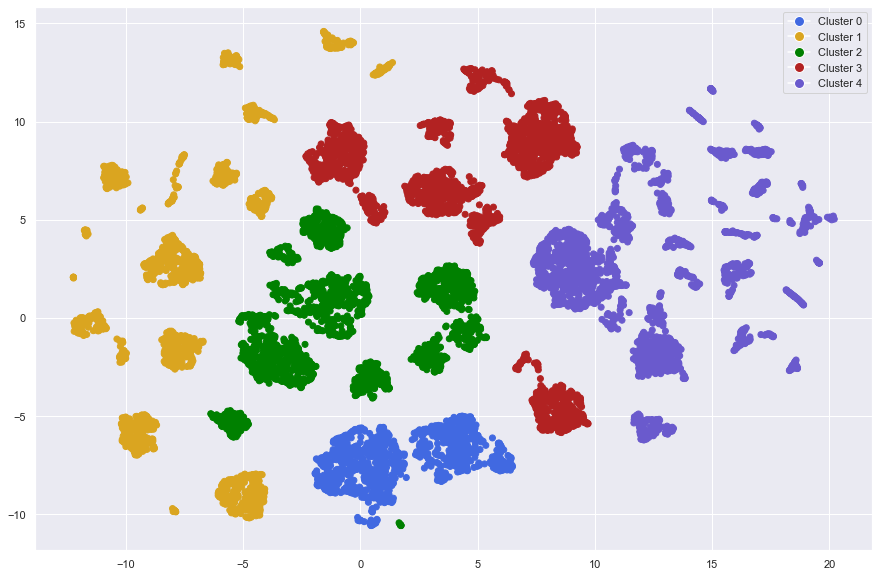

In [60]:
warnings.filterwarnings

# Initialize and fit UMAP
umap_model = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.3)
two_dim = umap_model.fit_transform(df)

# Define a dictionary that maps each cluster label to a color
colors_dict = {0: 'royalblue', 1: 'goldenrod', 2: 'green', 3: 'firebrick', 4: 'slateblue'}

# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(15,10))

# UMAP visualization
scatter = ax.scatter(two_dim[:,0], two_dim[:,1], c=df['merged_labels'].map(colors_dict))

# Add a colorbar to the plot
# cbar = fig.colorbar(scatter, ax=ax, **{'ticks':list(colors_dict.keys())})

# Add a legend to the plot
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markerfacecolor=color, markersize=10) for i, color in colors_dict.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()



In [67]:
## Decision Trees

In [68]:
# Preparing the data
X = df.drop(columns=['gmm_labels_insurance','gmm_labels_demographic','merged_labels'])
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 73.30% of the customers correctly


In [69]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

ClaimsRate                  0.000000
Age                         0.000000
MotorPercentageSpent        0.242213
HouseholdPercentageSpent    0.343989
HealthPercentageSpent       0.000000
LifePercentageSpent         0.058465
WorkPercentageSpent         0.043063
SalarySpent                 0.099311
EducDeg_2.0                 0.000000
EducDeg_3.0                 0.000000
EducDeg_4.0                 0.000000
Children_1                  0.212958
Cancelled_1                 0.000000
dtype: float64

In [70]:
X.head(1)

ClaimsRate       Age  MotorPercentageSpent  HouseholdPercentageSpent  \
CustID                                                                         
1.0      -0.559322 -0.482759              0.357075                 -0.257555   

        HealthPercentageSpent  LifePercentageSpent  WorkPercentageSpent  \
CustID                                                                    
1.0                  0.012021             0.619809            -0.177071   

        SalarySpent  EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  \
CustID                                                                   
1.0        -0.14065          1.0          0.0          0.0         1.0   

        Cancelled_1  
CustID               
1.0             0.0

In [71]:
df_outliers_ohc.head(1)

ClaimsRate  Cancelled_1  Age  MotorPercentageSpent  \
CustID                                                       
52.0         25.36            0   50              0.924444   

        HouseholdPercentageSpent  HealthPercentageSpent  LifePercentageSpent  \
CustID                                                                         
52.0                    0.033167               0.049022             0.008292   

        WorkPercentageSpent  SalarySpent  EducDeg_2.0  EducDeg_3.0  \
CustID                                                               
52.0              -0.014925    64.358209          0.0          1.0   

        EducDeg_4.0  Children_1  
CustID                           
52.0            0.0         1.0

In [72]:
# Predicting the cluster labels of the outliers
df_outliers_ohc["merged_labels"] = dt.predict(df_outliers_ohc)
df_outliers_ohc.head()

ClaimsRate  Cancelled_1  Age  MotorPercentageSpent  \
CustID                                                       
52.0         25.36            0   50              0.924444   
113.0        15.65            0   37              0.873401   
136.0        14.80            0   28              0.403681   
150.0         0.63            0   22              0.085193   
172.0       256.20            0   27              0.582435   

        HouseholdPercentageSpent  HealthPercentageSpent  LifePercentageSpent  \
CustID                                                                         
52.0                    0.033167               0.049022             0.008292   
113.0                   0.007499               0.094195             0.006555   
136.0                   0.220824               0.194455             0.185109   
150.0                   0.258926               0.038803             0.024363   
172.0                   0.121549               0.256979             0.010614   

        WorkPercentageSpent  SalarySpent  EducDeg_2.0  EducDeg_3.0  \
CustID                                                               
52.0              -0.014925    64.358209          0.0          1.0   
113.0              0.018350    47.599629          0.0          0.0   
136.0             -0.004069    35.418588          0.0          1.0   
150.0              0.592715    15.500131          0.0          0.0   
172.0              0.028423    20.076411          0.0          1.0   

        EducDeg_4.0  Children_1  merged_labels  
CustID                                          
52.0            0.0         1.0              2  
113.0           1.0         1.0              2  
136.0           0.0         1.0              1  
150.0           0.0         1.0              1  
172.0           0.0         1.0              2

run [WindowsPath('dot'), '-Kdot', '-Tsvg']


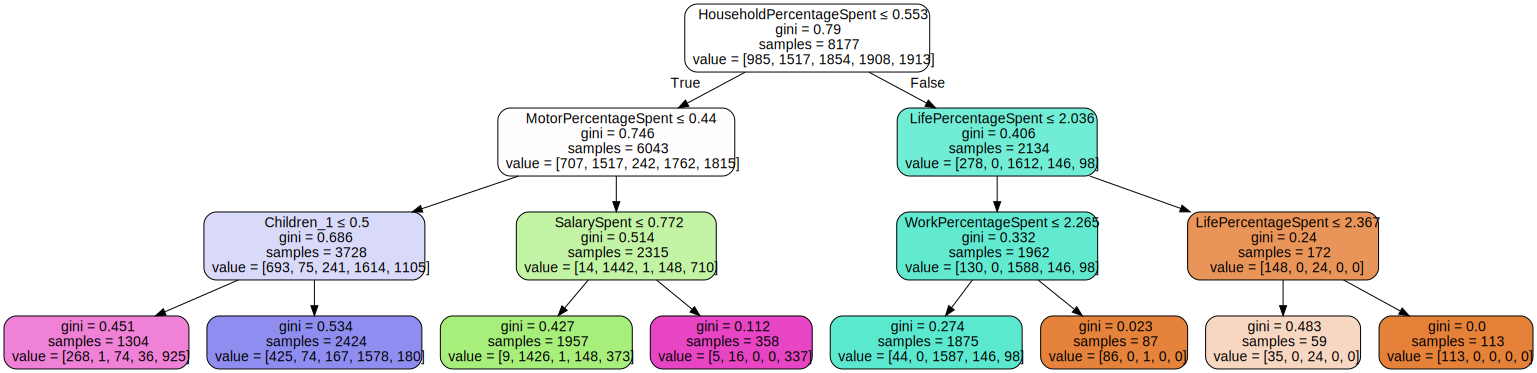

In [73]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

## Gaussian Using Only Metric Features

In [174]:
metric_features = ['ClaimsRate','Age','MotorPercentageSpent','HouseholdPercentageSpent','HealthPercentageSpent','LifePercentageSpent','WorkPercentageSpent','SalarySpent']

In [175]:
df_metric = df[metric_features].copy()

In [177]:
insurance_features_ohc=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    "ClaimsRate"
]


dfInsurance=df[insurance_features_ohc]


demographic_features_ohc=[
    'SalarySpent',
    'Age'
]
dfDemographic=df[demographic_features_ohc]

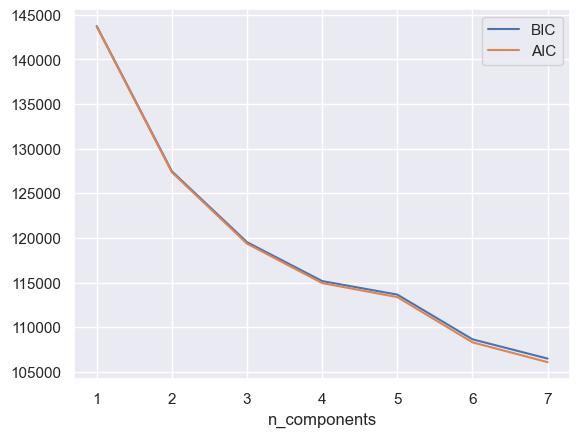

In [178]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 8) #iterate the number of components from 1 to 15
models = [GaussianMixture(n, covariance_type='spherical', n_init=10, random_state=1).fit(dfInsurance)
          for n in n_components]

# compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(dfInsurance) for gmm in models] #compute for every gmm in my list of models
aic_values = [gmm.aic(dfInsurance) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [179]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='spherical',n_init=10,random_state=1)
gmm_labels_insurance_metric = gmm.fit_predict(dfInsurance)

In [180]:
df_concat = pd.concat([dfInsurance, pd.Series(gmm_labels_insurance_metric, index=df.index, name="gmm_labels_insurance_metric")], axis=1)
df_concat.head()
df_insurance_centroids = df_concat.groupby('gmm_labels_insurance_metric').mean()

In [181]:
df_insurance_centroids

MotorPercentageSpent  HouseholdPercentageSpent  \
gmm_labels_insurance_metric                                                   
0                                        0.778570                 -0.410032   
1                                       -0.536080                  1.044084   
2                                       -0.047416                 -0.036097   
3                                       -0.547460                  0.178731   

                             HealthPercentageSpent  LifePercentageSpent  \
gmm_labels_insurance_metric                                               
0                                        -0.381465            -0.323537   
1                                        -0.239761             0.522150   
2                                         0.717773             0.150028   
3                                         0.248872             1.963674   

                             WorkPercentageSpent  ClaimsRate  
gmm_labels_insurance_metric                                   
0                                      -0.343498   -0.176674  
1                                       0.519944   -0.120858  
2                                       0.132184    0.020500  
3                                       2.005083    0.099779

In [182]:
Counter(gmm_labels_insurance_metric)
# Counter({2: 3346, 3: 1159, 0: 3259, 1: 2458}) - spherical
# Counter({2: 4149, 3: 983, 1: 1862, 0: 3228}) - full
# Counter({2: 4431, 1: 1946, 0: 2719, 3: 1126}) - diag
# Counter({1: 3328, 3: 423, 2: 6099, 0: 372}) - tied

Counter({2: 3346, 3: 1159, 0: 3259, 1: 2458})

In [183]:
# Computing the R^2 of the cluster solution
sst = get_ss(dfInsurance)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels_insurance_metric').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4860


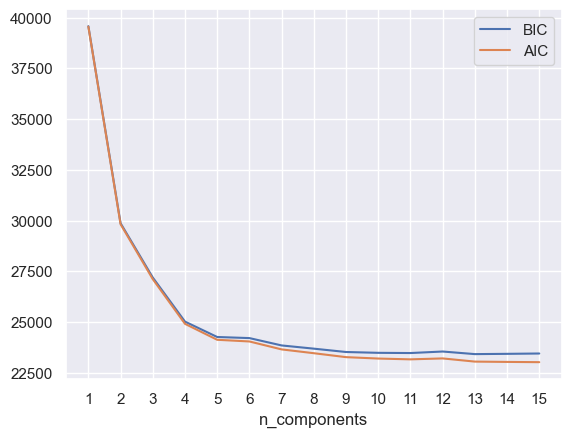

In [184]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16) #iterate the number of components from 1 to 15
models = [GaussianMixture(n, covariance_type='spherical', n_init=10, random_state=1).fit(dfDemographic)
          for n in n_components]

# compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(dfDemographic) for gmm in models] #compute for every gmm in my list of models
aic_values = [gmm.aic(dfDemographic) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [185]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full',n_init=10,random_state=1)
gmm_labels_demographic_metric = gmm.fit_predict(dfDemographic)

In [186]:
df_concat = pd.concat([dfDemographic, pd.Series(gmm_labels_demographic_metric, index=df.index, name="gmm_labels_demographic_metric")], axis=1)
df_concat.head()
df_demographic_centroids = df_concat.groupby('gmm_labels_demographic_metric').mean()

In [187]:
Counter(gmm_labels_demographic_metric)
# Counter({1: 2457, 2: 1756, 3: 4262, 0: 1747}) - spherical
# Counter({0: 2860, 3: 1803, 1: 3425, 2: 2134}) - full 
# Counter({1: 2425, 2: 1793, 3: 3939, 0: 2065}) - diag
# Counter({1: 2489, 2: 2467, 3: 2606, 0: 2660}) - tied


Counter({0: 2860, 3: 1803, 1: 3425, 2: 2134})

In [188]:
# Computing the R^2 of the cluster solution
sst = get_ss(dfDemographic)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels_demographic_metric').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8252


In [189]:
df_metric['gmm_labels_insurance_metric'] = gmm_labels_insurance_metric
df_metric['gmm_labels_demographic_metric'] = gmm_labels_demographic_metric

In [190]:
contigency_table = df_metric.groupby(['gmm_labels_insurance_metric','gmm_labels_demographic_metric']).size().to_frame("size").reset_index().pivot('gmm_labels_insurance_metric','gmm_labels_demographic_metric',"size")
# number of entries that I have in each subcluster

contigency_table 

gmm_labels_demographic_metric     0     1     2    3
gmm_labels_insurance_metric                         
0                              1043  1757   410   49
1                               421   784   377  876
2                              1153   703  1118  372
3                               243   181   229  506

### merging using hierarchical clustering

In [191]:
# Centroids of the concatenated cluster labels
df_centroids = df_metric.groupby(['gmm_labels_insurance_metric','gmm_labels_demographic_metric']).mean()
df_centroids

ClaimsRate  \
gmm_labels_insurance_metric gmm_labels_demographic_metric               
0                           0                               -0.193575   
                            1                               -0.172328   
                            2                               -0.144357   
                            3                               -0.243168   
1                           0                               -0.087644   
                            1                               -0.144846   
                            2                               -0.074450   
                            3                               -0.135322   
2                           0                                0.021109   
                            1                                0.015358   
                            2                                0.032246   
                            3                               -0.006971   
3                           0                                0.094162   
                            1                                0.058526   
                            2                                0.134039   
                            3                                0.101728   

                                                                Age  \
gmm_labels_insurance_metric gmm_labels_demographic_metric             
0                           0                             -0.328562   
                            1                              0.134104   
                            2                              0.725484   
                            3                             -0.755806   
1                           0                             -0.391269   
                            1                              0.390174   
                            2                              0.814598   
                            3                             -0.874232   
2                           0                             -0.456171   
                            1                              0.292687   
                            2                              0.779625   
                            3                             -0.756118   
3                           0                             -0.573719   
                            1                              0.291675   
                            2                              0.750188   
                            3                             -0.925719   

                                                           MotorPercentageSpent  \
gmm_labels_insurance_metric gmm_labels_demographic_metric                         
0                           0                                          0.715867   
                            1                                          0.848806   
                            2                                          0.666690   
                            3                                          0.530921   
1                           0                                         -0.408132   
                            1                                         -0.380848   
                            2                                         -0.513672   
                            3                                         -0.746144   
2                           0                                          0.013407   
                            1                                          0.030703   
                            2                                         -0.090529   
                            3                                         -0.253989   
3                           0                                         -0.388919   
                            1                                         -0.214845   
                            2                                         -0.404910   
                            3                         

In [192]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

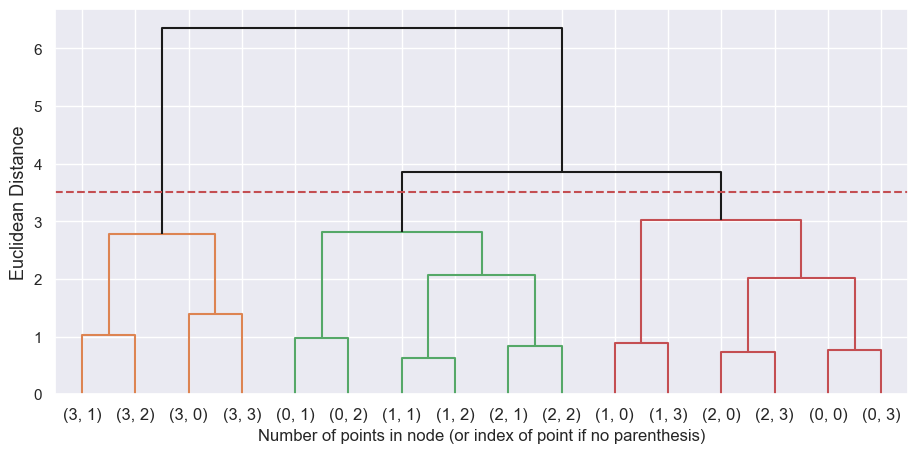

In [193]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3.5
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
#plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [194]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='complete', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

ClaimsRate  \
gmm_labels_insurance_metric gmm_labels_demographic_metric               
0                           0                               -0.193575   
                            1                               -0.172328   
                            2                               -0.144357   
                            3                               -0.243168   
1                           0                               -0.087644   
                            1                               -0.144846   
                            2                               -0.074450   
                            3                               -0.135322   
2                           0                                0.021109   
                            1                                0.015358   
                            2                                0.032246   
                            3                               -0.006971   
3                           0                                0.094162   
                            1                                0.058526   
                            2                                0.134039   
                            3                                0.101728   

                                                                Age  \
gmm_labels_insurance_metric gmm_labels_demographic_metric             
0                           0                             -0.328562   
                            1                              0.134104   
                            2                              0.725484   
                            3                             -0.755806   
1                           0                             -0.391269   
                            1                              0.390174   
                            2                              0.814598   
                            3                             -0.874232   
2                           0                             -0.456171   
                            1                              0.292687   
                            2                              0.779625   
                            3                             -0.756118   
3                           0                             -0.573719   
                            1                              0.291675   
                            2                              0.750188   
                            3                             -0.925719   

                                                           MotorPercentageSpent  \
gmm_labels_insurance_metric gmm_labels_demographic_metric                         
0                           0                                          0.715867   
                            1                                          0.848806   
                            2                                          0.666690   
                            3                                          0.530921   
1                           0                                         -0.408132   
                            1                                         -0.380848   
                            2                                         -0.513672   
                            3                                         -0.746144   
2                           0                                          0.013407   
                            1                                          0.030703   
                            2                                         -0.090529   
                            3                                         -0.253989   
3                           0                                         -0.388919   
                            1                                         -0.214845   
                            2                                         -0.404910   
                            3                         

In [195]:
df_centroids['hclust_labels'].to_dict()

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 1,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 1,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (3, 0): 1,
 (3, 1): 2,
 (3, 2): 2,
 (3, 3): 1}

In [196]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_metric.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels_metric'] = df_.apply(
    lambda row: cluster_mapper[
        (row['gmm_labels_insurance_metric'], row['gmm_labels_demographic_metric'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels_metric').mean()


ClaimsRate       Age  MotorPercentageSpent  \
merged_labels_metric                                               
0                      -0.083545  0.133464              0.242914   
1                      -0.039631 -0.751896             -0.649238   
2                       0.100703  0.547771             -0.321003   

                      HouseholdPercentageSpent  HealthPercentageSpent  \
merged_labels_metric                                                    
0                                    -0.052619               0.116261   
1                                     0.878553              -0.119090   
2                                    -0.176704               0.483798   

                      LifePercentageSpent  WorkPercentageSpent  SalarySpent  \
merged_labels_metric                                                          
0                               -0.003022            -0.021838     0.163470   
1                                1.132667             1.163423    -0.871276   
2                                1.738925             1.741393     0.665490   

                      gmm_labels_insurance_metric  \
merged_labels_metric                                
0                                        1.011203   
1                                        1.732160   
2                                        3.000000   

                      gmm_labels_demographic_metric  
merged_labels_metric                                 
0                                          1.070950  
1                                          2.026393  
2                                          1.558537

In [197]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

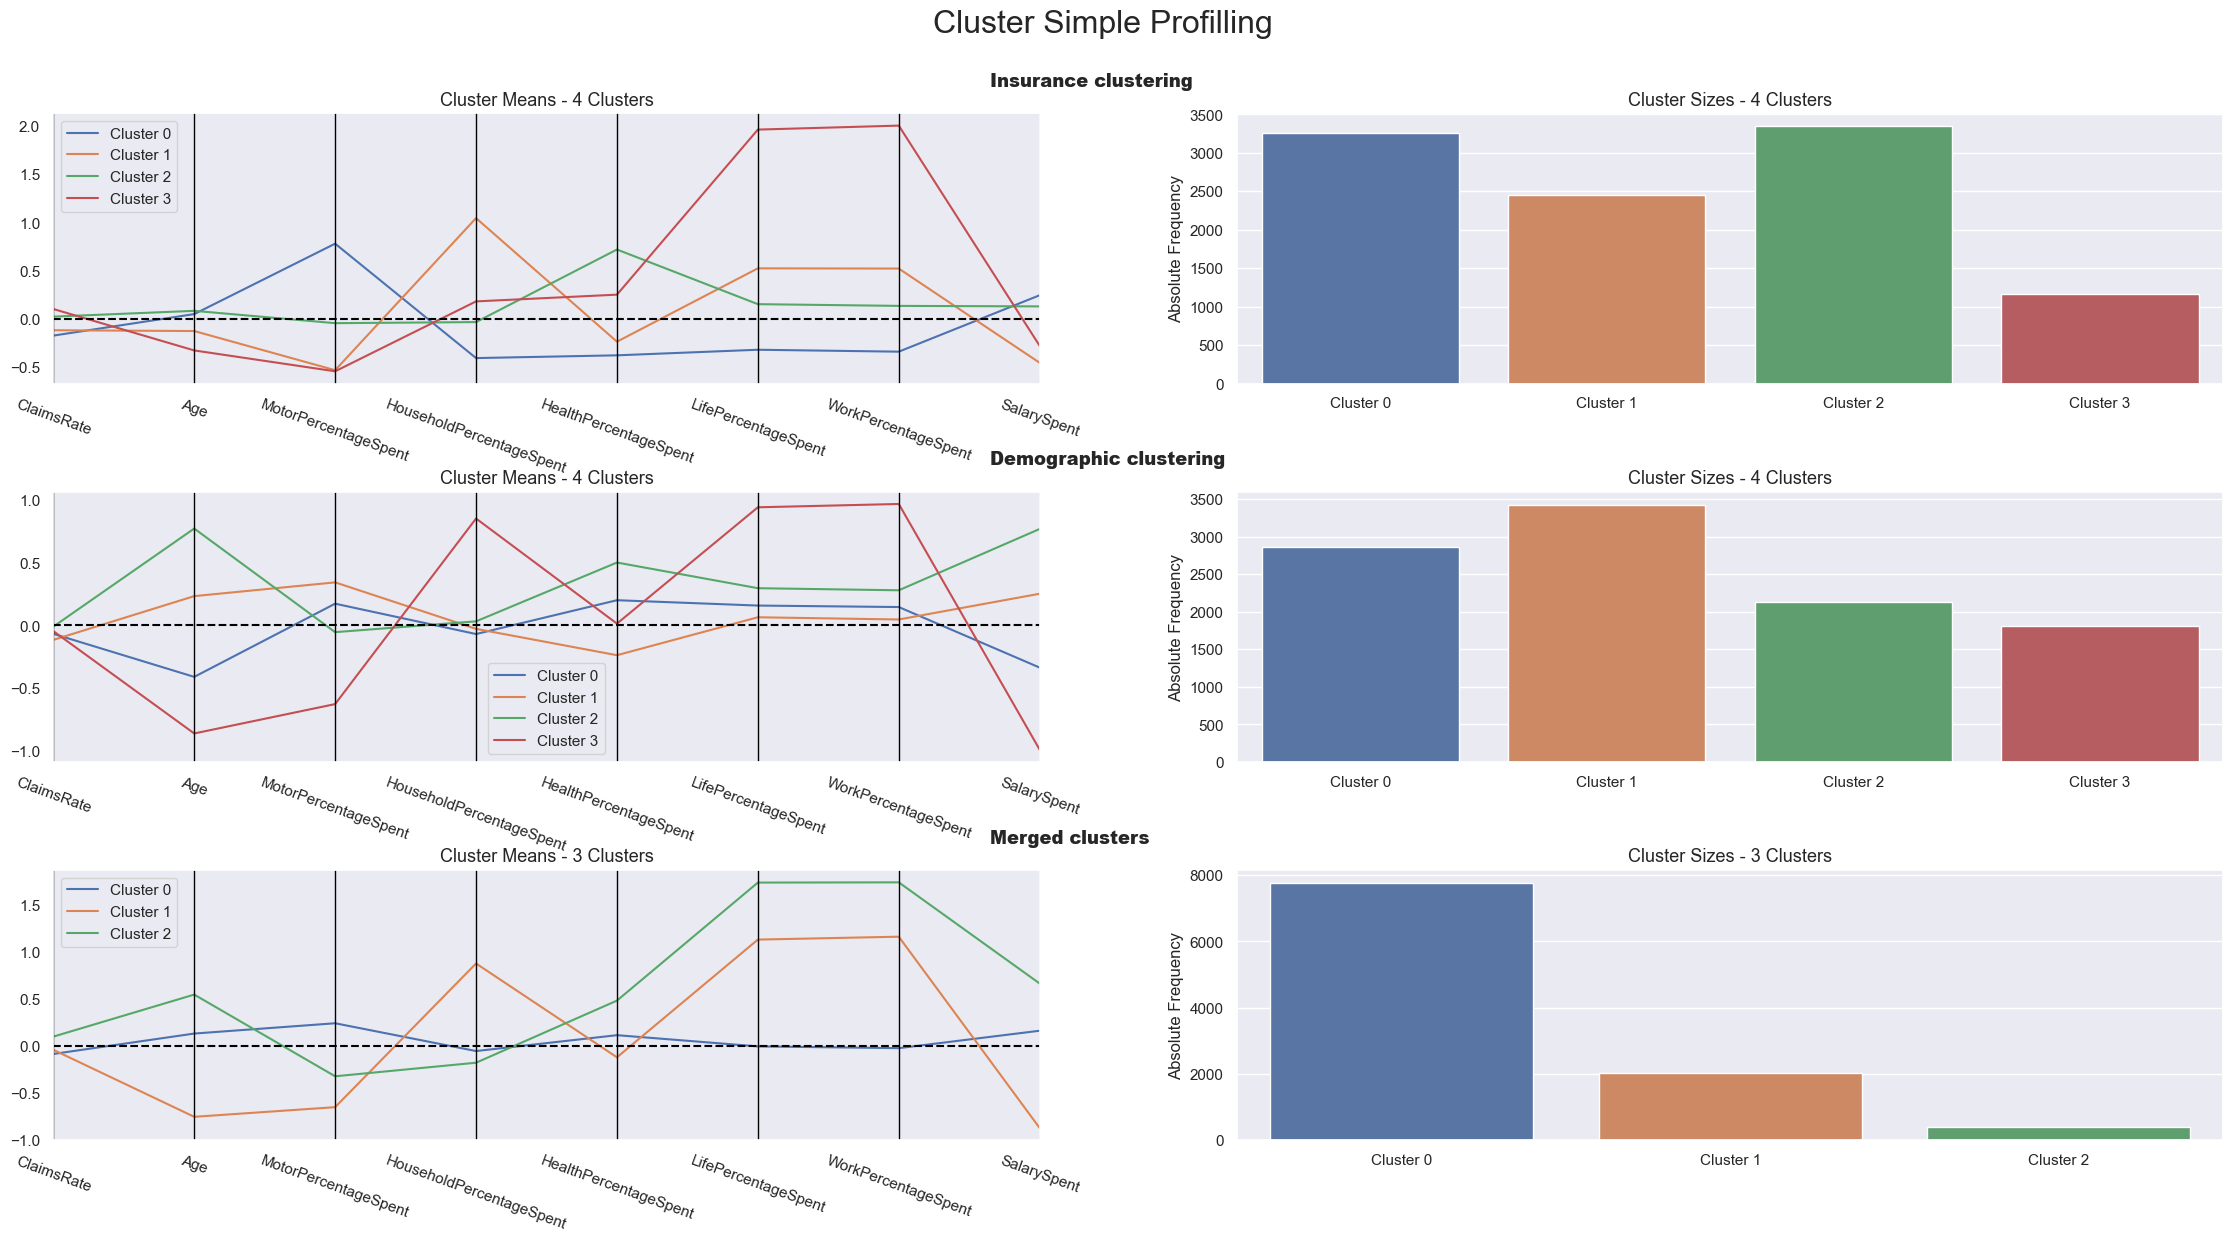

In [198]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_[df_.columns.to_list()], 
    label_columns = ['gmm_labels_insurance_metric', 'gmm_labels_demographic_metric', 'merged_labels_metric'], 
    figsize = (28, 13), 
    compar_titles = ["Insurance clustering", "Demographic clustering", "Merged clusters"]
)

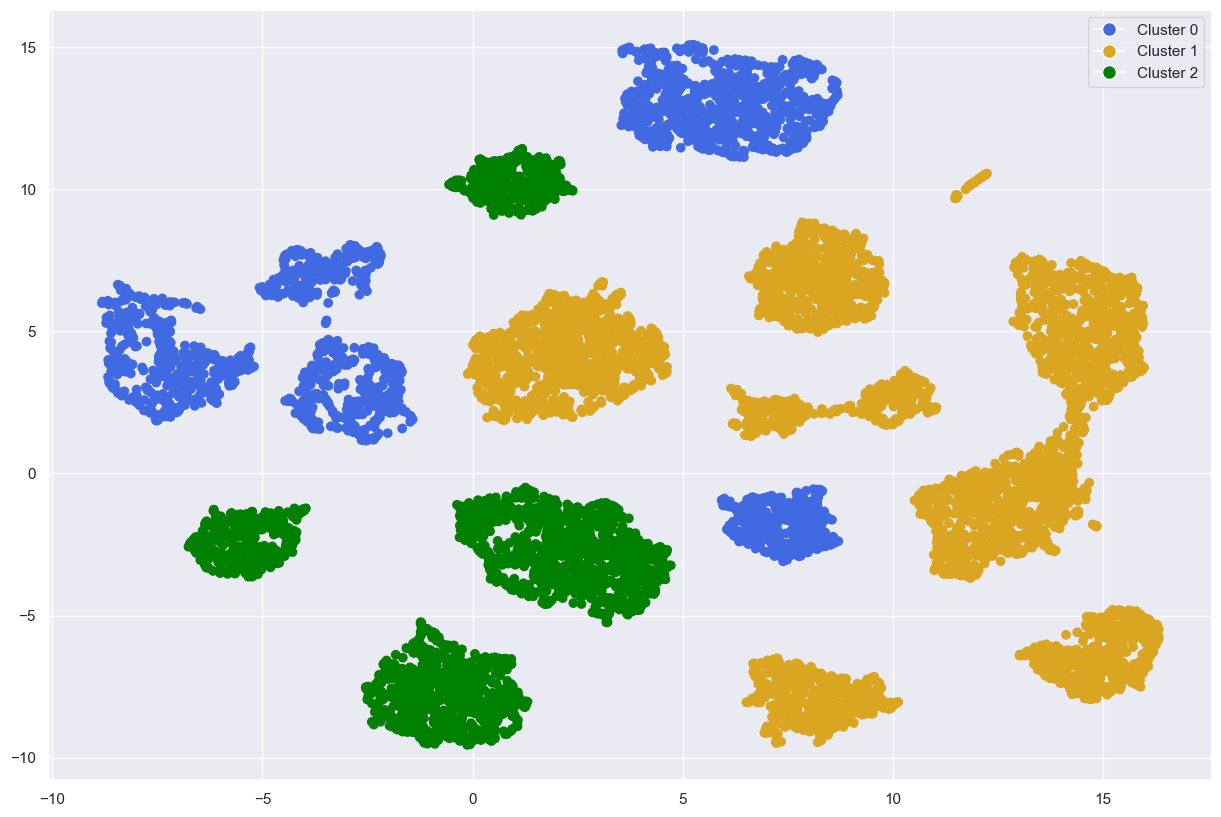

In [429]:
# Initialize and fit UMAP
umap_model = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.3)
two_dim = umap_model.fit_transform(df_)

# Define a dictionary that maps each cluster label to a color
colors_dict = {0: 'royalblue', 1: 'goldenrod', 2: 'green'}

# Create a figure and axes object for the plot
fig, ax = plt.subplots(figsize=(15,10))

# UMAP visualization
scatter = ax.scatter(two_dim[:,0], two_dim[:,1], c=df_['merged_labels_metric'].map(colors_dict))

# Add a colorbar to the plot
# cbar = fig.colorbar(scatter, ax=ax, **{'ticks':list(colors_dict.keys())})

# Add a legend to the plot
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markerfacecolor=color, markersize=10) for i, color in colors_dict.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()
